In [1]:
pwd

'/home/dcor/niskhizov/Rar'

In [2]:
cd object-detection-nn

/home/dcor/niskhizov/Rar/object-detection-nn


In [3]:
remote_mode = True

import sys
import os

from nn.YOLO_VGG16 import training_loop
from nn.YOLO_VGG16.utils.constants import ANCHORS
from nn.YOLO_VGG16.prepare_data.coco_dataset import CocoDataset
from nn.YOLO_VGG16.prepare_data.transforms import train_transform, test_transform
from nn.YOLO_VGG16.utils.helpers import convert_cells_to_bboxes, load_checkpoint, nms, plot_image, save_checkpoint
from nn.YOLO_VGG16.utils.constants import device, s, leanring_rate, save_model, checkpoint_file
from nn.YOLO_VGG16.model.YOLO_VGG16_full import YOLO_VGG16_F
import torch
import torch.optim as optim
from nn.YOLO_VGG16.model.loss import YOLOLoss
from pycocotools.coco import COCO
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torchvision.transforms as T

if remote_mode:
    model_path_base = f"/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/vgg_f_airplain_model"
    coco_path = lambda type: f'/home/dcor/niskhizov/Rar/object-detection-nn/nn/YOLO_VGG16/degug_notebooks/temp/instances_{type}2017.json'
else:
    model_path_base = f"nn/YOLO_VGG16/degug_notebooks/"
    coco_path = lambda type: f'nn/cocodataset/annotations/instances_{type}2017.json'


/home/dcor/niskhizov/anaconda3/envs/obj_d/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [4]:
coco = COCO(coco_path('train'))
categories = ["airplane"]


loading annotations into memory...


Done (t=16.20s)
creating index...
index created!


In [6]:
# Creating the model from YOLOv3 class 
load_model = True
model = YOLO_VGG16_F(num_classes=len(categories)).to(device) 

# Defining the optimizer 
optimizer = optim.Adam(model.parameters(), lr = leanring_rate) 

# Defining the loss function 
loss_fn = YOLOLoss() 

# Defining the scaler for mixed precision training 
scaler = torch.amp.GradScaler(device=device) 
# Loading the checkpoint 
if load_model: 
    load_checkpoint(model_path_base + f"e49_vgg16_{checkpoint_file}", model, optimizer, leanring_rate, device) 

# Initialize TensorBoard writer
writer = SummaryWriter(log_dir='runs/YOLO_VGG16_F_Airplane')



==> Loading checkpoint


In [7]:
dataset = CocoDataset( 
	coco_obj=coco, 
	categories=categories,
	grid_sizes=[13, 26, 52], 
	anchors=ANCHORS, 
	transform=train_transform 
) 

# Defining the train data loader 
train_loader = torch.utils.data.DataLoader( 
	dataset=dataset, 
	batch_size=8, 
	shuffle=True, 
) 


In [8]:
# Load the validation dataset
val_coco = COCO(coco_path('val'))

val_dataset = CocoDataset(
    coco_obj=val_coco,
    categories=categories,
    grid_sizes=[13, 26, 52],
    anchors=ANCHORS,
    transform=test_transform  # Use the same transform for validation
)

# Create the validation data loader
val_loader = torch.utils.data.DataLoader(
    dataset=val_dataset,
    batch_size=1,
    shuffle=False,
)

val_loader_iter = iter(val_loader)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [9]:
# Scaling the anchors 
scaled_anchors = ( 
	torch.tensor(ANCHORS) *
	torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
).to(device) 

Epoch: 50


  0%|                                                                                                                                          | 0/374 [00:00<?, ?it/s]

batch_idx: 0


  0%|                                                                                                                              | 0/374 [00:10<?, ?it/s, loss=0.159]

==> Saving checkpoint


  0%|▎                                                                                                                   | 1/374 [00:27<2:48:19, 27.08s/it, loss=0.159]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:41<1:11:47, 11.61s/it, loss=0.173]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:48<59:49,  9.70s/it, loss=0.173]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:55<53:50,  8.75s/it, loss=0.164]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [01:02<50:33,  8.24s/it, loss=0.154]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:09<48:32,  7.94s/it, loss=0.155]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:17<47:32,  7.80s/it, loss=0.148]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:23<44:56,  7.39s/it, loss=0.143]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:30<43:05,  7.10s/it, loss=0.139]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:37<42:57,  7.10s/it, loss=0.145]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:44<42:58,  7.12s/it, loss=0.147]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:52<44:21,  7.37s/it, loss=0.144]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:59<42:46,  7.13s/it, loss=0.147]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:05<42:02,  7.03s/it, loss=0.145]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:13<43:16,  7.25s/it, loss=0.147]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:20<41:58,  7.06s/it, loss=0.147]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:27<41:39,  7.02s/it, loss=0.146]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:34<41:53,  7.08s/it, loss=0.145]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:41<41:20,  7.01s/it, loss=0.143]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:48<42:26,  7.21s/it, loss=0.143]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:55<41:42,  7.11s/it, loss=0.139]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [03:02<41:26,  7.08s/it, loss=0.139]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:09<41:22,  7.09s/it, loss=0.138]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:17<41:53,  7.20s/it, loss=0.139]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:24<41:42,  7.19s/it, loss=0.137]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:31<40:51,  7.06s/it, loss=0.135]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:37<39:56,  6.93s/it, loss=0.134]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:45<41:36,  7.24s/it, loss=0.133]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:52<40:51,  7.13s/it, loss=0.133]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [04:00<41:22,  7.24s/it, loss=0.132]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [04:09<44:48,  7.86s/it, loss=0.131]

batch_idx: 31


  9%|██████████▍                                                                                                           | 33/374 [04:17<45:23,  7.99s/it, loss=0.13]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:24<42:56,  7.58s/it, loss=0.129]

batch_idx: 33


  9%|███████████                                                                                                           | 35/374 [04:31<42:42,  7.56s/it, loss=0.13]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:39<42:23,  7.53s/it, loss=0.131]

batch_idx: 35


 10%|███████████▋                                                                                                          | 37/374 [04:46<41:23,  7.37s/it, loss=0.13]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:53<40:27,  7.22s/it, loss=0.131]

batch_idx: 37


 10%|████████████▎                                                                                                         | 39/374 [04:59<39:00,  6.99s/it, loss=0.13]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [05:07<40:04,  7.20s/it, loss=0.131]

batch_idx: 39


 11%|████████████▉                                                                                                         | 41/374 [05:14<39:23,  7.10s/it, loss=0.13]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:21<39:19,  7.11s/it, loss=0.132]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:28<38:52,  7.05s/it, loss=0.132]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:35<39:17,  7.14s/it, loss=0.132]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:42<38:04,  6.94s/it, loss=0.132]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:49<37:59,  6.95s/it, loss=0.131]

batch_idx: 45


 13%|██████████████▊                                                                                                       | 47/374 [05:56<37:47,  6.94s/it, loss=0.13]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [06:03<38:53,  7.16s/it, loss=0.129]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:11<40:09,  7.41s/it, loss=0.129]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:19<39:57,  7.40s/it, loss=0.128]

batch_idx: 49


 14%|████████████████                                                                                                      | 51/374 [06:26<39:53,  7.41s/it, loss=0.13]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:33<39:11,  7.30s/it, loss=0.132]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:40<38:47,  7.25s/it, loss=0.132]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:47<38:08,  7.15s/it, loss=0.131]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:54<37:53,  7.13s/it, loss=0.131]

batch_idx: 54


 15%|█████████████████▋                                                                                                    | 56/374 [07:01<37:38,  7.10s/it, loss=0.13]

batch_idx: 55


 15%|█████████████████▉                                                                                                    | 57/374 [07:08<37:42,  7.14s/it, loss=0.13]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:16<38:45,  7.36s/it, loss=0.132]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:23<37:43,  7.19s/it, loss=0.132]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:31<37:57,  7.25s/it, loss=0.132]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:38<37:28,  7.18s/it, loss=0.131]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:45<37:04,  7.13s/it, loss=0.131]

batch_idx: 61


 17%|███████████████████▉                                                                                                  | 63/374 [07:52<37:49,  7.30s/it, loss=0.13]

batch_idx: 62


 17%|████████████████████▏                                                                                                 | 64/374 [08:00<38:10,  7.39s/it, loss=0.13]

batch_idx: 63


 17%|████████████████████▌                                                                                                 | 65/374 [08:09<40:13,  7.81s/it, loss=0.13]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [08:15<38:07,  7.43s/it, loss=0.131]

batch_idx: 65


 18%|█████████████████████▏                                                                                                | 67/374 [08:22<37:14,  7.28s/it, loss=0.13]

batch_idx: 66


 18%|█████████████████████▍                                                                                                | 68/374 [08:29<37:00,  7.26s/it, loss=0.13]

batch_idx: 67


 18%|█████████████████████▊                                                                                                | 69/374 [08:37<36:55,  7.27s/it, loss=0.13]

batch_idx: 68


 19%|██████████████████████                                                                                                | 70/374 [08:44<36:42,  7.24s/it, loss=0.13]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:51<36:19,  7.19s/it, loss=0.129]

batch_idx: 70


 19%|██████████████████████▋                                                                                               | 72/374 [08:58<36:34,  7.26s/it, loss=0.13]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [09:06<36:27,  7.27s/it, loss=0.131]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [09:13<36:35,  7.32s/it, loss=0.131]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:20<36:12,  7.27s/it, loss=0.131]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:27<35:51,  7.22s/it, loss=0.131]

batch_idx: 75


 21%|████████████████████████▎                                                                                             | 77/374 [09:35<36:20,  7.34s/it, loss=0.13]

batch_idx: 76


 21%|████████████████████████▌                                                                                             | 78/374 [09:42<36:19,  7.36s/it, loss=0.13]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:50<36:04,  7.34s/it, loss=0.131]

batch_idx: 78


 21%|█████████████████████████▏                                                                                            | 80/374 [09:56<34:55,  7.13s/it, loss=0.13]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [10:03<34:33,  7.08s/it, loss=0.129]

batch_idx: 80


 22%|█████████████████████████▊                                                                                            | 82/374 [10:10<34:42,  7.13s/it, loss=0.13]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:19<35:57,  7.41s/it, loss=0.131]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:26<35:25,  7.33s/it, loss=0.131]

batch_idx: 83


 23%|██████████████████████████▊                                                                                           | 85/374 [10:33<35:13,  7.31s/it, loss=0.13]

batch_idx: 84


 23%|███████████████████████████▏                                                                                          | 86/374 [10:41<35:37,  7.42s/it, loss=0.13]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:48<35:05,  7.34s/it, loss=0.131]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:55<35:02,  7.35s/it, loss=0.131]

batch_idx: 87


 24%|████████████████████████████                                                                                          | 89/374 [11:03<35:01,  7.37s/it, loss=0.13]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [11:10<34:45,  7.34s/it, loss=0.131]

batch_idx: 89


 24%|████████████████████████████▋                                                                                         | 91/374 [11:17<34:44,  7.37s/it, loss=0.13]

batch_idx: 90


 25%|█████████████████████████████                                                                                         | 92/374 [11:25<34:45,  7.39s/it, loss=0.13]

batch_idx: 91


 25%|█████████████████████████████▎                                                                                        | 93/374 [11:32<34:30,  7.37s/it, loss=0.13]

batch_idx: 92


 25%|█████████████████████████████▋                                                                                        | 94/374 [11:39<34:02,  7.29s/it, loss=0.13]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:48<36:25,  7.83s/it, loss=0.131]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:55<34:36,  7.47s/it, loss=0.131]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [12:02<33:34,  7.27s/it, loss=0.131]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [12:08<32:44,  7.12s/it, loss=0.131]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [12:16<33:54,  7.40s/it, loss=0.132]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:23<32:46,  7.18s/it, loss=0.132]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:30<32:38,  7.17s/it, loss=0.132]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:38<33:11,  7.32s/it, loss=0.132]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:45<33:09,  7.34s/it, loss=0.131]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:53<33:04,  7.35s/it, loss=0.131]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [13:01<33:40,  7.51s/it, loss=0.131]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [13:08<32:44,  7.33s/it, loss=0.131]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [13:14<31:58,  7.19s/it, loss=0.131]

batch_idx: 106


 29%|█████████████████████████████████▊                                                                                   | 108/374 [13:21<31:39,  7.14s/it, loss=0.13]

batch_idx: 107


 29%|██████████████████████████████████                                                                                   | 109/374 [13:28<31:29,  7.13s/it, loss=0.13]

batch_idx: 108


 29%|██████████████████████████████████▍                                                                                  | 110/374 [13:35<30:54,  7.03s/it, loss=0.13]

batch_idx: 109


 30%|██████████████████████████████████▋                                                                                  | 111/374 [13:42<31:00,  7.07s/it, loss=0.13]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:50<31:02,  7.11s/it, loss=0.129]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:57<30:53,  7.10s/it, loss=0.129]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [14:04<31:32,  7.28s/it, loss=0.129]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [14:11<30:46,  7.13s/it, loss=0.129]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [14:18<30:24,  7.07s/it, loss=0.129]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:25<30:29,  7.12s/it, loss=0.129]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:32<30:10,  7.07s/it, loss=0.129]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:40<30:44,  7.23s/it, loss=0.129]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:47<30:25,  7.19s/it, loss=0.129]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:54<29:57,  7.11s/it, loss=0.129]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [15:01<29:39,  7.06s/it, loss=0.129]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [15:07<28:46,  6.88s/it, loss=0.129]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [15:14<28:24,  6.82s/it, loss=0.129]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [15:21<28:27,  6.86s/it, loss=0.129]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:28<29:01,  7.02s/it, loss=0.129]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:36<29:39,  7.20s/it, loss=0.129]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:43<29:33,  7.21s/it, loss=0.128]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:50<29:29,  7.22s/it, loss=0.128]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:58<29:42,  7.31s/it, loss=0.128]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [16:06<30:04,  7.42s/it, loss=0.128]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [16:13<30:17,  7.51s/it, loss=0.128]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [16:20<29:21,  7.31s/it, loss=0.127]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:27<28:33,  7.14s/it, loss=0.127]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:34<28:11,  7.08s/it, loss=0.128]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:42<29:29,  7.44s/it, loss=0.127]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:49<29:04,  7.36s/it, loss=0.127]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:57<29:32,  7.51s/it, loss=0.127]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [17:05<29:24,  7.51s/it, loss=0.127]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [17:12<28:49,  7.39s/it, loss=0.127]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [17:19<28:31,  7.34s/it, loss=0.127]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [17:27<29:24,  7.61s/it, loss=0.127]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:34<28:31,  7.41s/it, loss=0.127]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:41<27:56,  7.29s/it, loss=0.127]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:49<28:02,  7.35s/it, loss=0.126]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:55<26:51,  7.07s/it, loss=0.127]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [18:02<26:00,  6.87s/it, loss=0.126]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [18:09<26:28,  7.03s/it, loss=0.127]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [18:16<26:03,  6.95s/it, loss=0.126]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [18:23<26:20,  7.06s/it, loss=0.126]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:31<26:49,  7.22s/it, loss=0.126]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:37<25:51,  6.99s/it, loss=0.126]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:45<26:23,  7.16s/it, loss=0.126]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:52<26:11,  7.14s/it, loss=0.126]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:59<25:56,  7.11s/it, loss=0.126]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [19:06<26:02,  7.17s/it, loss=0.126]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [19:14<26:20,  7.29s/it, loss=0.126]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [19:21<26:12,  7.28s/it, loss=0.127]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [19:29<26:26,  7.38s/it, loss=0.126]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:36<26:17,  7.37s/it, loss=0.126]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:43<26:00,  7.32s/it, loss=0.126]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:51<26:13,  7.42s/it, loss=0.125]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:57<25:21,  7.21s/it, loss=0.125]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [20:05<25:18,  7.23s/it, loss=0.125]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [20:12<25:24,  7.29s/it, loss=0.125]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [20:20<25:28,  7.35s/it, loss=0.125]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [20:27<25:11,  7.30s/it, loss=0.125]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:34<24:36,  7.17s/it, loss=0.125]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:41<24:57,  7.31s/it, loss=0.126]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:48<23:59,  7.06s/it, loss=0.125]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:54<23:09,  6.85s/it, loss=0.125]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [21:01<23:22,  6.94s/it, loss=0.125]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [21:08<23:18,  6.96s/it, loss=0.125]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [21:15<22:57,  6.89s/it, loss=0.125]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [21:22<22:38,  6.83s/it, loss=0.125]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [21:29<23:01,  6.98s/it, loss=0.125]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:36<23:16,  7.09s/it, loss=0.125]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:44<23:12,  7.10s/it, loss=0.125]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:51<23:15,  7.16s/it, loss=0.125]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:58<23:23,  7.24s/it, loss=0.125]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [22:06<23:27,  7.29s/it, loss=0.125]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [22:13<23:13,  7.26s/it, loss=0.125]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [22:20<23:23,  7.35s/it, loss=0.126]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [22:28<23:29,  7.42s/it, loss=0.126]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:37<24:24,  7.75s/it, loss=0.126]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:43<23:30,  7.50s/it, loss=0.126]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:51<23:09,  7.43s/it, loss=0.126]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:58<22:48,  7.36s/it, loss=0.126]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [23:04<21:56,  7.12s/it, loss=0.126]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [23:12<22:08,  7.22s/it, loss=0.126]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [23:19<21:40,  7.11s/it, loss=0.126]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [23:26<21:29,  7.08s/it, loss=0.126]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [23:32<20:49,  6.90s/it, loss=0.126]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:39<20:53,  6.96s/it, loss=0.126]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:46<20:54,  7.01s/it, loss=0.126]

batch_idx: 194


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [24:08<20:59,  7.16s/it, loss=0.126]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [24:15<21:06,  7.24s/it, loss=0.125]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:22<20:39,  7.12s/it, loss=0.125]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:29<20:39,  7.12s/it, loss=0.126]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▋                                                     | 202/374 [24:43<24:03,  8.39s/it, loss=0.125]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [24:49<22:18,  7.83s/it, loss=0.125]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [24:57<21:58,  7.76s/it, loss=0.126]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [25:03<20:38,  7.33s/it, loss=0.126]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [25:10<20:23,  7.28s/it, loss=0.125]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [25:17<20:06,  7.23s/it, loss=0.125]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:24<19:49,  7.16s/it, loss=0.126]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:31<19:36,  7.13s/it, loss=0.126]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:39<20:00,  7.32s/it, loss=0.126]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [25:46<19:42,  7.26s/it, loss=0.126]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [25:54<19:43,  7.30s/it, loss=0.126]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [26:00<19:10,  7.14s/it, loss=0.126]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [26:08<19:12,  7.20s/it, loss=0.125]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [26:15<18:57,  7.16s/it, loss=0.126]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [26:21<18:23,  6.98s/it, loss=0.126]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:28<17:58,  6.87s/it, loss=0.125]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:35<18:15,  7.02s/it, loss=0.126]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:43<18:35,  7.20s/it, loss=0.126]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:50<18:24,  7.17s/it, loss=0.125]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:57<18:14,  7.15s/it, loss=0.126]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [27:04<18:01,  7.11s/it, loss=0.126]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [27:12<18:22,  7.30s/it, loss=0.126]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:19<17:41,  7.08s/it, loss=0.126]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:25<17:19,  6.98s/it, loss=0.126]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:32<16:58,  6.88s/it, loss=0.126]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:39<16:54,  6.90s/it, loss=0.126]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:46<16:44,  6.88s/it, loss=0.126]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:54<17:18,  7.16s/it, loss=0.126]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [28:00<16:40,  6.95s/it, loss=0.126]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [28:07<16:56,  7.11s/it, loss=0.126]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [28:15<16:49,  7.11s/it, loss=0.125]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:22<17:10,  7.31s/it, loss=0.125]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:29<16:54,  7.25s/it, loss=0.125]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:37<16:47,  7.25s/it, loss=0.126]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:44<16:32,  7.19s/it, loss=0.126]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:52<16:52,  7.39s/it, loss=0.126]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [28:59<16:41,  7.36s/it, loss=0.126]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [29:07<16:43,  7.44s/it, loss=0.126]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [29:14<16:37,  7.45s/it, loss=0.126]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:21<16:08,  7.28s/it, loss=0.126]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:28<15:38,  7.11s/it, loss=0.126]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:35<15:43,  7.20s/it, loss=0.127]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:42<15:23,  7.10s/it, loss=0.127]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:49<15:18,  7.12s/it, loss=0.127]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:56<15:08,  7.10s/it, loss=0.128]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [30:03<15:08,  7.15s/it, loss=0.128]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [30:11<15:19,  7.29s/it, loss=0.128]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [30:18<14:54,  7.16s/it, loss=0.128]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:25<14:29,  7.01s/it, loss=0.128]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:32<14:35,  7.12s/it, loss=0.128]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:39<14:35,  7.18s/it, loss=0.128]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:46<14:28,  7.18s/it, loss=0.128]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:54<14:29,  7.24s/it, loss=0.128]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [31:01<14:23,  7.26s/it, loss=0.128]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [31:09<14:22,  7.31s/it, loss=0.128]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [31:15<14:02,  7.20s/it, loss=0.128]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:23<14:01,  7.26s/it, loss=0.128]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:30<13:39,  7.13s/it, loss=0.128]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:37<13:47,  7.26s/it, loss=0.128]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:44<13:21,  7.09s/it, loss=0.128]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:50<12:50,  6.88s/it, loss=0.128]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:58<12:56,  6.99s/it, loss=0.128]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [32:05<12:54,  7.04s/it, loss=0.128]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [32:12<12:46,  7.04s/it, loss=0.128]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [32:19<12:35,  7.00s/it, loss=0.128]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:26<12:33,  7.04s/it, loss=0.128]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:33<12:30,  7.08s/it, loss=0.128]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:41<12:49,  7.33s/it, loss=0.128]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:49<13:00,  7.50s/it, loss=0.128]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:56<12:48,  7.46s/it, loss=0.128]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [33:04<12:38,  7.43s/it, loss=0.128]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [33:11<12:42,  7.55s/it, loss=0.128]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [33:18<12:21,  7.41s/it, loss=0.128]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:26<12:03,  7.31s/it, loss=0.127]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:33<11:54,  7.29s/it, loss=0.127]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:40<11:46,  7.29s/it, loss=0.127]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:47<11:34,  7.23s/it, loss=0.127]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:54<11:24,  7.20s/it, loss=0.127]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [34:02<11:31,  7.36s/it, loss=0.127]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [34:09<11:13,  7.24s/it, loss=0.127]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [34:17<11:30,  7.51s/it, loss=0.127]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [34:26<12:00,  7.92s/it, loss=0.127]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:33<11:32,  7.69s/it, loss=0.127]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:40<11:08,  7.51s/it, loss=0.127]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:49<11:33,  7.88s/it, loss=0.127]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [34:56<11:11,  7.71s/it, loss=0.127]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [35:03<10:42,  7.47s/it, loss=0.127]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [35:11<10:36,  7.49s/it, loss=0.127]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [35:18<10:28,  7.48s/it, loss=0.127]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [35:25<10:14,  7.41s/it, loss=0.127]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:32<09:55,  7.26s/it, loss=0.127]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [35:40<09:50,  7.29s/it, loss=0.127]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [35:47<09:42,  7.29s/it, loss=0.128]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [35:54<09:39,  7.34s/it, loss=0.128]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [36:02<09:27,  7.28s/it, loss=0.128]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [36:09<09:26,  7.36s/it, loss=0.128]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [36:17<09:25,  7.44s/it, loss=0.128]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [36:24<09:14,  7.40s/it, loss=0.128]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [36:31<09:04,  7.36s/it, loss=0.128]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [36:38<08:49,  7.25s/it, loss=0.128]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [36:46<08:47,  7.33s/it, loss=0.128]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [36:53<08:38,  7.30s/it, loss=0.128]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [37:00<08:25,  7.22s/it, loss=0.128]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [37:07<08:21,  7.27s/it, loss=0.128]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [37:15<08:13,  7.26s/it, loss=0.128]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [37:24<08:44,  7.83s/it, loss=0.128]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [37:31<08:31,  7.75s/it, loss=0.128]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:39<08:14,  7.61s/it, loss=0.128]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [37:47<08:15,  7.74s/it, loss=0.128]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [37:54<07:51,  7.49s/it, loss=0.128]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [38:01<07:43,  7.48s/it, loss=0.128]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [38:08<07:28,  7.36s/it, loss=0.128]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [38:15<07:15,  7.25s/it, loss=0.128]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [38:22<07:03,  7.19s/it, loss=0.128]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [38:29<06:53,  7.12s/it, loss=0.128]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [38:37<06:50,  7.21s/it, loss=0.128]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [38:46<07:17,  7.81s/it, loss=0.128]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [38:53<07:04,  7.72s/it, loss=0.128]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [39:01<06:50,  7.60s/it, loss=0.128]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [39:08<06:34,  7.45s/it, loss=0.127]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [39:15<06:18,  7.27s/it, loss=0.128]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [39:21<06:02,  7.11s/it, loss=0.128]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [39:28<05:49,  6.99s/it, loss=0.128]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [39:35<05:42,  6.98s/it, loss=0.128]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:42<05:35,  6.99s/it, loss=0.128]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [39:49<05:28,  6.98s/it, loss=0.127]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [39:56<05:28,  7.13s/it, loss=0.128]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [40:04<05:20,  7.13s/it, loss=0.128]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [40:11<05:13,  7.13s/it, loss=0.128]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [40:18<05:06,  7.14s/it, loss=0.128]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [40:26<05:10,  7.38s/it, loss=0.128]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [40:32<04:52,  7.14s/it, loss=0.128]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:39<04:40,  7.01s/it, loss=0.128]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [40:47<04:41,  7.23s/it, loss=0.128]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:54<04:37,  7.29s/it, loss=0.128]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [41:02<04:31,  7.34s/it, loss=0.128]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [41:09<04:24,  7.36s/it, loss=0.128]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [41:16<04:13,  7.24s/it, loss=0.128]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [41:24<04:08,  7.30s/it, loss=0.128]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [41:31<03:58,  7.21s/it, loss=0.128]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [41:38<03:53,  7.30s/it, loss=0.128]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:46<03:49,  7.41s/it, loss=0.128]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:53<03:43,  7.45s/it, loss=0.128]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [42:00<03:32,  7.33s/it, loss=0.128]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [42:07<03:22,  7.24s/it, loss=0.128]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [42:15<03:15,  7.24s/it, loss=0.128]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [42:22<03:09,  7.30s/it, loss=0.128]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [42:29<03:01,  7.24s/it, loss=0.128]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [42:36<02:52,  7.19s/it, loss=0.129]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:44<02:47,  7.29s/it, loss=0.129]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:51<02:38,  7.21s/it, loss=0.129]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:58<02:30,  7.17s/it, loss=0.129]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [43:05<02:23,  7.18s/it, loss=0.129]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:12<02:12,  6.98s/it, loss=0.129]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [43:19<02:06,  7.01s/it, loss=0.129]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [43:26<02:00,  7.06s/it, loss=0.129]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [43:33<01:52,  7.05s/it, loss=0.129]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:40<01:44,  6.97s/it, loss=0.129]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [43:46<01:36,  6.92s/it, loss=0.129]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [43:54<01:30,  6.99s/it, loss=0.128]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [44:01<01:24,  7.00s/it, loss=0.129]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:08<01:18,  7.10s/it, loss=0.129]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [44:15<01:11,  7.16s/it, loss=0.129]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [44:22<01:03,  7.06s/it, loss=0.128]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [44:29<00:56,  7.12s/it, loss=0.128]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:37<00:50,  7.19s/it, loss=0.129]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [44:43<00:42,  7.06s/it, loss=0.129]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:51<00:35,  7.09s/it, loss=0.129]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [44:58<00:29,  7.26s/it, loss=0.128]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:05<00:21,  7.12s/it, loss=0.128]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:12<00:14,  7.08s/it, loss=0.128]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [45:18<00:06,  6.89s/it, loss=0.128]

batch_idx: 372
batch_idx: 373


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [45:21<00:00,  7.28s/it, loss=0.128]


==> Saving checkpoint
display and report image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


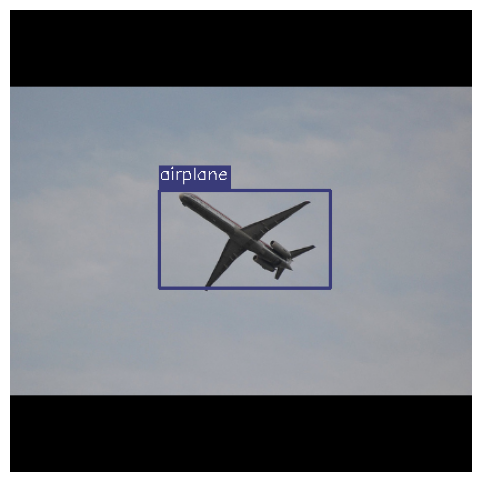

Epoch: 51


  0%|                                                                                                                             | 0/374 [00:07<?, ?it/s, loss=0.0864]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                  | 1/374 [00:21<2:13:29, 21.47s/it, loss=0.0864]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:35<1:03:52, 10.33s/it, loss=0.146]

batch_idx: 2


  1%|█▎                                                                                                                     | 4/374 [00:42<55:47,  9.05s/it, loss=0.16]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:50<51:54,  8.44s/it, loss=0.166]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [00:56<48:15,  7.87s/it, loss=0.158]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:04<48:32,  7.94s/it, loss=0.151]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:12<46:55,  7.69s/it, loss=0.141]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:19<46:00,  7.56s/it, loss=0.138]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:27<46:27,  7.66s/it, loss=0.139]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:33<44:16,  7.32s/it, loss=0.135]

batch_idx: 10


  3%|███▊                                                                                                                  | 12/374 [01:41<44:04,  7.30s/it, loss=0.13]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:48<43:22,  7.21s/it, loss=0.127]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:55<43:45,  7.29s/it, loss=0.127]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:02<42:35,  7.12s/it, loss=0.127]

batch_idx: 14


  4%|█████                                                                                                                 | 16/374 [02:08<41:37,  6.98s/it, loss=0.13]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:15<41:38,  7.00s/it, loss=0.128]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:23<42:22,  7.14s/it, loss=0.128]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:30<42:06,  7.12s/it, loss=0.128]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:37<41:52,  7.10s/it, loss=0.125]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:44<41:13,  7.01s/it, loss=0.124]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:51<40:58,  6.98s/it, loss=0.125]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:58<41:43,  7.13s/it, loss=0.123]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:06<41:58,  7.20s/it, loss=0.123]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:13<42:23,  7.29s/it, loss=0.122]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:21<42:41,  7.36s/it, loss=0.123]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:28<42:19,  7.32s/it, loss=0.121]

batch_idx: 26


  7%|████████▊                                                                                                             | 28/374 [03:35<42:06,  7.30s/it, loss=0.12]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:42<41:32,  7.23s/it, loss=0.119]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:50<41:55,  7.31s/it, loss=0.118]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:57<41:17,  7.22s/it, loss=0.118]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [04:04<40:54,  7.18s/it, loss=0.117]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:11<40:23,  7.11s/it, loss=0.118]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:18<41:09,  7.26s/it, loss=0.117]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:25<40:41,  7.20s/it, loss=0.119]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:33<40:31,  7.19s/it, loss=0.118]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:40<40:12,  7.16s/it, loss=0.118]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:47<40:56,  7.31s/it, loss=0.117]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:54<40:31,  7.26s/it, loss=0.117]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [05:04<44:04,  7.92s/it, loss=0.117]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:11<42:11,  7.60s/it, loss=0.116]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:18<41:30,  7.50s/it, loss=0.117]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:25<40:47,  7.39s/it, loss=0.117]

batch_idx: 42


 12%|█████████████▉                                                                                                        | 44/374 [05:33<40:52,  7.43s/it, loss=0.12]

batch_idx: 43


 12%|██████████████▏                                                                                                       | 45/374 [05:40<40:32,  7.39s/it, loss=0.12]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:47<39:29,  7.23s/it, loss=0.119]

batch_idx: 45


 13%|██████████████▊                                                                                                       | 47/374 [05:54<39:14,  7.20s/it, loss=0.12]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [06:01<39:07,  7.20s/it, loss=0.119]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:09<40:12,  7.42s/it, loss=0.121]

batch_idx: 48


 13%|███████████████▊                                                                                                      | 50/374 [06:16<39:41,  7.35s/it, loss=0.12]

batch_idx: 49


 14%|████████████████                                                                                                      | 51/374 [06:24<39:20,  7.31s/it, loss=0.12]

batch_idx: 50


 14%|████████████████▍                                                                                                     | 52/374 [06:31<38:44,  7.22s/it, loss=0.12]

batch_idx: 51


 14%|████████████████▋                                                                                                     | 53/374 [06:38<38:17,  7.16s/it, loss=0.12]

batch_idx: 52


 14%|█████████████████                                                                                                     | 54/374 [06:44<37:43,  7.07s/it, loss=0.12]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:51<37:22,  7.03s/it, loss=0.119]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:59<37:33,  7.09s/it, loss=0.119]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [07:06<38:05,  7.21s/it, loss=0.119]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:14<38:24,  7.29s/it, loss=0.118]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:21<37:50,  7.21s/it, loss=0.119]

batch_idx: 58


 16%|██████████████████▉                                                                                                   | 60/374 [07:28<37:35,  7.18s/it, loss=0.12]

batch_idx: 59


 16%|███████████████████▏                                                                                                  | 61/374 [07:35<37:28,  7.18s/it, loss=0.12]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:42<37:43,  7.25s/it, loss=0.119]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:50<37:40,  7.27s/it, loss=0.119]

batch_idx: 62


 17%|████████████████████▏                                                                                                 | 64/374 [07:57<37:14,  7.21s/it, loss=0.12]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [08:04<37:09,  7.22s/it, loss=0.119]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [08:11<37:02,  7.22s/it, loss=0.119]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:19<37:20,  7.30s/it, loss=0.118]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:25<36:04,  7.07s/it, loss=0.118]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:34<38:00,  7.48s/it, loss=0.119]

batch_idx: 68


 19%|██████████████████████                                                                                                | 70/374 [08:40<36:45,  7.26s/it, loss=0.12]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:47<35:59,  7.13s/it, loss=0.119]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:54<35:43,  7.10s/it, loss=0.119]

batch_idx: 71


 20%|███████████████████████                                                                                               | 73/374 [09:01<35:02,  6.98s/it, loss=0.12]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [09:08<35:06,  7.02s/it, loss=0.121]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:16<36:01,  7.23s/it, loss=0.121]

batch_idx: 74


 20%|███████████████████████▉                                                                                              | 76/374 [09:22<34:49,  7.01s/it, loss=0.12]

batch_idx: 75


 21%|████████████████████████▎                                                                                             | 77/374 [09:29<34:46,  7.03s/it, loss=0.12]

batch_idx: 76


 21%|████████████████████████▌                                                                                             | 78/374 [09:37<34:58,  7.09s/it, loss=0.12]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:44<35:54,  7.30s/it, loss=0.121]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:51<35:34,  7.26s/it, loss=0.121]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:59<36:15,  7.42s/it, loss=0.122]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [10:07<36:00,  7.40s/it, loss=0.122]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:14<35:23,  7.30s/it, loss=0.122]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:21<35:08,  7.27s/it, loss=0.121]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:28<34:50,  7.24s/it, loss=0.121]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:35<34:34,  7.20s/it, loss=0.121]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:41<33:10,  6.94s/it, loss=0.121]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:49<33:23,  7.01s/it, loss=0.121]

batch_idx: 87


 24%|████████████████████████████                                                                                          | 89/374 [10:56<33:51,  7.13s/it, loss=0.12]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [11:04<34:12,  7.23s/it, loss=0.121]

batch_idx: 89


 24%|████████████████████████████▋                                                                                         | 91/374 [11:10<33:12,  7.04s/it, loss=0.12]

batch_idx: 90


 25%|█████████████████████████████                                                                                         | 92/374 [11:17<33:17,  7.08s/it, loss=0.12]

batch_idx: 91


 25%|█████████████████████████████▎                                                                                        | 93/374 [11:24<32:56,  7.03s/it, loss=0.12]

batch_idx: 92


 25%|█████████████████████████████▋                                                                                        | 94/374 [11:31<32:45,  7.02s/it, loss=0.12]

batch_idx: 93


 25%|█████████████████████████████▉                                                                                        | 95/374 [11:39<33:24,  7.19s/it, loss=0.12]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:45<32:31,  7.02s/it, loss=0.121]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:52<32:19,  7.00s/it, loss=0.122]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [12:00<32:26,  7.05s/it, loss=0.123]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [12:06<31:55,  6.97s/it, loss=0.122]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:13<32:04,  7.02s/it, loss=0.122]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:20<31:42,  6.97s/it, loss=0.122]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:28<32:25,  7.15s/it, loss=0.122]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:35<31:47,  7.04s/it, loss=0.122]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:42<31:50,  7.08s/it, loss=0.122]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:49<32:19,  7.21s/it, loss=0.122]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:56<31:21,  7.02s/it, loss=0.122]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [13:03<31:29,  7.08s/it, loss=0.122]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [13:11<31:51,  7.19s/it, loss=0.122]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:18<32:04,  7.26s/it, loss=0.123]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:25<31:41,  7.20s/it, loss=0.122]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:33<32:49,  7.49s/it, loss=0.122]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:40<32:12,  7.38s/it, loss=0.123]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:48<31:46,  7.30s/it, loss=0.123]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [13:55<31:35,  7.29s/it, loss=0.123]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [14:02<30:54,  7.16s/it, loss=0.123]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [14:09<31:08,  7.24s/it, loss=0.123]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:16<30:21,  7.09s/it, loss=0.124]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:23<30:37,  7.18s/it, loss=0.124]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:30<30:21,  7.14s/it, loss=0.123]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:38<30:36,  7.23s/it, loss=0.123]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:45<31:01,  7.36s/it, loss=0.123]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:52<30:21,  7.23s/it, loss=0.123]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [14:59<30:11,  7.22s/it, loss=0.122]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [15:06<29:12,  7.01s/it, loss=0.122]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [15:13<29:24,  7.09s/it, loss=0.122]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:20<28:40,  6.94s/it, loss=0.122]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:26<27:49,  6.76s/it, loss=0.122]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:33<27:55,  6.81s/it, loss=0.123]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:40<27:20,  6.70s/it, loss=0.123]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:47<28:03,  6.90s/it, loss=0.123]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:54<28:27,  7.03s/it, loss=0.123]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [16:01<28:31,  7.07s/it, loss=0.123]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [16:09<28:46,  7.17s/it, loss=0.123]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:16<28:32,  7.13s/it, loss=0.122]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:23<28:39,  7.20s/it, loss=0.122]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:31<28:40,  7.23s/it, loss=0.122]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:38<28:29,  7.21s/it, loss=0.123]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:46<29:52,  7.59s/it, loss=0.123]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [16:54<30:13,  7.72s/it, loss=0.123]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [17:02<29:42,  7.62s/it, loss=0.124]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [17:10<30:03,  7.74s/it, loss=0.123]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [17:16<28:45,  7.44s/it, loss=0.123]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:24<28:29,  7.40s/it, loss=0.124]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:31<28:35,  7.46s/it, loss=0.124]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:38<27:50,  7.30s/it, loss=0.124]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:46<28:36,  7.53s/it, loss=0.124]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:53<28:11,  7.45s/it, loss=0.124]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [18:01<27:37,  7.33s/it, loss=0.124]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [18:09<29:10,  7.78s/it, loss=0.125]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [18:16<28:11,  7.55s/it, loss=0.124]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:25<28:49,  7.76s/it, loss=0.124]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:31<27:36,  7.46s/it, loss=0.124]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:39<27:28,  7.46s/it, loss=0.124]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:46<27:02,  7.38s/it, loss=0.124]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:53<26:31,  7.26s/it, loss=0.124]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [19:00<26:16,  7.23s/it, loss=0.124]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [19:07<25:53,  7.16s/it, loss=0.124]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [19:13<24:47,  6.89s/it, loss=0.124]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [19:21<25:37,  7.15s/it, loss=0.124]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:30<26:49,  7.52s/it, loss=0.124]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:37<26:15,  7.39s/it, loss=0.124]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:44<26:12,  7.42s/it, loss=0.124]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:51<25:55,  7.37s/it, loss=0.124]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:58<25:28,  7.28s/it, loss=0.123]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [20:06<25:28,  7.31s/it, loss=0.124]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [20:13<25:03,  7.23s/it, loss=0.124]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [20:20<25:13,  7.31s/it, loss=0.124]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:27<24:45,  7.21s/it, loss=0.124]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:34<24:23,  7.14s/it, loss=0.123]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:41<24:05,  7.08s/it, loss=0.123]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:49<24:23,  7.21s/it, loss=0.123]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:56<23:49,  7.08s/it, loss=0.123]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [21:02<23:33,  7.03s/it, loss=0.123]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [21:09<23:10,  6.95s/it, loss=0.123]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [21:17<23:27,  7.07s/it, loss=0.123]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [21:24<23:34,  7.14s/it, loss=0.123]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:31<23:16,  7.09s/it, loss=0.123]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:38<23:26,  7.18s/it, loss=0.123]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:45<22:30,  6.92s/it, loss=0.123]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:52<22:23,  6.93s/it, loss=0.123]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [21:58<21:57,  6.82s/it, loss=0.123]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [22:05<22:00,  6.88s/it, loss=0.124]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [22:13<22:50,  7.17s/it, loss=0.124]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [22:20<22:23,  7.07s/it, loss=0.124]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:27<22:33,  7.16s/it, loss=0.124]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:34<22:23,  7.15s/it, loss=0.124]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:41<22:09,  7.11s/it, loss=0.124]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:48<22:05,  7.13s/it, loss=0.125]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [22:56<21:55,  7.11s/it, loss=0.125]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [23:03<21:43,  7.09s/it, loss=0.125]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [23:11<22:24,  7.35s/it, loss=0.125]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [23:17<21:49,  7.19s/it, loss=0.125]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [23:25<21:51,  7.25s/it, loss=0.125]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:34<23:46,  7.93s/it, loss=0.125]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:42<23:02,  7.72s/it, loss=0.125]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [23:49<22:35,  7.61s/it, loss=0.125]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [23:56<22:07,  7.50s/it, loss=0.126]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [24:03<21:36,  7.37s/it, loss=0.126]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [24:10<21:17,  7.30s/it, loss=0.126]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:19<22:39,  7.82s/it, loss=0.125]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:28<22:39,  7.82s/it, loss=0.126]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▎                                                     | 201/374 [24:53<45:15, 15.70s/it, loss=0.126]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [25:08<32:39, 11.46s/it, loss=0.126]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [25:16<29:23, 10.37s/it, loss=0.126]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [25:24<26:49,  9.53s/it, loss=0.126]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [25:31<24:34,  8.77s/it, loss=0.126]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [25:39<23:36,  8.48s/it, loss=0.126]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:45<21:59,  7.95s/it, loss=0.126]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:53<21:34,  7.84s/it, loss=0.126]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [26:00<20:38,  7.55s/it, loss=0.126]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [26:07<20:34,  7.57s/it, loss=0.126]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [26:14<19:52,  7.36s/it, loss=0.127]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [26:21<19:28,  7.26s/it, loss=0.126]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [26:29<19:39,  7.37s/it, loss=0.127]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [26:36<19:40,  7.43s/it, loss=0.127]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [26:45<20:01,  7.60s/it, loss=0.127]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:52<19:42,  7.53s/it, loss=0.127]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:59<19:12,  7.39s/it, loss=0.127]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [27:06<18:44,  7.25s/it, loss=0.127]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [27:14<19:08,  7.46s/it, loss=0.127]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [27:21<18:47,  7.37s/it, loss=0.127]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [27:27<17:53,  7.06s/it, loss=0.126]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [27:34<17:43,  7.04s/it, loss=0.126]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:41<17:31,  7.01s/it, loss=0.126]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:48<17:29,  7.04s/it, loss=0.126]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:55<17:22,  7.04s/it, loss=0.126]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [28:02<17:15,  7.04s/it, loss=0.126]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [28:10<17:12,  7.07s/it, loss=0.126]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [28:17<17:13,  7.13s/it, loss=0.126]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [28:24<17:13,  7.17s/it, loss=0.126]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [28:31<17:07,  7.19s/it, loss=0.126]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [28:39<17:03,  7.20s/it, loss=0.126]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:45<16:42,  7.11s/it, loss=0.127]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:52<16:26,  7.04s/it, loss=0.126]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:59<16:13,  7.00s/it, loss=0.126]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [29:06<15:47,  6.87s/it, loss=0.126]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [29:13<16:05,  7.05s/it, loss=0.126]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [29:21<16:07,  7.12s/it, loss=0.126]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [29:27<15:37,  6.95s/it, loss=0.126]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [29:34<15:32,  6.96s/it, loss=0.126]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:42<15:53,  7.17s/it, loss=0.126]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:50<16:17,  7.41s/it, loss=0.126]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:56<15:38,  7.17s/it, loss=0.126]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [30:03<15:08,  6.99s/it, loss=0.126]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [30:10<15:14,  7.09s/it, loss=0.126]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [30:18<15:15,  7.15s/it, loss=0.127]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [30:24<14:57,  7.07s/it, loss=0.127]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [30:32<14:57,  7.13s/it, loss=0.126]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [30:39<15:09,  7.28s/it, loss=0.126]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:46<14:51,  7.19s/it, loss=0.127]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:53<14:45,  7.20s/it, loss=0.127]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [31:00<14:15,  7.01s/it, loss=0.127]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [31:07<14:05,  6.99s/it, loss=0.127]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [31:14<14:16,  7.14s/it, loss=0.127]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [31:22<14:06,  7.11s/it, loss=0.127]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [31:28<13:48,  7.02s/it, loss=0.127]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [31:35<13:43,  7.04s/it, loss=0.127]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:43<13:56,  7.21s/it, loss=0.127]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:50<13:45,  7.17s/it, loss=0.127]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:57<13:35,  7.15s/it, loss=0.127]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [32:05<13:48,  7.33s/it, loss=0.127]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [32:12<13:35,  7.28s/it, loss=0.127]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [32:19<13:07,  7.09s/it, loss=0.126]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [32:26<13:00,  7.10s/it, loss=0.126]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [32:34<13:21,  7.35s/it, loss=0.126]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [32:41<13:21,  7.43s/it, loss=0.126]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:49<13:13,  7.41s/it, loss=0.126]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:55<12:38,  7.16s/it, loss=0.126]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [33:02<12:13,  6.98s/it, loss=0.126]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [33:09<12:09,  7.02s/it, loss=0.126]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [33:16<12:13,  7.12s/it, loss=0.127]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [33:24<12:25,  7.31s/it, loss=0.127]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [33:31<12:14,  7.27s/it, loss=0.127]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [33:39<12:11,  7.32s/it, loss=0.127]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:45<11:45,  7.13s/it, loss=0.126]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:53<11:39,  7.14s/it, loss=0.126]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [34:00<11:34,  7.16s/it, loss=0.127]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [34:07<11:25,  7.14s/it, loss=0.127]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [34:14<11:05,  7.01s/it, loss=0.127]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [34:21<10:55,  6.98s/it, loss=0.127]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [34:28<11:00,  7.10s/it, loss=0.127]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [34:35<10:45,  7.02s/it, loss=0.127]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [34:42<10:55,  7.21s/it, loss=0.127]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:50<10:51,  7.24s/it, loss=0.127]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:57<10:36,  7.15s/it, loss=0.127]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [35:04<10:24,  7.09s/it, loss=0.128]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [35:11<10:31,  7.26s/it, loss=0.127]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [35:19<10:33,  7.37s/it, loss=0.127]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [35:26<10:25,  7.36s/it, loss=0.128]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [35:34<10:18,  7.36s/it, loss=0.128]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [35:41<10:09,  7.35s/it, loss=0.128]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:48<10:03,  7.35s/it, loss=0.128]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [35:55<09:43,  7.20s/it, loss=0.128]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [36:02<09:35,  7.19s/it, loss=0.128]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [36:09<09:25,  7.16s/it, loss=0.128]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [36:17<09:24,  7.24s/it, loss=0.128]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [36:23<09:03,  7.06s/it, loss=0.128]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [36:31<08:57,  7.08s/it, loss=0.128]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [36:38<09:07,  7.30s/it, loss=0.128]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [36:47<09:35,  7.77s/it, loss=0.128]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [36:54<09:10,  7.53s/it, loss=0.127]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [37:01<08:54,  7.42s/it, loss=0.127]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [37:09<08:50,  7.47s/it, loss=0.128]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [37:16<08:31,  7.31s/it, loss=0.128]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [37:23<08:26,  7.35s/it, loss=0.128]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [37:30<08:13,  7.26s/it, loss=0.128]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [37:37<07:51,  7.04s/it, loss=0.128]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [37:44<07:42,  7.00s/it, loss=0.128]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:52<07:51,  7.25s/it, loss=0.128]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [37:59<07:41,  7.21s/it, loss=0.127]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [38:07<07:49,  7.45s/it, loss=0.127]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [38:14<07:37,  7.38s/it, loss=0.127]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [38:21<07:25,  7.30s/it, loss=0.128]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [38:29<07:19,  7.32s/it, loss=0.127]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [38:36<07:13,  7.34s/it, loss=0.128]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [38:43<07:01,  7.27s/it, loss=0.128]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [38:50<06:53,  7.26s/it, loss=0.128]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [39:06<06:57,  7.58s/it, loss=0.128]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [39:14<06:46,  7.54s/it, loss=0.128]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [39:20<06:23,  7.23s/it, loss=0.128]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [39:27<06:12,  7.17s/it, loss=0.128]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [39:34<06:01,  7.09s/it, loss=0.128]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [39:41<05:55,  7.10s/it, loss=0.128]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [39:49<05:50,  7.15s/it, loss=0.128]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:56<05:48,  7.27s/it, loss=0.128]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [40:03<05:32,  7.08s/it, loss=0.128]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [40:10<05:27,  7.13s/it, loss=0.128]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [40:17<05:14,  6.99s/it, loss=0.128]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [40:23<05:05,  6.94s/it, loss=0.128]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [40:31<05:05,  7.10s/it, loss=0.128]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [40:39<05:09,  7.36s/it, loss=0.128]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [40:47<05:07,  7.50s/it, loss=0.128]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:54<04:59,  7.48s/it, loss=0.128]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [41:01<04:45,  7.32s/it, loss=0.128]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [41:08<04:38,  7.33s/it, loss=0.128]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [41:16<04:27,  7.23s/it, loss=0.128]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [41:23<04:20,  7.24s/it, loss=0.128]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [41:30<04:16,  7.32s/it, loss=0.127]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [41:37<04:07,  7.28s/it, loss=0.127]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [41:45<04:06,  7.47s/it, loss=0.128]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [41:52<03:48,  7.13s/it, loss=0.128]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:59<03:42,  7.19s/it, loss=0.128]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [42:06<03:31,  7.06s/it, loss=0.128]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [42:13<03:26,  7.13s/it, loss=0.128]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [42:20<03:17,  7.05s/it, loss=0.128]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [42:27<03:08,  7.00s/it, loss=0.128]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [42:34<03:06,  7.18s/it, loss=0.128]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [42:43<03:07,  7.50s/it, loss=0.128]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [42:49<02:52,  7.19s/it, loss=0.128]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:56<02:45,  7.19s/it, loss=0.128]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [43:03<02:36,  7.12s/it, loss=0.128]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [43:11<02:32,  7.27s/it, loss=0.127]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [43:17<02:19,  6.99s/it, loss=0.127]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:24<02:11,  6.94s/it, loss=0.127]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [43:31<02:04,  6.94s/it, loss=0.127]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [43:38<01:58,  6.95s/it, loss=0.127]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [43:46<01:56,  7.25s/it, loss=0.127]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:52<01:45,  7.01s/it, loss=0.127]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [44:00<01:39,  7.08s/it, loss=0.127]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [44:06<01:31,  7.01s/it, loss=0.127]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [44:13<01:24,  7.02s/it, loss=0.127]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:20<01:16,  6.99s/it, loss=0.127]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [44:28<01:10,  7.02s/it, loss=0.127]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [44:35<01:03,  7.09s/it, loss=0.127]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [44:42<00:56,  7.10s/it, loss=0.127]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:49<00:49,  7.10s/it, loss=0.127]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [44:57<00:44,  7.38s/it, loss=0.127]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [45:04<00:36,  7.28s/it, loss=0.127]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [45:11<00:29,  7.27s/it, loss=0.127]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:19<00:21,  7.28s/it, loss=0.127]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:26<00:14,  7.20s/it, loss=0.127]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [45:33<00:07,  7.18s/it, loss=0.127]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [45:35<00:00,  7.31s/it, loss=0.127]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


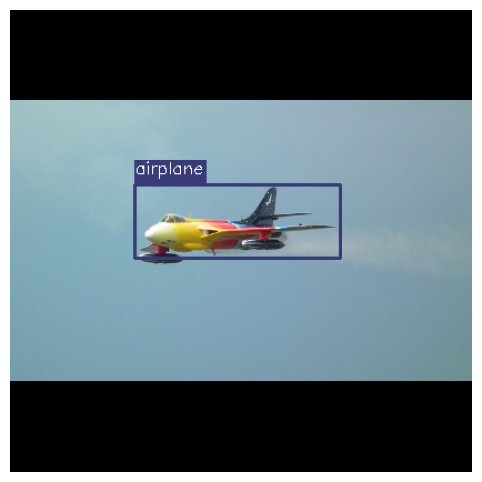

Epoch: 52


  0%|                                                                                                                             | 0/374 [00:07<?, ?it/s, loss=0.0752]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:37<1:43:17, 16.66s/it, loss=0.109]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:44<1:17:27, 12.53s/it, loss=0.126]

batch_idx: 2


  1%|█▏                                                                                                                  | 4/374 [00:52<1:05:23, 10.60s/it, loss=0.127]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:59<56:52,  9.25s/it, loss=0.119]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [01:06<52:56,  8.63s/it, loss=0.116]

batch_idx: 5


  2%|██▏                                                                                                                    | 7/374 [01:16<55:01,  9.00s/it, loss=0.11]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:24<51:50,  8.50s/it, loss=0.106]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:31<48:48,  8.02s/it, loss=0.107]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:37<46:33,  7.68s/it, loss=0.105]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:45<45:32,  7.53s/it, loss=0.115]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:52<44:24,  7.36s/it, loss=0.117]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:59<43:44,  7.27s/it, loss=0.123]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [02:06<43:35,  7.27s/it, loss=0.122]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:13<42:22,  7.08s/it, loss=0.119]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:20<42:35,  7.14s/it, loss=0.122]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:27<42:51,  7.20s/it, loss=0.123]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:35<43:37,  7.35s/it, loss=0.127]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:42<43:11,  7.30s/it, loss=0.126]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:49<42:06,  7.14s/it, loss=0.125]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:56<42:07,  7.16s/it, loss=0.127]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [03:04<42:34,  7.26s/it, loss=0.128]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [03:11<43:21,  7.41s/it, loss=0.128]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:19<43:12,  7.41s/it, loss=0.128]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:26<43:31,  7.48s/it, loss=0.127]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:33<42:12,  7.28s/it, loss=0.128]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:41<42:55,  7.42s/it, loss=0.128]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:47<40:43,  7.06s/it, loss=0.127]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:54<40:34,  7.06s/it, loss=0.127]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [04:02<41:49,  7.30s/it, loss=0.128]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [04:09<41:47,  7.31s/it, loss=0.131]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [04:17<41:49,  7.34s/it, loss=0.133]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:26<44:50,  7.89s/it, loss=0.133]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:34<44:08,  7.79s/it, loss=0.132]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:42<45:37,  8.07s/it, loss=0.133]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:49<43:15,  7.68s/it, loss=0.133]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:56<41:35,  7.40s/it, loss=0.132]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [05:03<40:43,  7.27s/it, loss=0.134]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [05:10<40:42,  7.29s/it, loss=0.133]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [05:17<39:47,  7.15s/it, loss=0.133]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:24<39:13,  7.07s/it, loss=0.133]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:31<39:50,  7.20s/it, loss=0.134]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:38<39:30,  7.16s/it, loss=0.134]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:45<39:17,  7.14s/it, loss=0.133]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:53<39:29,  7.20s/it, loss=0.132]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [06:00<39:01,  7.14s/it, loss=0.131]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [06:07<38:32,  7.07s/it, loss=0.131]

batch_idx: 46


 13%|███████████████▏                                                                                                      | 48/374 [06:14<39:04,  7.19s/it, loss=0.13]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:21<38:59,  7.20s/it, loss=0.131]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:28<38:23,  7.11s/it, loss=0.131]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:37<40:05,  7.45s/it, loss=0.131]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:44<40:11,  7.49s/it, loss=0.131]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:52<41:02,  7.67s/it, loss=0.131]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [07:02<43:47,  8.21s/it, loss=0.132]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [07:09<42:12,  7.94s/it, loss=0.131]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [07:16<41:21,  7.80s/it, loss=0.131]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [07:24<40:50,  7.73s/it, loss=0.132]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:32<40:22,  7.67s/it, loss=0.132]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:39<39:23,  7.50s/it, loss=0.131]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:45<37:32,  7.17s/it, loss=0.132]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:52<37:18,  7.15s/it, loss=0.131]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [08:00<37:51,  7.28s/it, loss=0.131]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [08:07<38:11,  7.37s/it, loss=0.131]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [08:14<37:10,  7.20s/it, loss=0.131]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [08:21<36:43,  7.13s/it, loss=0.131]

batch_idx: 64


 18%|████████████████████▊                                                                                                 | 66/374 [08:28<35:50,  6.98s/it, loss=0.13]

batch_idx: 65


 18%|█████████████████████▏                                                                                                | 67/374 [08:35<36:18,  7.10s/it, loss=0.13]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:42<36:23,  7.14s/it, loss=0.129]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:50<37:32,  7.39s/it, loss=0.131]

batch_idx: 68


 19%|██████████████████████                                                                                                | 70/374 [08:57<37:07,  7.33s/it, loss=0.13]

batch_idx: 69


 19%|██████████████████████▍                                                                                               | 71/374 [09:05<37:15,  7.38s/it, loss=0.13]

batch_idx: 70


 19%|██████████████████████▋                                                                                               | 72/374 [09:12<36:58,  7.34s/it, loss=0.13]

batch_idx: 71


 20%|███████████████████████                                                                                               | 73/374 [09:20<37:26,  7.46s/it, loss=0.13]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [09:26<35:47,  7.16s/it, loss=0.129]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:33<35:25,  7.11s/it, loss=0.128]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:41<35:24,  7.13s/it, loss=0.128]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:48<35:29,  7.17s/it, loss=0.128]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:55<35:49,  7.26s/it, loss=0.129]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [10:03<35:48,  7.28s/it, loss=0.129]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [10:11<36:34,  7.46s/it, loss=0.129]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [10:18<36:02,  7.38s/it, loss=0.129]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [10:25<35:19,  7.26s/it, loss=0.129]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:33<36:00,  7.43s/it, loss=0.129]

batch_idx: 82


 22%|██████████████████████████▌                                                                                           | 84/374 [10:40<35:27,  7.34s/it, loss=0.13]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:47<35:30,  7.37s/it, loss=0.129]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:55<36:39,  7.64s/it, loss=0.129]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [11:03<36:24,  7.61s/it, loss=0.128]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [11:10<35:40,  7.48s/it, loss=0.129]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [11:19<36:48,  7.75s/it, loss=0.129]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [11:25<35:27,  7.49s/it, loss=0.129]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [11:34<36:21,  7.71s/it, loss=0.128]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:41<35:27,  7.54s/it, loss=0.128]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:48<34:27,  7.36s/it, loss=0.128]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:54<33:14,  7.12s/it, loss=0.128]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [12:01<32:18,  6.95s/it, loss=0.128]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [12:08<31:53,  6.88s/it, loss=0.128]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [12:15<32:17,  7.00s/it, loss=0.128]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [12:22<32:08,  6.99s/it, loss=0.127]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [12:30<33:17,  7.26s/it, loss=0.127]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:37<33:38,  7.37s/it, loss=0.127]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:45<34:27,  7.57s/it, loss=0.127]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:52<33:36,  7.41s/it, loss=0.127]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [13:00<33:45,  7.47s/it, loss=0.126]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [13:07<33:16,  7.39s/it, loss=0.126]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [13:14<32:06,  7.16s/it, loss=0.127]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [13:21<31:30,  7.05s/it, loss=0.127]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [13:28<31:35,  7.10s/it, loss=0.127]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [13:35<30:58,  6.99s/it, loss=0.127]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:41<30:46,  6.97s/it, loss=0.127]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:49<31:00,  7.05s/it, loss=0.127]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:56<31:19,  7.15s/it, loss=0.127]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [14:03<31:11,  7.14s/it, loss=0.127]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [14:10<30:50,  7.09s/it, loss=0.129]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [14:17<30:52,  7.13s/it, loss=0.129]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [14:24<30:32,  7.07s/it, loss=0.128]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [14:32<30:42,  7.14s/it, loss=0.128]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:38<30:06,  7.03s/it, loss=0.128]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:45<29:11,  6.84s/it, loss=0.128]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:52<29:14,  6.88s/it, loss=0.128]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:59<29:37,  7.00s/it, loss=0.128]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [15:07<30:06,  7.14s/it, loss=0.128]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [15:14<30:13,  7.20s/it, loss=0.128]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [15:21<29:35,  7.08s/it, loss=0.128]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [15:27<28:57,  6.95s/it, loss=0.128]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [15:34<28:59,  6.99s/it, loss=0.127]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:41<28:26,  6.88s/it, loss=0.127]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:48<28:42,  6.98s/it, loss=0.127]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:55<28:36,  6.98s/it, loss=0.126]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [16:02<28:40,  7.02s/it, loss=0.127]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [16:10<29:15,  7.20s/it, loss=0.127]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [16:17<28:58,  7.16s/it, loss=0.127]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [16:24<28:21,  7.03s/it, loss=0.127]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [16:31<29:01,  7.23s/it, loss=0.127]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:38<28:25,  7.10s/it, loss=0.127]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:45<28:25,  7.13s/it, loss=0.127]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:52<27:42,  6.98s/it, loss=0.127]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:59<28:00,  7.09s/it, loss=0.127]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [17:08<29:12,  7.43s/it, loss=0.127]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [17:14<28:17,  7.22s/it, loss=0.127]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [17:21<27:37,  7.08s/it, loss=0.127]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [17:29<28:10,  7.25s/it, loss=0.128]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [17:36<28:06,  7.27s/it, loss=0.127]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:43<27:41,  7.19s/it, loss=0.128]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:51<27:57,  7.29s/it, loss=0.128]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:58<28:15,  7.41s/it, loss=0.127]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [18:05<27:40,  7.28s/it, loss=0.128]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [18:12<26:59,  7.13s/it, loss=0.128]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [18:20<27:17,  7.24s/it, loss=0.128]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [18:27<26:58,  7.19s/it, loss=0.127]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [18:34<26:57,  7.22s/it, loss=0.127]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:41<26:47,  7.21s/it, loss=0.128]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:48<26:24,  7.14s/it, loss=0.128]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:55<25:30,  6.92s/it, loss=0.127]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [19:02<25:37,  6.99s/it, loss=0.127]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [19:09<25:33,  7.00s/it, loss=0.127]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [19:17<26:22,  7.26s/it, loss=0.127]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [19:24<26:23,  7.30s/it, loss=0.128]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [19:31<26:27,  7.35s/it, loss=0.128]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [19:38<26:01,  7.26s/it, loss=0.127]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:45<25:05,  7.04s/it, loss=0.127]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:52<24:39,  6.94s/it, loss=0.127]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:58<24:21,  6.89s/it, loss=0.127]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [20:06<24:26,  6.95s/it, loss=0.127]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [20:13<24:28,  6.99s/it, loss=0.127]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [20:20<24:31,  7.04s/it, loss=0.127]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [20:27<24:47,  7.15s/it, loss=0.128]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [20:34<23:47,  6.90s/it, loss=0.128]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:41<23:58,  6.99s/it, loss=0.128]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:48<23:41,  6.93s/it, loss=0.128]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:55<23:44,  6.98s/it, loss=0.129]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [21:02<24:25,  7.22s/it, loss=0.129]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [21:11<25:33,  7.59s/it, loss=0.129]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [21:19<26:10,  7.81s/it, loss=0.129]

batch_idx: 172


 47%|██████████████████████████████████████████████████████▍                                                              | 174/374 [21:26<25:13,  7.57s/it, loss=0.13]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [21:33<24:21,  7.35s/it, loss=0.129]

batch_idx: 174


 47%|███████████████████████████████████████████████████████                                                              | 176/374 [21:41<24:27,  7.41s/it, loss=0.13]

batch_idx: 175


 47%|███████████████████████████████████████████████████████▎                                                             | 177/374 [21:47<23:51,  7.27s/it, loss=0.13]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▋                                                             | 178/374 [21:54<23:23,  7.16s/it, loss=0.13]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▉                                                             | 179/374 [22:01<22:57,  7.06s/it, loss=0.13]

batch_idx: 178


 48%|████████████████████████████████████████████████████████▎                                                            | 180/374 [22:09<23:32,  7.28s/it, loss=0.13]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▌                                                            | 181/374 [22:16<23:11,  7.21s/it, loss=0.13]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▉                                                            | 182/374 [22:24<23:26,  7.33s/it, loss=0.13]

batch_idx: 181


 49%|█████████████████████████████████████████████████████████▏                                                           | 183/374 [22:31<22:50,  7.18s/it, loss=0.13]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████▌                                                           | 184/374 [22:38<22:49,  7.21s/it, loss=0.13]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▊                                                           | 185/374 [22:45<22:57,  7.29s/it, loss=0.13]

batch_idx: 184


 50%|██████████████████████████████████████████████████████████▏                                                          | 186/374 [22:52<22:37,  7.22s/it, loss=0.13]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████▌                                                          | 187/374 [23:00<23:03,  7.40s/it, loss=0.13]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▊                                                          | 188/374 [23:08<22:57,  7.40s/it, loss=0.13]

batch_idx: 187


 51%|███████████████████████████████████████████████████████████▏                                                         | 189/374 [23:15<22:34,  7.32s/it, loss=0.13]

batch_idx: 188


 51%|███████████████████████████████████████████████████████████▍                                                         | 190/374 [23:22<22:52,  7.46s/it, loss=0.13]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▊                                                         | 191/374 [23:30<22:43,  7.45s/it, loss=0.13]

batch_idx: 190


 51%|████████████████████████████████████████████████████████████                                                         | 192/374 [23:37<22:15,  7.34s/it, loss=0.13]

batch_idx: 191


 52%|████████████████████████████████████████████████████████████▍                                                        | 193/374 [23:44<22:13,  7.37s/it, loss=0.13]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▋                                                        | 194/374 [23:51<21:47,  7.27s/it, loss=0.13]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:59<21:45,  7.29s/it, loss=0.129]

batch_idx: 194


 52%|█████████████████████████████████████████████████████████████▎                                                       | 196/374 [24:06<21:42,  7.32s/it, loss=0.13]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [24:14<21:44,  7.37s/it, loss=0.129]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [24:20<21:04,  7.18s/it, loss=0.129]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [24:28<21:08,  7.25s/it, loss=0.129]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:35<20:36,  7.10s/it, loss=0.129]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:42<20:36,  7.10s/it, loss=0.129]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▋                                                     | 202/374 [25:00<27:06,  9.45s/it, loss=0.128]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [25:06<24:25,  8.57s/it, loss=0.128]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [25:13<22:27,  7.93s/it, loss=0.128]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [25:20<21:35,  7.67s/it, loss=0.129]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [25:27<21:05,  7.53s/it, loss=0.129]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [25:34<20:43,  7.45s/it, loss=0.129]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:41<20:03,  7.25s/it, loss=0.129]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:48<19:47,  7.19s/it, loss=0.129]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:55<19:34,  7.16s/it, loss=0.129]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [26:02<19:27,  7.16s/it, loss=0.129]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [26:09<19:13,  7.12s/it, loss=0.129]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [26:17<19:31,  7.28s/it, loss=0.129]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [26:26<20:41,  7.76s/it, loss=0.129]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [26:33<19:45,  7.46s/it, loss=0.129]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [26:41<20:06,  7.64s/it, loss=0.129]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:48<19:42,  7.53s/it, loss=0.129]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:55<19:21,  7.45s/it, loss=0.129]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [27:03<19:17,  7.47s/it, loss=0.129]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [27:10<19:03,  7.42s/it, loss=0.129]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [27:17<18:40,  7.33s/it, loss=0.129]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [27:24<18:15,  7.20s/it, loss=0.128]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [27:32<18:36,  7.40s/it, loss=0.128]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:39<18:12,  7.28s/it, loss=0.128]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:46<17:49,  7.18s/it, loss=0.128]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:53<17:59,  7.30s/it, loss=0.128]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [28:00<17:39,  7.21s/it, loss=0.128]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [28:07<17:19,  7.12s/it, loss=0.128]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [28:15<17:20,  7.18s/it, loss=0.128]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [28:22<17:02,  7.10s/it, loss=0.128]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [28:29<16:54,  7.10s/it, loss=0.128]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [28:36<16:52,  7.13s/it, loss=0.129]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:43<16:38,  7.08s/it, loss=0.128]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:50<16:28,  7.06s/it, loss=0.128]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:57<16:36,  7.17s/it, loss=0.128]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [29:05<16:32,  7.19s/it, loss=0.129]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [29:12<16:23,  7.18s/it, loss=0.128]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [29:19<16:31,  7.29s/it, loss=0.128]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [29:27<16:31,  7.35s/it, loss=0.128]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [29:35<16:44,  7.49s/it, loss=0.128]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:42<16:21,  7.38s/it, loss=0.128]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:48<15:50,  7.20s/it, loss=0.128]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:56<15:37,  7.16s/it, loss=0.128]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [30:02<14:46,  6.82s/it, loss=0.128]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [30:10<15:58,  7.43s/it, loss=0.128]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [30:19<16:17,  7.64s/it, loss=0.128]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [30:26<15:53,  7.51s/it, loss=0.128]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [30:33<15:18,  7.29s/it, loss=0.128]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [30:40<15:04,  7.24s/it, loss=0.128]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:47<14:47,  7.16s/it, loss=0.128]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:54<14:49,  7.23s/it, loss=0.128]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [31:01<14:47,  7.27s/it, loss=0.128]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [31:11<16:13,  8.05s/it, loss=0.128]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [31:18<15:25,  7.71s/it, loss=0.128]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [31:25<14:51,  7.49s/it, loss=0.128]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [31:33<15:08,  7.70s/it, loss=0.128]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [31:40<14:36,  7.49s/it, loss=0.128]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:48<14:22,  7.43s/it, loss=0.128]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:54<13:48,  7.20s/it, loss=0.128]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [32:01<13:27,  7.08s/it, loss=0.128]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [32:08<13:03,  6.93s/it, loss=0.128]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [32:15<12:56,  6.93s/it, loss=0.129]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [32:22<13:03,  7.06s/it, loss=0.129]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [32:29<12:57,  7.07s/it, loss=0.129]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [32:36<12:53,  7.09s/it, loss=0.129]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [32:44<13:02,  7.25s/it, loss=0.129]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:51<13:03,  7.33s/it, loss=0.129]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:58<12:37,  7.14s/it, loss=0.129]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [33:07<13:22,  7.65s/it, loss=0.129]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [33:14<13:09,  7.59s/it, loss=0.129]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [33:22<13:06,  7.63s/it, loss=0.129]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [33:30<13:05,  7.70s/it, loss=0.129]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [33:38<13:00,  7.73s/it, loss=0.129]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [33:45<12:34,  7.55s/it, loss=0.129]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:52<12:04,  7.32s/it, loss=0.129]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:59<11:52,  7.27s/it, loss=0.129]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [34:06<11:46,  7.29s/it, loss=0.129]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [34:13<11:24,  7.13s/it, loss=0.129]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [34:20<11:15,  7.12s/it, loss=0.129]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [34:27<11:07,  7.10s/it, loss=0.128]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [34:34<11:05,  7.15s/it, loss=0.128]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [34:42<11:03,  7.21s/it, loss=0.128]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [34:49<10:57,  7.22s/it, loss=0.128]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:56<10:47,  7.20s/it, loss=0.128]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [35:03<10:37,  7.17s/it, loss=0.128]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [35:10<10:31,  7.17s/it, loss=0.128]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [35:18<10:47,  7.44s/it, loss=0.128]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [35:26<10:35,  7.40s/it, loss=0.128]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [35:33<10:14,  7.23s/it, loss=0.128]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [35:40<10:07,  7.24s/it, loss=0.128]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [35:47<09:55,  7.17s/it, loss=0.128]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:54<09:54,  7.25s/it, loss=0.128]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [36:01<09:39,  7.15s/it, loss=0.128]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [36:08<09:34,  7.18s/it, loss=0.127]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [36:16<09:31,  7.24s/it, loss=0.127]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [36:24<09:42,  7.47s/it, loss=0.127]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [36:31<09:34,  7.46s/it, loss=0.127]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [36:38<09:15,  7.31s/it, loss=0.128]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [36:45<08:58,  7.19s/it, loss=0.128]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [36:53<09:08,  7.41s/it, loss=0.128]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [37:00<08:49,  7.26s/it, loss=0.128]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [37:07<08:37,  7.19s/it, loss=0.128]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [37:14<08:30,  7.19s/it, loss=0.127]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [37:20<08:05,  6.94s/it, loss=0.127]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [37:28<08:09,  7.09s/it, loss=0.127]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [37:35<08:04,  7.13s/it, loss=0.127]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [37:43<08:07,  7.28s/it, loss=0.127]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [37:50<08:00,  7.28s/it, loss=0.127]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:57<07:37,  7.03s/it, loss=0.127]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [38:04<07:30,  7.04s/it, loss=0.127]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [38:11<07:29,  7.14s/it, loss=0.127]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [38:19<07:33,  7.31s/it, loss=0.127]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [38:26<07:30,  7.39s/it, loss=0.127]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [38:33<07:18,  7.31s/it, loss=0.127]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [38:40<07:07,  7.24s/it, loss=0.127]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [38:47<06:54,  7.15s/it, loss=0.127]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [38:55<07:01,  7.40s/it, loss=0.126]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [39:03<06:53,  7.38s/it, loss=0.126]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [39:09<06:33,  7.15s/it, loss=0.126]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [39:17<06:29,  7.20s/it, loss=0.126]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [39:23<06:15,  7.08s/it, loss=0.126]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [39:31<06:11,  7.14s/it, loss=0.126]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [39:38<06:04,  7.16s/it, loss=0.126]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [39:44<05:45,  6.91s/it, loss=0.126]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [39:53<06:09,  7.53s/it, loss=0.126]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [40:00<05:50,  7.29s/it, loss=0.126]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [40:07<05:34,  7.12s/it, loss=0.126]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [40:14<05:25,  7.08s/it, loss=0.126]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [40:21<05:21,  7.14s/it, loss=0.126]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [40:28<05:09,  7.03s/it, loss=0.126]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [40:36<05:15,  7.33s/it, loss=0.126]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [40:44<05:25,  7.76s/it, loss=0.127]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [40:52<05:13,  7.65s/it, loss=0.127]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:59<05:01,  7.54s/it, loss=0.127]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [41:07<04:51,  7.48s/it, loss=0.127]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [41:14<04:42,  7.43s/it, loss=0.127]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [41:22<04:37,  7.50s/it, loss=0.127]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [41:29<04:28,  7.44s/it, loss=0.127]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [41:38<04:34,  7.83s/it, loss=0.127]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [41:45<04:18,  7.59s/it, loss=0.127]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [41:51<03:59,  7.24s/it, loss=0.127]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [41:58<03:47,  7.12s/it, loss=0.127]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [42:05<03:44,  7.23s/it, loss=0.128]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [42:13<03:38,  7.28s/it, loss=0.128]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [42:21<03:35,  7.44s/it, loss=0.128]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [42:28<03:24,  7.31s/it, loss=0.128]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [42:35<03:19,  7.38s/it, loss=0.128]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [42:42<03:11,  7.35s/it, loss=0.128]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [42:49<03:01,  7.28s/it, loss=0.128]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [42:56<02:52,  7.20s/it, loss=0.127]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [43:03<02:41,  7.04s/it, loss=0.128]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [43:10<02:32,  6.94s/it, loss=0.128]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [43:18<02:31,  7.24s/it, loss=0.128]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [43:25<02:24,  7.21s/it, loss=0.128]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:32<02:15,  7.14s/it, loss=0.128]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [43:39<02:06,  7.05s/it, loss=0.128]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [43:46<01:58,  6.98s/it, loss=0.128]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [43:52<01:50,  6.89s/it, loss=0.128]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:59<01:44,  6.94s/it, loss=0.128]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [44:06<01:37,  6.96s/it, loss=0.128]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [44:14<01:31,  7.06s/it, loss=0.128]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [44:21<01:25,  7.10s/it, loss=0.128]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:28<01:17,  7.02s/it, loss=0.128]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [44:35<01:09,  6.99s/it, loss=0.128]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [44:42<01:03,  7.04s/it, loss=0.128]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [44:49<00:56,  7.12s/it, loss=0.128]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:56<00:49,  7.01s/it, loss=0.128]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [45:03<00:42,  7.06s/it, loss=0.128]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [45:10<00:35,  7.10s/it, loss=0.128]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [45:17<00:27,  6.99s/it, loss=0.128]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:24<00:21,  7.00s/it, loss=0.128]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:31<00:14,  7.10s/it, loss=0.128]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [45:38<00:07,  7.11s/it, loss=0.128]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [45:40<00:00,  7.33s/it, loss=0.129]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


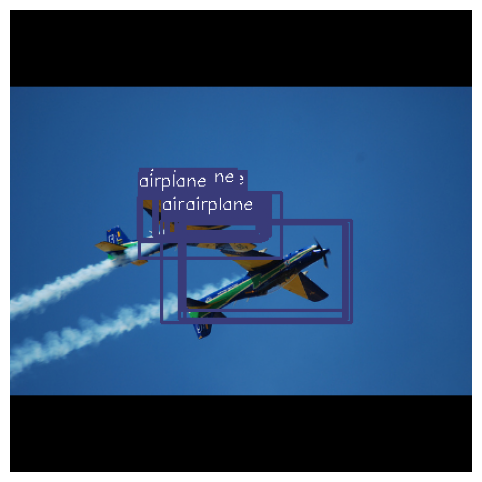

Epoch: 53


  0%|                                                                                                                             | 0/374 [00:07<?, ?it/s, loss=0.0852]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                  | 1/374 [00:23<2:28:23, 23.87s/it, loss=0.0852]

batch_idx: 1


  1%|▉                                                                                                                  | 3/374 [00:39<1:10:37, 11.42s/it, loss=0.0873]

batch_idx: 2


  1%|█▎                                                                                                                      | 4/374 [00:46<59:18,  9.62s/it, loss=0.1]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:53<54:21,  8.84s/it, loss=0.106]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [01:01<51:19,  8.37s/it, loss=0.117]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:08<48:29,  7.93s/it, loss=0.115]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:15<47:19,  7.76s/it, loss=0.118]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:22<46:18,  7.61s/it, loss=0.131]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:30<46:49,  7.72s/it, loss=0.141]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:37<45:45,  7.56s/it, loss=0.138]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:44<44:20,  7.35s/it, loss=0.133]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:51<43:34,  7.24s/it, loss=0.133]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:58<42:30,  7.08s/it, loss=0.136]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:05<42:33,  7.11s/it, loss=0.145]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:12<41:40,  6.99s/it, loss=0.144]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:19<42:19,  7.11s/it, loss=0.145]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:26<41:49,  7.05s/it, loss=0.147]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:34<42:06,  7.12s/it, loss=0.147]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:40<41:42,  7.07s/it, loss=0.145]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:47<41:29,  7.05s/it, loss=0.142]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:54<41:06,  7.01s/it, loss=0.142]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [03:01<40:46,  6.97s/it, loss=0.146]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:09<41:25,  7.10s/it, loss=0.144]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:17<44:05,  7.58s/it, loss=0.143]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:24<42:42,  7.36s/it, loss=0.141]

batch_idx: 25


  7%|████████▌                                                                                                             | 27/374 [03:31<41:51,  7.24s/it, loss=0.14]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:38<40:28,  7.02s/it, loss=0.141]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:45<40:32,  7.05s/it, loss=0.141]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:52<41:07,  7.17s/it, loss=0.139]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [04:00<41:09,  7.20s/it, loss=0.143]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [04:08<43:10,  7.58s/it, loss=0.144]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:15<41:56,  7.38s/it, loss=0.146]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:22<41:23,  7.31s/it, loss=0.144]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:29<40:28,  7.16s/it, loss=0.146]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:36<40:26,  7.18s/it, loss=0.147]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:44<40:52,  7.28s/it, loss=0.146]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:51<41:02,  7.33s/it, loss=0.146]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:58<40:02,  7.17s/it, loss=0.146]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [05:05<39:45,  7.14s/it, loss=0.145]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:12<39:42,  7.15s/it, loss=0.145]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:19<38:56,  7.04s/it, loss=0.145]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:26<38:58,  7.06s/it, loss=0.145]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:33<38:23,  6.98s/it, loss=0.145]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:39<37:25,  6.83s/it, loss=0.145]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:47<38:05,  6.97s/it, loss=0.145]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:54<38:35,  7.08s/it, loss=0.144]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [06:01<39:02,  7.19s/it, loss=0.145]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:10<41:03,  7.58s/it, loss=0.144]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:18<41:37,  7.71s/it, loss=0.143]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:25<40:30,  7.53s/it, loss=0.143]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:32<39:19,  7.33s/it, loss=0.144]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:40<41:03,  7.67s/it, loss=0.143]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:48<40:41,  7.63s/it, loss=0.142]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:55<39:48,  7.49s/it, loss=0.144]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [07:02<38:54,  7.34s/it, loss=0.142]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [07:09<37:52,  7.17s/it, loss=0.141]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:17<38:54,  7.39s/it, loss=0.141]

batch_idx: 57


 16%|██████████████████▌                                                                                                   | 59/374 [07:24<38:33,  7.34s/it, loss=0.14]

batch_idx: 58


 16%|██████████████████▉                                                                                                   | 60/374 [07:31<38:00,  7.26s/it, loss=0.14]

batch_idx: 59


 16%|███████████████████▏                                                                                                  | 61/374 [07:38<37:40,  7.22s/it, loss=0.14]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:45<36:33,  7.03s/it, loss=0.139]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:52<36:45,  7.09s/it, loss=0.139]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:59<36:33,  7.08s/it, loss=0.138]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [08:07<37:23,  7.26s/it, loss=0.139]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [08:15<38:26,  7.49s/it, loss=0.138]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:22<37:52,  7.40s/it, loss=0.138]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:29<36:44,  7.21s/it, loss=0.138]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:37<38:13,  7.52s/it, loss=0.137]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:44<37:36,  7.42s/it, loss=0.136]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:51<36:14,  7.18s/it, loss=0.136]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:57<35:29,  7.05s/it, loss=0.136]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [09:05<35:34,  7.09s/it, loss=0.136]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [09:12<36:01,  7.21s/it, loss=0.135]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:19<35:52,  7.20s/it, loss=0.135]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:27<36:20,  7.32s/it, loss=0.135]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:34<36:16,  7.33s/it, loss=0.134]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:42<37:09,  7.53s/it, loss=0.133]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:49<36:32,  7.43s/it, loss=0.132]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:56<35:40,  7.28s/it, loss=0.132]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [10:03<35:21,  7.24s/it, loss=0.133]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [10:11<35:03,  7.20s/it, loss=0.133]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:18<34:58,  7.21s/it, loss=0.134]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:25<34:25,  7.12s/it, loss=0.134]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:32<34:49,  7.23s/it, loss=0.134]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:39<34:26,  7.18s/it, loss=0.134]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:46<34:05,  7.13s/it, loss=0.134]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:53<33:24,  7.01s/it, loss=0.134]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [11:00<33:40,  7.09s/it, loss=0.134]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [11:08<34:25,  7.27s/it, loss=0.134]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [11:15<34:01,  7.21s/it, loss=0.133]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:22<33:54,  7.21s/it, loss=0.135]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:30<34:13,  7.31s/it, loss=0.135]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:36<33:03,  7.08s/it, loss=0.135]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:44<33:27,  7.20s/it, loss=0.134]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:51<33:56,  7.32s/it, loss=0.134]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:59<33:46,  7.31s/it, loss=0.135]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [12:06<33:38,  7.31s/it, loss=0.135]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [12:14<33:44,  7.36s/it, loss=0.135]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:21<34:02,  7.46s/it, loss=0.135]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:28<33:09,  7.29s/it, loss=0.135]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:36<33:24,  7.37s/it, loss=0.135]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:42<32:12,  7.13s/it, loss=0.134]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:49<31:23,  6.98s/it, loss=0.134]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:56<31:28,  7.02s/it, loss=0.133]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [13:03<31:11,  6.98s/it, loss=0.134]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [13:10<31:54,  7.17s/it, loss=0.134]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [13:18<32:06,  7.24s/it, loss=0.134]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:25<31:36,  7.16s/it, loss=0.134]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:32<31:22,  7.13s/it, loss=0.135]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:39<30:59,  7.07s/it, loss=0.134]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:47<32:17,  7.40s/it, loss=0.135]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:54<32:18,  7.43s/it, loss=0.135]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [14:02<32:03,  7.40s/it, loss=0.135]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [14:09<31:43,  7.35s/it, loss=0.135]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [14:16<31:35,  7.35s/it, loss=0.135]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:24<31:11,  7.28s/it, loss=0.135]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:30<30:26,  7.13s/it, loss=0.135]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:37<30:14,  7.12s/it, loss=0.134]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:44<28:54,  6.83s/it, loss=0.134]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:50<28:05,  6.66s/it, loss=0.135]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:57<29:04,  6.92s/it, loss=0.134]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [15:05<29:25,  7.03s/it, loss=0.134]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [15:12<29:35,  7.10s/it, loss=0.134]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [15:19<29:53,  7.20s/it, loss=0.134]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:26<29:35,  7.16s/it, loss=0.134]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:34<29:33,  7.18s/it, loss=0.134]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:41<29:13,  7.13s/it, loss=0.133]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:48<29:12,  7.15s/it, loss=0.134]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:55<28:37,  7.04s/it, loss=0.134]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [16:01<28:17,  6.99s/it, loss=0.134]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [16:09<29:20,  7.27s/it, loss=0.134]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [16:16<28:56,  7.21s/it, loss=0.134]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:24<28:49,  7.21s/it, loss=0.134]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:31<28:24,  7.13s/it, loss=0.133]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:38<29:05,  7.34s/it, loss=0.133]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:46<28:43,  7.27s/it, loss=0.133]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:53<28:22,  7.22s/it, loss=0.133]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [17:00<27:58,  7.14s/it, loss=0.133]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [17:07<27:33,  7.06s/it, loss=0.133]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [17:14<27:54,  7.19s/it, loss=0.133]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [17:21<27:23,  7.08s/it, loss=0.133]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:28<27:53,  7.24s/it, loss=0.133]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:36<27:36,  7.20s/it, loss=0.134]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:43<28:19,  7.42s/it, loss=0.133]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:51<28:09,  7.41s/it, loss=0.133]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:59<28:23,  7.51s/it, loss=0.133]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [18:06<28:12,  7.49s/it, loss=0.133]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [18:13<27:35,  7.36s/it, loss=0.133]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [18:21<28:04,  7.52s/it, loss=0.133]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:28<27:12,  7.32s/it, loss=0.133]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:35<26:39,  7.20s/it, loss=0.133]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:42<26:28,  7.19s/it, loss=0.132]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:49<25:54,  7.07s/it, loss=0.132]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:57<26:36,  7.29s/it, loss=0.132]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [19:03<25:58,  7.15s/it, loss=0.132]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [19:12<27:05,  7.49s/it, loss=0.132]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [19:18<25:44,  7.15s/it, loss=0.132]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [19:26<26:06,  7.29s/it, loss=0.132]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:33<26:03,  7.31s/it, loss=0.132]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:40<25:50,  7.28s/it, loss=0.132]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:47<25:40,  7.27s/it, loss=0.132]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:55<25:32,  7.26s/it, loss=0.132]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [20:02<25:26,  7.27s/it, loss=0.132]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [20:08<24:32,  7.04s/it, loss=0.132]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [20:15<24:05,  6.95s/it, loss=0.132]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [20:22<24:03,  6.97s/it, loss=0.132]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:30<24:24,  7.11s/it, loss=0.131]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:36<23:47,  6.96s/it, loss=0.132]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:43<23:46,  6.99s/it, loss=0.131]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:50<23:29,  6.94s/it, loss=0.131]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:57<23:01,  6.84s/it, loss=0.131]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [21:03<22:26,  6.70s/it, loss=0.132]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [21:10<22:50,  6.85s/it, loss=0.131]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [21:18<23:12,  7.00s/it, loss=0.132]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [21:25<23:20,  7.07s/it, loss=0.131]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:32<23:36,  7.19s/it, loss=0.131]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:40<23:35,  7.22s/it, loss=0.131]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:47<23:53,  7.35s/it, loss=0.131]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:55<24:11,  7.48s/it, loss=0.131]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [22:04<25:12,  7.84s/it, loss=0.132]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [22:12<25:08,  7.86s/it, loss=0.131]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [22:19<24:37,  7.73s/it, loss=0.131]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [22:26<23:34,  7.44s/it, loss=0.131]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:33<23:10,  7.36s/it, loss=0.131]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:41<23:09,  7.39s/it, loss=0.131]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:47<22:35,  7.25s/it, loss=0.131]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:54<21:59,  7.09s/it, loss=0.131]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [23:01<21:56,  7.11s/it, loss=0.131]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [23:08<21:51,  7.13s/it, loss=0.131]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [23:16<21:46,  7.14s/it, loss=0.131]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [23:23<21:30,  7.09s/it, loss=0.131]

batch_idx: 191


 52%|████████████████████████████████████████████████████████████▍                                                        | 193/374 [23:30<21:19,  7.07s/it, loss=0.13]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:37<21:04,  7.03s/it, loss=0.131]

batch_idx: 193


 52%|█████████████████████████████████████████████████████████████                                                        | 195/374 [23:44<21:02,  7.05s/it, loss=0.13]

batch_idx: 194


 52%|█████████████████████████████████████████████████████████████▎                                                       | 196/374 [23:51<20:42,  6.98s/it, loss=0.13]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████▋                                                       | 197/374 [23:57<20:26,  6.93s/it, loss=0.13]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▉                                                       | 198/374 [24:04<20:19,  6.93s/it, loss=0.13]

batch_idx: 197


 53%|██████████████████████████████████████████████████████████████▎                                                      | 199/374 [24:11<20:21,  6.98s/it, loss=0.13]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████▌                                                      | 200/374 [24:18<20:09,  6.95s/it, loss=0.13]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████▌                                                      | 200/374 [24:25<20:09,  6.95s/it, loss=0.13]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▉                                                      | 201/374 [24:42<34:58, 12.13s/it, loss=0.13]

batch_idx: 201


 54%|███████████████████████████████████████████████████████████████▌                                                     | 203/374 [24:56<26:58,  9.47s/it, loss=0.13]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▊                                                     | 204/374 [25:04<25:16,  8.92s/it, loss=0.13]

batch_idx: 203


 55%|████████████████████████████████████████████████████████████████▏                                                    | 205/374 [25:11<23:36,  8.38s/it, loss=0.13]

batch_idx: 204


 55%|████████████████████████████████████████████████████████████████▍                                                    | 206/374 [25:18<22:19,  7.97s/it, loss=0.13]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▊                                                    | 207/374 [25:26<21:44,  7.81s/it, loss=0.13]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:33<21:11,  7.66s/it, loss=0.129]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:40<20:40,  7.52s/it, loss=0.129]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:48<20:45,  7.60s/it, loss=0.129]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [25:55<20:17,  7.47s/it, loss=0.129]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [26:03<20:24,  7.56s/it, loss=0.129]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [26:10<20:22,  7.59s/it, loss=0.129]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [26:18<20:16,  7.61s/it, loss=0.129]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [26:25<19:51,  7.49s/it, loss=0.129]

batch_idx: 214


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 216/374 [26:33<19:31,  7.41s/it, loss=0.13]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 217/374 [26:39<18:39,  7.13s/it, loss=0.13]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:46<18:16,  7.03s/it, loss=0.129]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:53<18:24,  7.12s/it, loss=0.129]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [27:00<17:40,  6.89s/it, loss=0.129]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [27:07<17:42,  6.95s/it, loss=0.129]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [27:14<17:40,  6.98s/it, loss=0.129]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [27:21<17:46,  7.06s/it, loss=0.129]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:28<17:50,  7.14s/it, loss=0.129]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:35<17:36,  7.09s/it, loss=0.129]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:42<17:23,  7.05s/it, loss=0.129]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:49<17:10,  7.01s/it, loss=0.129]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:57<17:33,  7.22s/it, loss=0.129]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [28:04<17:07,  7.08s/it, loss=0.129]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [28:11<17:13,  7.18s/it, loss=0.129]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [28:18<17:06,  7.18s/it, loss=0.129]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [28:25<16:57,  7.16s/it, loss=0.129]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:31<15:58,  6.80s/it, loss=0.129]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:38<15:59,  6.85s/it, loss=0.129]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:45<15:47,  6.82s/it, loss=0.129]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:52<15:48,  6.87s/it, loss=0.129]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:59<15:32,  6.81s/it, loss=0.128]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [29:06<15:32,  6.86s/it, loss=0.128]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [29:13<15:33,  6.92s/it, loss=0.128]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [29:20<15:44,  7.05s/it, loss=0.129]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:27<15:43,  7.10s/it, loss=0.129]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:34<15:41,  7.13s/it, loss=0.129]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:41<15:31,  7.11s/it, loss=0.129]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:48<15:12,  7.02s/it, loss=0.129]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:55<14:55,  6.95s/it, loss=0.129]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [30:02<14:52,  6.97s/it, loss=0.129]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [30:09<14:54,  7.05s/it, loss=0.129]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [30:16<14:39,  6.98s/it, loss=0.129]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [30:23<14:29,  6.95s/it, loss=0.129]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:30<14:17,  6.92s/it, loss=0.129]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:37<14:16,  6.96s/it, loss=0.129]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:44<14:08,  6.95s/it, loss=0.128]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:51<14:06,  7.00s/it, loss=0.128]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:58<13:49,  6.91s/it, loss=0.128]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [31:04<13:35,  6.86s/it, loss=0.128]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [31:11<13:32,  6.89s/it, loss=0.128]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [31:18<13:27,  6.90s/it, loss=0.127]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:25<13:22,  6.92s/it, loss=0.127]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:32<13:12,  6.89s/it, loss=0.128]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:39<13:00,  6.85s/it, loss=0.128]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:46<13:00,  6.91s/it, loss=0.128]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:53<13:03,  7.00s/it, loss=0.128]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [32:00<13:01,  7.04s/it, loss=0.128]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [32:07<12:54,  7.04s/it, loss=0.128]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [32:14<12:52,  7.08s/it, loss=0.128]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [32:22<12:48,  7.11s/it, loss=0.127]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:29<12:54,  7.24s/it, loss=0.127]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:36<12:47,  7.24s/it, loss=0.127]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:43<12:32,  7.17s/it, loss=0.127]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:51<12:26,  7.18s/it, loss=0.128]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:58<12:19,  7.18s/it, loss=0.128]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [33:05<12:20,  7.26s/it, loss=0.127]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [33:12<12:11,  7.24s/it, loss=0.127]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [33:20<12:10,  7.30s/it, loss=0.128]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:27<11:59,  7.27s/it, loss=0.127]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:34<11:46,  7.21s/it, loss=0.127]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:42<11:44,  7.26s/it, loss=0.128]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:49<11:30,  7.19s/it, loss=0.128]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:55<11:16,  7.12s/it, loss=0.128]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [34:02<10:55,  6.97s/it, loss=0.127]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [34:10<11:04,  7.14s/it, loss=0.127]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [34:17<10:53,  7.10s/it, loss=0.127]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [34:24<10:57,  7.22s/it, loss=0.127]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:31<10:41,  7.13s/it, loss=0.127]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:38<10:36,  7.15s/it, loss=0.127]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:45<10:28,  7.14s/it, loss=0.127]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [34:53<10:26,  7.20s/it, loss=0.127]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [35:00<10:14,  7.14s/it, loss=0.127]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [35:07<10:06,  7.14s/it, loss=0.127]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [35:14<09:58,  7.13s/it, loss=0.127]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [35:21<09:52,  7.14s/it, loss=0.128]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:27<09:24,  6.88s/it, loss=0.128]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [35:34<09:21,  6.93s/it, loss=0.128]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [35:42<09:24,  7.06s/it, loss=0.128]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [35:49<09:22,  7.12s/it, loss=0.128]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [35:56<09:11,  7.06s/it, loss=0.127]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [36:04<09:19,  7.26s/it, loss=0.127]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [36:11<09:11,  7.26s/it, loss=0.127]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [36:18<09:02,  7.23s/it, loss=0.127]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [36:25<08:56,  7.25s/it, loss=0.127]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [36:32<08:37,  7.09s/it, loss=0.128]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [36:43<09:41,  8.08s/it, loss=0.128]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [36:50<09:21,  7.91s/it, loss=0.127]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [36:57<09:02,  7.75s/it, loss=0.127]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [37:04<08:39,  7.53s/it, loss=0.127]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [37:12<08:33,  7.55s/it, loss=0.127]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [37:19<08:10,  7.32s/it, loss=0.127]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [37:26<07:50,  7.13s/it, loss=0.127]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:33<07:47,  7.20s/it, loss=0.127]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [37:40<07:38,  7.17s/it, loss=0.127]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [37:47<07:29,  7.14s/it, loss=0.127]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [37:54<07:26,  7.20s/it, loss=0.127]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [38:01<07:12,  7.09s/it, loss=0.127]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [38:08<07:08,  7.14s/it, loss=0.127]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [38:15<06:52,  6.99s/it, loss=0.127]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [38:23<06:52,  7.11s/it, loss=0.127]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [38:30<06:51,  7.22s/it, loss=0.127]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [38:37<06:44,  7.23s/it, loss=0.127]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [38:44<06:35,  7.19s/it, loss=0.127]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [38:51<06:27,  7.17s/it, loss=0.127]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [38:58<06:11,  7.02s/it, loss=0.127]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [39:05<06:02,  6.97s/it, loss=0.126]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [39:13<06:06,  7.19s/it, loss=0.126]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [39:20<05:57,  7.14s/it, loss=0.126]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [39:26<05:42,  7.00s/it, loss=0.126]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:33<05:35,  6.98s/it, loss=0.126]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [39:40<05:29,  7.01s/it, loss=0.126]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [39:47<05:17,  6.91s/it, loss=0.126]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [39:54<05:04,  6.78s/it, loss=0.126]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [40:01<05:02,  6.87s/it, loss=0.126]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [40:07<04:53,  6.83s/it, loss=0.126]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [40:16<05:05,  7.27s/it, loss=0.126]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [40:24<05:08,  7.53s/it, loss=0.126]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:31<04:55,  7.38s/it, loss=0.126]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [40:38<04:44,  7.29s/it, loss=0.127]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:45<04:34,  7.22s/it, loss=0.126]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:52<04:24,  7.16s/it, loss=0.126]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:59<04:17,  7.15s/it, loss=0.126]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [41:06<04:07,  7.08s/it, loss=0.126]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [41:14<04:05,  7.23s/it, loss=0.126]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [41:21<04:02,  7.35s/it, loss=0.126]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [41:29<03:55,  7.35s/it, loss=0.126]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:36<03:46,  7.30s/it, loss=0.126]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:43<03:38,  7.27s/it, loss=0.126]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:50<03:29,  7.23s/it, loss=0.127]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:57<03:19,  7.14s/it, loss=0.127]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [42:06<03:28,  7.71s/it, loss=0.127]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [42:14<03:19,  7.69s/it, loss=0.127]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [42:21<03:10,  7.61s/it, loss=0.127]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [42:28<03:00,  7.50s/it, loss=0.127]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:35<02:47,  7.27s/it, loss=0.127]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:42<02:38,  7.20s/it, loss=0.127]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:49<02:29,  7.12s/it, loss=0.127]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:56<02:21,  7.08s/it, loss=0.127]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:03<02:12,  7.00s/it, loss=0.127]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [43:10<02:05,  7.00s/it, loss=0.127]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [43:17<02:00,  7.08s/it, loss=0.127]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [43:24<01:51,  7.00s/it, loss=0.127]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:31<01:46,  7.12s/it, loss=0.127]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [43:43<01:58,  8.47s/it, loss=0.127]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [43:50<01:44,  8.05s/it, loss=0.127]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:57<01:32,  7.70s/it, loss=0.127]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:04<01:22,  7.54s/it, loss=0.127]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [44:12<01:16,  7.65s/it, loss=0.126]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [44:19<01:07,  7.54s/it, loss=0.126]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [44:26<00:59,  7.40s/it, loss=0.126]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:34<00:51,  7.37s/it, loss=0.126]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [44:40<00:43,  7.18s/it, loss=0.127]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:47<00:35,  7.05s/it, loss=0.126]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [44:54<00:28,  7.02s/it, loss=0.126]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:01<00:20,  6.95s/it, loss=0.126]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:07<00:13,  6.83s/it, loss=0.126]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [45:15<00:06,  6.92s/it, loss=0.126]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [45:16<00:00,  7.26s/it, loss=0.126]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


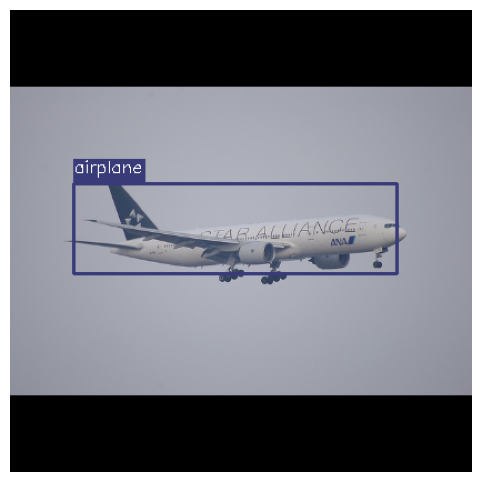

Epoch: 54


  0%|                                                                                                                              | 0/374 [00:06<?, ?it/s, loss=0.119]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:22<1:06:25, 10.71s/it, loss=0.106]

batch_idx: 1


  1%|▉                                                                                                                     | 3/374 [00:29<55:37,  9.00s/it, loss=0.127]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:35<49:49,  8.08s/it, loss=0.116]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:46<55:27,  9.02s/it, loss=0.108]

batch_idx: 4


  2%|█▉                                                                                                                      | 6/374 [00:53<50:59,  8.31s/it, loss=0.1]

batch_idx: 5


  2%|██▏                                                                                                                     | 7/374 [01:00<47:52,  7.83s/it, loss=0.1]

batch_idx: 6


  2%|██▌                                                                                                                     | 8/374 [01:07<46:18,  7.59s/it, loss=0.1]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:13<44:06,  7.25s/it, loss=0.096]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:21<45:03,  7.43s/it, loss=0.108]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:28<43:47,  7.24s/it, loss=0.107]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:35<43:24,  7.19s/it, loss=0.108]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:42<42:53,  7.13s/it, loss=0.111]

batch_idx: 12


  4%|████▍                                                                                                                 | 14/374 [01:49<42:52,  7.15s/it, loss=0.11]

batch_idx: 13


  4%|████▋                                                                                                                 | 15/374 [01:56<41:55,  7.01s/it, loss=0.11]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:03<42:26,  7.11s/it, loss=0.113]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:11<43:04,  7.24s/it, loss=0.119]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:18<42:45,  7.21s/it, loss=0.119]

batch_idx: 17


  5%|█████▉                                                                                                                | 19/374 [02:25<42:04,  7.11s/it, loss=0.12]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:32<41:59,  7.12s/it, loss=0.118]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:39<40:54,  6.95s/it, loss=0.118]

batch_idx: 20


  6%|██████▉                                                                                                               | 22/374 [02:46<41:21,  7.05s/it, loss=0.12]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:53<41:22,  7.07s/it, loss=0.119]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:01<43:13,  7.41s/it, loss=0.119]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:12<48:32,  8.34s/it, loss=0.118]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:19<45:44,  7.89s/it, loss=0.117]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:26<44:07,  7.63s/it, loss=0.118]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:32<42:27,  7.36s/it, loss=0.117]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:39<41:23,  7.20s/it, loss=0.117]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:46<40:42,  7.10s/it, loss=0.121]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:53<40:05,  7.01s/it, loss=0.123]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:59<38:43,  6.79s/it, loss=0.124]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:06<38:55,  6.85s/it, loss=0.127]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:13<39:00,  6.88s/it, loss=0.125]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:21<39:55,  7.07s/it, loss=0.128]

batch_idx: 34


 10%|███████████▎                                                                                                          | 36/374 [04:27<39:24,  7.00s/it, loss=0.13]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:34<38:35,  6.87s/it, loss=0.129]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:41<38:21,  6.85s/it, loss=0.128]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:48<38:27,  6.89s/it, loss=0.127]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:54<38:01,  6.83s/it, loss=0.127]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:02<38:41,  6.97s/it, loss=0.126]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:09<38:12,  6.91s/it, loss=0.125]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:15<38:08,  6.92s/it, loss=0.128]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:22<37:09,  6.76s/it, loss=0.127]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:28<36:36,  6.68s/it, loss=0.127]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:35<36:53,  6.75s/it, loss=0.127]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:44<39:18,  7.21s/it, loss=0.126]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:50<38:18,  7.05s/it, loss=0.126]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [05:57<37:53,  7.00s/it, loss=0.126]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:04<37:26,  6.93s/it, loss=0.127]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:11<37:26,  6.96s/it, loss=0.127]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:18<37:12,  6.93s/it, loss=0.126]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:25<37:09,  6.94s/it, loss=0.125]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:32<37:01,  6.94s/it, loss=0.124]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:39<36:55,  6.95s/it, loss=0.123]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:46<37:09,  7.01s/it, loss=0.123]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:53<36:35,  6.93s/it, loss=0.125]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [06:59<35:54,  6.82s/it, loss=0.126]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:06<36:27,  6.95s/it, loss=0.126]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:14<37:03,  7.08s/it, loss=0.126]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:22<38:37,  7.40s/it, loss=0.126]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:29<38:07,  7.33s/it, loss=0.126]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:36<37:21,  7.21s/it, loss=0.126]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:43<36:50,  7.13s/it, loss=0.126]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:51<37:32,  7.29s/it, loss=0.125]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [07:57<36:35,  7.13s/it, loss=0.125]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:04<36:05,  7.05s/it, loss=0.125]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:12<36:34,  7.17s/it, loss=0.126]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:19<36:09,  7.11s/it, loss=0.125]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:26<36:05,  7.12s/it, loss=0.125]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:33<36:11,  7.17s/it, loss=0.125]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:40<36:16,  7.21s/it, loss=0.125]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [08:47<35:32,  7.08s/it, loss=0.124]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [08:54<35:15,  7.05s/it, loss=0.124]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:01<35:00,  7.02s/it, loss=0.124]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:08<34:56,  7.04s/it, loss=0.124]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:15<34:43,  7.01s/it, loss=0.123]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:22<34:22,  6.97s/it, loss=0.123]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:29<34:42,  7.06s/it, loss=0.123]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:36<33:54,  6.92s/it, loss=0.124]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:43<33:27,  6.85s/it, loss=0.123]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:50<33:59,  6.99s/it, loss=0.123]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:00<39:16,  8.10s/it, loss=0.123]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:07<36:46,  7.61s/it, loss=0.123]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:14<35:31,  7.37s/it, loss=0.123]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:20<33:58,  7.08s/it, loss=0.123]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:27<34:01,  7.11s/it, loss=0.124]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:34<33:49,  7.10s/it, loss=0.123]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:41<33:21,  7.02s/it, loss=0.124]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [10:48<33:23,  7.05s/it, loss=0.123]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [10:55<32:56,  6.98s/it, loss=0.124]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:02<32:41,  6.96s/it, loss=0.124]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:09<32:22,  6.91s/it, loss=0.123]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:16<31:51,  6.83s/it, loss=0.123]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:23<32:22,  6.96s/it, loss=0.123]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:30<32:07,  6.93s/it, loss=0.122]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:37<32:21,  7.01s/it, loss=0.122]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [11:44<32:04,  6.97s/it, loss=0.122]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:51<32:17,  7.04s/it, loss=0.121]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [11:58<32:06,  7.03s/it, loss=0.121]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:05<31:28,  6.92s/it, loss=0.121]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:12<31:21,  6.92s/it, loss=0.123]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:19<31:16,  6.93s/it, loss=0.122]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:25<30:48,  6.85s/it, loss=0.123]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:32<30:55,  6.90s/it, loss=0.122]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:39<30:43,  6.88s/it, loss=0.122]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [12:47<31:36,  7.10s/it, loss=0.122]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [12:54<31:35,  7.12s/it, loss=0.121]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:01<31:33,  7.15s/it, loss=0.121]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:08<30:45,  6.99s/it, loss=0.121]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:15<31:03,  7.09s/it, loss=0.121]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:22<30:24,  6.97s/it, loss=0.121]

batch_idx: 111


 30%|███████████████████████████████████▎                                                                                 | 113/374 [13:29<30:38,  7.04s/it, loss=0.12]

batch_idx: 112


 30%|███████████████████████████████████▋                                                                                 | 114/374 [13:36<30:10,  6.96s/it, loss=0.12]

batch_idx: 113


 31%|███████████████████████████████████▉                                                                                 | 115/374 [13:43<30:09,  6.99s/it, loss=0.12]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:50<29:58,  6.97s/it, loss=0.121]

batch_idx: 115


 31%|████████████████████████████████████▌                                                                                | 117/374 [13:57<30:10,  7.05s/it, loss=0.12]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:04<29:51,  7.00s/it, loss=0.121]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:11<30:32,  7.19s/it, loss=0.122]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:18<30:06,  7.11s/it, loss=0.122]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:25<29:47,  7.07s/it, loss=0.121]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:32<29:11,  6.95s/it, loss=0.121]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [14:39<29:10,  6.97s/it, loss=0.122]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [14:46<29:06,  6.99s/it, loss=0.122]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [14:53<29:12,  7.04s/it, loss=0.122]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:00<29:00,  7.02s/it, loss=0.122]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:07<28:46,  6.99s/it, loss=0.123]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:14<28:41,  7.00s/it, loss=0.124]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:21<28:59,  7.10s/it, loss=0.123]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:28<28:51,  7.10s/it, loss=0.124]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:35<28:12,  6.96s/it, loss=0.123]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [15:42<28:10,  6.99s/it, loss=0.123]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [15:50<28:38,  7.13s/it, loss=0.123]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [15:57<28:29,  7.12s/it, loss=0.123]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:04<28:07,  7.06s/it, loss=0.123]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:11<28:09,  7.10s/it, loss=0.122]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:18<28:07,  7.12s/it, loss=0.122]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:25<28:08,  7.15s/it, loss=0.122]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [16:32<27:29,  7.02s/it, loss=0.122]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [16:39<26:59,  6.92s/it, loss=0.122]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [16:46<26:53,  6.92s/it, loss=0.123]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [16:54<27:59,  7.24s/it, loss=0.122]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:01<27:52,  7.24s/it, loss=0.122]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:08<27:24,  7.15s/it, loss=0.123]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:15<27:09,  7.11s/it, loss=0.123]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:22<27:01,  7.11s/it, loss=0.123]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:29<26:53,  7.11s/it, loss=0.123]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [17:36<26:41,  7.08s/it, loss=0.123]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [17:43<26:13,  6.99s/it, loss=0.123]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [17:50<26:08,  7.00s/it, loss=0.123]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [17:57<26:17,  7.07s/it, loss=0.123]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:04<25:42,  6.95s/it, loss=0.123]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:11<25:43,  6.98s/it, loss=0.123]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:17<24:49,  6.77s/it, loss=0.123]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:24<25:11,  6.90s/it, loss=0.124]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:32<25:28,  7.01s/it, loss=0.124]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [18:38<24:58,  6.91s/it, loss=0.124]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:45<24:59,  6.94s/it, loss=0.124]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [18:52<24:23,  6.80s/it, loss=0.124]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [18:59<24:27,  6.86s/it, loss=0.123]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:06<24:19,  6.85s/it, loss=0.123]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:13<24:40,  6.98s/it, loss=0.123]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:20<24:56,  7.09s/it, loss=0.123]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:27<24:28,  6.99s/it, loss=0.123]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [19:34<24:36,  7.06s/it, loss=0.123]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [19:41<24:37,  7.11s/it, loss=0.123]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [19:49<24:37,  7.14s/it, loss=0.123]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [19:55<24:13,  7.06s/it, loss=0.124]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:02<23:48,  6.97s/it, loss=0.124]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:09<23:48,  7.00s/it, loss=0.124]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:16<23:47,  7.03s/it, loss=0.124]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:24<23:51,  7.09s/it, loss=0.124]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [20:30<23:30,  7.02s/it, loss=0.124]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [20:38<23:35,  7.08s/it, loss=0.125]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [20:45<23:22,  7.05s/it, loss=0.125]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [20:52<23:23,  7.09s/it, loss=0.125]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [20:59<23:07,  7.04s/it, loss=0.125]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:06<23:20,  7.15s/it, loss=0.125]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:14<23:41,  7.29s/it, loss=0.125]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:20<22:59,  7.11s/it, loss=0.125]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [21:27<22:36,  7.03s/it, loss=0.125]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [21:35<22:46,  7.12s/it, loss=0.125]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [21:42<22:42,  7.14s/it, loss=0.125]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [21:48<21:56,  6.93s/it, loss=0.125]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [21:55<21:44,  6.90s/it, loss=0.125]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:02<21:19,  6.80s/it, loss=0.125]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:08<21:12,  6.81s/it, loss=0.126]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:16<21:20,  6.89s/it, loss=0.126]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [22:22<21:04,  6.83s/it, loss=0.126]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [22:29<21:17,  6.94s/it, loss=0.126]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [22:37<21:21,  7.00s/it, loss=0.126]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [22:43<20:47,  6.85s/it, loss=0.125]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [22:50<20:20,  6.74s/it, loss=0.125]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [22:57<20:37,  6.88s/it, loss=0.125]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:04<20:47,  6.97s/it, loss=0.125]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [23:11<20:34,  6.93s/it, loss=0.125]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [23:25<26:50,  9.10s/it, loss=0.125]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:32<24:53,  8.49s/it, loss=0.125]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [23:39<23:24,  8.03s/it, loss=0.125]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:46<22:08,  7.64s/it, loss=0.125]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:52<22:08,  7.64s/it, loss=0.124]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▋                                                     | 202/374 [24:08<25:44,  8.98s/it, loss=0.125]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [24:14<23:21,  8.19s/it, loss=0.125]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [24:21<22:14,  7.85s/it, loss=0.125]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [24:28<20:57,  7.44s/it, loss=0.125]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [24:35<20:26,  7.30s/it, loss=0.125]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [24:41<19:43,  7.09s/it, loss=0.125]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [24:48<19:17,  6.97s/it, loss=0.125]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [24:55<19:35,  7.13s/it, loss=0.125]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:02<19:19,  7.07s/it, loss=0.125]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [25:09<19:11,  7.07s/it, loss=0.124]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [25:16<18:42,  6.93s/it, loss=0.124]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [25:23<18:22,  6.85s/it, loss=0.124]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [25:30<18:41,  7.01s/it, loss=0.124]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [25:37<18:31,  6.99s/it, loss=0.124]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [25:44<18:09,  6.90s/it, loss=0.124]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [25:51<18:16,  6.98s/it, loss=0.124]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [25:58<18:09,  6.99s/it, loss=0.124]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:12<23:14,  9.00s/it, loss=0.124]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:18<21:18,  8.30s/it, loss=0.125]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:25<19:54,  7.81s/it, loss=0.125]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [26:32<19:07,  7.55s/it, loss=0.124]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [26:39<18:31,  7.36s/it, loss=0.124]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [26:45<17:33,  7.02s/it, loss=0.124]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [26:52<17:38,  7.10s/it, loss=0.124]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [26:59<17:09,  6.95s/it, loss=0.124]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:06<17:01,  6.95s/it, loss=0.124]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:13<16:49,  6.91s/it, loss=0.125]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:20<17:02,  7.05s/it, loss=0.125]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [27:27<16:54,  7.04s/it, loss=0.125]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:34<16:41,  7.00s/it, loss=0.125]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [27:42<17:14,  7.29s/it, loss=0.125]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [27:48<16:31,  7.04s/it, loss=0.125]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [27:55<16:06,  6.90s/it, loss=0.125]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:02<15:49,  6.83s/it, loss=0.124]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:08<15:41,  6.82s/it, loss=0.125]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:15<15:44,  6.89s/it, loss=0.125]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [28:22<15:43,  6.93s/it, loss=0.125]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [28:30<15:41,  6.97s/it, loss=0.125]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [28:37<15:39,  7.01s/it, loss=0.125]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [28:44<15:41,  7.08s/it, loss=0.125]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [28:51<15:19,  6.96s/it, loss=0.124]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [28:58<15:21,  7.03s/it, loss=0.124]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:05<15:16,  7.05s/it, loss=0.124]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:13<15:41,  7.30s/it, loss=0.124]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:20<15:25,  7.23s/it, loss=0.124]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [29:28<16:14,  7.67s/it, loss=0.124]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:35<15:25,  7.35s/it, loss=0.124]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [29:43<15:22,  7.38s/it, loss=0.125]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [29:50<15:00,  7.26s/it, loss=0.124]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [29:56<14:32,  7.09s/it, loss=0.124]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:03<14:16,  7.02s/it, loss=0.124]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:10<14:05,  6.99s/it, loss=0.124]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:17<13:50,  6.92s/it, loss=0.124]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [30:24<13:38,  6.88s/it, loss=0.124]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [30:31<13:40,  6.95s/it, loss=0.124]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [30:38<13:35,  6.97s/it, loss=0.124]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [30:46<14:00,  7.25s/it, loss=0.124]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [30:53<13:54,  7.26s/it, loss=0.124]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:00<13:47,  7.25s/it, loss=0.124]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:08<13:46,  7.32s/it, loss=0.123]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:16<14:01,  7.52s/it, loss=0.123]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:23<13:51,  7.49s/it, loss=0.123]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [31:31<13:45,  7.50s/it, loss=0.123]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [31:39<13:59,  7.70s/it, loss=0.123]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [31:45<13:21,  7.42s/it, loss=0.123]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [31:53<13:07,  7.36s/it, loss=0.123]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:00<13:07,  7.43s/it, loss=0.123]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:07<12:54,  7.37s/it, loss=0.123]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:15<12:52,  7.43s/it, loss=0.123]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:22<12:36,  7.34s/it, loss=0.123]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [32:30<12:39,  7.45s/it, loss=0.123]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [32:37<12:36,  7.49s/it, loss=0.123]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [32:45<12:20,  7.41s/it, loss=0.123]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [32:52<11:59,  7.27s/it, loss=0.123]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [32:59<12:03,  7.38s/it, loss=0.123]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:06<11:38,  7.20s/it, loss=0.124]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:13<11:34,  7.24s/it, loss=0.124]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:21<11:36,  7.33s/it, loss=0.124]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [33:28<11:24,  7.28s/it, loss=0.124]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [33:35<11:02,  7.12s/it, loss=0.124]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [33:41<10:23,  6.78s/it, loss=0.124]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [33:48<10:18,  6.80s/it, loss=0.124]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [33:54<10:11,  6.79s/it, loss=0.123]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:02<10:15,  6.91s/it, loss=0.123]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:09<10:22,  7.07s/it, loss=0.123]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [34:16<10:01,  6.92s/it, loss=0.124]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [34:23<10:04,  7.03s/it, loss=0.123]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [34:30<09:56,  7.02s/it, loss=0.123]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [34:37<09:52,  7.06s/it, loss=0.123]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [34:44<09:51,  7.13s/it, loss=0.123]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [34:52<09:45,  7.14s/it, loss=0.123]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [34:59<09:41,  7.17s/it, loss=0.123]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [35:06<09:38,  7.23s/it, loss=0.123]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [35:13<09:30,  7.22s/it, loss=0.123]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [35:21<09:37,  7.40s/it, loss=0.124]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [35:28<09:12,  7.18s/it, loss=0.124]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [35:35<09:14,  7.30s/it, loss=0.123]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [35:42<08:55,  7.14s/it, loss=0.124]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [35:49<08:45,  7.11s/it, loss=0.124]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [35:56<08:41,  7.15s/it, loss=0.124]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [36:04<08:41,  7.25s/it, loss=0.124]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [36:11<08:25,  7.12s/it, loss=0.123]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [36:18<08:23,  7.19s/it, loss=0.123]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [36:25<08:15,  7.17s/it, loss=0.123]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [36:32<07:59,  7.06s/it, loss=0.123]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [36:39<07:52,  7.05s/it, loss=0.124]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [36:47<07:56,  7.21s/it, loss=0.123]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [36:54<07:42,  7.11s/it, loss=0.124]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [37:01<07:35,  7.12s/it, loss=0.124]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [37:08<07:27,  7.11s/it, loss=0.123]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [37:15<07:27,  7.21s/it, loss=0.123]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [37:22<07:16,  7.15s/it, loss=0.123]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [37:29<07:08,  7.14s/it, loss=0.123]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [37:36<06:59,  7.11s/it, loss=0.123]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [37:43<06:46,  7.01s/it, loss=0.123]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [37:51<06:47,  7.14s/it, loss=0.123]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [37:58<06:40,  7.14s/it, loss=0.123]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [38:05<06:29,  7.08s/it, loss=0.123]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [38:12<06:18,  7.01s/it, loss=0.123]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [38:19<06:11,  7.01s/it, loss=0.123]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [38:25<06:02,  6.97s/it, loss=0.123]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [38:33<06:00,  7.06s/it, loss=0.123]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [38:40<05:57,  7.14s/it, loss=0.123]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [38:47<05:44,  7.02s/it, loss=0.123]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [38:54<05:37,  7.02s/it, loss=0.123]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [39:01<05:37,  7.17s/it, loss=0.123]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [39:09<05:31,  7.21s/it, loss=0.123]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [39:16<05:21,  7.14s/it, loss=0.123]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [39:22<05:11,  7.08s/it, loss=0.123]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [39:29<05:00,  7.00s/it, loss=0.123]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [39:36<04:54,  7.02s/it, loss=0.123]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [39:44<04:50,  7.08s/it, loss=0.123]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [39:51<04:48,  7.21s/it, loss=0.123]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [39:58<04:38,  7.13s/it, loss=0.123]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:05<04:33,  7.21s/it, loss=0.123]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:13<04:25,  7.17s/it, loss=0.123]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:20<04:21,  7.27s/it, loss=0.123]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:27<04:16,  7.32s/it, loss=0.122]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [40:35<04:07,  7.28s/it, loss=0.122]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:41<03:55,  7.14s/it, loss=0.122]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [40:48<03:43,  6.98s/it, loss=0.122]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:56<03:42,  7.17s/it, loss=0.122]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:03<03:35,  7.18s/it, loss=0.122]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:10<03:27,  7.15s/it, loss=0.122]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:17<03:21,  7.21s/it, loss=0.122]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:24<03:13,  7.18s/it, loss=0.122]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:32<03:07,  7.21s/it, loss=0.122]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:39<03:00,  7.22s/it, loss=0.122]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:46<02:49,  7.04s/it, loss=0.122]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [41:52<02:40,  6.97s/it, loss=0.122]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:00<02:34,  7.04s/it, loss=0.122]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:07<02:27,  7.03s/it, loss=0.122]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:14<02:21,  7.09s/it, loss=0.122]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [42:21<02:14,  7.10s/it, loss=0.122]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:28<02:08,  7.12s/it, loss=0.122]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [42:35<01:59,  7.03s/it, loss=0.122]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:42<01:52,  7.03s/it, loss=0.122]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [42:49<01:46,  7.11s/it, loss=0.122]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [42:56<01:39,  7.10s/it, loss=0.122]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [43:03<01:30,  6.97s/it, loss=0.123]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:10<01:23,  6.98s/it, loss=0.122]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:17<01:15,  6.85s/it, loss=0.123]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:23<01:08,  6.87s/it, loss=0.123]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:31<01:02,  6.96s/it, loss=0.123]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:38<00:56,  7.00s/it, loss=0.123]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:47<00:52,  7.56s/it, loss=0.123]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [43:54<00:44,  7.47s/it, loss=0.123]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:02<00:37,  7.53s/it, loss=0.123]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [44:08<00:29,  7.29s/it, loss=0.123]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:19<00:24,  8.23s/it, loss=0.123]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:26<00:15,  7.96s/it, loss=0.123]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:38<00:09,  9.18s/it, loss=0.123]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:40<00:00,  7.17s/it, loss=0.123]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


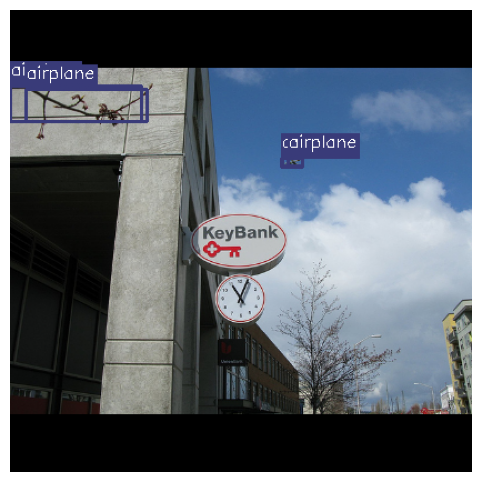

Epoch: 55


  0%|                                                                                                                              | 0/374 [00:06<?, ?it/s, loss=0.143]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:22<1:04:48, 10.45s/it, loss=0.125]

batch_idx: 1


  1%|▉                                                                                                                     | 3/374 [00:29<55:04,  8.91s/it, loss=0.109]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:36<50:55,  8.26s/it, loss=0.125]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:42<46:09,  7.51s/it, loss=0.138]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [00:49<45:03,  7.35s/it, loss=0.147]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [00:57<45:32,  7.44s/it, loss=0.141]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:04<45:00,  7.38s/it, loss=0.136]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:12<45:05,  7.41s/it, loss=0.133]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:19<44:35,  7.35s/it, loss=0.136]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:26<43:52,  7.25s/it, loss=0.132]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:33<42:56,  7.12s/it, loss=0.129]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:39<41:56,  6.97s/it, loss=0.131]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:46<42:03,  7.01s/it, loss=0.132]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [01:54<42:39,  7.13s/it, loss=0.131]

batch_idx: 14


  4%|█████                                                                                                                 | 16/374 [02:01<42:18,  7.09s/it, loss=0.13]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:08<42:46,  7.19s/it, loss=0.131]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:15<41:39,  7.02s/it, loss=0.129]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:22<41:53,  7.08s/it, loss=0.132]

batch_idx: 18


  5%|██████▎                                                                                                               | 20/374 [02:29<41:28,  7.03s/it, loss=0.13]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:36<41:25,  7.04s/it, loss=0.128]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:43<40:16,  6.86s/it, loss=0.129]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:50<40:29,  6.92s/it, loss=0.129]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [02:57<41:05,  7.04s/it, loss=0.128]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:03<39:58,  6.87s/it, loss=0.127]

batch_idx: 24


  7%|████████▏                                                                                                             | 26/374 [03:11<40:23,  6.96s/it, loss=0.13]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:18<40:25,  6.99s/it, loss=0.128]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:25<41:00,  7.11s/it, loss=0.133]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:32<40:45,  7.09s/it, loss=0.135]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:39<40:16,  7.02s/it, loss=0.133]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:46<40:39,  7.11s/it, loss=0.131]

batch_idx: 30


  9%|██████████                                                                                                            | 32/374 [03:54<40:53,  7.18s/it, loss=0.13]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:01<40:57,  7.21s/it, loss=0.129]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:08<40:19,  7.12s/it, loss=0.129]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:14<39:32,  7.00s/it, loss=0.127]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:21<38:20,  6.81s/it, loss=0.126]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:29<40:06,  7.14s/it, loss=0.127]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:35<38:58,  6.96s/it, loss=0.128]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:42<38:55,  6.97s/it, loss=0.129]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:49<38:43,  6.96s/it, loss=0.127]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [04:56<38:41,  6.97s/it, loss=0.127]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:04<40:02,  7.24s/it, loss=0.128]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:11<40:01,  7.26s/it, loss=0.128]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:18<39:03,  7.10s/it, loss=0.128]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:25<38:50,  7.08s/it, loss=0.127]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:32<38:36,  7.06s/it, loss=0.126]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:39<38:27,  7.06s/it, loss=0.126]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:47<39:22,  7.25s/it, loss=0.126]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [05:54<39:03,  7.21s/it, loss=0.126]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:02<39:24,  7.30s/it, loss=0.126]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:09<39:02,  7.25s/it, loss=0.126]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:16<38:24,  7.16s/it, loss=0.126]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:22<37:50,  7.07s/it, loss=0.126]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:29<37:08,  6.97s/it, loss=0.126]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:37<38:05,  7.16s/it, loss=0.126]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:44<38:17,  7.23s/it, loss=0.125]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:51<37:10,  7.04s/it, loss=0.125]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [06:58<36:50,  6.99s/it, loss=0.124]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:05<37:05,  7.07s/it, loss=0.123]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:12<36:43,  7.02s/it, loss=0.123]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:19<36:39,  7.03s/it, loss=0.123]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:26<36:32,  7.03s/it, loss=0.123]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:34<37:29,  7.23s/it, loss=0.122]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:41<37:33,  7.27s/it, loss=0.122]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:48<37:32,  7.29s/it, loss=0.121]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [07:56<37:37,  7.33s/it, loss=0.123]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:03<37:17,  7.29s/it, loss=0.123]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:10<37:31,  7.36s/it, loss=0.122]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:18<37:31,  7.38s/it, loss=0.122]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:25<36:54,  7.28s/it, loss=0.122]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:32<36:34,  7.24s/it, loss=0.121]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:39<36:10,  7.19s/it, loss=0.121]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [08:46<35:41,  7.12s/it, loss=0.121]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [08:53<35:36,  7.12s/it, loss=0.121]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:00<35:04,  7.04s/it, loss=0.121]

batch_idx: 74


 20%|███████████████████████▉                                                                                              | 76/374 [09:07<34:17,  6.90s/it, loss=0.12]

batch_idx: 75


 21%|████████████████████████▎                                                                                             | 77/374 [09:14<35:06,  7.09s/it, loss=0.12]

batch_idx: 76


 21%|████████████████████████▌                                                                                             | 78/374 [09:21<34:38,  7.02s/it, loss=0.12]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:28<34:52,  7.09s/it, loss=0.119]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:35<34:32,  7.05s/it, loss=0.119]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:42<34:29,  7.06s/it, loss=0.119]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:49<34:07,  7.01s/it, loss=0.118]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [09:56<34:15,  7.06s/it, loss=0.118]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:03<33:53,  7.01s/it, loss=0.118]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:11<34:35,  7.18s/it, loss=0.118]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:18<33:55,  7.07s/it, loss=0.119]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:25<34:21,  7.18s/it, loss=0.119]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:33<34:33,  7.25s/it, loss=0.119]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:40<34:28,  7.26s/it, loss=0.119]

batch_idx: 88


 24%|████████████████████████████▍                                                                                        | 91/374 [10:54<33:45,  7.16s/it, loss=0.119]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:01<33:50,  7.20s/it, loss=0.119]

batch_idx: 91


 25%|█████████████████████████████▎                                                                                        | 93/374 [11:08<33:18,  7.11s/it, loss=0.12]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:15<33:32,  7.19s/it, loss=0.119]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:23<33:34,  7.22s/it, loss=0.121]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:30<33:14,  7.17s/it, loss=0.121]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:37<32:31,  7.04s/it, loss=0.121]

batch_idx: 96


 26%|██████████████████████████████▉                                                                                       | 98/374 [11:44<32:14,  7.01s/it, loss=0.12]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:51<32:14,  7.04s/it, loss=0.121]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [11:57<31:14,  6.84s/it, loss=0.121]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:04<31:56,  7.02s/it, loss=0.121]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:12<31:55,  7.04s/it, loss=0.121]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:18<31:22,  6.95s/it, loss=0.121]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:26<31:54,  7.09s/it, loss=0.121]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:32<31:05,  6.94s/it, loss=0.121]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:40<31:43,  7.10s/it, loss=0.121]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [12:47<32:15,  7.25s/it, loss=0.121]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [12:54<31:40,  7.15s/it, loss=0.121]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:01<31:27,  7.12s/it, loss=0.122]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:09<31:44,  7.21s/it, loss=0.122]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:16<31:15,  7.13s/it, loss=0.123]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:23<31:23,  7.19s/it, loss=0.123]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:30<30:55,  7.11s/it, loss=0.123]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [13:37<30:22,  7.01s/it, loss=0.123]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [13:44<30:40,  7.11s/it, loss=0.122]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:51<30:28,  7.09s/it, loss=0.122]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [13:58<29:36,  6.91s/it, loss=0.122]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:04<28:53,  6.77s/it, loss=0.122]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:11<29:32,  6.95s/it, loss=0.123]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:19<30:22,  7.17s/it, loss=0.123]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:26<30:10,  7.16s/it, loss=0.123]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:33<29:54,  7.12s/it, loss=0.122]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [14:41<30:11,  7.22s/it, loss=0.123]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [14:48<30:18,  7.28s/it, loss=0.122]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [14:56<30:30,  7.35s/it, loss=0.122]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:02<29:45,  7.20s/it, loss=0.122]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:09<29:05,  7.07s/it, loss=0.122]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:16<28:42,  7.00s/it, loss=0.122]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:23<28:37,  7.01s/it, loss=0.122]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:30<28:56,  7.12s/it, loss=0.122]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:37<28:38,  7.07s/it, loss=0.121]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [15:45<29:13,  7.25s/it, loss=0.121]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [15:52<28:52,  7.19s/it, loss=0.121]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:00<29:57,  7.49s/it, loss=0.121]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:08<29:26,  7.39s/it, loss=0.122]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:15<29:13,  7.37s/it, loss=0.122]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:22<28:52,  7.31s/it, loss=0.121]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:31<30:36,  7.78s/it, loss=0.121]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [16:38<29:40,  7.58s/it, loss=0.121]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [16:45<29:10,  7.48s/it, loss=0.121]

batch_idx: 139


 38%|████████████████████████████████████████████                                                                         | 141/374 [16:52<28:44,  7.40s/it, loss=0.12]

batch_idx: 140


 38%|████████████████████████████████████████████▍                                                                        | 142/374 [17:00<28:53,  7.47s/it, loss=0.12]

batch_idx: 141


 38%|████████████████████████████████████████████▋                                                                        | 143/374 [17:06<27:30,  7.14s/it, loss=0.12]

batch_idx: 142


 39%|█████████████████████████████████████████████                                                                        | 144/374 [17:13<26:41,  6.96s/it, loss=0.12]

batch_idx: 143


 39%|█████████████████████████████████████████████▎                                                                       | 145/374 [17:20<26:54,  7.05s/it, loss=0.12]

batch_idx: 144


 39%|█████████████████████████████████████████████▋                                                                       | 146/374 [17:27<26:32,  6.98s/it, loss=0.12]

batch_idx: 145


 39%|█████████████████████████████████████████████▉                                                                       | 147/374 [17:34<26:32,  7.02s/it, loss=0.12]

batch_idx: 146


 40%|██████████████████████████████████████████████▎                                                                      | 148/374 [17:41<26:27,  7.03s/it, loss=0.12]

batch_idx: 147


 40%|██████████████████████████████████████████████▌                                                                      | 149/374 [17:48<26:03,  6.95s/it, loss=0.12]

batch_idx: 148


 40%|██████████████████████████████████████████████▉                                                                      | 150/374 [17:55<25:51,  6.93s/it, loss=0.12]

batch_idx: 149


 40%|███████████████████████████████████████████████▏                                                                     | 151/374 [18:03<27:01,  7.27s/it, loss=0.12]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:10<26:26,  7.15s/it, loss=0.121]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:17<26:13,  7.12s/it, loss=0.121]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:24<25:51,  7.05s/it, loss=0.122]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:30<24:57,  6.84s/it, loss=0.122]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:37<24:51,  6.84s/it, loss=0.121]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [18:44<24:45,  6.84s/it, loss=0.122]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:51<25:25,  7.06s/it, loss=0.121]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [18:59<25:46,  7.19s/it, loss=0.121]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:06<26:00,  7.29s/it, loss=0.121]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:13<25:02,  7.05s/it, loss=0.121]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:20<24:38,  6.97s/it, loss=0.121]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:27<24:35,  6.99s/it, loss=0.121]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:33<23:53,  6.83s/it, loss=0.121]

batch_idx: 163


 44%|███████████████████████████████████████████████████▌                                                                 | 165/374 [19:41<24:31,  7.04s/it, loss=0.12]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [19:48<24:14,  6.99s/it, loss=0.121]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [19:55<24:37,  7.14s/it, loss=0.121]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:03<24:56,  7.26s/it, loss=0.121]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:10<24:36,  7.20s/it, loss=0.121]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:17<24:30,  7.21s/it, loss=0.121]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:24<24:22,  7.20s/it, loss=0.121]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:30<23:14,  6.91s/it, loss=0.121]

batch_idx: 171


 46%|██████████████████████████████████████████████████████                                                               | 173/374 [20:37<23:24,  6.99s/it, loss=0.12]

batch_idx: 172


 47%|██████████████████████████████████████████████████████▍                                                              | 174/374 [20:45<23:23,  7.02s/it, loss=0.12]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▋                                                              | 175/374 [20:52<23:32,  7.10s/it, loss=0.12]

batch_idx: 174


 47%|███████████████████████████████████████████████████████                                                              | 176/374 [20:59<23:34,  7.14s/it, loss=0.12]

batch_idx: 175


 47%|███████████████████████████████████████████████████████▎                                                             | 177/374 [21:06<23:22,  7.12s/it, loss=0.12]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▋                                                             | 178/374 [21:13<23:02,  7.05s/it, loss=0.12]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▉                                                             | 179/374 [21:21<23:35,  7.26s/it, loss=0.12]

batch_idx: 178


 48%|████████████████████████████████████████████████████████▎                                                            | 180/374 [21:28<23:00,  7.12s/it, loss=0.12]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▌                                                            | 181/374 [21:35<22:51,  7.11s/it, loss=0.12]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▉                                                            | 182/374 [21:42<22:53,  7.16s/it, loss=0.12]

batch_idx: 181


 49%|█████████████████████████████████████████████████████████▏                                                           | 183/374 [21:49<22:52,  7.18s/it, loss=0.12]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████▌                                                           | 184/374 [21:56<22:41,  7.17s/it, loss=0.12]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▊                                                           | 185/374 [22:04<23:30,  7.46s/it, loss=0.12]

batch_idx: 184


 50%|██████████████████████████████████████████████████████████▏                                                          | 186/374 [22:12<23:27,  7.49s/it, loss=0.12]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████▌                                                          | 187/374 [22:19<23:17,  7.47s/it, loss=0.12]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▊                                                          | 188/374 [22:27<23:16,  7.51s/it, loss=0.12]

batch_idx: 187


 51%|███████████████████████████████████████████████████████████▏                                                         | 189/374 [22:34<22:47,  7.39s/it, loss=0.12]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [22:42<22:38,  7.38s/it, loss=0.119]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▊                                                         | 191/374 [22:48<22:05,  7.24s/it, loss=0.12]

batch_idx: 190


 51%|████████████████████████████████████████████████████████████                                                         | 192/374 [22:56<21:53,  7.22s/it, loss=0.12]

batch_idx: 191


 52%|████████████████████████████████████████████████████████████▍                                                        | 193/374 [23:03<22:19,  7.40s/it, loss=0.12]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:11<22:01,  7.34s/it, loss=0.119]

batch_idx: 193


 52%|█████████████████████████████████████████████████████████████                                                        | 195/374 [23:18<21:31,  7.22s/it, loss=0.12]

batch_idx: 194


 52%|█████████████████████████████████████████████████████████████▎                                                       | 196/374 [23:24<21:07,  7.12s/it, loss=0.12]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [23:31<20:32,  6.96s/it, loss=0.119]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:38<20:37,  7.03s/it, loss=0.119]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [23:48<23:18,  7.99s/it, loss=0.119]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:56<22:24,  7.73s/it, loss=0.119]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:03<22:24,  7.73s/it, loss=0.119]

batch_idx: 200
==> Saving checkpoint


 54%|███████████████████████████████████████████████████████████████▏                                                     | 202/374 [24:17<25:26,  8.88s/it, loss=0.12]

batch_idx: 201


 54%|███████████████████████████████████████████████████████████████▌                                                     | 203/374 [24:24<23:40,  8.30s/it, loss=0.12]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▊                                                     | 204/374 [24:31<22:53,  8.08s/it, loss=0.12]

batch_idx: 203


 55%|████████████████████████████████████████████████████████████████▏                                                    | 205/374 [24:38<21:21,  7.59s/it, loss=0.12]

batch_idx: 204


 55%|████████████████████████████████████████████████████████████████▍                                                    | 206/374 [24:45<20:46,  7.42s/it, loss=0.12]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▊                                                    | 207/374 [24:51<20:00,  7.19s/it, loss=0.12]

batch_idx: 206


 56%|█████████████████████████████████████████████████████████████████                                                    | 208/374 [24:58<19:09,  6.92s/it, loss=0.12]

batch_idx: 207


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 209/374 [25:06<20:04,  7.30s/it, loss=0.12]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 210/374 [25:14<20:23,  7.46s/it, loss=0.12]

batch_idx: 209


 56%|██████████████████████████████████████████████████████████████████                                                   | 211/374 [25:20<19:28,  7.17s/it, loss=0.12]

batch_idx: 210


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 212/374 [25:29<20:15,  7.50s/it, loss=0.12]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 213/374 [25:36<19:42,  7.34s/it, loss=0.12]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 214/374 [25:43<19:27,  7.30s/it, loss=0.12]

batch_idx: 213


 57%|███████████████████████████████████████████████████████████████████▎                                                 | 215/374 [25:50<19:03,  7.19s/it, loss=0.12]

batch_idx: 214


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 216/374 [25:57<19:17,  7.33s/it, loss=0.12]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 217/374 [26:04<18:50,  7.20s/it, loss=0.12]

batch_idx: 216


 58%|████████████████████████████████████████████████████████████████████▏                                                | 218/374 [26:11<18:37,  7.17s/it, loss=0.12]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:19<18:58,  7.35s/it, loss=0.121]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▊                                                | 220/374 [26:27<19:08,  7.46s/it, loss=0.12]

batch_idx: 219


 59%|█████████████████████████████████████████████████████████████████████▏                                               | 221/374 [26:34<18:35,  7.29s/it, loss=0.12]

batch_idx: 220


 59%|█████████████████████████████████████████████████████████████████████▍                                               | 222/374 [26:40<17:59,  7.10s/it, loss=0.12]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▊                                               | 223/374 [26:47<17:35,  6.99s/it, loss=0.12]

batch_idx: 222


 60%|██████████████████████████████████████████████████████████████████████                                               | 224/374 [26:54<17:40,  7.07s/it, loss=0.12]

batch_idx: 223


 60%|██████████████████████████████████████████████████████████████████████▍                                              | 225/374 [27:01<17:22,  7.00s/it, loss=0.12]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████▋                                              | 226/374 [27:08<17:18,  7.02s/it, loss=0.12]

batch_idx: 225


 61%|███████████████████████████████████████████████████████████████████████                                              | 227/374 [27:15<17:07,  6.99s/it, loss=0.12]

batch_idx: 226


 61%|███████████████████████████████████████████████████████████████████████▎                                             | 228/374 [27:22<17:05,  7.02s/it, loss=0.12]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████▋                                             | 229/374 [27:29<17:01,  7.05s/it, loss=0.12]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▉                                             | 230/374 [27:36<16:52,  7.03s/it, loss=0.12]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:43<16:17,  6.84s/it, loss=0.119]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [27:49<16:02,  6.78s/it, loss=0.119]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [27:57<16:16,  6.93s/it, loss=0.119]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:04<16:25,  7.04s/it, loss=0.119]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:11<16:10,  6.98s/it, loss=0.119]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:18<16:13,  7.05s/it, loss=0.119]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:26<16:45,  7.34s/it, loss=0.119]

batch_idx: 236


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [28:41<16:34,  7.37s/it, loss=0.119]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [28:49<17:01,  7.62s/it, loss=0.119]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [28:56<16:35,  7.48s/it, loss=0.119]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:03<16:15,  7.39s/it, loss=0.119]

batch_idx: 241


 65%|████████████████████████████████████████████████████████████████████████████                                         | 243/374 [29:11<16:36,  7.61s/it, loss=0.12]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:18<16:01,  7.40s/it, loss=0.119]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:25<15:20,  7.13s/it, loss=0.119]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 246/374 [29:31<14:46,  6.93s/it, loss=0.12]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [29:40<15:37,  7.38s/it, loss=0.119]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:47<15:05,  7.19s/it, loss=0.119]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▉                                       | 249/374 [29:54<14:53,  7.15s/it, loss=0.12]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:00<14:34,  7.05s/it, loss=0.119]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:07<14:25,  7.04s/it, loss=0.119]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:15<14:27,  7.11s/it, loss=0.119]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:22<14:16,  7.08s/it, loss=0.119]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:29<14:31,  7.26s/it, loss=0.119]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [30:37<14:21,  7.24s/it, loss=0.119]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [30:44<14:18,  7.27s/it, loss=0.119]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [30:51<14:03,  7.21s/it, loss=0.119]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [30:58<13:37,  7.05s/it, loss=0.119]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:05<13:48,  7.20s/it, loss=0.119]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:13<13:44,  7.23s/it, loss=0.119]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:21<14:06,  7.49s/it, loss=0.119]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:27<13:32,  7.26s/it, loss=0.119]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:34<13:14,  7.16s/it, loss=0.119]

batch_idx: 262


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                  | 264/374 [31:41<13:04,  7.13s/it, loss=0.12]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [31:48<12:53,  7.09s/it, loss=0.119]

batch_idx: 264


 71%|███████████████████████████████████████████████████████████████████████████████████▏                                 | 266/374 [31:55<12:48,  7.12s/it, loss=0.12]

batch_idx: 265


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 267/374 [32:02<12:33,  7.04s/it, loss=0.12]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:10<12:40,  7.17s/it, loss=0.119]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:17<12:29,  7.14s/it, loss=0.119]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:24<12:20,  7.12s/it, loss=0.119]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:32<12:35,  7.34s/it, loss=0.119]

batch_idx: 270


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 272/374 [32:39<12:17,  7.23s/it, loss=0.12]

batch_idx: 271


 73%|█████████████████████████████████████████████████████████████████████████████████████▍                               | 273/374 [32:47<12:28,  7.41s/it, loss=0.12]

batch_idx: 272


 73%|█████████████████████████████████████████████████████████████████████████████████████▋                               | 274/374 [32:53<11:59,  7.20s/it, loss=0.12]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:01<12:02,  7.30s/it, loss=0.119]

batch_idx: 274


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 276/374 [33:08<11:46,  7.21s/it, loss=0.12]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:15<11:31,  7.13s/it, loss=0.119]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:22<11:24,  7.13s/it, loss=0.119]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:29<11:17,  7.13s/it, loss=0.119]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [33:36<11:12,  7.15s/it, loss=0.119]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [33:44<11:09,  7.19s/it, loss=0.119]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [33:51<10:59,  7.17s/it, loss=0.119]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [33:58<10:50,  7.14s/it, loss=0.119]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 284/374 [34:04<10:19,  6.89s/it, loss=0.12]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:11<10:19,  6.96s/it, loss=0.119]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:18<10:17,  7.02s/it, loss=0.119]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                           | 287/374 [34:25<09:58,  6.88s/it, loss=0.12]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [34:32<09:53,  6.90s/it, loss=0.119]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [34:39<09:54,  6.99s/it, loss=0.119]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [34:46<09:45,  6.97s/it, loss=0.119]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [34:53<09:34,  6.93s/it, loss=0.119]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [34:59<09:04,  6.64s/it, loss=0.119]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [35:06<09:08,  6.77s/it, loss=0.119]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [35:13<09:06,  6.83s/it, loss=0.119]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [35:20<09:08,  6.94s/it, loss=0.119]

batch_idx: 294


 79%|████████████████████████████████████████████████████████████████████████████████████████████▌                        | 296/374 [35:27<08:54,  6.85s/it, loss=0.12]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 297/374 [35:35<09:20,  7.28s/it, loss=0.12]

batch_idx: 296


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 298/374 [35:42<08:57,  7.08s/it, loss=0.12]

batch_idx: 297


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 299/374 [35:49<08:49,  7.06s/it, loss=0.12]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 300/374 [35:55<08:36,  6.98s/it, loss=0.12]

batch_idx: 299


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 301/374 [36:02<08:30,  6.99s/it, loss=0.12]

batch_idx: 300


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 302/374 [36:09<08:25,  7.03s/it, loss=0.12]

batch_idx: 301


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 303/374 [36:16<08:08,  6.88s/it, loss=0.12]

batch_idx: 302


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 304/374 [36:23<07:58,  6.83s/it, loss=0.12]

batch_idx: 303


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 305/374 [36:30<07:57,  6.92s/it, loss=0.12]

batch_idx: 304


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 306/374 [36:37<07:50,  6.92s/it, loss=0.12]

batch_idx: 305


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 307/374 [36:44<07:53,  7.07s/it, loss=0.12]

batch_idx: 306


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 308/374 [36:53<08:18,  7.55s/it, loss=0.12]

batch_idx: 307


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 309/374 [37:00<08:01,  7.41s/it, loss=0.12]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 310/374 [37:08<07:57,  7.47s/it, loss=0.12]

batch_idx: 309


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 311/374 [37:15<07:51,  7.48s/it, loss=0.12]

batch_idx: 310


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 312/374 [37:22<07:35,  7.35s/it, loss=0.12]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 313/374 [37:29<07:14,  7.12s/it, loss=0.12]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [37:37<07:25,  7.43s/it, loss=0.119]

batch_idx: 313


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 315/374 [37:44<07:14,  7.36s/it, loss=0.12]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [37:51<06:59,  7.23s/it, loss=0.119]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [37:58<06:43,  7.08s/it, loss=0.119]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [38:05<06:47,  7.28s/it, loss=0.119]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [38:13<06:38,  7.24s/it, loss=0.119]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [38:19<06:23,  7.10s/it, loss=0.119]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [38:26<06:13,  7.04s/it, loss=0.119]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [38:33<06:03,  6.98s/it, loss=0.119]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [38:41<06:03,  7.13s/it, loss=0.119]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [38:48<06:00,  7.21s/it, loss=0.119]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [38:55<05:49,  7.13s/it, loss=0.119]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:03<05:51,  7.32s/it, loss=0.119]

batch_idx: 325


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 327/374 [39:09<05:35,  7.15s/it, loss=0.12]

batch_idx: 326


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 328/374 [39:17<05:35,  7.29s/it, loss=0.12]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 329/374 [39:26<05:49,  7.77s/it, loss=0.12]

batch_idx: 328


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 330/374 [39:33<05:30,  7.50s/it, loss=0.12]

batch_idx: 329


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 331/374 [39:40<05:22,  7.50s/it, loss=0.12]

batch_idx: 330


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 332/374 [39:47<05:06,  7.29s/it, loss=0.12]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [39:54<04:56,  7.22s/it, loss=0.119]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:01<04:45,  7.14s/it, loss=0.119]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [40:08<04:31,  6.97s/it, loss=0.119]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:16<04:34,  7.22s/it, loss=0.119]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:22<04:23,  7.12s/it, loss=0.119]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:29<04:11,  6.99s/it, loss=0.119]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:36<04:03,  6.95s/it, loss=0.119]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [40:43<03:55,  6.92s/it, loss=0.119]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:50<03:49,  6.94s/it, loss=0.119]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [40:57<03:40,  6.90s/it, loss=0.119]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:04<03:34,  6.94s/it, loss=0.119]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:11<03:28,  6.94s/it, loss=0.119]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:18<03:27,  7.16s/it, loss=0.119]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:26<03:24,  7.29s/it, loss=0.119]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:33<03:16,  7.28s/it, loss=0.119]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:40<03:05,  7.14s/it, loss=0.119]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:48<03:04,  7.36s/it, loss=0.119]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:55<02:56,  7.33s/it, loss=0.119]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:02<02:46,  7.24s/it, loss=0.119]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:09<02:39,  7.27s/it, loss=0.119]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:17<02:35,  7.41s/it, loss=0.118]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:24<02:25,  7.27s/it, loss=0.118]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [42:33<02:26,  7.69s/it, loss=0.119]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:40<02:16,  7.57s/it, loss=0.119]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [42:47<02:06,  7.41s/it, loss=0.119]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:54<01:56,  7.28s/it, loss=0.119]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:01<01:47,  7.19s/it, loss=0.119]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [43:08<01:40,  7.17s/it, loss=0.119]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [43:16<01:34,  7.30s/it, loss=0.119]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:23<01:26,  7.19s/it, loss=0.119]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:31<01:21,  7.41s/it, loss=0.119]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:38<01:12,  7.27s/it, loss=0.119]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:45<01:05,  7.27s/it, loss=0.119]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:52<00:57,  7.20s/it, loss=0.119]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:00<00:51,  7.33s/it, loss=0.119]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [44:06<00:43,  7.18s/it, loss=0.119]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:14<00:36,  7.25s/it, loss=0.119]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [44:21<00:28,  7.17s/it, loss=0.119]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:28<00:21,  7.13s/it, loss=0.119]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:35<00:14,  7.09s/it, loss=0.119]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:42<00:07,  7.17s/it, loss=0.119]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:44<00:00,  7.18s/it, loss=0.119]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


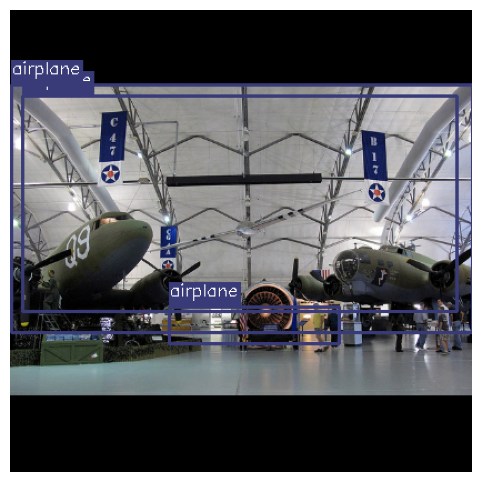

Epoch: 56


  0%|                                                                                                                              | 0/374 [00:06<?, ?it/s, loss=0.076]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:29<1:21:51, 13.20s/it, loss=0.121]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:36<1:05:33, 10.60s/it, loss=0.141]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:43<56:15,  9.12s/it, loss=0.145]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:50<51:56,  8.45s/it, loss=0.135]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [00:58<50:15,  8.20s/it, loss=0.142]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:05<48:47,  7.98s/it, loss=0.143]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:12<46:34,  7.64s/it, loss=0.135]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:19<45:17,  7.45s/it, loss=0.129]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:27<44:58,  7.41s/it, loss=0.123]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:34<45:15,  7.48s/it, loss=0.122]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:42<44:46,  7.42s/it, loss=0.123]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:49<44:45,  7.44s/it, loss=0.125]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:57<44:58,  7.50s/it, loss=0.126]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:04<43:44,  7.31s/it, loss=0.125]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:11<44:15,  7.42s/it, loss=0.124]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:19<44:29,  7.48s/it, loss=0.126]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:26<42:54,  7.23s/it, loss=0.123]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:33<42:40,  7.21s/it, loss=0.129]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:41<43:34,  7.38s/it, loss=0.127]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:48<43:22,  7.37s/it, loss=0.125]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:56<43:43,  7.45s/it, loss=0.128]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [03:03<44:03,  7.53s/it, loss=0.127]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:11<44:15,  7.59s/it, loss=0.125]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:18<42:43,  7.34s/it, loss=0.124]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:24<41:18,  7.12s/it, loss=0.124]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:32<41:29,  7.17s/it, loss=0.124]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:39<41:15,  7.16s/it, loss=0.122]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:46<40:30,  7.04s/it, loss=0.121]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:54<43:36,  7.61s/it, loss=0.121]

batch_idx: 29


  8%|█████████▊                                                                                                            | 31/374 [04:01<42:20,  7.41s/it, loss=0.12]

batch_idx: 30


  9%|██████████                                                                                                            | 32/374 [04:08<41:26,  7.27s/it, loss=0.12]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:16<41:16,  7.26s/it, loss=0.121]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:23<41:02,  7.24s/it, loss=0.124]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:30<40:36,  7.19s/it, loss=0.123]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:36<38:36,  6.85s/it, loss=0.124]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:43<38:18,  6.82s/it, loss=0.123]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:50<38:35,  6.89s/it, loss=0.123]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:57<38:41,  6.93s/it, loss=0.123]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [05:03<37:46,  6.79s/it, loss=0.122]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:10<37:39,  6.79s/it, loss=0.122]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:17<38:03,  6.88s/it, loss=0.122]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:24<38:22,  6.96s/it, loss=0.121]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:32<39:44,  7.23s/it, loss=0.121]

batch_idx: 43


 12%|██████████████▏                                                                                                       | 45/374 [05:39<39:08,  7.14s/it, loss=0.12]

batch_idx: 44


 12%|██████████████▌                                                                                                       | 46/374 [05:46<39:29,  7.22s/it, loss=0.12]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:53<38:33,  7.07s/it, loss=0.119]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [06:01<39:10,  7.21s/it, loss=0.118]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:07<38:04,  7.03s/it, loss=0.118]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:14<38:08,  7.06s/it, loss=0.117]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:22<39:35,  7.35s/it, loss=0.118]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:29<38:54,  7.25s/it, loss=0.117]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:37<39:07,  7.31s/it, loss=0.118]

batch_idx: 52


 14%|█████████████████                                                                                                     | 54/374 [06:44<38:45,  7.27s/it, loss=0.12]

batch_idx: 53


 15%|█████████████████▎                                                                                                    | 55/374 [06:51<38:36,  7.26s/it, loss=0.12]

batch_idx: 54


 15%|█████████████████▋                                                                                                    | 56/374 [07:00<40:41,  7.68s/it, loss=0.12]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [07:07<39:43,  7.52s/it, loss=0.121]

batch_idx: 56


 16%|██████████████████▎                                                                                                   | 58/374 [07:14<38:24,  7.29s/it, loss=0.12]

batch_idx: 57


 16%|██████████████████▌                                                                                                   | 59/374 [07:23<40:25,  7.70s/it, loss=0.12]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:30<39:20,  7.52s/it, loss=0.121]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:37<38:25,  7.36s/it, loss=0.121]

batch_idx: 60


 17%|███████████████████▌                                                                                                  | 62/374 [07:43<37:27,  7.20s/it, loss=0.12]

batch_idx: 61


 17%|███████████████████▉                                                                                                  | 63/374 [07:51<37:42,  7.28s/it, loss=0.12]

batch_idx: 62


 17%|████████████████████▏                                                                                                 | 64/374 [07:58<37:10,  7.19s/it, loss=0.12]

batch_idx: 63


 17%|████████████████████▌                                                                                                 | 65/374 [08:05<36:28,  7.08s/it, loss=0.12]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [08:12<36:49,  7.17s/it, loss=0.119]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:19<36:46,  7.19s/it, loss=0.119]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:27<37:30,  7.36s/it, loss=0.119]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:34<37:17,  7.34s/it, loss=0.119]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:42<36:53,  7.28s/it, loss=0.118]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:48<35:50,  7.10s/it, loss=0.117]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:56<36:34,  7.27s/it, loss=0.117]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [09:04<37:09,  7.41s/it, loss=0.116]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [09:10<35:27,  7.09s/it, loss=0.117]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:17<35:03,  7.04s/it, loss=0.117]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:24<34:55,  7.03s/it, loss=0.117]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:30<33:59,  6.87s/it, loss=0.117]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:38<34:18,  6.95s/it, loss=0.116]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:45<34:58,  7.11s/it, loss=0.116]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:52<34:24,  7.02s/it, loss=0.116]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:59<34:39,  7.10s/it, loss=0.116]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [10:07<34:58,  7.18s/it, loss=0.116]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:13<34:29,  7.11s/it, loss=0.116]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:21<35:14,  7.29s/it, loss=0.116]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:28<34:55,  7.25s/it, loss=0.115]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:36<35:04,  7.31s/it, loss=0.116]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:43<34:42,  7.25s/it, loss=0.116]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:49<33:38,  7.06s/it, loss=0.115]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:57<34:30,  7.26s/it, loss=0.115]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [11:04<34:15,  7.24s/it, loss=0.116]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [11:12<34:03,  7.22s/it, loss=0.115]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:19<34:27,  7.33s/it, loss=0.115]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:26<34:15,  7.32s/it, loss=0.114]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:34<34:00,  7.29s/it, loss=0.114]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:41<33:16,  7.16s/it, loss=0.114]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:47<32:27,  7.00s/it, loss=0.114]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:54<32:09,  6.97s/it, loss=0.114]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [12:01<32:27,  7.06s/it, loss=0.114]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [12:16<42:34,  9.29s/it, loss=0.114]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:23<39:14,  8.59s/it, loss=0.114]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:30<37:03,  8.14s/it, loss=0.114]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:37<34:59,  7.72s/it, loss=0.114]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:43<33:18,  7.37s/it, loss=0.114]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:50<32:22,  7.20s/it, loss=0.114]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:57<32:25,  7.23s/it, loss=0.114]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [13:05<32:24,  7.26s/it, loss=0.114]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [13:12<32:12,  7.24s/it, loss=0.113]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [13:19<31:53,  7.19s/it, loss=0.113]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:26<31:18,  7.09s/it, loss=0.113]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:33<31:11,  7.09s/it, loss=0.113]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:40<31:10,  7.11s/it, loss=0.113]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:47<31:06,  7.12s/it, loss=0.113]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:54<31:12,  7.18s/it, loss=0.113]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [14:01<30:45,  7.10s/it, loss=0.113]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [14:08<30:18,  7.02s/it, loss=0.113]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [14:15<30:11,  7.02s/it, loss=0.113]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:23<30:35,  7.14s/it, loss=0.113]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:30<30:25,  7.13s/it, loss=0.113]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:38<31:15,  7.35s/it, loss=0.113]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:45<30:41,  7.25s/it, loss=0.113]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:52<30:53,  7.33s/it, loss=0.112]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:59<30:27,  7.25s/it, loss=0.112]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [15:07<30:30,  7.29s/it, loss=0.112]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [15:14<30:37,  7.35s/it, loss=0.112]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [15:21<30:21,  7.31s/it, loss=0.113]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:28<29:26,  7.12s/it, loss=0.113]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:36<30:26,  7.40s/it, loss=0.114]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:43<30:13,  7.37s/it, loss=0.113]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:50<29:20,  7.19s/it, loss=0.113]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:57<29:15,  7.19s/it, loss=0.113]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [16:04<29:07,  7.19s/it, loss=0.113]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [16:11<28:20,  7.03s/it, loss=0.113]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [16:18<28:35,  7.12s/it, loss=0.113]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:26<28:24,  7.10s/it, loss=0.113]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:33<28:12,  7.08s/it, loss=0.114]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:40<28:27,  7.17s/it, loss=0.113]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:48<28:49,  7.30s/it, loss=0.114]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:55<28:42,  7.30s/it, loss=0.113]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [17:02<28:16,  7.22s/it, loss=0.114]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [17:09<27:50,  7.14s/it, loss=0.115]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [17:16<27:39,  7.12s/it, loss=0.115]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [17:24<28:27,  7.36s/it, loss=0.114]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:31<27:35,  7.17s/it, loss=0.114]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:37<27:14,  7.11s/it, loss=0.114]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:44<26:51,  7.04s/it, loss=0.114]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:51<26:47,  7.05s/it, loss=0.114]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:59<27:33,  7.28s/it, loss=0.114]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [18:06<26:50,  7.12s/it, loss=0.115]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [18:13<26:50,  7.16s/it, loss=0.115]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [18:21<26:53,  7.20s/it, loss=0.114]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:28<26:42,  7.18s/it, loss=0.114]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:35<26:44,  7.23s/it, loss=0.114]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:42<26:25,  7.18s/it, loss=0.114]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:49<26:23,  7.20s/it, loss=0.114]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:57<26:25,  7.24s/it, loss=0.114]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [19:04<26:16,  7.23s/it, loss=0.114]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [19:11<25:39,  7.09s/it, loss=0.114]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [19:18<25:40,  7.13s/it, loss=0.113]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [19:27<27:47,  7.76s/it, loss=0.113]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:34<27:00,  7.57s/it, loss=0.113]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:41<25:59,  7.32s/it, loss=0.113]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:48<26:01,  7.37s/it, loss=0.113]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:56<25:38,  7.29s/it, loss=0.113]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [20:03<25:37,  7.32s/it, loss=0.113]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [20:10<25:40,  7.37s/it, loss=0.113]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [20:18<25:18,  7.30s/it, loss=0.113]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [20:25<24:55,  7.23s/it, loss=0.113]

batch_idx: 166


 45%|████████████████████████████████████████████████████                                                                | 168/374 [20:32<25:08,  7.32s/it, loss=0.113]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:40<25:08,  7.36s/it, loss=0.113]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:47<24:38,  7.25s/it, loss=0.113]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:54<24:38,  7.28s/it, loss=0.113]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [21:02<24:54,  7.40s/it, loss=0.113]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [21:09<25:02,  7.47s/it, loss=0.113]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [21:17<24:49,  7.45s/it, loss=0.113]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [21:24<24:24,  7.36s/it, loss=0.113]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [21:31<24:24,  7.40s/it, loss=0.113]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:38<23:25,  7.13s/it, loss=0.113]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:45<23:37,  7.23s/it, loss=0.113]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:52<23:23,  7.20s/it, loss=0.112]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:59<22:56,  7.10s/it, loss=0.112]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [22:07<23:02,  7.17s/it, loss=0.112]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [22:14<22:50,  7.14s/it, loss=0.112]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [22:20<22:09,  6.96s/it, loss=0.112]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [22:28<23:07,  7.30s/it, loss=0.112]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:35<22:31,  7.15s/it, loss=0.112]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:43<22:48,  7.28s/it, loss=0.112]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:50<22:39,  7.27s/it, loss=0.112]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:58<23:23,  7.54s/it, loss=0.112]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [23:06<23:23,  7.58s/it, loss=0.112]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [23:13<22:55,  7.48s/it, loss=0.112]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [23:20<22:35,  7.41s/it, loss=0.112]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [23:27<22:01,  7.26s/it, loss=0.112]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [23:34<21:32,  7.14s/it, loss=0.112]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:41<21:16,  7.09s/it, loss=0.112]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:48<21:08,  7.09s/it, loss=0.112]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [23:56<21:30,  7.25s/it, loss=0.112]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [24:03<21:41,  7.36s/it, loss=0.113]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [24:11<21:50,  7.44s/it, loss=0.113]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [24:18<21:04,  7.23s/it, loss=0.113]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:25<20:51,  7.19s/it, loss=0.113]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:32<20:51,  7.19s/it, loss=0.112]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▎                                                     | 201/374 [25:00<44:30, 15.44s/it, loss=0.112]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [25:14<32:12, 11.30s/it, loss=0.112]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [25:21<28:11,  9.95s/it, loss=0.112]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [25:28<25:44,  9.14s/it, loss=0.112]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [25:36<24:05,  8.60s/it, loss=0.112]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [25:42<22:01,  7.91s/it, loss=0.112]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:50<21:48,  7.88s/it, loss=0.112]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:57<21:18,  7.75s/it, loss=0.113]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [26:04<20:36,  7.54s/it, loss=0.114]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [26:12<20:34,  7.57s/it, loss=0.113]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [26:19<19:59,  7.40s/it, loss=0.113]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [26:26<19:38,  7.32s/it, loss=0.113]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [26:33<19:23,  7.27s/it, loss=0.113]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [26:40<19:18,  7.29s/it, loss=0.113]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [26:47<18:53,  7.17s/it, loss=0.113]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:54<18:38,  7.12s/it, loss=0.113]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [27:01<17:54,  6.89s/it, loss=0.113]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [27:08<18:00,  6.97s/it, loss=0.113]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [27:15<18:10,  7.08s/it, loss=0.113]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [27:22<17:56,  7.04s/it, loss=0.113]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [27:29<18:03,  7.13s/it, loss=0.113]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [27:36<17:50,  7.09s/it, loss=0.113]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:44<17:49,  7.13s/it, loss=0.113]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:51<18:05,  7.28s/it, loss=0.113]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:58<17:50,  7.24s/it, loss=0.112]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [28:06<17:47,  7.26s/it, loss=0.113]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [28:14<18:41,  7.68s/it, loss=0.113]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [28:21<17:59,  7.44s/it, loss=0.113]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [28:28<17:05,  7.12s/it, loss=0.113]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [28:35<17:01,  7.14s/it, loss=0.113]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [28:42<17:00,  7.19s/it, loss=0.113]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:49<16:59,  7.23s/it, loss=0.113]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:57<16:50,  7.22s/it, loss=0.113]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [29:04<16:50,  7.27s/it, loss=0.113]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [29:12<17:04,  7.43s/it, loss=0.113]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [29:19<16:34,  7.26s/it, loss=0.113]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [29:26<16:37,  7.34s/it, loss=0.113]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [29:34<16:39,  7.40s/it, loss=0.113]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [29:41<16:26,  7.36s/it, loss=0.114]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:49<16:28,  7.43s/it, loss=0.114]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:56<16:18,  7.41s/it, loss=0.114]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [30:03<15:55,  7.29s/it, loss=0.114]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [30:10<15:31,  7.17s/it, loss=0.114]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [30:17<15:34,  7.25s/it, loss=0.114]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [30:25<15:30,  7.27s/it, loss=0.114]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [30:31<15:05,  7.13s/it, loss=0.114]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [30:39<14:55,  7.11s/it, loss=0.114]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [30:46<14:52,  7.14s/it, loss=0.114]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:53<14:35,  7.06s/it, loss=0.114]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [31:01<15:04,  7.36s/it, loss=0.115]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [31:08<14:53,  7.33s/it, loss=0.114]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [31:16<14:58,  7.42s/it, loss=0.115]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [31:23<14:54,  7.45s/it, loss=0.115]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [31:30<14:35,  7.36s/it, loss=0.115]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [31:38<14:39,  7.45s/it, loss=0.115]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [31:45<14:15,  7.31s/it, loss=0.114]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:52<13:48,  7.14s/it, loss=0.114]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:59<13:34,  7.08s/it, loss=0.114]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [32:05<13:20,  7.03s/it, loss=0.114]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [32:13<13:36,  7.23s/it, loss=0.114]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [32:20<13:25,  7.19s/it, loss=0.114]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [32:27<12:59,  7.02s/it, loss=0.114]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [32:35<13:14,  7.22s/it, loss=0.114]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [32:42<13:12,  7.27s/it, loss=0.115]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [32:49<13:02,  7.25s/it, loss=0.115]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:56<12:55,  7.25s/it, loss=0.115]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [33:04<12:44,  7.21s/it, loss=0.115]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [33:11<12:44,  7.28s/it, loss=0.115]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [33:18<12:33,  7.25s/it, loss=0.115]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [33:25<12:13,  7.12s/it, loss=0.115]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [33:32<12:00,  7.07s/it, loss=0.115]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [33:39<12:00,  7.14s/it, loss=0.115]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [33:46<11:51,  7.11s/it, loss=0.115]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [33:53<11:46,  7.14s/it, loss=0.115]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [34:00<11:15,  6.90s/it, loss=0.115]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [34:07<11:08,  6.89s/it, loss=0.115]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [34:14<11:10,  6.98s/it, loss=0.115]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [34:21<11:20,  7.16s/it, loss=0.114]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [34:28<11:10,  7.13s/it, loss=0.114]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [34:36<11:00,  7.10s/it, loss=0.114]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [34:43<11:00,  7.18s/it, loss=0.114]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [34:50<10:48,  7.12s/it, loss=0.114]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [35:04<10:39,  7.19s/it, loss=0.114]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [35:13<11:08,  7.60s/it, loss=0.114]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [35:20<10:45,  7.42s/it, loss=0.114]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [35:27<10:28,  7.31s/it, loss=0.114]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [35:34<10:18,  7.27s/it, loss=0.114]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [35:41<09:54,  7.07s/it, loss=0.114]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [35:48<09:55,  7.17s/it, loss=0.114]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:56<10:15,  7.51s/it, loss=0.114]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [36:03<09:54,  7.34s/it, loss=0.114]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [36:10<09:31,  7.15s/it, loss=0.114]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [36:17<09:28,  7.19s/it, loss=0.114]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [36:24<09:17,  7.14s/it, loss=0.114]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [36:32<09:27,  7.37s/it, loss=0.113]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [36:39<09:09,  7.23s/it, loss=0.113]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [36:46<08:58,  7.18s/it, loss=0.113]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [36:53<08:39,  7.02s/it, loss=0.113]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [37:00<08:35,  7.07s/it, loss=0.113]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [37:07<08:29,  7.08s/it, loss=0.113]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [37:15<08:31,  7.20s/it, loss=0.113]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [37:22<08:21,  7.16s/it, loss=0.113]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [37:29<08:24,  7.31s/it, loss=0.113]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [37:37<08:13,  7.25s/it, loss=0.113]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [37:44<08:06,  7.26s/it, loss=0.113]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [37:51<07:56,  7.21s/it, loss=0.113]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:58<07:46,  7.18s/it, loss=0.113]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [38:05<07:44,  7.26s/it, loss=0.113]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [38:13<07:42,  7.34s/it, loss=0.113]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [38:20<07:27,  7.22s/it, loss=0.113]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [38:27<07:14,  7.12s/it, loss=0.113]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [38:34<07:05,  7.09s/it, loss=0.113]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [38:41<06:51,  6.97s/it, loss=0.113]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [38:48<06:59,  7.23s/it, loss=0.113]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [38:55<06:47,  7.15s/it, loss=0.113]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [39:02<06:34,  7.04s/it, loss=0.113]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [39:09<06:24,  7.00s/it, loss=0.113]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [39:15<06:07,  6.80s/it, loss=0.113]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [39:23<06:17,  7.12s/it, loss=0.113]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [39:30<06:07,  7.07s/it, loss=0.113]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [39:37<05:59,  7.06s/it, loss=0.113]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [39:44<05:52,  7.04s/it, loss=0.113]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [39:51<05:42,  6.99s/it, loss=0.112]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:59<05:45,  7.19s/it, loss=0.113]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [40:06<05:39,  7.22s/it, loss=0.113]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [40:14<05:36,  7.32s/it, loss=0.113]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [40:21<05:26,  7.25s/it, loss=0.112]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [40:28<05:21,  7.31s/it, loss=0.113]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [40:35<05:13,  7.30s/it, loss=0.112]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [40:43<05:06,  7.31s/it, loss=0.112]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [40:50<04:55,  7.22s/it, loss=0.112]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [40:56<04:42,  7.06s/it, loss=0.112]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [41:04<04:37,  7.11s/it, loss=0.112]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [41:10<04:26,  7.03s/it, loss=0.112]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [41:17<04:19,  7.01s/it, loss=0.112]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [41:25<04:14,  7.07s/it, loss=0.112]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [41:33<04:16,  7.32s/it, loss=0.112]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [41:40<04:11,  7.38s/it, loss=0.112]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [41:47<03:57,  7.18s/it, loss=0.112]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [41:54<03:46,  7.07s/it, loss=0.112]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [42:01<03:37,  7.03s/it, loss=0.112]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [42:08<03:35,  7.19s/it, loss=0.112]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [42:15<03:29,  7.22s/it, loss=0.112]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [42:22<03:18,  7.08s/it, loss=0.112]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [42:29<03:12,  7.13s/it, loss=0.112]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [42:37<03:07,  7.22s/it, loss=0.112]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [42:44<02:58,  7.12s/it, loss=0.112]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [42:51<02:51,  7.17s/it, loss=0.112]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:58<02:45,  7.20s/it, loss=0.112]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [43:05<02:37,  7.16s/it, loss=0.112]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [43:12<02:29,  7.12s/it, loss=0.112]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [43:20<02:23,  7.17s/it, loss=0.112]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:27<02:16,  7.16s/it, loss=0.112]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [43:34<02:10,  7.25s/it, loss=0.112]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [43:42<02:03,  7.27s/it, loss=0.112]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [43:49<01:56,  7.30s/it, loss=0.112]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [43:56<01:48,  7.27s/it, loss=0.112]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [44:04<01:43,  7.41s/it, loss=0.112]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [44:11<01:35,  7.32s/it, loss=0.112]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [44:18<01:26,  7.17s/it, loss=0.112]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:25<01:18,  7.18s/it, loss=0.112]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [44:32<01:12,  7.25s/it, loss=0.112]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [44:39<01:04,  7.15s/it, loss=0.112]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [44:46<00:56,  7.09s/it, loss=0.112]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [44:54<00:49,  7.13s/it, loss=0.112]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [45:01<00:42,  7.09s/it, loss=0.112]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [45:08<00:35,  7.10s/it, loss=0.112]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [45:14<00:27,  7.00s/it, loss=0.112]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:22<00:21,  7.07s/it, loss=0.112]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:29<00:14,  7.12s/it, loss=0.112]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [45:36<00:07,  7.07s/it, loss=0.112]

batch_idx: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [45:38<00:00,  7.32s/it, loss=0.112]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


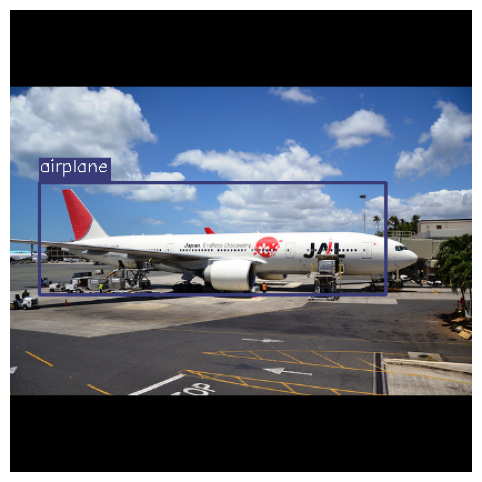

Epoch: 57


  0%|                                                                                                                              | 0/374 [00:06<?, ?it/s, loss=0.113]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                  | 2/374 [00:25<1:11:55, 11.60s/it, loss=0.0997]

batch_idx: 1


  1%|▉                                                                                                                     | 3/374 [00:32<59:11,  9.57s/it, loss=0.107]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:39<54:01,  8.76s/it, loss=0.107]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [00:47<50:17,  8.18s/it, loss=0.0991]

batch_idx: 4


  2%|█▉                                                                                                                   | 6/374 [00:54<48:30,  7.91s/it, loss=0.0954]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:01<46:24,  7.59s/it, loss=0.103]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:08<44:49,  7.35s/it, loss=0.104]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:15<44:28,  7.31s/it, loss=0.113]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:22<44:05,  7.27s/it, loss=0.115]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:29<43:49,  7.24s/it, loss=0.117]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:36<43:37,  7.23s/it, loss=0.119]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:43<42:26,  7.05s/it, loss=0.115]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:50<42:08,  7.02s/it, loss=0.117]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [01:57<42:26,  7.09s/it, loss=0.121]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:04<42:04,  7.05s/it, loss=0.119]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:10<40:20,  6.78s/it, loss=0.116]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:17<40:23,  6.81s/it, loss=0.114]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:25<40:58,  6.93s/it, loss=0.113]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:32<41:32,  7.04s/it, loss=0.112]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:39<41:12,  7.00s/it, loss=0.111]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:46<40:56,  6.98s/it, loss=0.112]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:53<41:36,  7.11s/it, loss=0.113]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:01<42:06,  7.22s/it, loss=0.115]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:08<41:42,  7.17s/it, loss=0.116]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:14<40:52,  7.05s/it, loss=0.117]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:21<39:59,  6.92s/it, loss=0.116]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:28<40:33,  7.03s/it, loss=0.115]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:35<40:01,  6.96s/it, loss=0.115]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:42<39:39,  6.92s/it, loss=0.116]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:49<39:47,  6.96s/it, loss=0.115]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:56<40:17,  7.07s/it, loss=0.115]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:03<39:06,  6.88s/it, loss=0.116]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:10<38:53,  6.86s/it, loss=0.118]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:17<39:44,  7.04s/it, loss=0.119]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:24<40:19,  7.16s/it, loss=0.118]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:31<39:42,  7.07s/it, loss=0.118]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:38<38:27,  6.87s/it, loss=0.116]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:45<38:19,  6.86s/it, loss=0.118]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:51<38:15,  6.87s/it, loss=0.118]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [04:59<38:43,  6.98s/it, loss=0.117]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:06<38:57,  7.04s/it, loss=0.118]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:13<39:22,  7.14s/it, loss=0.118]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:21<40:04,  7.29s/it, loss=0.117]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:28<40:19,  7.35s/it, loss=0.119]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:35<39:47,  7.28s/it, loss=0.118]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:42<38:57,  7.15s/it, loss=0.118]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:49<38:20,  7.06s/it, loss=0.117]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [05:56<38:16,  7.07s/it, loss=0.117]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:03<37:37,  6.97s/it, loss=0.116]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:10<38:20,  7.12s/it, loss=0.115]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:18<39:12,  7.31s/it, loss=0.116]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:25<38:35,  7.21s/it, loss=0.115]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:32<37:44,  7.08s/it, loss=0.115]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:38<36:46,  6.92s/it, loss=0.114]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:46<37:01,  6.99s/it, loss=0.114]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:52<36:36,  6.93s/it, loss=0.113]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:00<36:53,  7.00s/it, loss=0.112]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:07<36:49,  7.01s/it, loss=0.114]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:14<37:24,  7.15s/it, loss=0.113]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:21<37:25,  7.17s/it, loss=0.113]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:28<37:14,  7.16s/it, loss=0.115]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:36<37:29,  7.23s/it, loss=0.115]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:43<36:49,  7.13s/it, loss=0.114]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:49<35:55,  6.98s/it, loss=0.114]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [07:57<36:19,  7.08s/it, loss=0.114]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:03<35:33,  6.95s/it, loss=0.114]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:10<35:20,  6.93s/it, loss=0.113]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:17<35:10,  6.92s/it, loss=0.113]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:24<34:36,  6.83s/it, loss=0.113]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:31<35:04,  6.94s/it, loss=0.113]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:38<35:10,  6.99s/it, loss=0.113]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [08:45<35:31,  7.08s/it, loss=0.112]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [08:52<35:25,  7.09s/it, loss=0.112]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [08:59<34:56,  7.01s/it, loss=0.112]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:06<34:58,  7.04s/it, loss=0.114]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:13<34:51,  7.04s/it, loss=0.114]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:20<34:40,  7.03s/it, loss=0.114]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:28<34:48,  7.08s/it, loss=0.113]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:35<35:06,  7.16s/it, loss=0.115]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:42<34:41,  7.11s/it, loss=0.114]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:50<35:14,  7.24s/it, loss=0.114]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [09:57<35:38,  7.35s/it, loss=0.114]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:04<35:33,  7.36s/it, loss=0.114]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:11<34:47,  7.22s/it, loss=0.115]

batch_idx: 84


 24%|███████████████████████████▌                                                                                         | 88/374 [10:32<33:38,  7.06s/it, loss=0.114]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:40<33:48,  7.12s/it, loss=0.113]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [10:46<33:00,  6.97s/it, loss=0.113]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [10:53<33:07,  7.02s/it, loss=0.114]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:00<32:56,  7.01s/it, loss=0.114]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:07<32:54,  7.03s/it, loss=0.113]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:14<31:44,  6.80s/it, loss=0.113]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:20<31:22,  6.75s/it, loss=0.113]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:28<32:22,  6.99s/it, loss=0.113]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:35<32:40,  7.08s/it, loss=0.113]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [11:42<32:20,  7.03s/it, loss=0.112]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:49<32:39,  7.12s/it, loss=0.113]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [11:56<31:54,  6.99s/it, loss=0.112]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:03<31:50,  7.00s/it, loss=0.112]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:10<31:37,  6.98s/it, loss=0.112]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:18<32:18,  7.15s/it, loss=0.112]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:25<31:59,  7.11s/it, loss=0.112]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:31<31:20,  6.99s/it, loss=0.112]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:39<31:32,  7.06s/it, loss=0.112]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [12:46<31:55,  7.17s/it, loss=0.111]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [12:53<31:28,  7.10s/it, loss=0.111]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:00<31:18,  7.09s/it, loss=0.112]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:07<30:26,  6.92s/it, loss=0.112]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:13<30:23,  6.94s/it, loss=0.112]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:21<30:42,  7.03s/it, loss=0.112]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:28<30:48,  7.08s/it, loss=0.112]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [13:35<31:10,  7.20s/it, loss=0.112]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [13:42<30:51,  7.15s/it, loss=0.112]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:50<30:56,  7.20s/it, loss=0.113]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [13:56<29:53,  6.98s/it, loss=0.112]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:04<30:22,  7.12s/it, loss=0.112]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:11<30:04,  7.08s/it, loss=0.112]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:18<30:23,  7.18s/it, loss=0.112]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:26<30:48,  7.30s/it, loss=0.111]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:33<30:26,  7.25s/it, loss=0.111]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [14:40<29:47,  7.12s/it, loss=0.111]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [14:47<29:56,  7.19s/it, loss=0.112]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [14:54<29:56,  7.22s/it, loss=0.111]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:01<29:16,  7.08s/it, loss=0.111]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:09<29:48,  7.24s/it, loss=0.111]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:16<29:41,  7.24s/it, loss=0.111]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:23<29:48,  7.30s/it, loss=0.111]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:31<29:37,  7.29s/it, loss=0.111]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:38<29:31,  7.29s/it, loss=0.111]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [15:45<29:27,  7.31s/it, loss=0.111]

batch_idx: 131


 36%|█████████████████████████████████████████▌                                                                           | 133/374 [15:52<29:21,  7.31s/it, loss=0.11]

batch_idx: 132


 36%|█████████████████████████████████████████▉                                                                           | 134/374 [16:00<28:55,  7.23s/it, loss=0.11]

batch_idx: 133


 36%|██████████████████████████████████████████▏                                                                          | 135/374 [16:06<28:17,  7.10s/it, loss=0.11]

batch_idx: 134


 36%|██████████████████████████████████████████▏                                                                         | 136/374 [16:13<27:40,  6.98s/it, loss=0.111]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:20<27:46,  7.03s/it, loss=0.111]

batch_idx: 136


 37%|███████████████████████████████████████████▏                                                                         | 138/374 [16:27<27:54,  7.09s/it, loss=0.11]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [16:35<27:45,  7.09s/it, loss=0.111]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [16:42<27:47,  7.13s/it, loss=0.111]

batch_idx: 139


 38%|████████████████████████████████████████████                                                                         | 141/374 [16:49<28:16,  7.28s/it, loss=0.11]

batch_idx: 140


 38%|████████████████████████████████████████████▍                                                                        | 142/374 [16:56<27:54,  7.22s/it, loss=0.11]

batch_idx: 141


 38%|████████████████████████████████████████████▋                                                                        | 143/374 [17:03<27:27,  7.13s/it, loss=0.11]

batch_idx: 142


 39%|█████████████████████████████████████████████                                                                        | 144/374 [17:11<27:29,  7.17s/it, loss=0.11]

batch_idx: 143


 39%|█████████████████████████████████████████████▎                                                                       | 145/374 [17:18<27:14,  7.14s/it, loss=0.11]

batch_idx: 144


 39%|█████████████████████████████████████████████▋                                                                       | 146/374 [17:25<27:16,  7.18s/it, loss=0.11]

batch_idx: 145


 40%|██████████████████████████████████████████████▉                                                                      | 150/374 [17:53<26:32,  7.11s/it, loss=0.11]

batch_idx: 149


 40%|███████████████████████████████████████████████▏                                                                     | 151/374 [18:01<27:10,  7.31s/it, loss=0.11]

batch_idx: 150


 41%|███████████████████████████████████████████████▌                                                                     | 152/374 [18:09<27:02,  7.31s/it, loss=0.11]

batch_idx: 151


 41%|███████████████████████████████████████████████▊                                                                     | 153/374 [18:16<26:58,  7.32s/it, loss=0.11]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:23<26:28,  7.22s/it, loss=0.109]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:30<26:14,  7.19s/it, loss=0.109]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:37<26:24,  7.27s/it, loss=0.109]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [18:45<26:08,  7.23s/it, loss=0.109]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:52<25:49,  7.17s/it, loss=0.109]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [18:59<25:34,  7.14s/it, loss=0.109]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:06<25:23,  7.12s/it, loss=0.109]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:13<24:56,  7.03s/it, loss=0.109]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:19<24:37,  6.97s/it, loss=0.109]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:27<25:02,  7.12s/it, loss=0.109]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:34<24:49,  7.09s/it, loss=0.109]

batch_idx: 163


 44%|███████████████████████████████████████████████████▏                                                                | 165/374 [19:41<24:16,  6.97s/it, loss=0.109]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [19:47<23:58,  6.91s/it, loss=0.109]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [19:54<23:58,  6.95s/it, loss=0.109]

batch_idx: 166


 45%|████████████████████████████████████████████████████▌                                                                | 168/374 [20:01<23:52,  6.96s/it, loss=0.11]

batch_idx: 167


 45%|████████████████████████████████████████████████████▊                                                                | 169/374 [20:08<23:55,  7.00s/it, loss=0.11]

batch_idx: 168


 45%|█████████████████████████████████████████████████████▏                                                               | 170/374 [20:15<23:49,  7.01s/it, loss=0.11]

batch_idx: 169


 46%|█████████████████████████████████████████████████████▍                                                               | 171/374 [20:23<24:11,  7.15s/it, loss=0.11]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:30<23:51,  7.08s/it, loss=0.109]

batch_idx: 171


 46%|██████████████████████████████████████████████████████                                                               | 173/374 [20:37<23:29,  7.01s/it, loss=0.11]

batch_idx: 172


 47%|██████████████████████████████████████████████████████▍                                                              | 174/374 [20:44<23:28,  7.04s/it, loss=0.11]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [20:51<23:17,  7.02s/it, loss=0.109]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [20:59<23:57,  7.26s/it, loss=0.109]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:06<24:00,  7.31s/it, loss=0.109]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:13<23:41,  7.25s/it, loss=0.109]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:20<23:12,  7.14s/it, loss=0.109]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:27<22:50,  7.07s/it, loss=0.109]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [21:34<22:46,  7.08s/it, loss=0.109]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [21:41<22:37,  7.07s/it, loss=0.109]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [21:48<22:23,  7.04s/it, loss=0.109]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████▌                                                           | 184/374 [21:55<22:08,  6.99s/it, loss=0.11]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▊                                                           | 185/374 [22:02<22:26,  7.12s/it, loss=0.11]

batch_idx: 184


 50%|██████████████████████████████████████████████████████████▏                                                          | 186/374 [22:09<22:12,  7.09s/it, loss=0.11]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████▌                                                          | 187/374 [22:17<22:09,  7.11s/it, loss=0.11]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▊                                                          | 188/374 [22:24<22:02,  7.11s/it, loss=0.11]

batch_idx: 187


 51%|███████████████████████████████████████████████████████████▏                                                         | 189/374 [22:31<21:56,  7.11s/it, loss=0.11]

batch_idx: 188


 51%|███████████████████████████████████████████████████████████▍                                                         | 190/374 [22:38<22:10,  7.23s/it, loss=0.11]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▊                                                         | 191/374 [22:45<21:09,  6.94s/it, loss=0.11]

batch_idx: 190


 51%|████████████████████████████████████████████████████████████                                                         | 192/374 [22:52<21:04,  6.95s/it, loss=0.11]

batch_idx: 191


 52%|████████████████████████████████████████████████████████████▍                                                        | 193/374 [22:59<21:07,  7.00s/it, loss=0.11]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▋                                                        | 194/374 [23:06<21:28,  7.16s/it, loss=0.11]

batch_idx: 193


 52%|█████████████████████████████████████████████████████████████                                                        | 195/374 [23:13<21:17,  7.14s/it, loss=0.11]

batch_idx: 194


 52%|█████████████████████████████████████████████████████████████▎                                                       | 196/374 [23:20<21:12,  7.15s/it, loss=0.11]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████▋                                                       | 197/374 [23:28<21:22,  7.25s/it, loss=0.11]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▉                                                       | 198/374 [23:35<20:51,  7.11s/it, loss=0.11]

batch_idx: 197


 53%|██████████████████████████████████████████████████████████████▎                                                      | 199/374 [23:42<20:44,  7.11s/it, loss=0.11]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████▌                                                      | 200/374 [23:49<20:54,  7.21s/it, loss=0.11]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████▌                                                      | 200/374 [23:57<20:54,  7.21s/it, loss=0.11]

batch_idx: 200
==> Saving checkpoint


 54%|███████████████████████████████████████████████████████████████▏                                                     | 202/374 [24:20<30:35, 10.67s/it, loss=0.11]

batch_idx: 201


 54%|███████████████████████████████████████████████████████████████▌                                                     | 203/374 [24:28<27:37,  9.69s/it, loss=0.11]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▊                                                     | 204/374 [24:35<25:41,  9.07s/it, loss=0.11]

batch_idx: 203


 55%|████████████████████████████████████████████████████████████████▏                                                    | 205/374 [24:42<24:00,  8.52s/it, loss=0.11]

batch_idx: 204


 55%|████████████████████████████████████████████████████████████████▍                                                    | 206/374 [24:50<22:51,  8.17s/it, loss=0.11]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▊                                                    | 207/374 [24:57<21:42,  7.80s/it, loss=0.11]

batch_idx: 206


 56%|█████████████████████████████████████████████████████████████████                                                    | 208/374 [25:04<20:46,  7.51s/it, loss=0.11]

batch_idx: 207


 56%|█████████████████████████████████████████████████████████████████▍                                                   | 209/374 [25:11<20:11,  7.34s/it, loss=0.11]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▋                                                   | 210/374 [25:18<20:24,  7.47s/it, loss=0.11]

batch_idx: 209


 56%|██████████████████████████████████████████████████████████████████                                                   | 211/374 [25:25<19:41,  7.25s/it, loss=0.11]

batch_idx: 210


 57%|██████████████████████████████████████████████████████████████████▎                                                  | 212/374 [25:33<19:51,  7.36s/it, loss=0.11]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████▋                                                  | 213/374 [25:39<19:08,  7.13s/it, loss=0.11]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▉                                                  | 214/374 [25:46<18:58,  7.11s/it, loss=0.11]

batch_idx: 213


 57%|███████████████████████████████████████████████████████████████████▎                                                 | 215/374 [25:53<18:34,  7.01s/it, loss=0.11]

batch_idx: 214


 58%|███████████████████████████████████████████████████████████████████▌                                                 | 216/374 [26:01<18:49,  7.15s/it, loss=0.11]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▉                                                 | 217/374 [26:08<18:44,  7.16s/it, loss=0.11]

batch_idx: 216


 58%|████████████████████████████████████████████████████████████████████▏                                                | 218/374 [26:15<18:19,  7.05s/it, loss=0.11]

batch_idx: 217


 59%|████████████████████████████████████████████████████████████████████▌                                                | 219/374 [26:22<18:31,  7.17s/it, loss=0.11]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:29<18:15,  7.11s/it, loss=0.109]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:36<17:59,  7.06s/it, loss=0.109]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [26:43<17:58,  7.10s/it, loss=0.109]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [26:50<17:59,  7.15s/it, loss=0.109]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [26:57<17:47,  7.12s/it, loss=0.109]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:04<17:06,  6.89s/it, loss=0.109]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:11<17:21,  7.04s/it, loss=0.109]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:18<16:50,  6.88s/it, loss=0.109]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:25<17:03,  7.01s/it, loss=0.109]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:32<16:48,  6.96s/it, loss=0.109]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [27:39<16:45,  6.98s/it, loss=0.109]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:46<16:32,  6.94s/it, loss=0.109]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [27:53<16:23,  6.93s/it, loss=0.109]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [28:00<16:25,  6.99s/it, loss=0.109]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:07<16:22,  7.02s/it, loss=0.109]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:13<15:57,  6.89s/it, loss=0.109]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:21<16:13,  7.06s/it, loss=0.109]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:28<15:56,  6.98s/it, loss=0.109]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [28:35<16:00,  7.07s/it, loss=0.109]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [28:42<15:48,  7.03s/it, loss=0.109]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [28:49<15:53,  7.12s/it, loss=0.109]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [28:56<15:44,  7.10s/it, loss=0.109]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:03<15:41,  7.13s/it, loss=0.109]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:11<15:55,  7.29s/it, loss=0.109]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:18<15:32,  7.17s/it, loss=0.109]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:25<15:30,  7.21s/it, loss=0.109]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:33<15:29,  7.26s/it, loss=0.109]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [29:39<14:31,  6.86s/it, loss=0.109]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:46<14:35,  6.95s/it, loss=0.109]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [29:53<14:26,  6.93s/it, loss=0.109]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [29:59<14:16,  6.90s/it, loss=0.109]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:07<14:21,  7.01s/it, loss=0.109]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:14<14:10,  6.97s/it, loss=0.109]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:21<14:08,  7.01s/it, loss=0.109]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:28<13:57,  6.98s/it, loss=0.109]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [30:35<13:50,  6.98s/it, loss=0.109]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [30:42<13:55,  7.08s/it, loss=0.109]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [30:49<13:38,  7.00s/it, loss=0.109]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [30:56<13:29,  6.98s/it, loss=0.109]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:03<13:27,  7.02s/it, loss=0.108]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:10<13:16,  6.99s/it, loss=0.109]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:16<13:03,  6.93s/it, loss=0.109]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:24<13:17,  7.12s/it, loss=0.108]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:31<13:06,  7.09s/it, loss=0.108]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [31:38<12:58,  7.08s/it, loss=0.108]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [31:45<12:55,  7.12s/it, loss=0.108]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [31:52<12:50,  7.13s/it, loss=0.108]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:00<12:47,  7.17s/it, loss=0.108]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:07<12:30,  7.08s/it, loss=0.108]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:14<12:26,  7.11s/it, loss=0.108]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:21<12:16,  7.08s/it, loss=0.109]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:28<12:00,  7.00s/it, loss=0.109]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [32:35<12:05,  7.11s/it, loss=0.108]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [32:42<11:44,  6.98s/it, loss=0.108]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [32:49<11:35,  6.96s/it, loss=0.108]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [32:56<11:36,  7.04s/it, loss=0.108]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:03<11:21,  6.95s/it, loss=0.108]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:10<11:14,  6.95s/it, loss=0.108]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:17<11:25,  7.14s/it, loss=0.108]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:25<11:43,  7.41s/it, loss=0.108]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [33:32<11:32,  7.36s/it, loss=0.108]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [33:40<11:20,  7.32s/it, loss=0.108]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [33:47<11:19,  7.39s/it, loss=0.108]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [33:54<11:07,  7.33s/it, loss=0.108]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:03<11:22,  7.58s/it, loss=0.108]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:10<11:02,  7.44s/it, loss=0.109]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:17<10:48,  7.36s/it, loss=0.109]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [34:24<10:30,  7.24s/it, loss=0.109]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [34:31<10:28,  7.30s/it, loss=0.109]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [34:38<10:08,  7.15s/it, loss=0.108]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [34:46<10:11,  7.27s/it, loss=0.108]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [34:52<09:52,  7.14s/it, loss=0.108]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [35:00<09:46,  7.15s/it, loss=0.108]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [35:07<09:39,  7.15s/it, loss=0.108]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [35:14<09:39,  7.24s/it, loss=0.109]

batch_idx: 293


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 295/374 [35:22<09:39,  7.33s/it, loss=0.109]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [35:29<09:21,  7.20s/it, loss=0.108]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [35:36<09:14,  7.20s/it, loss=0.108]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [35:43<09:01,  7.13s/it, loss=0.108]

batch_idx: 297


 80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 299/374 [35:50<08:59,  7.20s/it, loss=0.108]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [35:58<09:04,  7.36s/it, loss=0.108]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [36:05<09:00,  7.41s/it, loss=0.108]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [36:12<08:35,  7.16s/it, loss=0.108]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 303/374 [36:19<08:16,  6.99s/it, loss=0.108]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [36:26<08:10,  7.00s/it, loss=0.108]

batch_idx: 303


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 305/374 [36:32<07:59,  6.94s/it, loss=0.108]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 306/374 [36:39<07:49,  6.90s/it, loss=0.108]

batch_idx: 305


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▏                    | 307/374 [36:47<07:57,  7.12s/it, loss=0.108]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [36:54<07:53,  7.18s/it, loss=0.108]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 309/374 [37:01<07:43,  7.12s/it, loss=0.108]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 310/374 [37:09<07:41,  7.21s/it, loss=0.108]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [37:16<07:31,  7.17s/it, loss=0.108]

batch_idx: 310


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 312/374 [37:23<07:21,  7.12s/it, loss=0.108]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 313/374 [37:30<07:26,  7.32s/it, loss=0.108]

batch_idx: 312


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 314/374 [37:38<07:18,  7.30s/it, loss=0.108]

batch_idx: 313


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 315/374 [37:45<07:11,  7.32s/it, loss=0.108]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████                  | 316/374 [37:52<07:02,  7.28s/it, loss=0.108]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [37:59<06:50,  7.20s/it, loss=0.108]

batch_idx: 316


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 318/374 [38:06<06:35,  7.06s/it, loss=0.108]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [38:13<06:22,  6.95s/it, loss=0.108]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [38:20<06:15,  6.96s/it, loss=0.108]

batch_idx: 319


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 321/374 [38:27<06:13,  7.04s/it, loss=0.108]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 322/374 [38:33<05:54,  6.82s/it, loss=0.108]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [38:40<05:45,  6.77s/it, loss=0.108]

batch_idx: 322


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 324/374 [38:47<05:38,  6.77s/it, loss=0.108]

batch_idx: 323


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 325/374 [38:54<05:39,  6.92s/it, loss=0.108]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [39:01<05:37,  7.03s/it, loss=0.108]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [39:08<05:26,  6.95s/it, loss=0.108]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [39:15<05:17,  6.91s/it, loss=0.108]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 329/374 [39:22<05:17,  7.05s/it, loss=0.109]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [39:29<05:10,  7.05s/it, loss=0.109]

batch_idx: 329


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 331/374 [39:36<05:06,  7.13s/it, loss=0.108]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 332/374 [39:44<04:58,  7.10s/it, loss=0.109]

batch_idx: 331


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 333/374 [39:51<04:50,  7.10s/it, loss=0.108]

batch_idx: 332


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 334/374 [39:58<04:48,  7.20s/it, loss=0.108]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 335/374 [40:05<04:42,  7.24s/it, loss=0.109]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:13<04:41,  7.42s/it, loss=0.109]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:20<04:32,  7.37s/it, loss=0.109]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:28<04:22,  7.30s/it, loss=0.109]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:35<04:20,  7.45s/it, loss=0.109]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [40:43<04:13,  7.45s/it, loss=0.109]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:50<04:01,  7.32s/it, loss=0.109]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [40:57<03:49,  7.16s/it, loss=0.109]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:04<03:41,  7.15s/it, loss=0.109]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:11<03:32,  7.09s/it, loss=0.109]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:18<03:27,  7.16s/it, loss=0.109]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:25<03:18,  7.08s/it, loss=0.109]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:32<03:11,  7.10s/it, loss=0.109]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:39<03:06,  7.19s/it, loss=0.109]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:46<02:57,  7.09s/it, loss=0.109]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:54<02:51,  7.14s/it, loss=0.109]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [42:01<02:44,  7.14s/it, loss=0.109]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:08<02:38,  7.19s/it, loss=0.109]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:15<02:31,  7.20s/it, loss=0.109]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:22<02:23,  7.16s/it, loss=0.109]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [42:29<02:14,  7.09s/it, loss=0.109]

batch_idx: 354


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:36<02:06,  7.05s/it, loss=0.109]

batch_idx: 355


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [42:44<02:01,  7.16s/it, loss=0.109]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:51<01:53,  7.11s/it, loss=0.109]

batch_idx: 357


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [42:58<01:48,  7.21s/it, loss=0.109]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [43:05<01:41,  7.27s/it, loss=0.109]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [43:12<01:32,  7.12s/it, loss=0.109]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:19<01:25,  7.12s/it, loss=0.109]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:27<01:19,  7.23s/it, loss=0.109]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:34<01:12,  7.26s/it, loss=0.109]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:42<01:06,  7.35s/it, loss=0.109]

batch_idx: 364


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 366/374 [43:49<00:58,  7.35s/it, loss=0.11]

batch_idx: 365


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:56<00:51,  7.30s/it, loss=0.11]

batch_idx: 366


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 368/374 [44:03<00:42,  7.15s/it, loss=0.11]

batch_idx: 367


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:10<00:35,  7.01s/it, loss=0.11]

batch_idx: 368


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 370/374 [44:17<00:28,  7.12s/it, loss=0.11]

batch_idx: 369


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:24<00:20,  6.90s/it, loss=0.11]

batch_idx: 370


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 372/374 [44:30<00:13,  6.91s/it, loss=0.11]

batch_idx: 371


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:38<00:06,  6.99s/it, loss=0.11]

batch_idx: 372


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:39<00:00,  7.17s/it, loss=0.11]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


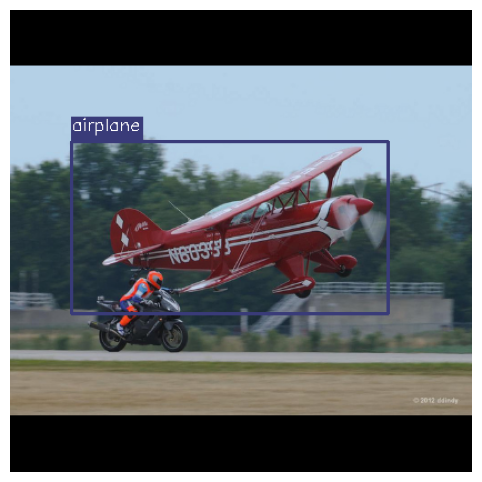

Epoch: 58


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.121]

batch_idx: 0
==> Saving checkpoint


  1%|▋                                                                                                                     | 2/374 [00:22<1:04:26, 10.39s/it, loss=0.1]

batch_idx: 1


  1%|▉                                                                                                                    | 3/374 [00:28<53:13,  8.61s/it, loss=0.0912]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:35<48:31,  7.87s/it, loss=0.084]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [00:42<46:44,  7.60s/it, loss=0.0923]

batch_idx: 4


  2%|█▉                                                                                                                   | 6/374 [00:50<46:35,  7.60s/it, loss=0.0969]

batch_idx: 5


  2%|██▏                                                                                                                  | 7/374 [00:57<47:01,  7.69s/it, loss=0.0968]

batch_idx: 6


  2%|██▌                                                                                                                  | 8/374 [01:04<45:23,  7.44s/it, loss=0.0994]

batch_idx: 7


  2%|██▊                                                                                                                  | 9/374 [01:11<44:35,  7.33s/it, loss=0.0948]

batch_idx: 8


  3%|███                                                                                                                 | 10/374 [01:19<44:03,  7.26s/it, loss=0.0954]

batch_idx: 9


  3%|███▍                                                                                                                | 11/374 [01:26<43:45,  7.23s/it, loss=0.0992]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:33<44:34,  7.39s/it, loss=0.107]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:40<43:37,  7.25s/it, loss=0.108]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:47<42:28,  7.08s/it, loss=0.109]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [01:54<42:41,  7.14s/it, loss=0.107]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:02<42:46,  7.17s/it, loss=0.105]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:08<42:09,  7.09s/it, loss=0.106]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:15<41:51,  7.06s/it, loss=0.104]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:23<42:38,  7.21s/it, loss=0.105]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:30<41:56,  7.11s/it, loss=0.106]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:37<42:14,  7.18s/it, loss=0.106]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:44<41:48,  7.13s/it, loss=0.105]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:51<41:30,  7.10s/it, loss=0.104]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [02:58<41:29,  7.11s/it, loss=0.103]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:06<41:27,  7.13s/it, loss=0.105]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:13<41:07,  7.09s/it, loss=0.104]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:20<40:58,  7.08s/it, loss=0.106]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:27<40:46,  7.07s/it, loss=0.106]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:33<40:06,  6.97s/it, loss=0.106]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:40<39:43,  6.93s/it, loss=0.106]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:47<39:59,  7.00s/it, loss=0.106]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:55<40:05,  7.03s/it, loss=0.105]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:02<40:48,  7.18s/it, loss=0.104]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:09<40:21,  7.12s/it, loss=0.104]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:16<40:32,  7.17s/it, loss=0.103]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:23<39:37,  7.04s/it, loss=0.103]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:30<39:40,  7.06s/it, loss=0.105]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:37<39:21,  7.03s/it, loss=0.104]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:44<38:24,  6.88s/it, loss=0.103]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:51<38:54,  6.99s/it, loss=0.104]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [04:58<38:31,  6.94s/it, loss=0.104]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:05<38:11,  6.90s/it, loss=0.103]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:12<38:44,  7.02s/it, loss=0.102]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:20<39:42,  7.22s/it, loss=0.104]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:27<39:15,  7.16s/it, loss=0.104]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:34<39:33,  7.24s/it, loss=0.104]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:41<39:33,  7.26s/it, loss=0.104]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:52<44:49,  8.25s/it, loss=0.104]

batch_idx: 47
batch_idx: 48


 13%|███████████████                                                                                                    | 49/374 [06:38<1:46:22, 19.64s/it, loss=0.105]

batch_idx: 49


 14%|███████████████▋                                                                                                   | 51/374 [07:59<2:26:55, 27.29s/it, loss=0.105]

batch_idx: 50


 14%|███████████████▉                                                                                                   | 52/374 [08:06<1:53:22, 21.12s/it, loss=0.104]

batch_idx: 51


 14%|████████████████▎                                                                                                  | 53/374 [08:13<1:30:25, 16.90s/it, loss=0.104]

batch_idx: 52


 14%|████████████████▌                                                                                                  | 54/374 [08:20<1:14:27, 13.96s/it, loss=0.105]

batch_idx: 53


 15%|████████████████▉                                                                                                  | 55/374 [08:27<1:03:13, 11.89s/it, loss=0.105]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [08:34<54:55, 10.36s/it, loss=0.105]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [08:41<48:58,  9.27s/it, loss=0.105]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [08:47<44:50,  8.52s/it, loss=0.104]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [08:54<41:18,  7.87s/it, loss=0.105]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [09:01<39:32,  7.56s/it, loss=0.105]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [09:07<37:56,  7.27s/it, loss=0.105]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [09:14<37:33,  7.22s/it, loss=0.106]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [09:21<36:48,  7.10s/it, loss=0.105]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [09:28<36:58,  7.16s/it, loss=0.105]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [09:35<36:26,  7.08s/it, loss=0.104]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [09:42<36:14,  7.06s/it, loss=0.104]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [09:50<36:39,  7.16s/it, loss=0.104]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [09:57<36:05,  7.08s/it, loss=0.105]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [10:04<35:41,  7.02s/it, loss=0.104]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [10:10<34:54,  6.89s/it, loss=0.103]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [10:17<34:33,  6.84s/it, loss=0.103]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [10:24<34:46,  6.91s/it, loss=0.103]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [10:31<34:31,  6.88s/it, loss=0.103]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [10:37<33:48,  6.76s/it, loss=0.103]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [10:44<34:24,  6.91s/it, loss=0.102]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [10:51<34:16,  6.90s/it, loss=0.103]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [10:59<34:49,  7.03s/it, loss=0.102]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [11:05<33:58,  6.89s/it, loss=0.102]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [11:12<34:09,  6.95s/it, loss=0.102]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [11:20<35:05,  7.16s/it, loss=0.102]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [11:27<34:41,  7.10s/it, loss=0.102]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [11:34<34:42,  7.13s/it, loss=0.102]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [11:41<34:11,  7.05s/it, loss=0.102]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [11:48<34:02,  7.04s/it, loss=0.102]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [11:56<34:50,  7.23s/it, loss=0.102]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [12:03<34:24,  7.17s/it, loss=0.102]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [12:10<34:40,  7.25s/it, loss=0.102]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [12:17<34:16,  7.19s/it, loss=0.102]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [12:25<34:35,  7.28s/it, loss=0.104]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [12:32<34:28,  7.28s/it, loss=0.104]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [12:39<34:09,  7.24s/it, loss=0.104]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [12:46<33:45,  7.18s/it, loss=0.104]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [12:53<33:20,  7.12s/it, loss=0.105]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [13:00<33:19,  7.14s/it, loss=0.106]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [13:07<32:37,  7.02s/it, loss=0.106]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [13:14<32:37,  7.04s/it, loss=0.106]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [13:21<32:47,  7.10s/it, loss=0.106]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [13:29<32:48,  7.13s/it, loss=0.107]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [13:36<32:44,  7.14s/it, loss=0.106]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [13:43<33:03,  7.24s/it, loss=0.107]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [13:50<32:11,  7.08s/it, loss=0.107]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [13:57<32:10,  7.10s/it, loss=0.107]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [14:04<32:03,  7.10s/it, loss=0.108]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [14:11<31:48,  7.07s/it, loss=0.108]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [14:18<31:37,  7.06s/it, loss=0.108]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [14:25<31:38,  7.08s/it, loss=0.108]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [14:33<31:45,  7.14s/it, loss=0.108]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [14:40<31:20,  7.07s/it, loss=0.108]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [14:47<31:29,  7.13s/it, loss=0.108]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [14:54<30:52,  7.02s/it, loss=0.107]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [15:00<30:40,  7.00s/it, loss=0.108]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [15:08<31:00,  7.10s/it, loss=0.108]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [15:15<31:03,  7.14s/it, loss=0.108]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [15:22<30:42,  7.09s/it, loss=0.108]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [15:29<30:38,  7.10s/it, loss=0.109]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [15:37<31:02,  7.22s/it, loss=0.108]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [15:44<30:57,  7.23s/it, loss=0.108]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [15:51<30:17,  7.10s/it, loss=0.108]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [15:57<29:35,  6.96s/it, loss=0.109]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [16:04<29:41,  7.01s/it, loss=0.109]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [16:12<29:34,  7.02s/it, loss=0.109]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [16:18<29:15,  6.97s/it, loss=0.109]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [16:25<29:12,  6.98s/it, loss=0.109]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [16:32<29:07,  6.99s/it, loss=0.109]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [16:39<29:01,  6.99s/it, loss=0.109]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [16:47<29:22,  7.11s/it, loss=0.109]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [16:54<29:32,  7.18s/it, loss=0.109]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [17:01<29:22,  7.16s/it, loss=0.109]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [17:08<29:11,  7.15s/it, loss=0.109]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [17:15<28:48,  7.08s/it, loss=0.109]

batch_idx: 129


 35%|████████████████████████████████████████▉                                                                            | 131/374 [17:22<28:47,  7.11s/it, loss=0.11]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [17:30<29:25,  7.30s/it, loss=0.109]

batch_idx: 131


 36%|█████████████████████████████████████████▌                                                                           | 133/374 [17:37<29:03,  7.24s/it, loss=0.11]

batch_idx: 132


 36%|█████████████████████████████████████████▉                                                                           | 134/374 [17:44<28:28,  7.12s/it, loss=0.11]

batch_idx: 133


 36%|██████████████████████████████████████████▏                                                                          | 135/374 [17:51<28:19,  7.11s/it, loss=0.11]

batch_idx: 134


 36%|██████████████████████████████████████████▌                                                                          | 136/374 [17:58<28:15,  7.12s/it, loss=0.11]

batch_idx: 135


 37%|██████████████████████████████████████████▊                                                                          | 137/374 [18:05<27:25,  6.94s/it, loss=0.11]

batch_idx: 136


 37%|███████████████████████████████████████████▏                                                                         | 138/374 [18:12<27:14,  6.93s/it, loss=0.11]

batch_idx: 137


 37%|███████████████████████████████████████████                                                                         | 139/374 [18:19<27:33,  7.04s/it, loss=0.111]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [18:26<27:01,  6.93s/it, loss=0.111]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [18:33<26:52,  6.92s/it, loss=0.111]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [18:39<26:04,  6.74s/it, loss=0.111]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [18:46<26:18,  6.84s/it, loss=0.111]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [18:53<26:41,  6.96s/it, loss=0.111]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [19:01<27:41,  7.25s/it, loss=0.111]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [19:09<27:36,  7.26s/it, loss=0.111]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [19:16<27:31,  7.27s/it, loss=0.111]

batch_idx: 146


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [19:36<25:59,  6.96s/it, loss=0.111]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [19:43<26:07,  7.03s/it, loss=0.112]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [19:50<25:47,  6.97s/it, loss=0.111]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [19:57<26:03,  7.08s/it, loss=0.111]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [20:05<26:31,  7.24s/it, loss=0.111]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [20:12<26:08,  7.16s/it, loss=0.111]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [20:19<25:34,  7.04s/it, loss=0.112]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [20:26<25:31,  7.06s/it, loss=0.111]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [20:33<25:19,  7.03s/it, loss=0.111]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [20:40<24:50,  6.93s/it, loss=0.111]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [20:47<25:28,  7.14s/it, loss=0.111]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [20:54<25:21,  7.15s/it, loss=0.111]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [21:01<24:41,  6.99s/it, loss=0.111]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [21:08<24:33,  6.98s/it, loss=0.111]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [21:14<23:52,  6.82s/it, loss=0.111]

batch_idx: 163


 44%|███████████████████████████████████████████████████▌                                                                 | 165/374 [21:21<24:04,  6.91s/it, loss=0.11]

batch_idx: 164


 44%|███████████████████████████████████████████████████▉                                                                 | 166/374 [21:29<24:26,  7.05s/it, loss=0.11]

batch_idx: 165


 45%|████████████████████████████████████████████████████▏                                                                | 167/374 [21:36<24:07,  6.99s/it, loss=0.11]

batch_idx: 166


 45%|████████████████████████████████████████████████████▌                                                                | 168/374 [21:43<24:05,  7.02s/it, loss=0.11]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [21:50<23:47,  6.97s/it, loss=0.111]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [21:57<23:54,  7.03s/it, loss=0.111]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [22:03<23:25,  6.92s/it, loss=0.111]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▊                                                               | 172/374 [22:10<23:21,  6.94s/it, loss=0.11]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [22:17<22:52,  6.83s/it, loss=0.111]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [22:24<22:57,  6.89s/it, loss=0.111]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [22:31<22:44,  6.86s/it, loss=0.111]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [22:38<23:02,  6.98s/it, loss=0.111]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [22:45<23:20,  7.11s/it, loss=0.111]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [22:53<23:13,  7.11s/it, loss=0.111]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [23:00<22:59,  7.07s/it, loss=0.111]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [23:06<22:38,  7.00s/it, loss=0.111]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [23:13<22:34,  7.02s/it, loss=0.111]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [23:21<22:48,  7.13s/it, loss=0.111]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [23:28<22:44,  7.15s/it, loss=0.111]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [23:35<22:30,  7.11s/it, loss=0.111]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [23:42<22:33,  7.16s/it, loss=0.111]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [23:50<22:34,  7.21s/it, loss=0.112]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [23:57<22:43,  7.29s/it, loss=0.111]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [24:04<22:13,  7.17s/it, loss=0.111]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [24:11<21:53,  7.10s/it, loss=0.111]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [24:19<22:09,  7.22s/it, loss=0.111]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [24:26<22:13,  7.28s/it, loss=0.111]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [24:33<22:06,  7.29s/it, loss=0.111]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [24:40<21:22,  7.09s/it, loss=0.111]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [24:47<21:12,  7.07s/it, loss=0.111]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [24:54<20:56,  7.02s/it, loss=0.111]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [25:00<20:23,  6.88s/it, loss=0.111]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [25:07<20:31,  6.96s/it, loss=0.111]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [25:14<20:22,  6.95s/it, loss=0.111]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [25:22<20:58,  7.19s/it, loss=0.111]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [25:29<20:33,  7.09s/it, loss=0.111]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [25:36<20:33,  7.09s/it, loss=0.111]

batch_idx: 200
==> Saving checkpoint


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [27:39<18:26,  7.05s/it, loss=0.111]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [27:47<18:44,  7.21s/it, loss=0.111]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [27:54<18:16,  7.07s/it, loss=0.111]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [28:01<18:23,  7.17s/it, loss=0.111]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [28:08<18:27,  7.24s/it, loss=0.111]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [28:16<18:20,  7.24s/it, loss=0.111]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [28:23<18:01,  7.16s/it, loss=0.111]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [28:30<17:50,  7.14s/it, loss=0.111]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [28:38<18:09,  7.31s/it, loss=0.111]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [28:45<17:59,  7.29s/it, loss=0.111]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [28:51<17:15,  7.05s/it, loss=0.111]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [28:58<17:01,  7.00s/it, loss=0.111]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [29:05<17:06,  7.08s/it, loss=0.111]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [29:13<17:05,  7.12s/it, loss=0.111]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [29:20<16:50,  7.07s/it, loss=0.111]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [29:26<16:30,  6.98s/it, loss=0.111]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [29:33<16:29,  7.02s/it, loss=0.111]

batch_idx: 232


 63%|█████████████████████████████████████████████████████████████████████████▏                                           | 234/374 [29:40<15:59,  6.85s/it, loss=0.11]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [29:47<16:00,  6.91s/it, loss=0.111]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▊                                           | 236/374 [29:55<16:26,  7.15s/it, loss=0.11]

batch_idx: 235


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 237/374 [30:02<16:17,  7.13s/it, loss=0.11]

batch_idx: 236


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 238/374 [30:09<16:03,  7.08s/it, loss=0.11]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 239/374 [30:16<15:51,  7.05s/it, loss=0.11]

batch_idx: 238


 64%|███████████████████████████████████████████████████████████████████████████                                          | 240/374 [30:22<15:31,  6.96s/it, loss=0.11]

batch_idx: 239


 64%|███████████████████████████████████████████████████████████████████████████▍                                         | 241/374 [30:30<15:47,  7.13s/it, loss=0.11]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████▋                                         | 242/374 [30:37<15:53,  7.23s/it, loss=0.11]

batch_idx: 241


 65%|████████████████████████████████████████████████████████████████████████████                                         | 243/374 [30:45<15:44,  7.21s/it, loss=0.11]

batch_idx: 242


 65%|████████████████████████████████████████████████████████████████████████████▎                                        | 244/374 [30:52<15:29,  7.15s/it, loss=0.11]

batch_idx: 243


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 245/374 [30:59<15:15,  7.10s/it, loss=0.11]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▉                                        | 246/374 [31:06<15:10,  7.12s/it, loss=0.11]

batch_idx: 245


 66%|█████████████████████████████████████████████████████████████████████████████▎                                       | 247/374 [31:13<15:15,  7.21s/it, loss=0.11]

batch_idx: 246


 66%|█████████████████████████████████████████████████████████████████████████████▌                                       | 248/374 [31:21<15:41,  7.47s/it, loss=0.11]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [31:28<15:16,  7.33s/it, loss=0.111]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [31:35<15:02,  7.28s/it, loss=0.111]

batch_idx: 249


 67%|██████████████████████████████████████████████████████████████████████████████▌                                      | 251/374 [31:43<14:50,  7.24s/it, loss=0.11]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 252/374 [31:50<14:49,  7.29s/it, loss=0.11]

batch_idx: 251


 68%|███████████████████████████████████████████████████████████████████████████████▏                                     | 253/374 [31:57<14:37,  7.25s/it, loss=0.11]

batch_idx: 252


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 254/374 [32:04<14:25,  7.21s/it, loss=0.11]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████▊                                     | 255/374 [32:11<14:01,  7.07s/it, loss=0.11]

batch_idx: 254


 68%|████████████████████████████████████████████████████████████████████████████████                                     | 256/374 [32:19<14:14,  7.24s/it, loss=0.11]

batch_idx: 255


 69%|████████████████████████████████████████████████████████████████████████████████▍                                    | 257/374 [32:25<13:54,  7.13s/it, loss=0.11]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████▋                                    | 258/374 [32:32<13:39,  7.07s/it, loss=0.11]

batch_idx: 257


 69%|█████████████████████████████████████████████████████████████████████████████████                                    | 259/374 [32:40<13:42,  7.15s/it, loss=0.11]

batch_idx: 258


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                   | 260/374 [32:47<13:22,  7.04s/it, loss=0.11]

batch_idx: 259


 70%|█████████████████████████████████████████████████████████████████████████████████▋                                   | 261/374 [32:55<14:00,  7.43s/it, loss=0.11]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▉                                   | 262/374 [33:02<13:36,  7.29s/it, loss=0.11]

batch_idx: 261


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 263/374 [33:09<13:11,  7.13s/it, loss=0.11]

batch_idx: 262


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                  | 264/374 [33:15<12:53,  7.03s/it, loss=0.11]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 265/374 [33:22<12:47,  7.04s/it, loss=0.11]

batch_idx: 264


 71%|███████████████████████████████████████████████████████████████████████████████████▏                                 | 266/374 [33:30<12:41,  7.05s/it, loss=0.11]

batch_idx: 265


 71%|███████████████████████████████████████████████████████████████████████████████████▌                                 | 267/374 [33:37<12:35,  7.06s/it, loss=0.11]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 268/374 [33:44<12:23,  7.02s/it, loss=0.11]

batch_idx: 267


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 269/374 [33:50<12:07,  6.93s/it, loss=0.11]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [33:57<12:01,  6.94s/it, loss=0.109]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [34:04<12:04,  7.03s/it, loss=0.109]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [34:11<11:41,  6.88s/it, loss=0.109]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [34:18<11:38,  6.91s/it, loss=0.109]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [34:25<11:32,  6.93s/it, loss=0.109]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [34:32<11:27,  6.95s/it, loss=0.109]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [34:39<11:37,  7.12s/it, loss=0.109]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [34:47<11:28,  7.10s/it, loss=0.109]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [34:55<11:48,  7.38s/it, loss=0.109]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [35:02<11:36,  7.33s/it, loss=0.109]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [35:09<11:28,  7.32s/it, loss=0.109]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [35:16<11:12,  7.23s/it, loss=0.109]

batch_idx: 280


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 282/374 [35:23<10:57,  7.14s/it, loss=0.109]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 283/374 [35:30<10:46,  7.11s/it, loss=0.109]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [35:37<10:46,  7.19s/it, loss=0.109]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [35:45<10:37,  7.16s/it, loss=0.109]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [35:51<10:21,  7.07s/it, loss=0.109]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [35:59<10:29,  7.24s/it, loss=0.109]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [36:07<10:33,  7.37s/it, loss=0.109]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [36:14<10:23,  7.34s/it, loss=0.109]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [36:21<10:15,  7.33s/it, loss=0.109]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [36:28<10:00,  7.23s/it, loss=0.109]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [36:35<09:51,  7.22s/it, loss=0.109]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 293/374 [36:43<09:42,  7.20s/it, loss=0.109]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 294/374 [36:50<09:35,  7.19s/it, loss=0.109]

batch_idx: 293


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 295/374 [36:57<09:23,  7.14s/it, loss=0.11]

batch_idx: 294


 79%|████████████████████████████████████████████████████████████████████████████████████████████▌                        | 296/374 [37:04<09:08,  7.03s/it, loss=0.11]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [37:11<09:04,  7.08s/it, loss=0.109]

batch_idx: 296


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 298/374 [37:18<08:54,  7.03s/it, loss=0.11]

batch_idx: 297


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 299/374 [37:25<08:48,  7.05s/it, loss=0.11]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 300/374 [37:32<08:38,  7.00s/it, loss=0.11]

batch_idx: 299


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 301/374 [37:39<08:33,  7.03s/it, loss=0.11]

batch_idx: 300


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 302/374 [37:46<08:31,  7.10s/it, loss=0.11]

batch_idx: 301


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 303/374 [37:53<08:25,  7.13s/it, loss=0.11]

batch_idx: 302


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 304/374 [38:00<08:20,  7.15s/it, loss=0.11]

batch_idx: 303


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 305/374 [38:07<07:55,  6.90s/it, loss=0.11]

batch_idx: 304


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 306/374 [38:14<07:55,  7.00s/it, loss=0.11]

batch_idx: 305


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 307/374 [38:21<07:53,  7.07s/it, loss=0.11]

batch_idx: 306


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 308/374 [38:28<07:45,  7.06s/it, loss=0.11]

batch_idx: 307


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 309/374 [38:35<07:27,  6.89s/it, loss=0.11]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 310/374 [38:42<07:25,  6.97s/it, loss=0.11]

batch_idx: 309


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 311/374 [38:49<07:21,  7.00s/it, loss=0.109]

batch_idx: 310


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 312/374 [38:56<07:20,  7.10s/it, loss=0.11]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 313/374 [39:03<07:14,  7.12s/it, loss=0.11]

batch_idx: 312


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 314/374 [39:10<07:06,  7.10s/it, loss=0.11]

batch_idx: 313


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 315/374 [39:18<07:00,  7.12s/it, loss=0.11]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 316/374 [39:25<06:55,  7.17s/it, loss=0.11]

batch_idx: 315


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 317/374 [39:32<06:41,  7.05s/it, loss=0.109]

batch_idx: 316


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 318/374 [39:38<06:26,  6.91s/it, loss=0.11]

batch_idx: 317


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 319/374 [39:45<06:23,  6.97s/it, loss=0.11]

batch_idx: 318


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████                 | 320/374 [39:52<06:16,  6.97s/it, loss=0.11]

batch_idx: 319


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 321/374 [39:59<06:09,  6.97s/it, loss=0.11]

batch_idx: 320


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 322/374 [40:06<05:57,  6.88s/it, loss=0.11]

batch_idx: 321


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 323/374 [40:13<05:57,  7.01s/it, loss=0.11]

batch_idx: 322


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 324/374 [40:21<05:55,  7.11s/it, loss=0.11]

batch_idx: 323


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 325/374 [40:28<05:46,  7.08s/it, loss=0.11]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 326/374 [40:34<05:34,  6.96s/it, loss=0.11]

batch_idx: 325


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 327/374 [40:41<05:23,  6.89s/it, loss=0.11]

batch_idx: 326


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 328/374 [40:48<05:22,  7.01s/it, loss=0.11]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 329/374 [40:56<05:23,  7.19s/it, loss=0.11]

batch_idx: 328


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 330/374 [41:03<05:14,  7.15s/it, loss=0.11]

batch_idx: 329


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 331/374 [41:10<05:07,  7.16s/it, loss=0.11]

batch_idx: 330


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 332/374 [41:17<04:59,  7.14s/it, loss=0.11]

batch_idx: 331


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 333/374 [41:24<04:50,  7.09s/it, loss=0.11]

batch_idx: 332


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 334/374 [41:31<04:41,  7.03s/it, loss=0.11]

batch_idx: 333


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 335/374 [41:38<04:30,  6.93s/it, loss=0.11]

batch_idx: 334


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 336/374 [41:44<04:18,  6.81s/it, loss=0.11]

batch_idx: 335


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 337/374 [41:51<04:10,  6.78s/it, loss=0.11]

batch_idx: 336


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 338/374 [41:58<04:03,  6.75s/it, loss=0.11]

batch_idx: 337


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████           | 339/374 [42:05<03:56,  6.76s/it, loss=0.11]

batch_idx: 338


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 340/374 [42:11<03:50,  6.77s/it, loss=0.11]

batch_idx: 339


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 341/374 [42:19<03:47,  6.90s/it, loss=0.11]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 342/374 [42:26<03:43,  6.97s/it, loss=0.11]

batch_idx: 341


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 343/374 [42:32<03:32,  6.86s/it, loss=0.11]

batch_idx: 342


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 344/374 [42:39<03:27,  6.91s/it, loss=0.11]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 345/374 [42:46<03:19,  6.86s/it, loss=0.11]

batch_idx: 344


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 346/374 [42:53<03:12,  6.86s/it, loss=0.11]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [43:00<03:09,  7.02s/it, loss=0.109]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [43:08<03:04,  7.08s/it, loss=0.109]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [43:15<02:59,  7.17s/it, loss=0.109]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [43:22<02:53,  7.23s/it, loss=0.109]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [43:30<02:46,  7.22s/it, loss=0.109]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [43:37<02:38,  7.23s/it, loss=0.109]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [43:43<02:28,  7.07s/it, loss=0.109]

batch_idx: 352


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [43:50<02:18,  6.92s/it, loss=0.109]

batch_idx: 353


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [43:57<02:10,  6.84s/it, loss=0.109]

batch_idx: 354


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 356/374 [44:04<02:05,  6.95s/it, loss=0.11]

batch_idx: 355


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [44:11<02:01,  7.12s/it, loss=0.11]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 358/374 [44:19<01:53,  7.12s/it, loss=0.11]

batch_idx: 357


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [44:26<01:47,  7.20s/it, loss=0.11]

batch_idx: 358


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [44:33<01:39,  7.12s/it, loss=0.109]

batch_idx: 359


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [44:40<01:32,  7.15s/it, loss=0.11]

batch_idx: 360


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [44:47<01:25,  7.15s/it, loss=0.109]

batch_idx: 361


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [44:54<01:17,  7.07s/it, loss=0.109]

batch_idx: 362


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [45:01<01:11,  7.17s/it, loss=0.109]

batch_idx: 363


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [45:09<01:04,  7.15s/it, loss=0.109]

batch_idx: 364


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [45:16<00:56,  7.09s/it, loss=0.109]

batch_idx: 365


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [45:23<00:49,  7.09s/it, loss=0.109]

batch_idx: 366


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [45:29<00:42,  7.00s/it, loss=0.109]

batch_idx: 367


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [45:36<00:34,  6.99s/it, loss=0.109]

batch_idx: 368


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [45:44<00:28,  7.16s/it, loss=0.109]

batch_idx: 369


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [45:52<00:21,  7.29s/it, loss=0.109]

batch_idx: 370


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [45:58<00:14,  7.10s/it, loss=0.109]

batch_idx: 371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [46:05<00:07,  7.03s/it, loss=0.109]

batch_idx: 372


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [46:07<00:00,  7.40s/it, loss=0.11]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


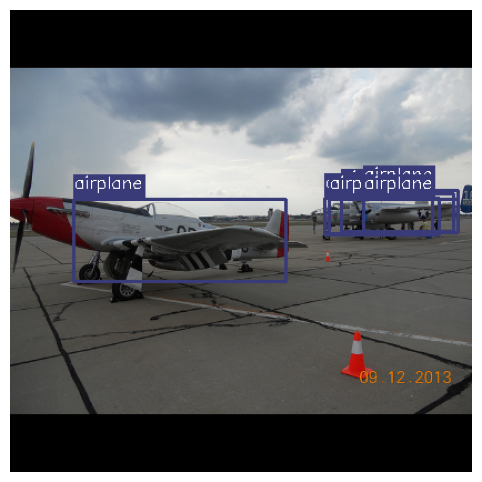

Epoch: 59


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.177]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:31<1:27:12, 14.07s/it, loss=0.174]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:38<1:08:20, 11.05s/it, loss=0.146]

batch_idx: 2


  1%|█▏                                                                                                                  | 4/374 [00:46<1:00:06,  9.75s/it, loss=0.136]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:53<53:29,  8.70s/it, loss=0.148]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [01:00<49:56,  8.14s/it, loss=0.137]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:07<46:58,  7.68s/it, loss=0.129]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:14<46:17,  7.59s/it, loss=0.121]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:21<45:09,  7.42s/it, loss=0.118]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:28<44:20,  7.31s/it, loss=0.115]

batch_idx: 9


  3%|███▍                                                                                                                  | 11/374 [01:35<43:57,  7.27s/it, loss=0.12]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:42<43:05,  7.14s/it, loss=0.114]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:49<42:48,  7.12s/it, loss=0.112]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:56<42:21,  7.06s/it, loss=0.111]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [02:03<42:21,  7.08s/it, loss=0.108]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:10<41:34,  6.97s/it, loss=0.106]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:17<42:06,  7.08s/it, loss=0.108]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:24<41:31,  7.00s/it, loss=0.106]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:31<41:26,  7.00s/it, loss=0.104]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:38<40:40,  6.89s/it, loss=0.103]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:44<40:14,  6.84s/it, loss=0.101]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:52<40:49,  6.96s/it, loss=0.101]

batch_idx: 21


  6%|███████▏                                                                                                            | 23/374 [02:58<39:56,  6.83s/it, loss=0.0996]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:06<41:39,  7.14s/it, loss=0.103]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:13<41:12,  7.08s/it, loss=0.104]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:20<40:22,  6.96s/it, loss=0.107]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:27<39:57,  6.91s/it, loss=0.106]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:34<40:16,  6.98s/it, loss=0.105]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:41<40:13,  7.00s/it, loss=0.107]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:48<40:05,  6.99s/it, loss=0.107]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:55<39:45,  6.95s/it, loss=0.108]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [04:01<39:30,  6.93s/it, loss=0.107]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:08<39:20,  6.92s/it, loss=0.106]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:16<40:04,  7.07s/it, loss=0.107]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:23<39:39,  7.02s/it, loss=0.109]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:29<39:13,  6.96s/it, loss=0.109]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:37<39:18,  7.00s/it, loss=0.109]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:44<39:18,  7.02s/it, loss=0.111]

batch_idx: 37


 10%|████████████▎                                                                                                         | 39/374 [04:51<39:12,  7.02s/it, loss=0.11]

batch_idx: 38


 11%|████████████▌                                                                                                         | 40/374 [04:58<39:14,  7.05s/it, loss=0.11]

batch_idx: 39


 11%|████████████▉                                                                                                         | 41/374 [05:05<39:21,  7.09s/it, loss=0.11]

batch_idx: 40


 11%|█████████████▎                                                                                                        | 42/374 [05:12<38:43,  7.00s/it, loss=0.11]

batch_idx: 41


 11%|█████████████▌                                                                                                        | 43/374 [05:19<38:38,  7.00s/it, loss=0.11]

batch_idx: 42


 12%|█████████████▉                                                                                                        | 44/374 [05:26<39:16,  7.14s/it, loss=0.11]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:33<39:20,  7.18s/it, loss=0.109]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:40<38:37,  7.07s/it, loss=0.109]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:47<37:56,  6.96s/it, loss=0.109]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:54<37:21,  6.88s/it, loss=0.109]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:01<37:59,  7.01s/it, loss=0.109]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:08<37:19,  6.91s/it, loss=0.109]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:14<36:42,  6.82s/it, loss=0.109]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:21<36:45,  6.85s/it, loss=0.108]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:28<36:40,  6.86s/it, loss=0.109]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:35<36:45,  6.89s/it, loss=0.109]

batch_idx: 53


 15%|█████████████████▎                                                                                                    | 55/374 [06:43<37:47,  7.11s/it, loss=0.11]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:49<36:49,  6.95s/it, loss=0.111]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:57<37:14,  7.05s/it, loss=0.111]

batch_idx: 56


 16%|██████████████████▎                                                                                                   | 58/374 [07:04<37:22,  7.10s/it, loss=0.11]

batch_idx: 57


 16%|██████████████████▌                                                                                                   | 59/374 [07:11<37:13,  7.09s/it, loss=0.11]

batch_idx: 58


 16%|██████████████████▉                                                                                                   | 60/374 [07:18<36:56,  7.06s/it, loss=0.11]

batch_idx: 59


 16%|███████████████████▏                                                                                                  | 61/374 [07:25<36:58,  7.09s/it, loss=0.11]

batch_idx: 60


 17%|███████████████████▌                                                                                                  | 62/374 [07:32<36:49,  7.08s/it, loss=0.11]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:39<36:07,  6.97s/it, loss=0.109]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:46<35:46,  6.92s/it, loss=0.109]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:53<35:54,  6.97s/it, loss=0.109]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [07:59<35:35,  6.93s/it, loss=0.109]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:07<35:48,  7.00s/it, loss=0.109]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:14<35:28,  6.96s/it, loss=0.109]

batch_idx: 67


 18%|█████████████████████▊                                                                                                | 69/374 [08:21<36:17,  7.14s/it, loss=0.11]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:28<36:02,  7.11s/it, loss=0.109]

batch_idx: 69


 19%|██████████████████████▍                                                                                               | 71/374 [08:35<36:14,  7.18s/it, loss=0.11]

batch_idx: 70


 19%|██████████████████████▋                                                                                               | 72/374 [08:43<36:24,  7.23s/it, loss=0.11]

batch_idx: 71


 20%|███████████████████████                                                                                               | 73/374 [08:50<36:09,  7.21s/it, loss=0.11]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [08:57<35:47,  7.16s/it, loss=0.109]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:04<35:20,  7.09s/it, loss=0.109]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:10<34:08,  6.88s/it, loss=0.109]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:17<34:09,  6.90s/it, loss=0.108]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:25<34:35,  7.01s/it, loss=0.109]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:32<34:53,  7.10s/it, loss=0.108]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:39<34:24,  7.02s/it, loss=0.108]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:46<34:38,  7.09s/it, loss=0.108]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:53<33:59,  6.98s/it, loss=0.108]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:00<34:23,  7.09s/it, loss=0.108]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:07<34:12,  7.08s/it, loss=0.108]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:14<34:29,  7.16s/it, loss=0.108]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:21<34:07,  7.11s/it, loss=0.109]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:29<34:43,  7.26s/it, loss=0.108]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:36<34:25,  7.22s/it, loss=0.108]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:43<34:24,  7.25s/it, loss=0.109]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [10:51<34:32,  7.30s/it, loss=0.109]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [10:58<34:11,  7.25s/it, loss=0.109]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:05<33:13,  7.07s/it, loss=0.109]

batch_idx: 91


 25%|█████████████████████████████▎                                                                                        | 93/374 [11:12<33:12,  7.09s/it, loss=0.11]

batch_idx: 92


 25%|█████████████████████████████▋                                                                                        | 94/374 [11:19<33:23,  7.16s/it, loss=0.11]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:26<32:31,  7.00s/it, loss=0.109]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:32<31:40,  6.84s/it, loss=0.109]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:40<32:31,  7.05s/it, loss=0.109]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [11:46<31:59,  6.96s/it, loss=0.109]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:53<31:51,  6.95s/it, loss=0.109]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:00<31:30,  6.90s/it, loss=0.109]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:07<31:06,  6.84s/it, loss=0.109]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:14<30:58,  6.83s/it, loss=0.109]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:21<31:42,  7.02s/it, loss=0.108]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:29<32:11,  7.15s/it, loss=0.109]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:36<32:01,  7.14s/it, loss=0.109]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:42<31:10,  6.98s/it, loss=0.109]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [12:50<31:25,  7.06s/it, loss=0.109]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [12:57<31:25,  7.09s/it, loss=0.109]

batch_idx: 107


 29%|█████████████████████████████████▊                                                                                  | 109/374 [13:04<31:12,  7.06s/it, loss=0.109]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [13:11<31:01,  7.05s/it, loss=0.109]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:18<30:47,  7.02s/it, loss=0.109]

batch_idx: 110


 30%|██████████████████████████████████▋                                                                                 | 112/374 [13:25<31:11,  7.14s/it, loss=0.108]

batch_idx: 111


 30%|███████████████████████████████████                                                                                 | 113/374 [13:33<31:28,  7.24s/it, loss=0.108]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [13:39<30:51,  7.12s/it, loss=0.108]

batch_idx: 113


 31%|███████████████████████████████████▋                                                                                | 115/374 [13:47<30:41,  7.11s/it, loss=0.108]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:53<30:10,  7.02s/it, loss=0.108]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:00<30:03,  7.02s/it, loss=0.108]

batch_idx: 116


 32%|████████████████████████████████████▌                                                                               | 118/374 [14:07<29:31,  6.92s/it, loss=0.108]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:14<29:14,  6.88s/it, loss=0.108]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:21<29:41,  7.01s/it, loss=0.108]

batch_idx: 119


 32%|█████████████████████████████████████▌                                                                              | 121/374 [14:28<29:38,  7.03s/it, loss=0.108]

batch_idx: 120


 33%|█████████████████████████████████████▊                                                                              | 122/374 [14:36<30:00,  7.15s/it, loss=0.108]

batch_idx: 121


 33%|██████████████████████████████████████▏                                                                             | 123/374 [14:43<30:07,  7.20s/it, loss=0.109]

batch_idx: 122


 33%|██████████████████████████████████████▍                                                                             | 124/374 [14:50<29:34,  7.10s/it, loss=0.108]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [14:57<29:27,  7.10s/it, loss=0.109]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:04<29:26,  7.12s/it, loss=0.109]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:12<29:49,  7.24s/it, loss=0.109]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:19<29:14,  7.13s/it, loss=0.109]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:25<28:50,  7.06s/it, loss=0.109]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:32<28:22,  6.98s/it, loss=0.109]

batch_idx: 129


 35%|████████████████████████████████████████▉                                                                            | 131/374 [15:39<28:04,  6.93s/it, loss=0.11]

batch_idx: 130


 35%|█████████████████████████████████████████▎                                                                           | 132/374 [15:46<28:27,  7.06s/it, loss=0.11]

batch_idx: 131


 36%|█████████████████████████████████████████▌                                                                           | 133/374 [15:53<28:14,  7.03s/it, loss=0.11]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:00<27:56,  6.98s/it, loss=0.109]

batch_idx: 133


 36%|█████████████████████████████████████████▊                                                                          | 135/374 [16:07<27:33,  6.92s/it, loss=0.109]

batch_idx: 134


 36%|██████████████████████████████████████████▌                                                                          | 136/374 [16:14<27:19,  6.89s/it, loss=0.11]

batch_idx: 135


 37%|██████████████████████████████████████████▍                                                                         | 137/374 [16:21<27:47,  7.04s/it, loss=0.109]

batch_idx: 136


 37%|███████████████████████████████████████████▏                                                                         | 138/374 [16:28<27:46,  7.06s/it, loss=0.11]

batch_idx: 137


 37%|███████████████████████████████████████████▍                                                                         | 139/374 [16:35<27:13,  6.95s/it, loss=0.11]

batch_idx: 138


 37%|███████████████████████████████████████████▊                                                                         | 140/374 [16:42<27:07,  6.96s/it, loss=0.11]

batch_idx: 139


 38%|████████████████████████████████████████████                                                                         | 141/374 [16:49<27:11,  7.00s/it, loss=0.11]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [16:56<27:30,  7.12s/it, loss=0.111]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:04<27:47,  7.22s/it, loss=0.111]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:11<27:16,  7.12s/it, loss=0.111]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:18<27:10,  7.12s/it, loss=0.111]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:25<26:51,  7.07s/it, loss=0.111]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:32<26:58,  7.13s/it, loss=0.111]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [17:39<26:56,  7.15s/it, loss=0.112]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [17:46<26:47,  7.15s/it, loss=0.112]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [17:53<26:27,  7.09s/it, loss=0.111]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:01<26:47,  7.21s/it, loss=0.112]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:08<26:54,  7.27s/it, loss=0.111]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:15<26:19,  7.15s/it, loss=0.111]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:22<26:11,  7.14s/it, loss=0.111]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:29<25:36,  7.02s/it, loss=0.111]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:36<25:51,  7.11s/it, loss=0.111]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [18:44<25:48,  7.13s/it, loss=0.111]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:51<26:18,  7.31s/it, loss=0.112]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [18:58<25:28,  7.11s/it, loss=0.111]

batch_idx: 158


 43%|█████████████████████████████████████████████████▋                                                                  | 160/374 [19:05<25:00,  7.01s/it, loss=0.111]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:12<25:10,  7.09s/it, loss=0.111]

batch_idx: 160


 43%|██████████████████████████████████████████████████▏                                                                 | 162/374 [19:19<25:17,  7.16s/it, loss=0.111]

batch_idx: 161


 44%|██████████████████████████████████████████████████▌                                                                 | 163/374 [19:26<25:07,  7.14s/it, loss=0.111]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:33<24:50,  7.10s/it, loss=0.111]

batch_idx: 163


 44%|███████████████████████████████████████████████████▌                                                                 | 165/374 [19:40<24:24,  7.01s/it, loss=0.11]

batch_idx: 164


 44%|███████████████████████████████████████████████████▉                                                                 | 166/374 [19:47<24:28,  7.06s/it, loss=0.11]

batch_idx: 165


 45%|████████████████████████████████████████████████████▏                                                                | 167/374 [19:54<24:09,  7.00s/it, loss=0.11]

batch_idx: 166


 45%|████████████████████████████████████████████████████▌                                                                | 168/374 [20:01<24:09,  7.04s/it, loss=0.11]

batch_idx: 167


 45%|████████████████████████████████████████████████████▍                                                               | 169/374 [20:08<23:59,  7.02s/it, loss=0.111]

batch_idx: 168


 45%|████████████████████████████████████████████████████▋                                                               | 170/374 [20:16<24:05,  7.09s/it, loss=0.111]

batch_idx: 169


 46%|█████████████████████████████████████████████████████                                                               | 171/374 [20:22<23:15,  6.87s/it, loss=0.111]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:29<22:49,  6.78s/it, loss=0.111]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▋                                                              | 173/374 [20:36<23:04,  6.89s/it, loss=0.112]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [20:43<22:54,  6.87s/it, loss=0.112]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▎                                                             | 175/374 [20:50<23:10,  6.99s/it, loss=0.112]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [20:57<23:11,  7.03s/it, loss=0.111]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [21:04<23:35,  7.19s/it, loss=0.112]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:11<23:16,  7.12s/it, loss=0.112]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:19<23:29,  7.23s/it, loss=0.112]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:26<22:57,  7.10s/it, loss=0.112]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [21:33<22:43,  7.07s/it, loss=0.112]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [21:39<22:21,  6.99s/it, loss=0.112]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [21:47<22:17,  7.00s/it, loss=0.112]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [21:54<22:39,  7.16s/it, loss=0.112]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:00<21:53,  6.95s/it, loss=0.112]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:08<21:53,  6.99s/it, loss=0.112]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:15<21:50,  7.01s/it, loss=0.112]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:21<21:33,  6.96s/it, loss=0.112]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [22:29<21:33,  6.99s/it, loss=0.112]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [22:36<21:29,  7.01s/it, loss=0.112]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [22:43<21:42,  7.11s/it, loss=0.112]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [22:50<21:37,  7.13s/it, loss=0.112]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [22:57<21:33,  7.14s/it, loss=0.112]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:05<21:35,  7.20s/it, loss=0.112]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:12<21:28,  7.20s/it, loss=0.112]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [23:19<21:15,  7.17s/it, loss=0.113]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [23:26<20:58,  7.11s/it, loss=0.112]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:33<20:58,  7.15s/it, loss=0.112]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [23:40<20:46,  7.12s/it, loss=0.112]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:47<20:27,  7.06s/it, loss=0.112]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:54<20:27,  7.06s/it, loss=0.112]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▋                                                     | 202/374 [24:09<25:11,  8.79s/it, loss=0.112]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [24:17<23:36,  8.29s/it, loss=0.112]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [24:24<22:27,  7.93s/it, loss=0.112]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [24:31<21:30,  7.64s/it, loss=0.111]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [24:38<21:19,  7.61s/it, loss=0.112]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [24:45<20:48,  7.47s/it, loss=0.111]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [24:52<20:17,  7.34s/it, loss=0.112]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:00<20:06,  7.31s/it, loss=0.112]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:07<19:42,  7.21s/it, loss=0.111]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [25:14<19:43,  7.26s/it, loss=0.111]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [25:20<18:51,  6.99s/it, loss=0.111]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [25:28<19:00,  7.08s/it, loss=0.112]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [25:34<18:39,  7.00s/it, loss=0.112]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [25:41<18:21,  6.93s/it, loss=0.112]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [25:48<18:22,  6.98s/it, loss=0.112]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [25:55<18:15,  6.98s/it, loss=0.112]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:03<18:24,  7.08s/it, loss=0.111]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:10<18:52,  7.30s/it, loss=0.112]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:17<18:26,  7.18s/it, loss=0.112]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:25<18:28,  7.24s/it, loss=0.112]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [26:32<18:23,  7.26s/it, loss=0.111]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [26:39<18:12,  7.23s/it, loss=0.111]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [26:47<18:17,  7.32s/it, loss=0.112]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [26:53<17:48,  7.17s/it, loss=0.112]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:01<17:34,  7.13s/it, loss=0.112]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:07<17:10,  7.01s/it, loss=0.112]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:14<16:47,  6.90s/it, loss=0.112]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:21<16:52,  6.98s/it, loss=0.112]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▎                                            | 230/374 [27:28<16:37,  6.92s/it, loss=0.112]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:35<16:36,  6.97s/it, loss=0.111]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [27:42<16:43,  7.07s/it, loss=0.111]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▎                                           | 233/374 [27:49<16:21,  6.96s/it, loss=0.111]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [27:56<16:15,  6.96s/it, loss=0.111]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▉                                           | 235/374 [28:03<16:02,  6.92s/it, loss=0.111]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:09<15:47,  6.87s/it, loss=0.111]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:16<15:45,  6.90s/it, loss=0.111]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 238/374 [28:24<15:55,  7.03s/it, loss=0.111]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [28:31<15:51,  7.05s/it, loss=0.111]

batch_idx: 238


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 240/374 [28:38<15:33,  6.97s/it, loss=0.111]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [28:45<15:36,  7.04s/it, loss=0.111]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [28:52<15:30,  7.05s/it, loss=0.111]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [28:59<15:12,  6.96s/it, loss=0.111]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:06<15:07,  6.98s/it, loss=0.111]

batch_idx: 243


 66%|████████████████████████████████████████████████████████████████████████████▋                                        | 245/374 [29:13<15:21,  7.14s/it, loss=0.11]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:20<15:12,  7.13s/it, loss=0.111]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [29:27<15:04,  7.12s/it, loss=0.111]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:34<14:51,  7.07s/it, loss=0.111]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▉                                       | 249/374 [29:41<14:40,  7.04s/it, loss=0.11]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [29:48<14:30,  7.02s/it, loss=0.111]

batch_idx: 249


 67%|██████████████████████████████████████████████████████████████████████████████▌                                      | 251/374 [29:55<14:25,  7.04s/it, loss=0.11]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▊                                      | 252/374 [30:03<14:30,  7.14s/it, loss=0.11]

batch_idx: 251


 68%|███████████████████████████████████████████████████████████████████████████████▏                                     | 253/374 [30:09<14:05,  6.99s/it, loss=0.11]

batch_idx: 252


 68%|███████████████████████████████████████████████████████████████████████████████▍                                     | 254/374 [30:17<14:07,  7.06s/it, loss=0.11]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████▊                                     | 255/374 [30:23<13:51,  6.99s/it, loss=0.11]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [30:30<13:29,  6.86s/it, loss=0.111]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [30:37<13:17,  6.81s/it, loss=0.111]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [30:44<13:09,  6.80s/it, loss=0.111]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [30:50<13:05,  6.83s/it, loss=0.111]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [30:57<12:53,  6.79s/it, loss=0.111]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:04<12:40,  6.73s/it, loss=0.111]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:11<12:50,  6.88s/it, loss=0.111]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:18<12:58,  7.01s/it, loss=0.111]

batch_idx: 262


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                  | 264/374 [31:25<12:45,  6.96s/it, loss=0.11]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 265/374 [31:32<12:48,  7.05s/it, loss=0.11]

batch_idx: 264


 71%|███████████████████████████████████████████████████████████████████████████████████▏                                 | 266/374 [31:40<12:49,  7.12s/it, loss=0.11]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [31:47<12:34,  7.05s/it, loss=0.111]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [31:54<12:29,  7.07s/it, loss=0.111]

batch_idx: 267


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 269/374 [32:01<12:25,  7.10s/it, loss=0.11]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:09<12:46,  7.37s/it, loss=0.111]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:16<12:33,  7.31s/it, loss=0.111]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [32:23<12:22,  7.28s/it, loss=0.111]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [32:31<12:19,  7.32s/it, loss=0.111]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [32:37<11:58,  7.19s/it, loss=0.111]

batch_idx: 273


 74%|██████████████████████████████████████████████████████████████████████████████████████                               | 275/374 [32:45<11:47,  7.15s/it, loss=0.11]

batch_idx: 274


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                              | 276/374 [32:52<11:41,  7.15s/it, loss=0.11]

batch_idx: 275


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 277/374 [32:58<11:09,  6.90s/it, loss=0.11]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▉                              | 278/374 [33:05<11:04,  6.92s/it, loss=0.11]

batch_idx: 277


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                             | 279/374 [33:12<10:57,  6.92s/it, loss=0.11]

batch_idx: 278


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 280/374 [33:19<10:55,  6.97s/it, loss=0.11]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▉                             | 281/374 [33:26<10:56,  7.06s/it, loss=0.11]

batch_idx: 280


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 282/374 [33:33<10:39,  6.95s/it, loss=0.11]

batch_idx: 281


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                            | 283/374 [33:40<10:43,  7.07s/it, loss=0.11]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 284/374 [33:47<10:29,  7.00s/it, loss=0.11]

batch_idx: 283


 76%|█████████████████████████████████████████████████████████████████████████████████████████▏                           | 285/374 [33:54<10:18,  6.95s/it, loss=0.11]

batch_idx: 284


 76%|█████████████████████████████████████████████████████████████████████████████████████████▍                           | 286/374 [34:01<10:15,  6.99s/it, loss=0.11]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                           | 287/374 [34:08<09:57,  6.87s/it, loss=0.11]

batch_idx: 286


 77%|██████████████████████████████████████████████████████████████████████████████████████████                           | 288/374 [34:15<10:02,  7.00s/it, loss=0.11]

batch_idx: 287


 77%|██████████████████████████████████████████████████████████████████████████████████████████▍                          | 289/374 [34:22<09:50,  6.95s/it, loss=0.11]

batch_idx: 288


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                          | 290/374 [34:29<09:54,  7.07s/it, loss=0.11]

batch_idx: 289


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 291/374 [34:35<09:22,  6.77s/it, loss=0.11]

batch_idx: 290


 78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 292/374 [34:42<09:13,  6.75s/it, loss=0.11]

batch_idx: 291


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 293/374 [34:49<09:03,  6.71s/it, loss=0.11]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                         | 294/374 [34:55<08:57,  6.72s/it, loss=0.11]

batch_idx: 293


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 295/374 [35:11<12:12,  9.27s/it, loss=0.11]

batch_idx: 294


 79%|████████████████████████████████████████████████████████████████████████████████████████████▌                        | 296/374 [35:17<11:07,  8.56s/it, loss=0.11]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████▉                        | 297/374 [35:24<10:22,  8.09s/it, loss=0.11]

batch_idx: 296


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 298/374 [35:31<09:47,  7.73s/it, loss=0.11]

batch_idx: 297


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 299/374 [35:38<09:18,  7.45s/it, loss=0.11]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▊                       | 300/374 [35:45<09:09,  7.43s/it, loss=0.11]

batch_idx: 299


 80%|██████████████████████████████████████████████████████████████████████████████████████████████▏                      | 301/374 [35:52<08:52,  7.30s/it, loss=0.11]

batch_idx: 300


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                      | 302/374 [35:59<08:34,  7.15s/it, loss=0.11]

batch_idx: 301


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 303/374 [36:06<08:13,  6.96s/it, loss=0.11]

batch_idx: 302


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 304/374 [36:13<08:02,  6.90s/it, loss=0.11]

batch_idx: 303


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 305/374 [36:20<08:07,  7.07s/it, loss=0.11]

batch_idx: 304


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 306/374 [36:27<08:05,  7.14s/it, loss=0.11]

batch_idx: 305


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 307/374 [36:34<07:49,  7.00s/it, loss=0.11]

batch_idx: 306


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 308/374 [36:41<07:42,  7.01s/it, loss=0.11]

batch_idx: 307


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 309/374 [36:48<07:37,  7.04s/it, loss=0.11]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 310/374 [36:55<07:26,  6.98s/it, loss=0.11]

batch_idx: 309


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 311/374 [37:02<07:25,  7.06s/it, loss=0.11]

batch_idx: 310


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 312/374 [37:09<07:14,  7.00s/it, loss=0.11]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 313/374 [37:16<07:11,  7.08s/it, loss=0.11]

batch_idx: 312


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 314/374 [37:24<07:15,  7.27s/it, loss=0.11]

batch_idx: 313


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 315/374 [37:31<07:11,  7.32s/it, loss=0.11]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 316/374 [37:39<07:05,  7.33s/it, loss=0.11]

batch_idx: 315


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 317/374 [37:46<06:52,  7.24s/it, loss=0.11]

batch_idx: 316


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 318/374 [37:53<06:41,  7.16s/it, loss=0.11]

batch_idx: 317


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 319/374 [38:00<06:33,  7.16s/it, loss=0.11]

batch_idx: 318


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████                 | 320/374 [38:07<06:28,  7.20s/it, loss=0.11]

batch_idx: 319


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 321/374 [38:14<06:18,  7.15s/it, loss=0.11]

batch_idx: 320


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 322/374 [38:22<06:12,  7.16s/it, loss=0.11]

batch_idx: 321


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 323/374 [38:28<06:02,  7.11s/it, loss=0.11]

batch_idx: 322


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 324/374 [38:36<05:57,  7.15s/it, loss=0.11]

batch_idx: 323


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 325/374 [38:43<05:45,  7.05s/it, loss=0.11]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 326/374 [38:50<05:40,  7.09s/it, loss=0.11]

batch_idx: 325


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 327/374 [38:57<05:29,  7.02s/it, loss=0.11]

batch_idx: 326


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 328/374 [39:04<05:21,  7.00s/it, loss=0.11]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 329/374 [39:11<05:17,  7.06s/it, loss=0.11]

batch_idx: 328


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 330/374 [39:17<05:05,  6.94s/it, loss=0.11]

batch_idx: 329


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 331/374 [39:24<04:56,  6.90s/it, loss=0.11]

batch_idx: 330


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 332/374 [39:31<04:46,  6.82s/it, loss=0.11]

batch_idx: 331


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 333/374 [39:38<04:42,  6.89s/it, loss=0.11]

batch_idx: 332


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 334/374 [39:45<04:34,  6.86s/it, loss=0.11]

batch_idx: 333


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 335/374 [39:52<04:34,  7.05s/it, loss=0.11]

batch_idx: 334


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 336/374 [39:59<04:27,  7.05s/it, loss=0.11]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:06<04:18,  6.99s/it, loss=0.109]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:13<04:16,  7.12s/it, loss=0.109]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:21<04:10,  7.17s/it, loss=0.109]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [40:27<03:58,  7.02s/it, loss=0.109]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:35<03:58,  7.22s/it, loss=0.109]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [40:42<03:49,  7.17s/it, loss=0.109]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:49<03:41,  7.16s/it, loss=0.109]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [40:57<03:36,  7.20s/it, loss=0.109]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 345/374 [41:04<03:26,  7.13s/it, loss=0.11]

batch_idx: 344


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 346/374 [41:11<03:19,  7.12s/it, loss=0.11]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:18<03:12,  7.14s/it, loss=0.109]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:25<03:04,  7.09s/it, loss=0.109]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:32<02:58,  7.16s/it, loss=0.109]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:40<02:54,  7.28s/it, loss=0.109]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [41:46<02:41,  7.02s/it, loss=0.109]

batch_idx: 350


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 352/374 [41:53<02:36,  7.09s/it, loss=0.11]

batch_idx: 351


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:00<02:29,  7.10s/it, loss=0.11]

batch_idx: 352


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 354/374 [42:08<02:24,  7.21s/it, loss=0.11]

batch_idx: 353


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [42:15<02:15,  7.14s/it, loss=0.11]

batch_idx: 354


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 356/374 [42:22<02:06,  7.02s/it, loss=0.11]

batch_idx: 355


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [42:28<01:58,  6.95s/it, loss=0.11]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 358/374 [42:36<01:51,  6.98s/it, loss=0.11]

batch_idx: 357


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [42:43<01:46,  7.09s/it, loss=0.11]

batch_idx: 358


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 360/374 [42:49<01:36,  6.86s/it, loss=0.11]

batch_idx: 359


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [42:56<01:27,  6.76s/it, loss=0.11]

batch_idx: 360


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 362/374 [43:04<01:25,  7.11s/it, loss=0.11]

batch_idx: 361


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:11<01:18,  7.15s/it, loss=0.11]

batch_idx: 362


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 364/374 [43:18<01:10,  7.08s/it, loss=0.11]

batch_idx: 363


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:25<01:04,  7.16s/it, loss=0.11]

batch_idx: 364


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 366/374 [43:32<00:57,  7.20s/it, loss=0.11]

batch_idx: 365


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:40<00:50,  7.18s/it, loss=0.11]

batch_idx: 366


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 368/374 [43:47<00:42,  7.11s/it, loss=0.11]

batch_idx: 367


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:54<00:35,  7.18s/it, loss=0.11]

batch_idx: 368


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 370/374 [44:01<00:28,  7.10s/it, loss=0.11]

batch_idx: 369


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:08<00:21,  7.05s/it, loss=0.11]

batch_idx: 370


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 372/374 [44:15<00:14,  7.13s/it, loss=0.11]

batch_idx: 371


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:23<00:07,  7.27s/it, loss=0.11]

batch_idx: 372


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:25<00:00,  7.13s/it, loss=0.11]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


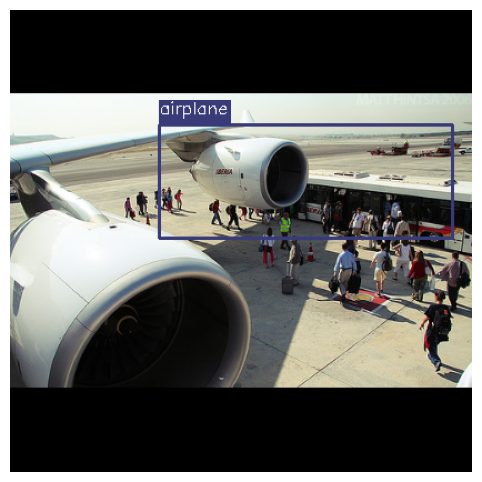

Epoch: 60


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.075]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                   | 1/374 [00:20<2:07:09, 20.45s/it, loss=0.075]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:35<1:03:36, 10.29s/it, loss=0.102]

batch_idx: 2


  1%|█▎                                                                                                                   | 4/374 [00:42<55:27,  8.99s/it, loss=0.0931]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:48<49:49,  8.10s/it, loss=0.106]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [00:56<48:29,  7.91s/it, loss=0.102]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:03<46:57,  7.68s/it, loss=0.106]

batch_idx: 6


  2%|██▌                                                                                                                    | 8/374 [01:10<46:09,  7.57s/it, loss=0.12]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:17<44:50,  7.37s/it, loss=0.118]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:24<43:42,  7.20s/it, loss=0.112]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:31<43:28,  7.19s/it, loss=0.109]

batch_idx: 10


  3%|███▊                                                                                                                 | 12/374 [01:38<43:28,  7.21s/it, loss=0.111]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:46<43:46,  7.27s/it, loss=0.116]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:52<41:49,  6.97s/it, loss=0.111]

batch_idx: 13


  4%|████▋                                                                                                                 | 15/374 [01:59<41:52,  7.00s/it, loss=0.11]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:06<41:27,  6.95s/it, loss=0.112]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:13<40:39,  6.83s/it, loss=0.113]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:20<41:22,  6.97s/it, loss=0.111]

batch_idx: 17


  5%|█████▉                                                                                                               | 19/374 [02:27<41:19,  6.99s/it, loss=0.109]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:34<41:34,  7.05s/it, loss=0.111]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:41<41:52,  7.12s/it, loss=0.111]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:49<41:44,  7.11s/it, loss=0.109]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:56<41:39,  7.12s/it, loss=0.109]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [03:02<40:18,  6.91s/it, loss=0.111]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:09<40:23,  6.94s/it, loss=0.111]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:16<41:02,  7.08s/it, loss=0.111]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:23<40:34,  7.02s/it, loss=0.113]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:31<41:04,  7.12s/it, loss=0.115]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:37<40:18,  7.01s/it, loss=0.117]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:45<40:20,  7.04s/it, loss=0.118]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:52<40:15,  7.04s/it, loss=0.118]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:59<40:25,  7.09s/it, loss=0.118]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:06<40:12,  7.08s/it, loss=0.117]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:13<40:06,  7.08s/it, loss=0.117]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:20<40:22,  7.15s/it, loss=0.116]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:27<40:04,  7.11s/it, loss=0.115]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:34<40:03,  7.13s/it, loss=0.114]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:41<39:24,  7.04s/it, loss=0.113]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:49<40:32,  7.26s/it, loss=0.115]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:56<40:39,  7.30s/it, loss=0.114]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:03<39:41,  7.15s/it, loss=0.113]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:10<39:09,  7.08s/it, loss=0.113]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:17<38:55,  7.06s/it, loss=0.114]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:24<38:30,  7.00s/it, loss=0.113]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:31<38:11,  6.97s/it, loss=0.114]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:39<39:24,  7.21s/it, loss=0.113]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:46<39:21,  7.22s/it, loss=0.112]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:53<38:17,  7.05s/it, loss=0.112]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:00<38:04,  7.03s/it, loss=0.111]

batch_idx: 48


 13%|███████████████▊                                                                                                      | 50/374 [06:07<37:50,  7.01s/it, loss=0.11]

batch_idx: 49


 14%|████████████████                                                                                                      | 51/374 [06:14<37:50,  7.03s/it, loss=0.11]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:21<38:00,  7.08s/it, loss=0.109]

batch_idx: 51


 14%|████████████████▋                                                                                                     | 53/374 [06:28<38:05,  7.12s/it, loss=0.11]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:35<37:07,  6.96s/it, loss=0.112]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:42<38:08,  7.17s/it, loss=0.111]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:49<37:31,  7.08s/it, loss=0.111]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:56<36:57,  7.00s/it, loss=0.112]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:03<37:18,  7.08s/it, loss=0.111]

batch_idx: 57


 16%|██████████████████▌                                                                                                   | 59/374 [07:10<37:02,  7.05s/it, loss=0.11]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:17<37:09,  7.10s/it, loss=0.111]

batch_idx: 59


 16%|███████████████████▏                                                                                                  | 61/374 [07:24<36:41,  7.03s/it, loss=0.11]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:32<36:52,  7.09s/it, loss=0.111]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:39<36:51,  7.11s/it, loss=0.111]

batch_idx: 62


 17%|████████████████████▏                                                                                                 | 64/374 [07:46<36:28,  7.06s/it, loss=0.11]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:53<37:15,  7.23s/it, loss=0.111]

batch_idx: 64


 18%|████████████████████▊                                                                                                 | 66/374 [08:01<37:23,  7.28s/it, loss=0.11]

batch_idx: 65


 18%|█████████████████████▏                                                                                                | 67/374 [08:08<37:01,  7.24s/it, loss=0.11]

batch_idx: 66


 18%|█████████████████████▍                                                                                                | 68/374 [08:15<36:12,  7.10s/it, loss=0.11]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:22<36:25,  7.17s/it, loss=0.111]

batch_idx: 68


 19%|██████████████████████                                                                                                | 70/374 [08:29<36:08,  7.13s/it, loss=0.11]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:36<35:29,  7.03s/it, loss=0.111]

batch_idx: 70


 19%|██████████████████████▋                                                                                               | 72/374 [08:43<35:03,  6.96s/it, loss=0.11]

batch_idx: 71


 20%|███████████████████████                                                                                               | 73/374 [08:49<34:42,  6.92s/it, loss=0.11]

batch_idx: 72


 20%|███████████████████████▎                                                                                              | 74/374 [08:57<35:09,  7.03s/it, loss=0.11]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [09:04<35:45,  7.18s/it, loss=0.109]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:11<35:43,  7.19s/it, loss=0.109]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:18<34:57,  7.06s/it, loss=0.109]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:25<34:48,  7.05s/it, loss=0.108]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:32<34:59,  7.12s/it, loss=0.109]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:40<35:06,  7.17s/it, loss=0.108]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:47<34:27,  7.06s/it, loss=0.108]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:53<34:01,  6.99s/it, loss=0.109]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [10:01<35:16,  7.27s/it, loss=0.109]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:08<34:22,  7.11s/it, loss=0.109]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:15<33:48,  7.02s/it, loss=0.109]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:22<34:15,  7.14s/it, loss=0.109]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:29<33:46,  7.06s/it, loss=0.109]

batch_idx: 86


 24%|███████████████████████████▌                                                                                         | 88/374 [10:37<34:19,  7.20s/it, loss=0.109]

batch_idx: 87


 24%|███████████████████████████▊                                                                                         | 89/374 [10:43<33:21,  7.02s/it, loss=0.109]

batch_idx: 88


 24%|████████████████████████████▏                                                                                        | 90/374 [10:51<33:39,  7.11s/it, loss=0.109]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [10:58<33:31,  7.11s/it, loss=0.109]

batch_idx: 90


 25%|█████████████████████████████                                                                                         | 92/374 [11:05<33:28,  7.12s/it, loss=0.11]

batch_idx: 91


 25%|█████████████████████████████                                                                                        | 93/374 [11:12<33:15,  7.10s/it, loss=0.109]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:19<33:15,  7.13s/it, loss=0.109]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:26<33:22,  7.18s/it, loss=0.109]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [11:33<32:54,  7.10s/it, loss=0.109]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [11:40<32:28,  7.03s/it, loss=0.109]

batch_idx: 96


 26%|██████████████████████████████▋                                                                                      | 98/374 [11:47<32:10,  6.99s/it, loss=0.109]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:54<32:09,  7.02s/it, loss=0.109]

batch_idx: 98


 27%|███████████████████████████████                                                                                     | 100/374 [12:01<32:01,  7.01s/it, loss=0.109]

batch_idx: 99


 27%|███████████████████████████████▎                                                                                    | 101/374 [12:08<31:48,  6.99s/it, loss=0.109]

batch_idx: 100


 27%|███████████████████████████████▋                                                                                    | 102/374 [12:16<32:17,  7.12s/it, loss=0.109]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:22<31:48,  7.04s/it, loss=0.109]

batch_idx: 102


 28%|████████████████████████████████▎                                                                                   | 104/374 [12:29<31:20,  6.96s/it, loss=0.108]

batch_idx: 103


 28%|████████████████████████████████▌                                                                                   | 105/374 [12:36<31:26,  7.01s/it, loss=0.109]

batch_idx: 104


 28%|████████████████████████████████▉                                                                                   | 106/374 [12:43<31:21,  7.02s/it, loss=0.109]

batch_idx: 105


 29%|█████████████████████████████████▏                                                                                  | 107/374 [12:51<31:30,  7.08s/it, loss=0.109]

batch_idx: 106


 29%|█████████████████████████████████▍                                                                                  | 108/374 [12:58<31:40,  7.15s/it, loss=0.109]

batch_idx: 107


 29%|██████████████████████████████████                                                                                   | 109/374 [13:05<31:21,  7.10s/it, loss=0.11]

batch_idx: 108


 29%|██████████████████████████████████▍                                                                                  | 110/374 [13:12<31:04,  7.06s/it, loss=0.11]

batch_idx: 109


 30%|██████████████████████████████████▋                                                                                  | 111/374 [13:18<30:19,  6.92s/it, loss=0.11]

batch_idx: 110


 30%|███████████████████████████████████                                                                                  | 112/374 [13:25<30:02,  6.88s/it, loss=0.11]

batch_idx: 111


 30%|███████████████████████████████████▎                                                                                 | 113/374 [13:32<30:08,  6.93s/it, loss=0.11]

batch_idx: 112


 30%|███████████████████████████████████▋                                                                                 | 114/374 [13:39<29:46,  6.87s/it, loss=0.11]

batch_idx: 113


 31%|███████████████████████████████████▉                                                                                 | 115/374 [13:45<29:02,  6.73s/it, loss=0.11]

batch_idx: 114


 31%|████████████████████████████████████▎                                                                                | 116/374 [13:52<29:12,  6.79s/it, loss=0.11]

batch_idx: 115


 31%|████████████████████████████████████▌                                                                                | 117/374 [13:59<29:23,  6.86s/it, loss=0.11]

batch_idx: 116


 32%|████████████████████████████████████▉                                                                                | 118/374 [14:07<29:53,  7.01s/it, loss=0.11]

batch_idx: 117


 32%|█████████████████████████████████████▏                                                                               | 119/374 [14:14<29:46,  7.01s/it, loss=0.11]

batch_idx: 118


 32%|█████████████████████████████████████▌                                                                               | 120/374 [14:21<29:41,  7.01s/it, loss=0.11]

batch_idx: 119


 32%|█████████████████████████████████████▊                                                                               | 121/374 [14:28<29:38,  7.03s/it, loss=0.11]

batch_idx: 120


 33%|██████████████████████████████████████▏                                                                              | 122/374 [14:35<29:37,  7.05s/it, loss=0.11]

batch_idx: 121


 33%|██████████████████████████████████████▍                                                                              | 123/374 [14:42<29:38,  7.09s/it, loss=0.11]

batch_idx: 122


 33%|██████████████████████████████████████▊                                                                              | 124/374 [14:49<29:03,  6.98s/it, loss=0.11]

batch_idx: 123


 33%|███████████████████████████████████████                                                                              | 125/374 [14:56<29:26,  7.09s/it, loss=0.11]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [15:04<29:41,  7.18s/it, loss=0.109]

batch_idx: 125


 34%|███████████████████████████████████████▍                                                                            | 127/374 [15:11<29:52,  7.26s/it, loss=0.109]

batch_idx: 126


 34%|███████████████████████████████████████▋                                                                            | 128/374 [15:18<29:34,  7.21s/it, loss=0.109]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:25<28:57,  7.09s/it, loss=0.109]

batch_idx: 128


 35%|████████████████████████████████████████▎                                                                           | 130/374 [15:32<28:29,  7.01s/it, loss=0.109]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:39<28:20,  7.00s/it, loss=0.109]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [15:46<28:46,  7.13s/it, loss=0.109]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [15:53<28:33,  7.11s/it, loss=0.109]

batch_idx: 132


 36%|█████████████████████████████████████████▌                                                                          | 134/374 [16:00<28:26,  7.11s/it, loss=0.109]

batch_idx: 133


 36%|██████████████████████████████████████████▏                                                                          | 135/374 [16:07<28:01,  7.04s/it, loss=0.11]

batch_idx: 134


 36%|██████████████████████████████████████████▌                                                                          | 136/374 [16:15<28:33,  7.20s/it, loss=0.11]

batch_idx: 135


 37%|██████████████████████████████████████████▊                                                                          | 137/374 [16:22<28:25,  7.20s/it, loss=0.11]

batch_idx: 136


 37%|███████████████████████████████████████████▏                                                                         | 138/374 [16:29<28:20,  7.20s/it, loss=0.11]

batch_idx: 137


 37%|███████████████████████████████████████████▍                                                                         | 139/374 [16:36<28:09,  7.19s/it, loss=0.11]

batch_idx: 138


 37%|███████████████████████████████████████████▍                                                                        | 140/374 [16:44<28:08,  7.22s/it, loss=0.109]

batch_idx: 139


 38%|███████████████████████████████████████████▋                                                                        | 141/374 [16:51<27:49,  7.17s/it, loss=0.109]

batch_idx: 140


 38%|████████████████████████████████████████████                                                                        | 142/374 [16:58<28:24,  7.35s/it, loss=0.109]

batch_idx: 141


 38%|████████████████████████████████████████████▎                                                                       | 143/374 [17:06<28:11,  7.32s/it, loss=0.109]

batch_idx: 142


 39%|█████████████████████████████████████████████                                                                        | 144/374 [17:13<28:00,  7.31s/it, loss=0.11]

batch_idx: 143


 39%|█████████████████████████████████████████████▎                                                                       | 145/374 [17:20<27:17,  7.15s/it, loss=0.11]

batch_idx: 144


 39%|█████████████████████████████████████████████▋                                                                       | 146/374 [17:27<27:15,  7.17s/it, loss=0.11]

batch_idx: 145


 39%|█████████████████████████████████████████████▌                                                                      | 147/374 [17:34<27:30,  7.27s/it, loss=0.111]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [17:41<27:01,  7.18s/it, loss=0.111]

batch_idx: 147


 40%|██████████████████████████████████████████████▏                                                                     | 149/374 [17:48<26:32,  7.08s/it, loss=0.111]

batch_idx: 148


 40%|██████████████████████████████████████████████▌                                                                     | 150/374 [17:55<26:00,  6.97s/it, loss=0.111]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:02<26:05,  7.02s/it, loss=0.111]

batch_idx: 150


 41%|███████████████████████████████████████████████▏                                                                    | 152/374 [18:09<25:52,  6.99s/it, loss=0.111]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:16<25:45,  7.00s/it, loss=0.111]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:23<25:59,  7.09s/it, loss=0.111]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [18:30<25:51,  7.08s/it, loss=0.111]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:37<25:40,  7.07s/it, loss=0.111]

batch_idx: 155


 42%|████████████████████████████████████████████████▋                                                                   | 157/374 [18:44<25:11,  6.97s/it, loss=0.111]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:51<25:17,  7.02s/it, loss=0.111]

batch_idx: 157


 43%|█████████████████████████████████████████████████▋                                                                   | 159/374 [18:59<25:23,  7.08s/it, loss=0.11]

batch_idx: 158


 43%|██████████████████████████████████████████████████                                                                   | 160/374 [19:06<25:38,  7.19s/it, loss=0.11]

batch_idx: 159


 43%|██████████████████████████████████████████████████▎                                                                  | 161/374 [19:13<25:45,  7.26s/it, loss=0.11]

batch_idx: 160


 43%|██████████████████████████████████████████████████▋                                                                  | 162/374 [19:20<25:12,  7.13s/it, loss=0.11]

batch_idx: 161


 44%|██████████████████████████████████████████████████▉                                                                  | 163/374 [19:27<25:06,  7.14s/it, loss=0.11]

batch_idx: 162


 44%|██████████████████████████████████████████████████▊                                                                 | 164/374 [19:35<25:43,  7.35s/it, loss=0.111]

batch_idx: 163


 44%|███████████████████████████████████████████████████▌                                                                 | 165/374 [19:43<25:35,  7.35s/it, loss=0.11]

batch_idx: 164


 44%|███████████████████████████████████████████████████▉                                                                 | 166/374 [19:50<25:16,  7.29s/it, loss=0.11]

batch_idx: 165


 45%|███████████████████████████████████████████████████▊                                                                | 167/374 [19:57<25:30,  7.39s/it, loss=0.111]

batch_idx: 166


 45%|████████████████████████████████████████████████████▌                                                                | 168/374 [20:05<25:15,  7.36s/it, loss=0.11]

batch_idx: 167


 45%|████████████████████████████████████████████████████▊                                                                | 169/374 [20:12<25:08,  7.36s/it, loss=0.11]

batch_idx: 168


 45%|█████████████████████████████████████████████████████▏                                                               | 170/374 [20:19<24:46,  7.28s/it, loss=0.11]

batch_idx: 169


 46%|█████████████████████████████████████████████████████▍                                                               | 171/374 [20:26<24:33,  7.26s/it, loss=0.11]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▊                                                               | 172/374 [20:33<24:02,  7.14s/it, loss=0.11]

batch_idx: 171


 46%|██████████████████████████████████████████████████████                                                               | 173/374 [20:40<23:52,  7.13s/it, loss=0.11]

batch_idx: 172


 47%|██████████████████████████████████████████████████████▍                                                              | 174/374 [20:48<24:03,  7.22s/it, loss=0.11]

batch_idx: 173


 47%|██████████████████████████████████████████████████████▋                                                              | 175/374 [20:54<23:04,  6.96s/it, loss=0.11]

batch_idx: 174


 47%|███████████████████████████████████████████████████████                                                              | 176/374 [21:01<23:10,  7.02s/it, loss=0.11]

batch_idx: 175


 47%|███████████████████████████████████████████████████████▎                                                             | 177/374 [21:09<23:16,  7.09s/it, loss=0.11]

batch_idx: 176


 48%|███████████████████████████████████████████████████████▏                                                            | 178/374 [21:16<23:04,  7.06s/it, loss=0.109]

batch_idx: 177


 48%|███████████████████████████████████████████████████████▌                                                            | 179/374 [21:22<22:52,  7.04s/it, loss=0.109]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▊                                                            | 180/374 [21:30<22:52,  7.07s/it, loss=0.109]

batch_idx: 179


 48%|████████████████████████████████████████████████████████▏                                                           | 181/374 [21:37<23:07,  7.19s/it, loss=0.109]

batch_idx: 180


 49%|████████████████████████████████████████████████████████▍                                                           | 182/374 [21:44<22:57,  7.17s/it, loss=0.109]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▊                                                           | 183/374 [21:52<22:57,  7.21s/it, loss=0.109]

batch_idx: 182


 49%|█████████████████████████████████████████████████████████                                                           | 184/374 [21:59<22:49,  7.21s/it, loss=0.109]

batch_idx: 183


 49%|█████████████████████████████████████████████████████████▍                                                          | 185/374 [22:06<23:00,  7.30s/it, loss=0.109]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▋                                                          | 186/374 [22:14<22:55,  7.31s/it, loss=0.109]

batch_idx: 185


 50%|██████████████████████████████████████████████████████████                                                          | 187/374 [22:21<22:40,  7.27s/it, loss=0.109]

batch_idx: 186


 50%|██████████████████████████████████████████████████████████▎                                                         | 188/374 [22:28<22:28,  7.25s/it, loss=0.109]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████▌                                                         | 189/374 [22:35<22:26,  7.28s/it, loss=0.109]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▉                                                         | 190/374 [22:42<22:06,  7.21s/it, loss=0.109]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [22:50<22:01,  7.22s/it, loss=0.109]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████▌                                                        | 192/374 [22:57<21:40,  7.15s/it, loss=0.109]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [23:03<21:11,  7.03s/it, loss=0.109]

batch_idx: 192


 52%|████████████████████████████████████████████████████████████▏                                                       | 194/374 [23:10<21:03,  7.02s/it, loss=0.109]

batch_idx: 193


 52%|████████████████████████████████████████████████████████████▍                                                       | 195/374 [23:18<21:07,  7.08s/it, loss=0.109]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▊                                                       | 196/374 [23:25<20:52,  7.04s/it, loss=0.109]

batch_idx: 195


 53%|█████████████████████████████████████████████████████████████                                                       | 197/374 [23:31<20:36,  6.99s/it, loss=0.108]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:39<21:05,  7.19s/it, loss=0.108]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▋                                                      | 199/374 [23:46<20:35,  7.06s/it, loss=0.108]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:53<20:34,  7.09s/it, loss=0.108]

batch_idx: 199


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [24:00<20:34,  7.09s/it, loss=0.108]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████▎                                                     | 201/374 [24:16<34:25, 11.94s/it, loss=0.108]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▉                                                     | 203/374 [24:31<27:19,  9.59s/it, loss=0.108]

batch_idx: 202


 55%|███████████████████████████████████████████████████████████████▎                                                    | 204/374 [24:39<25:51,  9.13s/it, loss=0.108]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████▌                                                    | 205/374 [24:46<24:08,  8.57s/it, loss=0.107]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [24:53<22:44,  8.12s/it, loss=0.107]

batch_idx: 205


 55%|████████████████████████████████████████████████████████████████▏                                                   | 207/374 [25:00<21:43,  7.81s/it, loss=0.108]

batch_idx: 206


 56%|████████████████████████████████████████████████████████████████▌                                                   | 208/374 [25:07<20:46,  7.51s/it, loss=0.108]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:14<20:02,  7.29s/it, loss=0.108]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:21<19:53,  7.28s/it, loss=0.108]

batch_idx: 209


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 211/374 [25:28<19:21,  7.12s/it, loss=0.108]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▊                                                  | 212/374 [25:35<19:09,  7.10s/it, loss=0.108]

batch_idx: 211


 57%|██████████████████████████████████████████████████████████████████                                                  | 213/374 [25:42<18:59,  7.08s/it, loss=0.108]

batch_idx: 212


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 214/374 [25:49<18:51,  7.07s/it, loss=0.108]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████▋                                                 | 215/374 [25:57<19:06,  7.21s/it, loss=0.108]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [26:04<19:01,  7.22s/it, loss=0.108]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:11<18:36,  7.11s/it, loss=0.109]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████▌                                                | 218/374 [26:17<18:15,  7.02s/it, loss=0.109]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▉                                                | 219/374 [26:25<18:09,  7.03s/it, loss=0.109]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:32<18:01,  7.02s/it, loss=0.109]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:39<18:09,  7.12s/it, loss=0.109]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [26:46<18:20,  7.24s/it, loss=0.109]

batch_idx: 221


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 223/374 [26:54<18:22,  7.30s/it, loss=0.109]

batch_idx: 222


 60%|█████████████████████████████████████████████████████████████████████▍                                              | 224/374 [27:01<17:58,  7.19s/it, loss=0.109]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [27:08<17:41,  7.13s/it, loss=0.109]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [27:14<17:14,  6.99s/it, loss=0.109]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                             | 227/374 [27:22<17:29,  7.14s/it, loss=0.109]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:29<17:15,  7.09s/it, loss=0.109]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████▋                                             | 229/374 [27:36<17:01,  7.05s/it, loss=0.11]

batch_idx: 228


 61%|███████████████████████████████████████████████████████████████████████▉                                             | 230/374 [27:43<16:54,  7.05s/it, loss=0.11]

batch_idx: 229


 62%|████████████████████████████████████████████████████████████████████████▎                                            | 231/374 [27:50<17:06,  7.18s/it, loss=0.11]

batch_idx: 230


 62%|████████████████████████████████████████████████████████████████████████▌                                            | 232/374 [27:57<16:42,  7.06s/it, loss=0.11]

batch_idx: 231


 62%|████████████████████████████████████████████████████████████████████████▉                                            | 233/374 [28:05<16:58,  7.23s/it, loss=0.11]

batch_idx: 232


 63%|█████████████████████████████████████████████████████████████████████████▏                                           | 234/374 [28:12<16:46,  7.19s/it, loss=0.11]

batch_idx: 233


 63%|█████████████████████████████████████████████████████████████████████████▌                                           | 235/374 [28:19<16:34,  7.15s/it, loss=0.11]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▊                                           | 236/374 [28:26<16:19,  7.10s/it, loss=0.11]

batch_idx: 235


 63%|██████████████████████████████████████████████████████████████████████████▏                                          | 237/374 [28:33<16:14,  7.11s/it, loss=0.11]

batch_idx: 236


 64%|██████████████████████████████████████████████████████████████████████████▍                                          | 238/374 [28:40<16:07,  7.12s/it, loss=0.11]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▊                                          | 239/374 [28:48<16:20,  7.26s/it, loss=0.11]

batch_idx: 238


 64%|███████████████████████████████████████████████████████████████████████████                                          | 240/374 [28:55<16:17,  7.29s/it, loss=0.11]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 241/374 [29:02<15:47,  7.13s/it, loss=0.109]

batch_idx: 240


 65%|███████████████████████████████████████████████████████████████████████████                                         | 242/374 [29:09<15:41,  7.14s/it, loss=0.109]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:16<15:34,  7.13s/it, loss=0.109]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:24<15:39,  7.23s/it, loss=0.109]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▉                                        | 245/374 [29:30<15:14,  7.09s/it, loss=0.109]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:37<15:03,  7.06s/it, loss=0.109]

batch_idx: 245


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 247/374 [29:45<15:02,  7.11s/it, loss=0.109]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:51<14:40,  6.99s/it, loss=0.109]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [29:58<14:24,  6.92s/it, loss=0.109]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [30:05<14:19,  6.93s/it, loss=0.109]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [30:12<14:22,  7.01s/it, loss=0.109]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [30:20<14:27,  7.11s/it, loss=0.109]

batch_idx: 251


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 253/374 [30:27<14:24,  7.15s/it, loss=0.109]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 254/374 [30:34<14:17,  7.15s/it, loss=0.109]

batch_idx: 253


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 255/374 [30:41<14:05,  7.10s/it, loss=0.109]

batch_idx: 254


 68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 256/374 [30:47<13:27,  6.84s/it, loss=0.109]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 257/374 [30:54<13:15,  6.80s/it, loss=0.109]

batch_idx: 256


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 258/374 [31:01<13:08,  6.79s/it, loss=0.109]

batch_idx: 257


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 259/374 [31:08<13:04,  6.82s/it, loss=0.109]

batch_idx: 258


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 260/374 [31:14<13:00,  6.85s/it, loss=0.109]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 261/374 [31:22<13:06,  6.96s/it, loss=0.109]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:28<12:51,  6.89s/it, loss=0.109]

batch_idx: 261


 70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 263/374 [31:35<12:33,  6.79s/it, loss=0.109]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [31:42<12:30,  6.82s/it, loss=0.109]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 265/374 [31:49<12:23,  6.82s/it, loss=0.109]

batch_idx: 264


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 266/374 [31:55<12:14,  6.80s/it, loss=0.109]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 267/374 [32:02<12:01,  6.74s/it, loss=0.109]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 268/374 [32:09<11:53,  6.73s/it, loss=0.109]

batch_idx: 267


 72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 269/374 [32:16<11:54,  6.80s/it, loss=0.109]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 270/374 [32:23<11:58,  6.91s/it, loss=0.109]

batch_idx: 269


 72%|████████████████████████████████████████████████████████████████████████████████████                                | 271/374 [32:30<11:54,  6.94s/it, loss=0.109]

batch_idx: 270


 73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 272/374 [32:37<11:57,  7.03s/it, loss=0.109]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [32:44<11:41,  6.95s/it, loss=0.109]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 274/374 [32:51<11:39,  6.99s/it, loss=0.109]

batch_idx: 273


 74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 275/374 [32:58<11:19,  6.86s/it, loss=0.109]

batch_idx: 274


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 276/374 [33:05<11:22,  6.96s/it, loss=0.109]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 277/374 [33:12<11:19,  7.01s/it, loss=0.109]

batch_idx: 276


 74%|██████████████████████████████████████████████████████████████████████████████████████▏                             | 278/374 [33:19<11:14,  7.02s/it, loss=0.109]

batch_idx: 277


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 279/374 [33:26<11:13,  7.09s/it, loss=0.109]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 280/374 [33:33<11:08,  7.11s/it, loss=0.109]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 281/374 [33:40<11:00,  7.10s/it, loss=0.109]

batch_idx: 280


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 282/374 [33:47<10:40,  6.96s/it, loss=0.11]

batch_idx: 281


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                            | 283/374 [33:54<10:40,  7.04s/it, loss=0.11]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [34:01<10:33,  7.04s/it, loss=0.109]

batch_idx: 283


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 285/374 [34:08<10:23,  7.01s/it, loss=0.109]

batch_idx: 284


 76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 286/374 [34:15<10:14,  6.99s/it, loss=0.109]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 287/374 [34:22<10:04,  6.95s/it, loss=0.109]

batch_idx: 286


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 288/374 [34:29<09:46,  6.82s/it, loss=0.109]

batch_idx: 287


 77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 289/374 [34:36<09:54,  7.00s/it, loss=0.109]

batch_idx: 288


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                          | 290/374 [34:43<09:51,  7.04s/it, loss=0.11]

batch_idx: 289


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 291/374 [34:50<09:43,  7.03s/it, loss=0.11]

batch_idx: 290


 78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 292/374 [34:57<09:41,  7.10s/it, loss=0.11]

batch_idx: 291


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 293/374 [35:04<09:26,  7.00s/it, loss=0.11]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                         | 294/374 [35:11<09:17,  6.97s/it, loss=0.11]

batch_idx: 293


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 295/374 [35:18<09:13,  7.01s/it, loss=0.11]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 296/374 [35:25<09:03,  6.96s/it, loss=0.109]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [35:32<09:08,  7.12s/it, loss=0.109]

batch_idx: 296


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                       | 298/374 [35:39<08:54,  7.04s/it, loss=0.11]

batch_idx: 297


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▌                       | 299/374 [35:46<08:45,  7.01s/it, loss=0.11]

batch_idx: 298


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 300/374 [35:53<08:35,  6.97s/it, loss=0.109]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [36:00<08:26,  6.94s/it, loss=0.109]

batch_idx: 300


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 302/374 [36:07<08:26,  7.04s/it, loss=0.109]

batch_idx: 301


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▊                      | 303/374 [36:15<08:26,  7.14s/it, loss=0.11]

batch_idx: 302


 81%|███████████████████████████████████████████████████████████████████████████████████████████████                      | 304/374 [36:22<08:18,  7.12s/it, loss=0.11]

batch_idx: 303


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 305/374 [36:28<07:58,  6.94s/it, loss=0.11]

batch_idx: 304


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 306/374 [36:36<08:08,  7.18s/it, loss=0.11]

batch_idx: 305


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 307/374 [36:43<08:00,  7.16s/it, loss=0.11]

batch_idx: 306


 82%|████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 308/374 [36:50<07:38,  6.95s/it, loss=0.11]

batch_idx: 307


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                    | 309/374 [36:56<07:22,  6.80s/it, loss=0.11]

batch_idx: 308


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 310/374 [37:03<07:23,  6.92s/it, loss=0.11]

batch_idx: 309


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 311/374 [37:10<07:23,  7.03s/it, loss=0.11]

batch_idx: 310


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 312/374 [37:18<07:17,  7.06s/it, loss=0.11]

batch_idx: 311


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 313/374 [37:25<07:11,  7.07s/it, loss=0.11]

batch_idx: 312


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 314/374 [37:32<07:05,  7.09s/it, loss=0.11]

batch_idx: 313


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 315/374 [37:39<06:53,  7.01s/it, loss=0.11]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 316/374 [37:45<06:39,  6.88s/it, loss=0.11]

batch_idx: 315


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 317/374 [37:52<06:25,  6.76s/it, loss=0.11]

batch_idx: 316


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 318/374 [37:59<06:19,  6.77s/it, loss=0.11]

batch_idx: 317


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 319/374 [38:06<06:15,  6.83s/it, loss=0.11]

batch_idx: 318


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████                 | 320/374 [38:12<06:03,  6.73s/it, loss=0.11]

batch_idx: 319


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 321/374 [38:19<06:05,  6.89s/it, loss=0.11]

batch_idx: 320


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 322/374 [38:26<05:58,  6.90s/it, loss=0.11]

batch_idx: 321


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████                | 323/374 [38:33<05:53,  6.93s/it, loss=0.11]

batch_idx: 322


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 324/374 [38:40<05:41,  6.83s/it, loss=0.11]

batch_idx: 323


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 325/374 [38:47<05:36,  6.87s/it, loss=0.11]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [38:54<05:33,  6.94s/it, loss=0.111]

batch_idx: 325


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 327/374 [39:00<05:21,  6.85s/it, loss=0.111]

batch_idx: 326


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 328/374 [39:07<05:16,  6.88s/it, loss=0.111]

batch_idx: 327


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 329/374 [39:14<05:09,  6.88s/it, loss=0.11]

batch_idx: 328


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 330/374 [39:21<05:03,  6.89s/it, loss=0.11]

batch_idx: 329


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 331/374 [39:28<04:59,  6.96s/it, loss=0.11]

batch_idx: 330


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 332/374 [39:35<04:52,  6.97s/it, loss=0.11]

batch_idx: 331


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 333/374 [39:43<04:53,  7.15s/it, loss=0.11]

batch_idx: 332


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 334/374 [39:50<04:47,  7.20s/it, loss=0.11]

batch_idx: 333


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 335/374 [39:57<04:40,  7.19s/it, loss=0.11]

batch_idx: 334


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 336/374 [40:05<04:43,  7.45s/it, loss=0.111]

batch_idx: 335


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:12<04:30,  7.31s/it, loss=0.111]

batch_idx: 336


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 338/374 [40:20<04:23,  7.32s/it, loss=0.111]

batch_idx: 337


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:27<04:13,  7.26s/it, loss=0.111]

batch_idx: 338


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 340/374 [40:34<04:02,  7.14s/it, loss=0.111]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:41<03:53,  7.08s/it, loss=0.111]

batch_idx: 340


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 342/374 [40:48<03:49,  7.17s/it, loss=0.111]

batch_idx: 341


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:55<03:37,  7.02s/it, loss=0.111]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [41:01<03:24,  6.82s/it, loss=0.111]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:08<03:22,  6.99s/it, loss=0.111]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:15<03:15,  6.99s/it, loss=0.111]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:23<03:09,  7.02s/it, loss=0.111]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:29<02:59,  6.90s/it, loss=0.111]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:36<02:54,  6.97s/it, loss=0.111]

batch_idx: 348


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:43<02:44,  6.84s/it, loss=0.111]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 351/374 [41:51<02:43,  7.09s/it, loss=0.111]

batch_idx: 350


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [41:57<02:34,  7.02s/it, loss=0.111]

batch_idx: 351


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 353/374 [42:05<02:29,  7.14s/it, loss=0.111]

batch_idx: 352


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 354/374 [42:11<02:19,  6.98s/it, loss=0.11]

batch_idx: 353


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 355/374 [42:19<02:14,  7.05s/it, loss=0.11]

batch_idx: 354


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 356/374 [42:26<02:07,  7.07s/it, loss=0.11]

batch_idx: 355


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 357/374 [42:32<01:58,  6.96s/it, loss=0.11]

batch_idx: 356


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 358/374 [42:39<01:48,  6.79s/it, loss=0.11]

batch_idx: 357


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [42:45<01:40,  6.72s/it, loss=0.11]

batch_idx: 358


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 360/374 [42:52<01:33,  6.70s/it, loss=0.11]

batch_idx: 359


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [42:59<01:29,  6.89s/it, loss=0.11]

batch_idx: 360


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 362/374 [43:06<01:23,  6.95s/it, loss=0.11]

batch_idx: 361


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:13<01:16,  6.93s/it, loss=0.11]

batch_idx: 362


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 364/374 [43:20<01:09,  6.93s/it, loss=0.11]

batch_idx: 363


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:27<01:01,  6.88s/it, loss=0.11]

batch_idx: 364


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 366/374 [43:35<00:56,  7.09s/it, loss=0.11]

batch_idx: 365


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:41<00:48,  6.91s/it, loss=0.11]

batch_idx: 366


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████  | 368/374 [43:48<00:42,  7.04s/it, loss=0.11]

batch_idx: 367


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:55<00:34,  6.92s/it, loss=0.11]

batch_idx: 368


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 370/374 [44:02<00:28,  7.00s/it, loss=0.11]

batch_idx: 369


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:10<00:21,  7.33s/it, loss=0.11]

batch_idx: 370


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 372/374 [44:17<00:14,  7.24s/it, loss=0.11]

batch_idx: 371


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:24<00:07,  7.08s/it, loss=0.11]

batch_idx: 372


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:26<00:00,  7.13s/it, loss=0.11]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


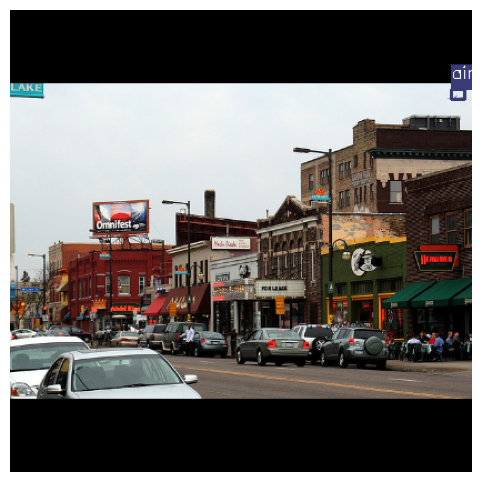

Epoch: 61


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.185]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:24<1:11:18, 11.50s/it, loss=0.142]

batch_idx: 1


  1%|▉                                                                                                                   | 3/374 [00:32<1:00:07,  9.72s/it, loss=0.117]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:39<52:28,  8.51s/it, loss=0.111]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:46<49:16,  8.01s/it, loss=0.105]

batch_idx: 4


  2%|█▉                                                                                                                     | 6/374 [00:53<46:36,  7.60s/it, loss=0.11]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:00<45:20,  7.41s/it, loss=0.114]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:06<44:15,  7.26s/it, loss=0.107]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:14<44:41,  7.35s/it, loss=0.109]

batch_idx: 8


  3%|███▏                                                                                                                 | 10/374 [01:21<44:40,  7.36s/it, loss=0.107]

batch_idx: 9


  3%|███▍                                                                                                                 | 11/374 [01:29<44:13,  7.31s/it, loss=0.105]

batch_idx: 10


  3%|███▊                                                                                                                  | 12/374 [01:36<43:46,  7.26s/it, loss=0.11]

batch_idx: 11


  3%|████                                                                                                                 | 13/374 [01:42<42:38,  7.09s/it, loss=0.107]

batch_idx: 12


  4%|████▍                                                                                                                | 14/374 [01:49<42:26,  7.07s/it, loss=0.106]

batch_idx: 13


  4%|████▋                                                                                                                | 15/374 [01:56<41:33,  6.95s/it, loss=0.104]

batch_idx: 14


  4%|█████                                                                                                                | 16/374 [02:04<42:41,  7.16s/it, loss=0.104]

batch_idx: 15


  5%|█████▎                                                                                                               | 17/374 [02:11<42:16,  7.10s/it, loss=0.103]

batch_idx: 16


  5%|█████▋                                                                                                               | 18/374 [02:18<41:32,  7.00s/it, loss=0.102]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [02:25<42:35,  7.20s/it, loss=0.0999]

batch_idx: 18


  5%|██████▎                                                                                                              | 20/374 [02:32<41:55,  7.11s/it, loss=0.104]

batch_idx: 19


  6%|██████▌                                                                                                              | 21/374 [02:39<40:43,  6.92s/it, loss=0.104]

batch_idx: 20


  6%|██████▉                                                                                                              | 22/374 [02:45<39:56,  6.81s/it, loss=0.104]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:52<39:58,  6.83s/it, loss=0.105]

batch_idx: 22


  6%|███████▌                                                                                                             | 24/374 [02:59<39:25,  6.76s/it, loss=0.104]

batch_idx: 23


  7%|███████▊                                                                                                             | 25/374 [03:06<40:15,  6.92s/it, loss=0.104]

batch_idx: 24


  7%|████████▏                                                                                                            | 26/374 [03:13<40:00,  6.90s/it, loss=0.108]

batch_idx: 25


  7%|████████▍                                                                                                            | 27/374 [03:20<40:42,  7.04s/it, loss=0.109]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:27<40:36,  7.04s/it, loss=0.109]

batch_idx: 27


  8%|█████████▏                                                                                                            | 29/374 [03:34<40:40,  7.07s/it, loss=0.11]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:42<40:58,  7.15s/it, loss=0.109]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:49<41:05,  7.19s/it, loss=0.108]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:56<41:08,  7.22s/it, loss=0.107]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [04:03<41:07,  7.24s/it, loss=0.107]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:10<40:37,  7.17s/it, loss=0.106]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:18<40:25,  7.15s/it, loss=0.107]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:24<39:44,  7.05s/it, loss=0.107]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:32<40:14,  7.17s/it, loss=0.107]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:39<40:11,  7.18s/it, loss=0.106]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:46<39:00,  6.99s/it, loss=0.106]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:53<39:47,  7.15s/it, loss=0.105]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [05:00<39:42,  7.15s/it, loss=0.105]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:07<38:56,  7.04s/it, loss=0.105]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:14<38:29,  6.98s/it, loss=0.105]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:21<38:36,  7.02s/it, loss=0.104]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:28<38:45,  7.07s/it, loss=0.104]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:35<38:49,  7.10s/it, loss=0.106]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:42<38:30,  7.07s/it, loss=0.108]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:49<38:22,  7.06s/it, loss=0.107]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [05:57<38:36,  7.13s/it, loss=0.107]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:04<38:50,  7.19s/it, loss=0.107]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:10<37:16,  6.92s/it, loss=0.107]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:17<37:02,  6.90s/it, loss=0.106]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:24<37:26,  7.00s/it, loss=0.106]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:32<37:35,  7.05s/it, loss=0.106]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:39<38:13,  7.19s/it, loss=0.105]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:46<38:05,  7.19s/it, loss=0.105]

batch_idx: 55


 15%|█████████████████▊                                                                                                   | 57/374 [06:54<38:09,  7.22s/it, loss=0.104]

batch_idx: 56


 16%|██████████████████▏                                                                                                  | 58/374 [07:00<37:25,  7.11s/it, loss=0.106]

batch_idx: 57


 16%|██████████████████▍                                                                                                  | 59/374 [07:07<37:11,  7.08s/it, loss=0.106]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:15<37:24,  7.15s/it, loss=0.105]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:22<37:01,  7.10s/it, loss=0.106]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:28<35:23,  6.81s/it, loss=0.105]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:35<35:20,  6.82s/it, loss=0.106]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:42<35:24,  6.85s/it, loss=0.105]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [07:49<35:25,  6.88s/it, loss=0.105]

batch_idx: 64


 18%|████████████████████▋                                                                                                | 66/374 [07:55<35:13,  6.86s/it, loss=0.104]

batch_idx: 65


 18%|████████████████████▉                                                                                                | 67/374 [08:02<35:25,  6.92s/it, loss=0.104]

batch_idx: 66


 18%|█████████████████████▎                                                                                               | 68/374 [08:09<35:07,  6.89s/it, loss=0.104]

batch_idx: 67


 18%|█████████████████████▌                                                                                               | 69/374 [08:16<35:20,  6.95s/it, loss=0.103]

batch_idx: 68


 19%|█████████████████████▉                                                                                               | 70/374 [08:23<34:56,  6.89s/it, loss=0.103]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:30<34:54,  6.91s/it, loss=0.103]

batch_idx: 70


 19%|██████████████████████▌                                                                                              | 72/374 [08:37<35:14,  7.00s/it, loss=0.104]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [08:45<35:28,  7.07s/it, loss=0.104]

batch_idx: 72


 20%|███████████████████████▏                                                                                             | 74/374 [08:52<35:20,  7.07s/it, loss=0.104]

batch_idx: 73


 20%|███████████████████████▍                                                                                             | 75/374 [08:58<34:38,  6.95s/it, loss=0.104]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [09:05<34:38,  6.97s/it, loss=0.106]

batch_idx: 75


 21%|████████████████████████                                                                                             | 77/374 [09:12<34:31,  6.97s/it, loss=0.106]

batch_idx: 76


 21%|████████████████████████▍                                                                                            | 78/374 [09:19<33:59,  6.89s/it, loss=0.105]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:26<34:17,  6.97s/it, loss=0.105]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:33<33:37,  6.86s/it, loss=0.106]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [09:40<33:58,  6.96s/it, loss=0.105]

batch_idx: 80


 22%|█████████████████████████▋                                                                                           | 82/374 [09:47<34:22,  7.06s/it, loss=0.106]

batch_idx: 81


 22%|█████████████████████████▉                                                                                           | 83/374 [09:54<34:22,  7.09s/it, loss=0.106]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [10:01<33:59,  7.03s/it, loss=0.107]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [10:08<33:45,  7.01s/it, loss=0.106]

batch_idx: 84


 23%|██████████████████████████▉                                                                                          | 86/374 [10:16<34:12,  7.13s/it, loss=0.106]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:23<33:55,  7.09s/it, loss=0.106]

batch_idx: 86


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [16:10<28:16,  7.13s/it, loss=0.0891]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [16:16<27:35,  6.99s/it, loss=0.0887]

batch_idx: 136


 37%|██████████████████████████████████████████▍                                                                        | 138/374 [16:23<27:20,  6.95s/it, loss=0.0885]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [16:30<27:36,  7.05s/it, loss=0.0886]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [16:37<27:12,  6.98s/it, loss=0.0886]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [16:45<27:31,  7.09s/it, loss=0.0883]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [16:51<26:44,  6.92s/it, loss=0.0888]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [16:59<27:22,  7.11s/it, loss=0.0889]

batch_idx: 142


 39%|████████████████████████████████████████████▋                                                                       | 144/374 [17:06<27:28,  7.17s/it, loss=0.089]

batch_idx: 143


 39%|████████████████████████████████████████████▌                                                                      | 145/374 [17:13<27:29,  7.20s/it, loss=0.0888]

batch_idx: 144


 39%|████████████████████████████████████████████▉                                                                      | 146/374 [17:21<27:44,  7.30s/it, loss=0.0894]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [17:28<27:40,  7.31s/it, loss=0.0899]

batch_idx: 146


 40%|█████████████████████████████████████████████▌                                                                     | 148/374 [17:35<27:23,  7.27s/it, loss=0.0899]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [17:42<26:54,  7.17s/it, loss=0.0897]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [17:49<26:35,  7.12s/it, loss=0.0895]

batch_idx: 149


 40%|██████████████████████████████████████████████▍                                                                    | 151/374 [17:56<26:09,  7.04s/it, loss=0.0895]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [18:03<26:28,  7.15s/it, loss=0.0893]

batch_idx: 151


 41%|███████████████████████████████████████████████                                                                    | 153/374 [18:11<26:24,  7.17s/it, loss=0.0893]

batch_idx: 152


 41%|███████████████████████████████████████████████▊                                                                    | 154/374 [18:18<26:15,  7.16s/it, loss=0.089]

batch_idx: 153


 41%|███████████████████████████████████████████████▋                                                                   | 155/374 [18:25<26:08,  7.16s/it, loss=0.0889]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:32<25:33,  7.04s/it, loss=0.089]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [18:38<25:09,  6.96s/it, loss=0.0889]

batch_idx: 156


 42%|████████████████████████████████████████████████▌                                                                  | 158/374 [18:46<25:25,  7.06s/it, loss=0.0889]

batch_idx: 157


 43%|████████████████████████████████████████████████▉                                                                  | 159/374 [18:53<25:17,  7.06s/it, loss=0.0886]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [19:00<25:31,  7.16s/it, loss=0.0886]

batch_idx: 159


 43%|█████████████████████████████████████████████████▌                                                                 | 161/374 [19:07<25:18,  7.13s/it, loss=0.0884]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [19:14<25:01,  7.08s/it, loss=0.0883]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [19:21<24:55,  7.09s/it, loss=0.0883]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [19:28<24:36,  7.03s/it, loss=0.0881]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [19:35<24:20,  6.99s/it, loss=0.0879]

batch_idx: 164


 44%|███████████████████████████████████████████████████▍                                                                | 166/374 [19:42<23:52,  6.89s/it, loss=0.088]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [19:48<23:26,  6.79s/it, loss=0.0879]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [19:55<23:28,  6.83s/it, loss=0.0885]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [20:03<23:45,  6.95s/it, loss=0.0886]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [20:09<23:36,  6.94s/it, loss=0.0884]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [20:17<23:43,  7.01s/it, loss=0.0886]

batch_idx: 170


 46%|████████████████████████████████████████████████████▉                                                              | 172/374 [20:23<23:23,  6.95s/it, loss=0.0886]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [20:30<23:06,  6.90s/it, loss=0.0886]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▌                                                             | 174/374 [20:37<22:59,  6.90s/it, loss=0.0887]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [20:44<22:51,  6.89s/it, loss=0.0885]

batch_idx: 174


 47%|██████████████████████████████████████████████████████                                                             | 176/374 [20:51<22:45,  6.90s/it, loss=0.0885]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▍                                                            | 177/374 [20:58<22:44,  6.93s/it, loss=0.0887]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [21:05<22:54,  7.01s/it, loss=0.0886]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [21:12<22:38,  6.97s/it, loss=0.0884]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [21:19<22:35,  6.99s/it, loss=0.0883]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [21:26<22:31,  7.00s/it, loss=0.0881]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [21:33<22:22,  6.99s/it, loss=0.0878]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▎                                                          | 183/374 [21:40<22:24,  7.04s/it, loss=0.0878]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [21:48<22:43,  7.18s/it, loss=0.0878]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [21:54<22:10,  7.04s/it, loss=0.0876]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [22:01<21:56,  7.00s/it, loss=0.0874]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [22:08<21:55,  7.04s/it, loss=0.0872]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [22:15<21:45,  7.02s/it, loss=0.0871]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [22:22<21:39,  7.02s/it, loss=0.0873]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [22:30<21:47,  7.10s/it, loss=0.0876]

batch_idx: 189


 51%|██████████████████████████████████████████████████████████▋                                                        | 191/374 [22:37<21:28,  7.04s/it, loss=0.0875]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████                                                        | 192/374 [22:44<22:04,  7.28s/it, loss=0.0873]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▎                                                       | 193/374 [22:51<21:19,  7.07s/it, loss=0.0873]

batch_idx: 192


 52%|███████████████████████████████████████████████████████████▋                                                       | 194/374 [22:58<21:19,  7.11s/it, loss=0.0871]

batch_idx: 193


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [23:05<21:18,  7.14s/it, loss=0.0869]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [23:13<21:18,  7.18s/it, loss=0.0868]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [23:20<21:05,  7.15s/it, loss=0.0869]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:27<20:58,  7.15s/it, loss=0.087]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [23:35<21:13,  7.28s/it, loss=0.0873]

batch_idx: 198


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:42<20:55,  7.22s/it, loss=0.0871]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:49<20:55,  7.22s/it, loss=0.0871]

batch_idx: 200
==> Saving checkpoint


 54%|██████████████████████████████████████████████████████████████                                                     | 202/374 [24:06<26:34,  9.27s/it, loss=0.0873]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▍                                                    | 203/374 [24:13<24:25,  8.57s/it, loss=0.0874]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [24:20<22:38,  7.99s/it, loss=0.0874]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [24:26<21:38,  7.68s/it, loss=0.0874]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▎                                                   | 206/374 [24:33<20:41,  7.39s/it, loss=0.0877]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [24:40<20:19,  7.30s/it, loss=0.0879]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [24:47<19:53,  7.19s/it, loss=0.0881]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▎                                                  | 209/374 [24:54<19:44,  7.18s/it, loss=0.0881]

batch_idx: 208


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 210/374 [25:02<19:38,  7.18s/it, loss=0.088]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [25:09<19:47,  7.28s/it, loss=0.0878]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [25:16<19:17,  7.15s/it, loss=0.0878]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [25:23<18:59,  7.07s/it, loss=0.0878]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [25:30<18:38,  6.99s/it, loss=0.0876]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [25:36<18:16,  6.90s/it, loss=0.0878]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▍                                                | 216/374 [25:43<18:18,  6.96s/it, loss=0.0877]

batch_idx: 215


 58%|██████████████████████████████████████████████████████████████████▋                                                | 217/374 [25:50<18:04,  6.91s/it, loss=0.0877]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████                                                | 218/374 [25:57<18:07,  6.97s/it, loss=0.0877]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [26:04<18:00,  6.97s/it, loss=0.0878]

batch_idx: 218


 59%|████████████████████████████████████████████████████████████████████▏                                               | 220/374 [26:12<18:06,  7.05s/it, loss=0.088]

batch_idx: 219


 59%|███████████████████████████████████████████████████████████████████▉                                               | 221/374 [26:18<17:55,  7.03s/it, loss=0.0879]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▊                                               | 222/374 [26:25<17:40,  6.98s/it, loss=0.088]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [26:32<17:33,  6.98s/it, loss=0.0883]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [26:40<17:39,  7.06s/it, loss=0.0885]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 225/374 [26:47<17:37,  7.10s/it, loss=0.0888]

batch_idx: 224


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 226/374 [26:54<17:38,  7.15s/it, loss=0.0887]

batch_idx: 225


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 227/374 [27:01<17:18,  7.06s/it, loss=0.0887]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [27:08<17:25,  7.16s/it, loss=0.089]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:16<17:43,  7.33s/it, loss=0.089]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [27:23<17:37,  7.34s/it, loss=0.0893]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████                                            | 231/374 [27:30<17:19,  7.27s/it, loss=0.0893]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 232/374 [27:37<16:59,  7.18s/it, loss=0.0894]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [27:44<16:42,  7.11s/it, loss=0.0894]

batch_idx: 232


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 234/374 [27:52<16:51,  7.22s/it, loss=0.0894]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [27:59<16:33,  7.15s/it, loss=0.0894]

batch_idx: 234


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 236/374 [28:06<16:12,  7.05s/it, loss=0.0894]

batch_idx: 235


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 237/374 [28:13<16:12,  7.10s/it, loss=0.0893]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [28:20<15:56,  7.03s/it, loss=0.0893]

batch_idx: 237


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 239/374 [28:27<15:36,  6.94s/it, loss=0.0893]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [28:34<15:51,  7.10s/it, loss=0.0894]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [28:41<15:24,  6.95s/it, loss=0.0893]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [28:47<15:09,  6.89s/it, loss=0.0894]

batch_idx: 241


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 243/374 [28:55<15:18,  7.01s/it, loss=0.0896]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████                                        | 244/374 [29:02<15:19,  7.07s/it, loss=0.0897]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [29:08<14:54,  6.93s/it, loss=0.0897]

batch_idx: 244


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 246/374 [29:16<14:59,  7.03s/it, loss=0.0896]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [29:23<14:44,  6.97s/it, loss=0.0896]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▎                                      | 248/374 [29:29<14:34,  6.94s/it, loss=0.0895]

batch_idx: 247


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 249/374 [29:36<14:31,  6.97s/it, loss=0.0897]

batch_idx: 248


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 250/374 [29:44<14:35,  7.06s/it, loss=0.0898]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 251/374 [29:51<14:31,  7.09s/it, loss=0.0897]

batch_idx: 250


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 252/374 [29:58<14:26,  7.11s/it, loss=0.0903]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [30:05<14:09,  7.02s/it, loss=0.0904]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [30:11<13:28,  6.74s/it, loss=0.0902]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [30:18<13:25,  6.77s/it, loss=0.0904]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [30:25<13:35,  6.91s/it, loss=0.0904]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 257/374 [30:31<13:13,  6.79s/it, loss=0.0903]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [30:38<13:10,  6.81s/it, loss=0.0902]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [30:45<12:43,  6.64s/it, loss=0.0902]

batch_idx: 258


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 260/374 [30:52<12:58,  6.83s/it, loss=0.0902]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [30:58<12:36,  6.69s/it, loss=0.0902]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▉                                   | 262/374 [31:05<12:44,  6.83s/it, loss=0.09]

batch_idx: 261


 70%|██████████████████████████████████████████████████████████████████████████████████▎                                  | 263/374 [31:12<12:46,  6.91s/it, loss=0.09]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 264/374 [31:19<12:32,  6.84s/it, loss=0.0898]

batch_idx: 263


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 265/374 [31:26<12:23,  6.82s/it, loss=0.0898]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [31:33<12:11,  6.77s/it, loss=0.0897]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [31:40<12:20,  6.92s/it, loss=0.0898]

batch_idx: 266


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                 | 268/374 [31:47<12:15,  6.94s/it, loss=0.09]

batch_idx: 267


 72%|████████████████████████████████████████████████████████████████████████████████████▏                                | 269/374 [31:54<12:08,  6.93s/it, loss=0.09]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [32:01<12:04,  6.96s/it, loss=0.0899]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [32:08<11:59,  6.99s/it, loss=0.0901]

batch_idx: 270


 73%|█████████████████████████████████████████████████████████████████████████████████████                                | 272/374 [32:15<11:54,  7.00s/it, loss=0.09]

batch_idx: 271


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 273/374 [32:22<11:41,  6.95s/it, loss=0.0899]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [32:28<11:17,  6.78s/it, loss=0.0899]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [32:35<11:17,  6.85s/it, loss=0.0899]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [32:42<11:19,  6.94s/it, loss=0.0899]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 277/374 [32:49<11:12,  6.93s/it, loss=0.0898]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [32:56<11:10,  6.98s/it, loss=0.0898]

batch_idx: 277


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 279/374 [33:04<11:11,  7.07s/it, loss=0.0897]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 280/374 [33:10<10:50,  6.92s/it, loss=0.0897]

batch_idx: 279


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 281/374 [33:17<10:45,  6.94s/it, loss=0.0896]

batch_idx: 280


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 282/374 [33:24<10:31,  6.86s/it, loss=0.0898]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 283/374 [33:31<10:23,  6.85s/it, loss=0.0897]

batch_idx: 282


 76%|███████████████████████████████████████████████████████████████████████████████████████▎                           | 284/374 [33:38<10:24,  6.93s/it, loss=0.0896]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [33:45<10:25,  7.02s/it, loss=0.0895]

batch_idx: 284


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 286/374 [33:52<10:24,  7.09s/it, loss=0.0894]

batch_idx: 285


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 287/374 [33:59<10:01,  6.91s/it, loss=0.0893]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [34:05<09:41,  6.76s/it, loss=0.0895]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [34:13<09:51,  6.95s/it, loss=0.0893]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 290/374 [34:20<09:48,  7.00s/it, loss=0.0894]

batch_idx: 289


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 291/374 [34:26<09:36,  6.94s/it, loss=0.0893]

batch_idx: 290


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 292/374 [34:33<09:26,  6.90s/it, loss=0.0892]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 293/374 [34:41<09:29,  7.03s/it, loss=0.0891]

batch_idx: 292


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 294/374 [34:48<09:25,  7.07s/it, loss=0.0891]

batch_idx: 293


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [34:54<09:07,  6.93s/it, loss=0.0891]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 296/374 [35:02<09:06,  7.01s/it, loss=0.0891]

batch_idx: 295


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 297/374 [35:09<08:59,  7.01s/it, loss=0.0891]

batch_idx: 296


 80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 298/374 [35:16<08:59,  7.09s/it, loss=0.089]

batch_idx: 297


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 299/374 [35:23<08:49,  7.06s/it, loss=0.0889]

batch_idx: 298


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 300/374 [35:30<08:48,  7.15s/it, loss=0.0889]

batch_idx: 299


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 301/374 [35:37<08:30,  6.99s/it, loss=0.0889]

batch_idx: 300


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 302/374 [35:44<08:22,  6.98s/it, loss=0.0889]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 303/374 [35:51<08:18,  7.03s/it, loss=0.0891]

batch_idx: 302


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 304/374 [35:58<08:19,  7.13s/it, loss=0.0892]

batch_idx: 303


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 305/374 [36:05<08:10,  7.11s/it, loss=0.0893]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 306/374 [36:12<07:56,  7.00s/it, loss=0.0899]

batch_idx: 305


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 307/374 [36:18<07:35,  6.79s/it, loss=0.0898]

batch_idx: 306


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 308/374 [36:25<07:25,  6.74s/it, loss=0.0898]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 309/374 [36:33<07:33,  6.97s/it, loss=0.0897]

batch_idx: 308


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 310/374 [36:40<07:32,  7.08s/it, loss=0.0897]

batch_idx: 309


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 311/374 [36:47<07:29,  7.14s/it, loss=0.0896]

batch_idx: 310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 312/374 [36:54<07:22,  7.14s/it, loss=0.0896]

batch_idx: 311


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 313/374 [37:01<07:11,  7.08s/it, loss=0.0896]

batch_idx: 312


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 314/374 [37:08<07:05,  7.10s/it, loss=0.0897]

batch_idx: 313


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 315/374 [37:15<06:52,  6.99s/it, loss=0.0897]

batch_idx: 314


 84%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 316/374 [37:22<06:52,  7.12s/it, loss=0.09]

batch_idx: 315


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 317/374 [37:29<06:39,  7.00s/it, loss=0.0903]

batch_idx: 316


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 318/374 [37:36<06:33,  7.02s/it, loss=0.0903]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 319/374 [37:43<06:21,  6.93s/it, loss=0.0904]

batch_idx: 318


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 320/374 [37:50<06:16,  6.98s/it, loss=0.0903]

batch_idx: 319


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 321/374 [37:57<06:08,  6.96s/it, loss=0.0903]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 322/374 [38:04<06:07,  7.07s/it, loss=0.0902]

batch_idx: 321


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 323/374 [38:11<05:58,  7.02s/it, loss=0.0902]

batch_idx: 322


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 324/374 [38:18<05:51,  7.02s/it, loss=0.0901]

batch_idx: 323


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 325/374 [38:25<05:46,  7.08s/it, loss=0.0902]

batch_idx: 324


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 326/374 [38:32<05:33,  6.94s/it, loss=0.0902]

batch_idx: 325


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 327/374 [38:39<05:25,  6.92s/it, loss=0.0903]

batch_idx: 326


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 328/374 [38:46<05:17,  6.90s/it, loss=0.0902]

batch_idx: 327


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 329/374 [38:53<05:09,  6.87s/it, loss=0.0901]

batch_idx: 328


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 330/374 [39:00<05:03,  6.89s/it, loss=0.0901]

batch_idx: 329


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 331/374 [39:07<04:59,  6.97s/it, loss=0.0903]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 332/374 [39:13<04:48,  6.88s/it, loss=0.0903]

batch_idx: 331


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 333/374 [39:20<04:41,  6.87s/it, loss=0.0902]

batch_idx: 332


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 334/374 [39:28<04:42,  7.07s/it, loss=0.0901]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 335/374 [39:35<04:39,  7.16s/it, loss=0.0903]

batch_idx: 334


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 336/374 [39:42<04:27,  7.04s/it, loss=0.0902]

batch_idx: 335


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [39:49<04:18,  6.98s/it, loss=0.0901]

batch_idx: 336


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 338/374 [39:56<04:09,  6.94s/it, loss=0.0902]

batch_idx: 337


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:03<04:02,  6.94s/it, loss=0.0902]

batch_idx: 338


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 340/374 [40:10<03:56,  6.94s/it, loss=0.0903]

batch_idx: 339


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:16<03:48,  6.92s/it, loss=0.0902]

batch_idx: 340


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 342/374 [40:23<03:42,  6.94s/it, loss=0.0901]

batch_idx: 341


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:30<03:35,  6.95s/it, loss=0.0905]

batch_idx: 342


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 344/374 [40:38<03:34,  7.14s/it, loss=0.0904]

batch_idx: 343


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [40:45<03:25,  7.07s/it, loss=0.0904]

batch_idx: 344


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 346/374 [40:52<03:16,  7.01s/it, loss=0.0904]

batch_idx: 345


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [40:59<03:08,  6.99s/it, loss=0.0905]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 348/374 [41:06<03:04,  7.08s/it, loss=0.0906]

batch_idx: 347


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 349/374 [41:13<02:56,  7.06s/it, loss=0.0905]

batch_idx: 348


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:20<02:50,  7.09s/it, loss=0.0906]

batch_idx: 349


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 351/374 [41:27<02:41,  7.03s/it, loss=0.0907]

batch_idx: 350


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [41:34<02:34,  7.02s/it, loss=0.0907]

batch_idx: 351


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 353/374 [41:41<02:26,  6.97s/it, loss=0.0907]

batch_idx: 352


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [41:47<02:16,  6.83s/it, loss=0.0909]

batch_idx: 353


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 355/374 [41:55<02:12,  6.99s/it, loss=0.0908]

batch_idx: 354


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:01<02:04,  6.89s/it, loss=0.0907]

batch_idx: 355


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 357/374 [42:08<01:58,  6.96s/it, loss=0.0908]

batch_idx: 356


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:16<01:52,  7.05s/it, loss=0.0908]

batch_idx: 357


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 359/374 [42:23<01:44,  7.00s/it, loss=0.0909]

batch_idx: 358


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [42:30<01:40,  7.16s/it, loss=0.0908]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [42:38<01:34,  7.26s/it, loss=0.091]

batch_idx: 360


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [42:44<01:25,  7.13s/it, loss=0.0909]

batch_idx: 361


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [42:51<01:17,  7.02s/it, loss=0.0909]

batch_idx: 362


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [42:58<01:09,  6.95s/it, loss=0.0909]

batch_idx: 363


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:05<01:03,  7.01s/it, loss=0.0909]

batch_idx: 364


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:12<00:55,  7.00s/it, loss=0.0909]

batch_idx: 365


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:19<00:48,  6.98s/it, loss=0.0908]

batch_idx: 366


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [43:26<00:41,  6.86s/it, loss=0.0907]

batch_idx: 367


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:33<00:34,  6.87s/it, loss=0.0907]

batch_idx: 368


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [43:39<00:27,  6.77s/it, loss=0.0906]

batch_idx: 369


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [43:46<00:20,  6.94s/it, loss=0.0905]

batch_idx: 370


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [43:53<00:13,  6.90s/it, loss=0.0904]

batch_idx: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:00<00:07,  7.00s/it, loss=0.0903]

batch_idx: 372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:02<00:00,  7.07s/it, loss=0.0902]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


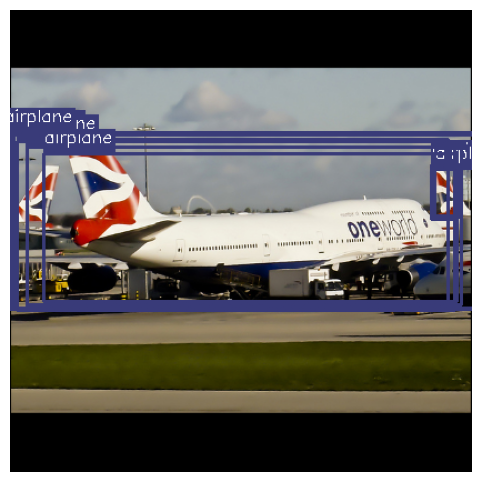

Epoch: 68


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.102]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:24<1:10:47, 11.42s/it, loss=0.145]

batch_idx: 1


  1%|▉                                                                                                                      | 3/374 [00:31<58:54,  9.53s/it, loss=0.13]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:38<52:10,  8.46s/it, loss=0.121]

batch_idx: 3


  1%|█▌                                                                                                                    | 5/374 [00:45<48:19,  7.86s/it, loss=0.127]

batch_idx: 4


  2%|█▉                                                                                                                    | 6/374 [00:52<46:49,  7.63s/it, loss=0.118]

batch_idx: 5


  2%|██▏                                                                                                                    | 7/374 [00:59<45:46,  7.48s/it, loss=0.11]

batch_idx: 6


  2%|██▌                                                                                                                   | 8/374 [01:06<44:26,  7.28s/it, loss=0.105]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:13<43:51,  7.21s/it, loss=0.101]

batch_idx: 8


  3%|███                                                                                                                 | 10/374 [01:20<42:51,  7.06s/it, loss=0.0967]

batch_idx: 9


  3%|███▍                                                                                                                | 11/374 [01:27<42:48,  7.07s/it, loss=0.0936]

batch_idx: 10


  3%|███▋                                                                                                                | 12/374 [01:34<42:54,  7.11s/it, loss=0.0899]

batch_idx: 11


  3%|████                                                                                                                | 13/374 [01:42<43:06,  7.16s/it, loss=0.0881]

batch_idx: 12


  4%|████▎                                                                                                               | 14/374 [01:48<42:12,  7.03s/it, loss=0.0855]

batch_idx: 13


  4%|████▋                                                                                                               | 15/374 [01:55<41:50,  6.99s/it, loss=0.0859]

batch_idx: 14


  4%|████▉                                                                                                               | 16/374 [02:03<42:34,  7.14s/it, loss=0.0899]

batch_idx: 15


  5%|█████▎                                                                                                              | 17/374 [02:09<41:41,  7.01s/it, loss=0.0883]

batch_idx: 16


  5%|█████▌                                                                                                              | 18/374 [02:17<41:59,  7.08s/it, loss=0.0885]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [02:23<41:25,  7.00s/it, loss=0.0893]

batch_idx: 18


  5%|██████▏                                                                                                             | 20/374 [02:30<41:12,  6.99s/it, loss=0.0886]

batch_idx: 19


  6%|██████▌                                                                                                             | 21/374 [02:37<40:43,  6.92s/it, loss=0.0884]

batch_idx: 20


  6%|██████▊                                                                                                             | 22/374 [02:44<39:52,  6.80s/it, loss=0.0866]

batch_idx: 21


  6%|███████▏                                                                                                             | 23/374 [02:51<40:24,  6.91s/it, loss=0.086]

batch_idx: 22


  6%|███████▌                                                                                                              | 24/374 [02:58<40:55,  7.02s/it, loss=0.09]

batch_idx: 23


  7%|███████▊                                                                                                            | 25/374 [03:06<41:23,  7.12s/it, loss=0.0891]

batch_idx: 24


  7%|████████                                                                                                            | 26/374 [03:13<41:25,  7.14s/it, loss=0.0939]

batch_idx: 25


  7%|████████▎                                                                                                           | 27/374 [03:20<41:20,  7.15s/it, loss=0.0926]

batch_idx: 26


  7%|████████▋                                                                                                           | 28/374 [03:27<41:40,  7.23s/it, loss=0.0939]

batch_idx: 27


  8%|████████▉                                                                                                           | 29/374 [03:34<40:35,  7.06s/it, loss=0.0936]

batch_idx: 28


  8%|█████████▎                                                                                                          | 30/374 [03:41<40:42,  7.10s/it, loss=0.0941]

batch_idx: 29


  8%|█████████▌                                                                                                          | 31/374 [03:48<40:53,  7.15s/it, loss=0.0929]

batch_idx: 30


  9%|█████████▉                                                                                                          | 32/374 [03:56<41:17,  7.24s/it, loss=0.0925]

batch_idx: 31


  9%|██████████▏                                                                                                         | 33/374 [04:03<41:29,  7.30s/it, loss=0.0943]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:11<41:11,  7.27s/it, loss=0.095]

batch_idx: 33


  9%|██████████▊                                                                                                         | 35/374 [04:18<41:04,  7.27s/it, loss=0.0955]

batch_idx: 34


 10%|███████████▏                                                                                                        | 36/374 [04:25<40:16,  7.15s/it, loss=0.0953]

batch_idx: 35


 10%|███████████▍                                                                                                        | 37/374 [04:32<40:10,  7.15s/it, loss=0.0945]

batch_idx: 36


 10%|███████████▊                                                                                                        | 38/374 [04:39<39:44,  7.10s/it, loss=0.0946]

batch_idx: 37


 10%|████████████                                                                                                        | 39/374 [04:46<39:21,  7.05s/it, loss=0.0943]

batch_idx: 38


 11%|████████████▍                                                                                                       | 40/374 [04:53<39:16,  7.05s/it, loss=0.0933]

batch_idx: 39


 11%|████████████▋                                                                                                       | 41/374 [05:00<39:14,  7.07s/it, loss=0.0926]

batch_idx: 40


 11%|█████████████                                                                                                       | 42/374 [05:07<38:46,  7.01s/it, loss=0.0936]

batch_idx: 41


 11%|█████████████▎                                                                                                      | 43/374 [05:14<38:35,  7.00s/it, loss=0.0942]

batch_idx: 42


 12%|█████████████▋                                                                                                      | 44/374 [05:21<39:07,  7.11s/it, loss=0.0942]

batch_idx: 43


 12%|█████████████▉                                                                                                      | 45/374 [05:28<38:36,  7.04s/it, loss=0.0944]

batch_idx: 44


 12%|██████████████▎                                                                                                     | 46/374 [05:35<38:14,  6.99s/it, loss=0.0942]

batch_idx: 45


 13%|██████████████▌                                                                                                     | 47/374 [05:42<37:41,  6.92s/it, loss=0.0939]

batch_idx: 46


 13%|██████████████▉                                                                                                     | 48/374 [05:49<38:49,  7.15s/it, loss=0.0941]

batch_idx: 47


 13%|███████████████▏                                                                                                    | 49/374 [05:56<38:09,  7.04s/it, loss=0.0932]

batch_idx: 48


 13%|███████████████▌                                                                                                    | 50/374 [06:03<38:03,  7.05s/it, loss=0.0936]

batch_idx: 49


 14%|███████████████▊                                                                                                    | 51/374 [06:10<37:25,  6.95s/it, loss=0.0947]

batch_idx: 50


 14%|████████████████▏                                                                                                   | 52/374 [06:17<38:07,  7.11s/it, loss=0.0941]

batch_idx: 51


 14%|████████████████▍                                                                                                   | 53/374 [06:24<38:05,  7.12s/it, loss=0.0936]

batch_idx: 52


 14%|████████████████▋                                                                                                   | 54/374 [06:32<37:49,  7.09s/it, loss=0.0931]

batch_idx: 53


 15%|█████████████████                                                                                                   | 55/374 [06:39<37:55,  7.13s/it, loss=0.0925]

batch_idx: 54


 15%|█████████████████▎                                                                                                  | 56/374 [06:46<38:17,  7.23s/it, loss=0.0923]

batch_idx: 55


 15%|█████████████████▋                                                                                                  | 57/374 [06:53<37:55,  7.18s/it, loss=0.0917]

batch_idx: 56


 16%|█████████████████▉                                                                                                  | 58/374 [07:00<37:02,  7.03s/it, loss=0.0918]

batch_idx: 57


 16%|██████████████████▎                                                                                                 | 59/374 [07:07<36:39,  6.98s/it, loss=0.0916]

batch_idx: 58


 16%|██████████████████▌                                                                                                 | 60/374 [07:14<36:40,  7.01s/it, loss=0.0913]

batch_idx: 59


 16%|██████████████████▉                                                                                                 | 61/374 [07:22<37:40,  7.22s/it, loss=0.0907]

batch_idx: 60


 17%|███████████████████▏                                                                                                | 62/374 [07:29<37:46,  7.27s/it, loss=0.0911]

batch_idx: 61


 17%|███████████████████▌                                                                                                | 63/374 [07:36<37:07,  7.16s/it, loss=0.0909]

batch_idx: 62


 17%|████████████████████                                                                                                 | 64/374 [07:44<38:04,  7.37s/it, loss=0.091]

batch_idx: 63


 17%|████████████████████▏                                                                                               | 65/374 [07:51<37:54,  7.36s/it, loss=0.0904]

batch_idx: 64


 18%|████████████████████▍                                                                                               | 66/374 [07:58<37:02,  7.22s/it, loss=0.0903]

batch_idx: 65


 18%|████████████████████▊                                                                                               | 67/374 [08:05<36:46,  7.19s/it, loss=0.0898]

batch_idx: 66


 18%|█████████████████████▍                                                                                                | 68/374 [08:12<36:03,  7.07s/it, loss=0.09]

batch_idx: 67


 18%|█████████████████████▍                                                                                              | 69/374 [08:19<36:14,  7.13s/it, loss=0.0897]

batch_idx: 68


 19%|█████████████████████▋                                                                                              | 70/374 [08:26<36:27,  7.19s/it, loss=0.0893]

batch_idx: 69


 19%|██████████████████████                                                                                              | 71/374 [08:33<35:25,  7.01s/it, loss=0.0897]

batch_idx: 70


 19%|██████████████████████▎                                                                                             | 72/374 [08:40<35:09,  6.99s/it, loss=0.0894]

batch_idx: 71


 20%|██████████████████████▊                                                                                              | 73/374 [08:47<35:16,  7.03s/it, loss=0.089]

batch_idx: 72


 20%|██████████████████████▉                                                                                             | 74/374 [08:54<35:17,  7.06s/it, loss=0.0891]

batch_idx: 73


 20%|███████████████████████▎                                                                                            | 75/374 [09:01<35:13,  7.07s/it, loss=0.0892]

batch_idx: 74


 20%|███████████████████████▌                                                                                            | 76/374 [09:08<34:50,  7.01s/it, loss=0.0892]

batch_idx: 75


 21%|███████████████████████▉                                                                                            | 77/374 [09:15<34:34,  6.98s/it, loss=0.0898]

batch_idx: 76


 21%|████████████████████████▏                                                                                           | 78/374 [09:22<34:50,  7.06s/it, loss=0.0899]

batch_idx: 77


 21%|████████████████████████▌                                                                                           | 79/374 [09:30<35:31,  7.23s/it, loss=0.0897]

batch_idx: 78


 21%|████████████████████████▊                                                                                           | 80/374 [09:37<34:36,  7.06s/it, loss=0.0897]

batch_idx: 79


 22%|█████████████████████████                                                                                           | 81/374 [09:44<34:37,  7.09s/it, loss=0.0895]

batch_idx: 80


 22%|█████████████████████████▍                                                                                          | 82/374 [09:51<34:45,  7.14s/it, loss=0.0896]

batch_idx: 81


 22%|█████████████████████████▋                                                                                          | 83/374 [09:58<33:34,  6.92s/it, loss=0.0894]

batch_idx: 82


 22%|██████████████████████████                                                                                          | 84/374 [10:05<33:35,  6.95s/it, loss=0.0903]

batch_idx: 83


 23%|██████████████████████████▎                                                                                         | 85/374 [10:12<33:42,  7.00s/it, loss=0.0907]

batch_idx: 84


 23%|██████████████████████████▋                                                                                         | 86/374 [10:18<33:01,  6.88s/it, loss=0.0903]

batch_idx: 85


 23%|██████████████████████████▉                                                                                         | 87/374 [10:25<33:14,  6.95s/it, loss=0.0898]

batch_idx: 86


 24%|███████████████████████████▎                                                                                        | 88/374 [10:33<34:08,  7.16s/it, loss=0.0897]

batch_idx: 87


 24%|███████████████████████████▌                                                                                        | 89/374 [10:40<33:13,  7.00s/it, loss=0.0895]

batch_idx: 88


 24%|███████████████████████████▉                                                                                        | 90/374 [10:46<32:52,  6.94s/it, loss=0.0891]

batch_idx: 89


 24%|████████████████████████████▏                                                                                       | 91/374 [10:54<33:04,  7.01s/it, loss=0.0888]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [11:01<33:10,  7.06s/it, loss=0.089]

batch_idx: 91


 25%|████████████████████████████▊                                                                                       | 93/374 [11:08<33:09,  7.08s/it, loss=0.0886]

batch_idx: 92


 25%|█████████████████████████████▏                                                                                      | 94/374 [11:15<33:39,  7.21s/it, loss=0.0885]

batch_idx: 93


 25%|█████████████████████████████▍                                                                                      | 95/374 [11:23<33:39,  7.24s/it, loss=0.0881]

batch_idx: 94


 26%|█████████████████████████████▊                                                                                      | 96/374 [11:30<32:57,  7.11s/it, loss=0.0886]

batch_idx: 95


 26%|██████████████████████████████                                                                                      | 97/374 [11:37<33:20,  7.22s/it, loss=0.0886]

batch_idx: 96


 26%|██████████████████████████████▍                                                                                     | 98/374 [11:44<32:28,  7.06s/it, loss=0.0882]

batch_idx: 97


 26%|██████████████████████████████▋                                                                                     | 99/374 [11:51<32:27,  7.08s/it, loss=0.0887]

batch_idx: 98


 27%|██████████████████████████████▋                                                                                    | 100/374 [11:58<32:15,  7.06s/it, loss=0.0892]

batch_idx: 99


 27%|███████████████████████████████                                                                                    | 101/374 [12:05<32:19,  7.11s/it, loss=0.0893]

batch_idx: 100


 27%|███████████████████████████████▎                                                                                   | 102/374 [12:12<31:29,  6.95s/it, loss=0.0891]

batch_idx: 101


 28%|███████████████████████████████▋                                                                                   | 103/374 [12:19<32:17,  7.15s/it, loss=0.0894]

batch_idx: 102


 28%|███████████████████████████████▉                                                                                   | 104/374 [12:26<31:43,  7.05s/it, loss=0.0893]

batch_idx: 103


 28%|████████████████████████████████▎                                                                                  | 105/374 [12:33<31:23,  7.00s/it, loss=0.0894]

batch_idx: 104


 28%|████████████████████████████████▌                                                                                  | 106/374 [12:40<31:33,  7.06s/it, loss=0.0896]

batch_idx: 105


 29%|████████████████████████████████▉                                                                                  | 107/374 [12:47<31:16,  7.03s/it, loss=0.0892]

batch_idx: 106


 29%|█████████████████████████████████▏                                                                                 | 108/374 [12:54<30:56,  6.98s/it, loss=0.0898]

batch_idx: 107


 29%|█████████████████████████████████▌                                                                                 | 109/374 [13:02<31:44,  7.19s/it, loss=0.0905]

batch_idx: 108


 29%|█████████████████████████████████▊                                                                                 | 110/374 [13:09<31:14,  7.10s/it, loss=0.0905]

batch_idx: 109


 30%|██████████████████████████████████▏                                                                                | 111/374 [13:16<31:44,  7.24s/it, loss=0.0903]

batch_idx: 110


 30%|███████████████████████████████████                                                                                  | 112/374 [13:24<31:51,  7.30s/it, loss=0.09]

batch_idx: 111


 30%|██████████████████████████████████▋                                                                                | 113/374 [13:30<31:03,  7.14s/it, loss=0.0898]

batch_idx: 112


 30%|███████████████████████████████████                                                                                | 114/374 [13:37<30:42,  7.09s/it, loss=0.0896]

batch_idx: 113


 31%|███████████████████████████████████▎                                                                               | 115/374 [13:45<30:57,  7.17s/it, loss=0.0893]

batch_idx: 114


 31%|███████████████████████████████████▋                                                                               | 116/374 [13:52<30:34,  7.11s/it, loss=0.0891]

batch_idx: 115


 31%|████████████████████████████████████▎                                                                               | 117/374 [14:00<31:33,  7.37s/it, loss=0.089]

batch_idx: 116


 32%|████████████████████████████████████▎                                                                              | 118/374 [14:07<30:57,  7.26s/it, loss=0.0894]

batch_idx: 117


 32%|████████████████████████████████████▌                                                                              | 119/374 [14:14<30:40,  7.22s/it, loss=0.0894]

batch_idx: 118


 32%|████████████████████████████████████▉                                                                              | 120/374 [14:21<31:00,  7.33s/it, loss=0.0891]

batch_idx: 119


 32%|█████████████████████████████████████▏                                                                             | 121/374 [14:29<31:01,  7.36s/it, loss=0.0891]

batch_idx: 120


 33%|█████████████████████████████████████▌                                                                             | 122/374 [14:36<30:12,  7.19s/it, loss=0.0889]

batch_idx: 121


 33%|█████████████████████████████████████▊                                                                             | 123/374 [14:42<29:35,  7.07s/it, loss=0.0887]

batch_idx: 122


 33%|██████████████████████████████████████▏                                                                            | 124/374 [14:50<30:00,  7.20s/it, loss=0.0885]

batch_idx: 123


 33%|██████████████████████████████████████▍                                                                            | 125/374 [14:57<29:30,  7.11s/it, loss=0.0883]

batch_idx: 124


 34%|██████████████████████████████████████▋                                                                            | 126/374 [15:04<29:45,  7.20s/it, loss=0.0883]

batch_idx: 125


 34%|███████████████████████████████████████                                                                            | 127/374 [15:11<29:25,  7.15s/it, loss=0.0882]

batch_idx: 126


 34%|███████████████████████████████████████▎                                                                           | 128/374 [15:18<29:03,  7.09s/it, loss=0.0882]

batch_idx: 127


 34%|████████████████████████████████████████                                                                            | 129/374 [15:25<28:43,  7.04s/it, loss=0.088]

batch_idx: 128


 35%|███████████████████████████████████████▉                                                                           | 130/374 [15:32<28:36,  7.04s/it, loss=0.0878]

batch_idx: 129


 35%|████████████████████████████████████████▎                                                                          | 131/374 [15:39<28:05,  6.94s/it, loss=0.0878]

batch_idx: 130


 35%|████████████████████████████████████████▌                                                                          | 132/374 [15:46<27:59,  6.94s/it, loss=0.0875]

batch_idx: 131


 36%|████████████████████████████████████████▉                                                                          | 133/374 [15:53<28:01,  6.98s/it, loss=0.0872]

batch_idx: 132


 36%|█████████████████████████████████████████▏                                                                         | 134/374 [16:00<28:00,  7.00s/it, loss=0.0872]

batch_idx: 133


 36%|█████████████████████████████████████████▌                                                                         | 135/374 [16:07<27:59,  7.03s/it, loss=0.0872]

batch_idx: 134


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [16:14<28:11,  7.11s/it, loss=0.0871]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [16:22<28:18,  7.17s/it, loss=0.0871]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:29<28:24,  7.22s/it, loss=0.087]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [16:36<27:35,  7.04s/it, loss=0.0872]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [16:42<27:22,  7.02s/it, loss=0.0871]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [16:49<27:03,  6.97s/it, loss=0.0873]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [16:56<27:07,  7.02s/it, loss=0.0877]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [17:04<27:14,  7.08s/it, loss=0.0876]

batch_idx: 142


 39%|████████████████████████████████████████████▎                                                                      | 144/374 [17:11<26:54,  7.02s/it, loss=0.0873]

batch_idx: 143


 39%|████████████████████████████████████████████▌                                                                      | 145/374 [17:18<27:07,  7.11s/it, loss=0.0873]

batch_idx: 144


 39%|████████████████████████████████████████████▉                                                                      | 146/374 [17:25<26:59,  7.10s/it, loss=0.0873]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [17:32<26:28,  7.00s/it, loss=0.0875]

batch_idx: 146


 40%|█████████████████████████████████████████████▌                                                                     | 148/374 [17:39<26:24,  7.01s/it, loss=0.0873]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [17:46<26:39,  7.11s/it, loss=0.0877]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [17:53<25:57,  6.95s/it, loss=0.0875]

batch_idx: 149


 40%|██████████████████████████████████████████████▍                                                                    | 151/374 [18:00<26:04,  7.02s/it, loss=0.0875]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [18:06<25:23,  6.86s/it, loss=0.0874]

batch_idx: 151


 41%|███████████████████████████████████████████████                                                                    | 153/374 [18:14<25:58,  7.05s/it, loss=0.0872]

batch_idx: 152


 41%|███████████████████████████████████████████████▎                                                                   | 154/374 [18:21<25:55,  7.07s/it, loss=0.0874]

batch_idx: 153


 41%|███████████████████████████████████████████████▋                                                                   | 155/374 [18:28<25:41,  7.04s/it, loss=0.0877]

batch_idx: 154


 42%|███████████████████████████████████████████████▉                                                                   | 156/374 [18:34<24:59,  6.88s/it, loss=0.0876]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [18:41<24:47,  6.85s/it, loss=0.0875]

batch_idx: 156


 42%|████████████████████████████████████████████████▌                                                                  | 158/374 [18:48<24:20,  6.76s/it, loss=0.0879]

batch_idx: 157


 43%|████████████████████████████████████████████████▉                                                                  | 159/374 [18:55<24:28,  6.83s/it, loss=0.0881]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [19:02<25:15,  7.08s/it, loss=0.0881]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [19:10<25:09,  7.09s/it, loss=0.088]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [19:17<25:01,  7.08s/it, loss=0.0879]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [19:24<24:55,  7.09s/it, loss=0.0878]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [19:31<24:52,  7.11s/it, loss=0.0878]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [19:38<24:37,  7.07s/it, loss=0.0878]

batch_idx: 164


 44%|███████████████████████████████████████████████████                                                                | 166/374 [19:44<23:58,  6.92s/it, loss=0.0878]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [19:52<24:07,  6.99s/it, loss=0.0879]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [19:58<23:56,  6.97s/it, loss=0.0879]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [20:05<23:47,  6.97s/it, loss=0.0881]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [20:13<23:52,  7.02s/it, loss=0.0881]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [20:19<23:15,  6.87s/it, loss=0.0884]

batch_idx: 170


 46%|████████████████████████████████████████████████████▉                                                              | 172/374 [20:26<23:14,  6.90s/it, loss=0.0888]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [20:33<22:59,  6.86s/it, loss=0.0887]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▌                                                             | 174/374 [20:40<22:52,  6.86s/it, loss=0.0887]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [20:47<22:48,  6.87s/it, loss=0.0885]

batch_idx: 174


 47%|██████████████████████████████████████████████████████                                                             | 176/374 [20:54<22:54,  6.94s/it, loss=0.0884]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▍                                                            | 177/374 [21:01<22:55,  6.98s/it, loss=0.0882]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [21:08<23:00,  7.04s/it, loss=0.0883]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [21:15<23:04,  7.10s/it, loss=0.0884]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [21:22<22:40,  7.01s/it, loss=0.0883]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [21:28<21:57,  6.83s/it, loss=0.0883]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [21:35<21:45,  6.80s/it, loss=0.0885]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▎                                                          | 183/374 [21:42<21:40,  6.81s/it, loss=0.0886]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [21:49<21:57,  6.93s/it, loss=0.0886]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [21:56<21:58,  6.98s/it, loss=0.0886]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [22:03<22:04,  7.05s/it, loss=0.0885]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [22:11<22:15,  7.14s/it, loss=0.0884]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [22:17<21:36,  6.97s/it, loss=0.0885]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [22:25<21:42,  7.04s/it, loss=0.0884]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [22:32<21:38,  7.06s/it, loss=0.0888]

batch_idx: 189


 51%|███████████████████████████████████████████████████████████▏                                                        | 191/374 [22:38<21:09,  6.94s/it, loss=0.089]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████                                                        | 192/374 [22:45<21:06,  6.96s/it, loss=0.0888]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▎                                                       | 193/374 [22:52<20:56,  6.94s/it, loss=0.0887]

batch_idx: 192


 52%|███████████████████████████████████████████████████████████▋                                                       | 194/374 [22:59<20:36,  6.87s/it, loss=0.0886]

batch_idx: 193


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [23:06<20:33,  6.89s/it, loss=0.0886]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [23:13<20:40,  6.97s/it, loss=0.0886]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [23:20<20:33,  6.97s/it, loss=0.0886]

batch_idx: 196


 53%|████████████████████████████████████████████████████████████▉                                                      | 198/374 [23:27<20:44,  7.07s/it, loss=0.0885]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [23:34<20:31,  7.04s/it, loss=0.0883]

batch_idx: 198


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:41<20:24,  7.04s/it, loss=0.0885]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:48<20:24,  7.04s/it, loss=0.0883]

batch_idx: 200
==> Saving checkpoint


 54%|█████████████████████████████████████████████████████████████▊                                                     | 201/374 [24:11<39:58, 13.86s/it, loss=0.0883]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▍                                                    | 203/374 [24:26<29:50, 10.47s/it, loss=0.0884]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [24:33<26:38,  9.40s/it, loss=0.0883]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [24:39<24:23,  8.66s/it, loss=0.0882]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▎                                                   | 206/374 [24:47<22:56,  8.19s/it, loss=0.0883]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [24:54<22:11,  7.97s/it, loss=0.0882]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [25:01<20:50,  7.54s/it, loss=0.0884]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▎                                                  | 209/374 [25:08<20:35,  7.49s/it, loss=0.0884]

batch_idx: 208


 56%|████████████████████████████████████████████████████████████████▌                                                  | 210/374 [25:15<20:04,  7.35s/it, loss=0.0884]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [25:23<20:10,  7.43s/it, loss=0.0886]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [25:30<20:14,  7.50s/it, loss=0.0886]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [25:37<19:37,  7.31s/it, loss=0.0886]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [25:44<18:53,  7.08s/it, loss=0.0888]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [25:51<18:50,  7.11s/it, loss=0.0888]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▉                                                 | 216/374 [25:58<18:35,  7.06s/it, loss=0.089]

batch_idx: 215


 58%|███████████████████████████████████████████████████████████████████▎                                                | 217/374 [26:05<18:36,  7.11s/it, loss=0.089]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████                                                | 218/374 [26:11<17:58,  6.92s/it, loss=0.0888]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [26:19<18:07,  7.02s/it, loss=0.0889]

batch_idx: 218


 59%|███████████████████████████████████████████████████████████████████▋                                               | 220/374 [26:25<17:33,  6.84s/it, loss=0.0891]

batch_idx: 219


 59%|████████████████████████████████████████████████████████████████████▌                                               | 221/374 [26:33<17:59,  7.05s/it, loss=0.089]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▎                                              | 222/374 [26:40<17:54,  7.07s/it, loss=0.0888]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [26:47<17:50,  7.09s/it, loss=0.0887]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [26:54<17:41,  7.07s/it, loss=0.0886]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 225/374 [27:00<17:07,  6.89s/it, loss=0.0889]

batch_idx: 224


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 226/374 [27:08<17:13,  6.98s/it, loss=0.0891]

batch_idx: 225


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 227/374 [27:14<16:35,  6.77s/it, loss=0.0889]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████                                             | 228/374 [27:21<17:01,  7.00s/it, loss=0.0891]

batch_idx: 227


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 229/374 [27:28<16:42,  6.91s/it, loss=0.0892]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [27:35<16:30,  6.88s/it, loss=0.0891]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:42<16:33,  6.94s/it, loss=0.089]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 232/374 [27:49<16:42,  7.06s/it, loss=0.089]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [27:56<16:19,  6.95s/it, loss=0.0891]

batch_idx: 232


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 234/374 [28:03<15:55,  6.83s/it, loss=0.0894]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [28:10<16:08,  6.97s/it, loss=0.0894]

batch_idx: 234


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 236/374 [28:17<16:15,  7.07s/it, loss=0.0895]

batch_idx: 235


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 237/374 [28:24<16:00,  7.01s/it, loss=0.0895]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [28:31<15:58,  7.05s/it, loss=0.0898]

batch_idx: 237


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 239/374 [28:39<16:15,  7.23s/it, loss=0.0898]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [28:46<15:56,  7.14s/it, loss=0.0896]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [28:52<15:22,  6.94s/it, loss=0.0897]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [28:59<15:21,  6.98s/it, loss=0.0896]

batch_idx: 241


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 243/374 [29:06<15:14,  6.98s/it, loss=0.0896]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████                                        | 244/374 [29:14<15:19,  7.07s/it, loss=0.0897]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [29:21<15:16,  7.11s/it, loss=0.0898]

batch_idx: 244


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 246/374 [29:28<15:16,  7.16s/it, loss=0.0898]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [29:35<15:18,  7.23s/it, loss=0.0897]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▎                                      | 248/374 [29:42<15:03,  7.17s/it, loss=0.0897]

batch_idx: 247


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 249/374 [29:50<15:15,  7.32s/it, loss=0.0896]

batch_idx: 248


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 250/374 [29:57<15:01,  7.27s/it, loss=0.0897]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 251/374 [30:06<15:31,  7.58s/it, loss=0.0896]

batch_idx: 250


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 252/374 [30:13<15:12,  7.48s/it, loss=0.0895]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [30:20<15:08,  7.51s/it, loss=0.0896]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [30:27<14:42,  7.35s/it, loss=0.0896]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [30:34<14:06,  7.11s/it, loss=0.0896]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [30:41<13:53,  7.06s/it, loss=0.0895]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 257/374 [30:48<14:03,  7.21s/it, loss=0.0897]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [30:55<13:47,  7.13s/it, loss=0.0898]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [31:02<13:30,  7.05s/it, loss=0.0897]

batch_idx: 258


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 260/374 [31:10<13:36,  7.16s/it, loss=0.0898]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [31:17<13:23,  7.11s/it, loss=0.0897]

batch_idx: 260


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 262/374 [31:24<13:19,  7.14s/it, loss=0.0897]

batch_idx: 261


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 263/374 [31:31<13:09,  7.11s/it, loss=0.0897]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 264/374 [31:37<12:42,  6.93s/it, loss=0.0897]

batch_idx: 263


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 265/374 [31:44<12:26,  6.85s/it, loss=0.0896]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [31:51<12:20,  6.86s/it, loss=0.0897]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [31:58<12:24,  6.96s/it, loss=0.0896]

batch_idx: 266


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 268/374 [32:06<12:32,  7.10s/it, loss=0.0894]

batch_idx: 267


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 269/374 [32:13<12:33,  7.17s/it, loss=0.0895]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [32:20<12:13,  7.05s/it, loss=0.0898]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [32:27<12:09,  7.08s/it, loss=0.0899]

batch_idx: 270


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 272/374 [32:34<11:58,  7.05s/it, loss=0.0899]

batch_idx: 271


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 273/374 [32:41<11:59,  7.12s/it, loss=0.0899]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [32:48<11:49,  7.09s/it, loss=0.0898]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [32:55<11:33,  7.01s/it, loss=0.0898]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [33:02<11:22,  6.97s/it, loss=0.0897]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 277/374 [33:09<11:33,  7.15s/it, loss=0.0903]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [33:17<11:27,  7.16s/it, loss=0.0902]

batch_idx: 277


 75%|███████████████████████████████████████████████████████████████████████████████████████▎                             | 279/374 [33:23<11:12,  7.08s/it, loss=0.09]

batch_idx: 278


 75%|███████████████████████████████████████████████████████████████████████████████████████▌                             | 280/374 [33:30<10:49,  6.91s/it, loss=0.09]

batch_idx: 279


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 281/374 [33:37<10:49,  6.99s/it, loss=0.0901]

batch_idx: 280


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 282/374 [33:44<10:35,  6.90s/it, loss=0.09]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 283/374 [33:51<10:27,  6.89s/it, loss=0.0899]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 284/374 [33:58<10:22,  6.91s/it, loss=0.09]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [34:04<10:07,  6.83s/it, loss=0.0901]

batch_idx: 284


 76%|█████████████████████████████████████████████████████████████████████████████████████████▍                           | 286/374 [34:12<10:16,  7.00s/it, loss=0.09]

batch_idx: 285


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                           | 287/374 [34:19<10:11,  7.02s/it, loss=0.09]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [34:26<09:58,  6.96s/it, loss=0.0901]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [34:32<09:43,  6.86s/it, loss=0.0901]

batch_idx: 288


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                          | 290/374 [34:39<09:42,  6.94s/it, loss=0.09]

batch_idx: 289


 78%|███████████████████████████████████████████████████████████████████████████████████████████                          | 291/374 [34:47<09:48,  7.09s/it, loss=0.09]

batch_idx: 290


 78%|███████████████████████████████████████████████████████████████████████████████████████████▎                         | 292/374 [34:53<09:29,  6.95s/it, loss=0.09]

batch_idx: 291


 78%|███████████████████████████████████████████████████████████████████████████████████████████▋                         | 293/374 [35:00<09:21,  6.93s/it, loss=0.09]

batch_idx: 292


 79%|███████████████████████████████████████████████████████████████████████████████████████████▉                         | 294/374 [35:07<09:14,  6.94s/it, loss=0.09]

batch_idx: 293


 79%|████████████████████████████████████████████████████████████████████████████████████████████▎                        | 295/374 [35:14<09:07,  6.93s/it, loss=0.09]

batch_idx: 294


 79%|████████████████████████████████████████████████████████████████████████████████████████████▌                        | 296/374 [35:21<09:01,  6.95s/it, loss=0.09]

batch_idx: 295


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 297/374 [35:28<08:57,  6.98s/it, loss=0.0899]

batch_idx: 296


 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 298/374 [35:35<08:34,  6.78s/it, loss=0.0898]

batch_idx: 297


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 299/374 [35:42<08:42,  6.96s/it, loss=0.0898]

batch_idx: 298


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 300/374 [35:49<08:30,  6.90s/it, loss=0.0897]

batch_idx: 299


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 301/374 [35:56<08:32,  7.02s/it, loss=0.0896]

batch_idx: 300


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 302/374 [36:03<08:21,  6.96s/it, loss=0.0896]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 303/374 [36:10<08:17,  7.00s/it, loss=0.0898]

batch_idx: 302


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 304/374 [36:17<08:10,  7.01s/it, loss=0.0899]

batch_idx: 303


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                     | 305/374 [36:24<07:57,  6.92s/it, loss=0.09]

batch_idx: 304


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▋                     | 306/374 [36:30<07:39,  6.76s/it, loss=0.09]

batch_idx: 305


 82%|████████████████████████████████████████████████████████████████████████████████████████████████                     | 307/374 [36:37<07:35,  6.79s/it, loss=0.09]

batch_idx: 306


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 308/374 [36:44<07:32,  6.85s/it, loss=0.0903]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 309/374 [36:51<07:32,  6.96s/it, loss=0.0904]

batch_idx: 308


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 310/374 [36:58<07:23,  6.94s/it, loss=0.0903]

batch_idx: 309


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 311/374 [37:05<07:09,  6.82s/it, loss=0.0904]

batch_idx: 310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 312/374 [37:12<07:06,  6.87s/it, loss=0.0903]

batch_idx: 311


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 313/374 [37:19<07:02,  6.93s/it, loss=0.0904]

batch_idx: 312


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 314/374 [37:26<06:57,  6.96s/it, loss=0.0904]

batch_idx: 313


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 315/374 [37:33<06:54,  7.02s/it, loss=0.0904]

batch_idx: 314


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 316/374 [37:40<06:47,  7.02s/it, loss=0.0904]

batch_idx: 315


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 317/374 [37:47<06:38,  6.99s/it, loss=0.0906]

batch_idx: 316


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 318/374 [37:53<06:26,  6.91s/it, loss=0.0906]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 319/374 [38:01<06:25,  7.01s/it, loss=0.0905]

batch_idx: 318


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 320/374 [38:08<06:18,  7.00s/it, loss=0.0904]

batch_idx: 319


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 325/374 [38:42<05:41,  6.97s/it, loss=0.0907]

batch_idx: 324


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 326/374 [38:49<05:35,  6.99s/it, loss=0.091]

batch_idx: 325


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 327/374 [38:56<05:31,  7.06s/it, loss=0.0909]

batch_idx: 326


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 328/374 [39:03<05:21,  6.99s/it, loss=0.0908]

batch_idx: 327


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 329/374 [39:10<05:15,  7.00s/it, loss=0.0907]

batch_idx: 328


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 330/374 [39:17<05:05,  6.93s/it, loss=0.0907]

batch_idx: 329


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 331/374 [39:24<04:59,  6.95s/it, loss=0.0906]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 332/374 [39:31<04:48,  6.86s/it, loss=0.0905]

batch_idx: 331


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 333/374 [39:37<04:39,  6.83s/it, loss=0.0905]

batch_idx: 332


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 334/374 [39:45<04:40,  7.02s/it, loss=0.0906]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 335/374 [39:52<04:39,  7.16s/it, loss=0.0906]

batch_idx: 334


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 336/374 [39:59<04:23,  6.93s/it, loss=0.0907]

batch_idx: 335


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:06<04:21,  7.08s/it, loss=0.0907]

batch_idx: 336


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 338/374 [40:13<04:14,  7.08s/it, loss=0.0906]

batch_idx: 337


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:20<04:02,  6.94s/it, loss=0.0905]

batch_idx: 338


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 340/374 [40:27<03:55,  6.92s/it, loss=0.0904]

batch_idx: 339


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:33<03:46,  6.86s/it, loss=0.0903]

batch_idx: 340


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 342/374 [40:40<03:40,  6.89s/it, loss=0.0904]

batch_idx: 341


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:48<03:37,  7.02s/it, loss=0.0903]

batch_idx: 342


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 344/374 [40:55<03:29,  7.00s/it, loss=0.0904]

batch_idx: 343


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:02<03:23,  7.03s/it, loss=0.0905]

batch_idx: 344


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 346/374 [41:09<03:17,  7.06s/it, loss=0.0904]

batch_idx: 345


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:16<03:11,  7.09s/it, loss=0.0905]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 348/374 [41:23<03:06,  7.19s/it, loss=0.0904]

batch_idx: 347


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 349/374 [41:31<03:01,  7.26s/it, loss=0.0904]

batch_idx: 348


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:38<02:52,  7.17s/it, loss=0.0903]

batch_idx: 349


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 351/374 [41:45<02:43,  7.10s/it, loss=0.0903]

batch_idx: 350


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [41:52<02:36,  7.10s/it, loss=0.0902]

batch_idx: 351


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 353/374 [41:59<02:28,  7.09s/it, loss=0.0904]

batch_idx: 352


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:06<02:19,  7.00s/it, loss=0.0905]

batch_idx: 353


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 355/374 [42:13<02:12,  6.97s/it, loss=0.0904]

batch_idx: 354


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:20<02:05,  6.99s/it, loss=0.0903]

batch_idx: 355


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 357/374 [42:27<02:00,  7.07s/it, loss=0.0902]

batch_idx: 356


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:34<01:53,  7.07s/it, loss=0.0901]

batch_idx: 357


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 359/374 [42:41<01:47,  7.16s/it, loss=0.09]

batch_idx: 358


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 360/374 [42:49<01:41,  7.23s/it, loss=0.09]

batch_idx: 359


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 361/374 [42:55<01:32,  7.11s/it, loss=0.09]

batch_idx: 360


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:02<01:24,  7.05s/it, loss=0.0899]

batch_idx: 361


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:09<01:17,  7.05s/it, loss=0.0902]

batch_idx: 362


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:17<01:11,  7.14s/it, loss=0.0903]

batch_idx: 363


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:24<01:04,  7.13s/it, loss=0.0902]

batch_idx: 364


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:31<00:56,  7.00s/it, loss=0.0902]

batch_idx: 365


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:38<00:49,  7.01s/it, loss=0.0901]

batch_idx: 366


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [43:45<00:42,  7.15s/it, loss=0.0901]

batch_idx: 367


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:52<00:36,  7.21s/it, loss=0.0901]

batch_idx: 368


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 370/374 [44:00<00:29,  7.26s/it, loss=0.09]

batch_idx: 369


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:07<00:21,  7.29s/it, loss=0.0899]

batch_idx: 370


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:14<00:14,  7.16s/it, loss=0.0899]

batch_idx: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:21<00:06,  6.97s/it, loss=0.0898]

batch_idx: 372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:22<00:00,  7.12s/it, loss=0.0897]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


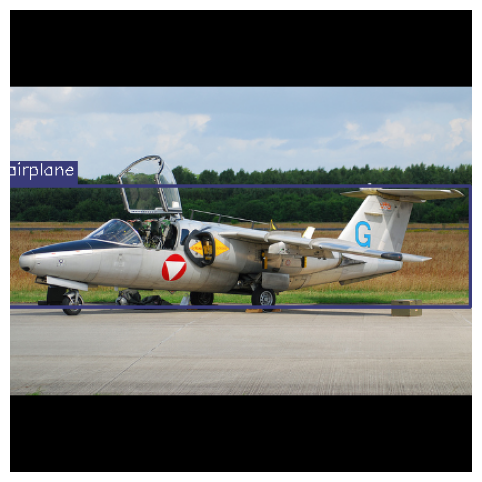

Epoch: 69


  0%|                                                                                                                             | 0/374 [00:07<?, ?it/s, loss=0.0685]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                  | 1/374 [00:32<3:21:37, 32.43s/it, loss=0.0685]

batch_idx: 1


  1%|▉                                                                                                                  | 3/374 [00:45<1:16:59, 12.45s/it, loss=0.0867]

batch_idx: 2


  1%|█▏                                                                                                                 | 4/374 [00:53<1:04:54, 10.52s/it, loss=0.0818]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [01:00<56:13,  9.14s/it, loss=0.0732]

batch_idx: 4


  2%|█▉                                                                                                                   | 6/374 [01:07<52:03,  8.49s/it, loss=0.0701]

batch_idx: 5


  2%|██▏                                                                                                                  | 7/374 [01:14<48:52,  7.99s/it, loss=0.0703]

batch_idx: 6


  2%|██▌                                                                                                                  | 8/374 [01:21<47:40,  7.82s/it, loss=0.0766]

batch_idx: 7


  2%|██▊                                                                                                                  | 9/374 [01:28<44:39,  7.34s/it, loss=0.0763]

batch_idx: 8


  3%|███                                                                                                                 | 10/374 [01:35<43:42,  7.20s/it, loss=0.0818]

batch_idx: 9


  3%|███▍                                                                                                                | 11/374 [01:42<43:31,  7.19s/it, loss=0.0805]

batch_idx: 10


  3%|███▋                                                                                                                | 12/374 [01:49<43:10,  7.16s/it, loss=0.0801]

batch_idx: 11


  3%|████                                                                                                                | 13/374 [01:57<44:28,  7.39s/it, loss=0.0849]

batch_idx: 12


  4%|████▎                                                                                                               | 14/374 [02:04<43:35,  7.27s/it, loss=0.0828]

batch_idx: 13


  4%|████▋                                                                                                               | 15/374 [02:11<43:40,  7.30s/it, loss=0.0831]

batch_idx: 14


  4%|████▉                                                                                                               | 16/374 [02:18<42:05,  7.05s/it, loss=0.0852]

batch_idx: 15


  5%|█████▎                                                                                                              | 17/374 [02:25<41:59,  7.06s/it, loss=0.0854]

batch_idx: 16


  5%|█████▌                                                                                                              | 18/374 [02:32<41:49,  7.05s/it, loss=0.0856]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [02:38<40:56,  6.92s/it, loss=0.0834]

batch_idx: 18


  5%|██████▏                                                                                                             | 20/374 [02:45<41:14,  6.99s/it, loss=0.0831]

batch_idx: 19


  6%|██████▌                                                                                                             | 21/374 [02:53<42:21,  7.20s/it, loss=0.0837]

batch_idx: 20


  6%|██████▊                                                                                                             | 22/374 [03:00<42:11,  7.19s/it, loss=0.0839]

batch_idx: 21


  6%|███████▏                                                                                                            | 23/374 [03:07<40:57,  7.00s/it, loss=0.0836]

batch_idx: 22


  6%|███████▍                                                                                                            | 24/374 [03:14<40:50,  7.00s/it, loss=0.0844]

batch_idx: 23


  7%|███████▊                                                                                                            | 25/374 [03:21<40:34,  6.98s/it, loss=0.0831]

batch_idx: 24


  7%|████████                                                                                                            | 26/374 [03:27<39:48,  6.86s/it, loss=0.0859]

batch_idx: 25


  7%|████████▎                                                                                                           | 27/374 [03:35<40:18,  6.97s/it, loss=0.0863]

batch_idx: 26


  7%|████████▋                                                                                                           | 28/374 [03:42<40:30,  7.02s/it, loss=0.0847]

batch_idx: 27


  8%|████████▉                                                                                                           | 29/374 [03:49<40:40,  7.07s/it, loss=0.0866]

batch_idx: 28


  8%|█████████▎                                                                                                          | 30/374 [03:56<40:02,  6.98s/it, loss=0.0862]

batch_idx: 29


  8%|█████████▌                                                                                                          | 31/374 [04:03<39:50,  6.97s/it, loss=0.0882]

batch_idx: 30


  9%|█████████▉                                                                                                          | 32/374 [04:10<40:40,  7.14s/it, loss=0.0897]

batch_idx: 31


  9%|██████████▍                                                                                                           | 33/374 [04:17<39:56,  7.03s/it, loss=0.09]

batch_idx: 32


  9%|██████████▌                                                                                                         | 34/374 [04:24<39:50,  7.03s/it, loss=0.0914]

batch_idx: 33


  9%|██████████▊                                                                                                         | 35/374 [04:31<40:19,  7.14s/it, loss=0.0932]

batch_idx: 34


 10%|███████████▏                                                                                                        | 36/374 [04:39<41:34,  7.38s/it, loss=0.0934]

batch_idx: 35


 10%|███████████▍                                                                                                        | 37/374 [04:47<41:45,  7.43s/it, loss=0.0924]

batch_idx: 36


 10%|███████████▊                                                                                                        | 38/374 [04:54<40:51,  7.29s/it, loss=0.0925]

batch_idx: 37


 10%|████████████                                                                                                        | 39/374 [05:01<39:58,  7.16s/it, loss=0.0935]

batch_idx: 38


 11%|████████████▍                                                                                                       | 40/374 [05:08<39:50,  7.16s/it, loss=0.0926]

batch_idx: 39


 11%|████████████▋                                                                                                       | 41/374 [05:15<39:15,  7.07s/it, loss=0.0935]

batch_idx: 40


 11%|█████████████                                                                                                       | 42/374 [05:22<40:00,  7.23s/it, loss=0.0928]

batch_idx: 41


 11%|█████████████▎                                                                                                      | 43/374 [05:29<39:15,  7.12s/it, loss=0.0926]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:37<40:07,  7.30s/it, loss=0.092]

batch_idx: 43


 12%|█████████████▉                                                                                                      | 45/374 [05:44<39:49,  7.26s/it, loss=0.0926]

batch_idx: 44


 12%|██████████████▎                                                                                                     | 46/374 [05:51<39:32,  7.23s/it, loss=0.0922]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:58<38:58,  7.15s/it, loss=0.092]

batch_idx: 46


 13%|██████████████▉                                                                                                     | 48/374 [06:05<38:49,  7.15s/it, loss=0.0914]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [06:13<39:37,  7.32s/it, loss=0.091]

batch_idx: 48


 13%|███████████████▌                                                                                                    | 50/374 [06:20<39:42,  7.35s/it, loss=0.0906]

batch_idx: 49


 14%|███████████████▊                                                                                                    | 51/374 [06:27<38:34,  7.17s/it, loss=0.0901]

batch_idx: 50


 14%|████████████████▏                                                                                                   | 52/374 [06:36<40:26,  7.54s/it, loss=0.0897]

batch_idx: 51


 14%|████████████████▍                                                                                                   | 53/374 [06:43<39:34,  7.40s/it, loss=0.0892]

batch_idx: 52


 14%|████████████████▋                                                                                                   | 54/374 [06:50<39:03,  7.32s/it, loss=0.0893]

batch_idx: 53


 15%|█████████████████                                                                                                   | 55/374 [06:57<38:09,  7.18s/it, loss=0.0897]

batch_idx: 54


 15%|█████████████████▋                                                                                                    | 56/374 [07:04<38:40,  7.30s/it, loss=0.09]

batch_idx: 55


 15%|█████████████████▋                                                                                                  | 57/374 [07:11<38:08,  7.22s/it, loss=0.0896]

batch_idx: 56


 16%|█████████████████▉                                                                                                  | 58/374 [07:19<38:11,  7.25s/it, loss=0.0891]

batch_idx: 57


 16%|██████████████████▎                                                                                                 | 59/374 [07:26<38:38,  7.36s/it, loss=0.0886]

batch_idx: 58


 16%|██████████████████▌                                                                                                 | 60/374 [07:34<38:50,  7.42s/it, loss=0.0881]

batch_idx: 59


 16%|██████████████████▉                                                                                                 | 61/374 [07:41<38:10,  7.32s/it, loss=0.0875]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:48<37:06,  7.14s/it, loss=0.087]

batch_idx: 61


 17%|███████████████████▌                                                                                                | 63/374 [07:54<36:38,  7.07s/it, loss=0.0866]

batch_idx: 62


 17%|███████████████████▊                                                                                                | 64/374 [08:02<36:43,  7.11s/it, loss=0.0873]

batch_idx: 63


 17%|████████████████████▏                                                                                               | 65/374 [08:09<36:51,  7.16s/it, loss=0.0876]

batch_idx: 64


 18%|████████████████████▍                                                                                               | 66/374 [08:17<37:30,  7.31s/it, loss=0.0883]

batch_idx: 65


 18%|████████████████████▊                                                                                               | 67/374 [08:24<37:30,  7.33s/it, loss=0.0888]

batch_idx: 66


 18%|█████████████████████                                                                                               | 68/374 [08:31<37:36,  7.37s/it, loss=0.0887]

batch_idx: 67


 18%|█████████████████████▍                                                                                              | 69/374 [08:39<37:07,  7.30s/it, loss=0.0885]

batch_idx: 68


 19%|█████████████████████▋                                                                                              | 70/374 [08:45<35:52,  7.08s/it, loss=0.0882]

batch_idx: 69


 19%|██████████████████████                                                                                              | 71/374 [08:52<35:04,  6.95s/it, loss=0.0878]

batch_idx: 70


 19%|██████████████████████▎                                                                                             | 72/374 [08:59<34:58,  6.95s/it, loss=0.0879]

batch_idx: 71


 20%|██████████████████████▋                                                                                             | 73/374 [09:06<34:51,  6.95s/it, loss=0.0888]

batch_idx: 72


 20%|██████████████████████▉                                                                                             | 74/374 [09:12<34:25,  6.89s/it, loss=0.0886]

batch_idx: 73


 20%|███████████████████████▎                                                                                            | 75/374 [09:19<34:13,  6.87s/it, loss=0.0884]

batch_idx: 74


 20%|███████████████████████▌                                                                                            | 76/374 [09:26<34:29,  6.95s/it, loss=0.0885]

batch_idx: 75


 21%|███████████████████████▉                                                                                            | 77/374 [09:33<34:39,  7.00s/it, loss=0.0888]

batch_idx: 76


 21%|████████████████████████▏                                                                                           | 78/374 [09:40<34:27,  6.98s/it, loss=0.0889]

batch_idx: 77


 21%|████████████████████████▋                                                                                            | 79/374 [09:47<33:46,  6.87s/it, loss=0.089]

batch_idx: 78


 21%|████████████████████████▊                                                                                           | 80/374 [09:54<33:45,  6.89s/it, loss=0.0891]

batch_idx: 79


 22%|█████████████████████████▎                                                                                           | 81/374 [10:00<33:01,  6.76s/it, loss=0.089]

batch_idx: 80


 22%|█████████████████████████▍                                                                                          | 82/374 [10:08<33:33,  6.90s/it, loss=0.0887]

batch_idx: 81


 22%|█████████████████████████▋                                                                                          | 83/374 [10:15<33:45,  6.96s/it, loss=0.0887]

batch_idx: 82


 22%|██████████████████████████                                                                                          | 84/374 [10:22<33:46,  6.99s/it, loss=0.0884]

batch_idx: 83


 23%|██████████████████████████▎                                                                                         | 85/374 [10:29<33:43,  7.00s/it, loss=0.0885]

batch_idx: 84


 23%|██████████████████████████▋                                                                                         | 86/374 [10:35<32:33,  6.78s/it, loss=0.0886]

batch_idx: 85


 23%|██████████████████████████▉                                                                                         | 87/374 [10:43<33:23,  6.98s/it, loss=0.0887]

batch_idx: 86


 24%|███████████████████████████▎                                                                                        | 88/374 [10:50<33:21,  7.00s/it, loss=0.0884]

batch_idx: 87


 24%|███████████████████████████▌                                                                                        | 89/374 [10:56<33:06,  6.97s/it, loss=0.0881]

batch_idx: 88


 24%|███████████████████████████▉                                                                                        | 90/374 [11:04<33:23,  7.06s/it, loss=0.0884]

batch_idx: 89


 24%|████████████████████████████▏                                                                                       | 91/374 [11:11<33:54,  7.19s/it, loss=0.0882]

batch_idx: 90


 25%|████████████████████████████▌                                                                                       | 92/374 [11:18<33:43,  7.18s/it, loss=0.0881]

batch_idx: 91


 25%|████████████████████████████▊                                                                                       | 93/374 [11:25<32:28,  6.94s/it, loss=0.0881]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:32<32:36,  6.99s/it, loss=0.088]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:39<32:30,  6.99s/it, loss=0.088]

batch_idx: 94


 26%|█████████████████████████████▊                                                                                      | 96/374 [11:46<32:45,  7.07s/it, loss=0.0881]

batch_idx: 95


 26%|██████████████████████████████                                                                                      | 97/374 [11:53<33:01,  7.15s/it, loss=0.0881]

batch_idx: 96


 26%|██████████████████████████████▍                                                                                     | 98/374 [12:00<32:01,  6.96s/it, loss=0.0881]

batch_idx: 97


 26%|██████████████████████████████▋                                                                                     | 99/374 [12:07<31:34,  6.89s/it, loss=0.0876]

batch_idx: 98


 27%|██████████████████████████████▋                                                                                    | 100/374 [12:14<32:01,  7.01s/it, loss=0.0875]

batch_idx: 99


 27%|███████████████████████████████                                                                                    | 101/374 [12:20<30:55,  6.80s/it, loss=0.0877]

batch_idx: 100


 27%|███████████████████████████████▎                                                                                   | 102/374 [12:28<31:42,  7.00s/it, loss=0.0875]

batch_idx: 101


 28%|███████████████████████████████▋                                                                                   | 103/374 [12:35<31:34,  6.99s/it, loss=0.0875]

batch_idx: 102


 28%|███████████████████████████████▉                                                                                   | 104/374 [12:42<31:26,  6.99s/it, loss=0.0873]

batch_idx: 103


 28%|████████████████████████████████▎                                                                                  | 105/374 [12:49<31:28,  7.02s/it, loss=0.0872]

batch_idx: 104


 28%|████████████████████████████████▌                                                                                  | 106/374 [12:55<30:46,  6.89s/it, loss=0.0877]

batch_idx: 105


 29%|████████████████████████████████▉                                                                                  | 107/374 [13:03<31:12,  7.01s/it, loss=0.0875]

batch_idx: 106


 29%|█████████████████████████████████▏                                                                                 | 108/374 [13:10<31:02,  7.00s/it, loss=0.0878]

batch_idx: 107


 29%|█████████████████████████████████▌                                                                                 | 109/374 [13:17<30:49,  6.98s/it, loss=0.0879]

batch_idx: 108


 29%|█████████████████████████████████▊                                                                                 | 110/374 [13:24<30:56,  7.03s/it, loss=0.0877]

batch_idx: 109


 30%|██████████████████████████████████▍                                                                                 | 111/374 [13:30<30:16,  6.91s/it, loss=0.088]

batch_idx: 110


 30%|██████████████████████████████████▍                                                                                | 112/374 [13:38<30:44,  7.04s/it, loss=0.0879]

batch_idx: 111


 30%|██████████████████████████████████▋                                                                                | 113/374 [13:45<31:23,  7.22s/it, loss=0.0884]

batch_idx: 112


 30%|███████████████████████████████████                                                                                | 114/374 [13:52<31:01,  7.16s/it, loss=0.0883]

batch_idx: 113


 31%|███████████████████████████████████▎                                                                               | 115/374 [14:00<31:42,  7.35s/it, loss=0.0882]

batch_idx: 114


 31%|███████████████████████████████████▋                                                                               | 116/374 [14:07<31:19,  7.29s/it, loss=0.0883]

batch_idx: 115


 31%|███████████████████████████████████▉                                                                               | 117/374 [14:14<30:39,  7.16s/it, loss=0.0883]

batch_idx: 116


 32%|████████████████████████████████████▎                                                                              | 118/374 [14:21<29:40,  6.95s/it, loss=0.0879]

batch_idx: 117


 32%|████████████████████████████████████▌                                                                              | 119/374 [14:27<28:39,  6.74s/it, loss=0.0878]

batch_idx: 118


 32%|████████████████████████████████████▉                                                                              | 120/374 [14:34<28:52,  6.82s/it, loss=0.0886]

batch_idx: 119


 32%|█████████████████████████████████████▏                                                                             | 121/374 [14:41<29:21,  6.96s/it, loss=0.0888]

batch_idx: 120


 33%|█████████████████████████████████████▌                                                                             | 122/374 [14:48<29:37,  7.05s/it, loss=0.0887]

batch_idx: 121


 33%|█████████████████████████████████████▊                                                                             | 123/374 [14:56<30:31,  7.30s/it, loss=0.0886]

batch_idx: 122


 33%|██████████████████████████████████████▏                                                                            | 124/374 [15:03<30:05,  7.22s/it, loss=0.0886]

batch_idx: 123


 33%|██████████████████████████████████████▍                                                                            | 125/374 [15:11<30:07,  7.26s/it, loss=0.0884]

batch_idx: 124


 34%|██████████████████████████████████████▋                                                                            | 126/374 [15:18<29:55,  7.24s/it, loss=0.0886]

batch_idx: 125


 34%|███████████████████████████████████████                                                                            | 127/374 [15:27<32:25,  7.88s/it, loss=0.0884]

batch_idx: 126


 34%|███████████████████████████████████████▎                                                                           | 128/374 [15:34<30:40,  7.48s/it, loss=0.0887]

batch_idx: 127


 34%|███████████████████████████████████████▋                                                                           | 129/374 [15:41<30:13,  7.40s/it, loss=0.0891]

batch_idx: 128


 35%|███████████████████████████████████████▉                                                                           | 130/374 [15:48<29:58,  7.37s/it, loss=0.0889]

batch_idx: 129


 35%|████████████████████████████████████████▎                                                                          | 131/374 [15:55<28:27,  7.03s/it, loss=0.0886]

batch_idx: 130


 35%|████████████████████████████████████████▌                                                                          | 132/374 [16:01<28:10,  6.99s/it, loss=0.0883]

batch_idx: 131


 36%|████████████████████████████████████████▉                                                                          | 133/374 [16:09<28:35,  7.12s/it, loss=0.0888]

batch_idx: 132


 36%|█████████████████████████████████████████▏                                                                         | 134/374 [16:16<28:20,  7.09s/it, loss=0.0886]

batch_idx: 133


 36%|█████████████████████████████████████████▌                                                                         | 135/374 [16:23<28:23,  7.13s/it, loss=0.0886]

batch_idx: 134


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [16:30<27:26,  6.92s/it, loss=0.0884]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [16:37<27:37,  6.99s/it, loss=0.0882]

batch_idx: 136


 37%|██████████████████████████████████████████▊                                                                         | 138/374 [16:43<26:43,  6.80s/it, loss=0.088]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [16:50<27:17,  6.97s/it, loss=0.0878]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [16:57<27:02,  6.93s/it, loss=0.0876]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [17:04<27:11,  7.00s/it, loss=0.0879]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [17:12<27:18,  7.06s/it, loss=0.0877]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [17:19<27:01,  7.02s/it, loss=0.0875]

batch_idx: 142


 39%|████████████████████████████████████████████▎                                                                      | 144/374 [17:26<27:09,  7.09s/it, loss=0.0873]

batch_idx: 143


 39%|████████████████████████████████████████████▌                                                                      | 145/374 [17:32<26:29,  6.94s/it, loss=0.0872]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:40<26:43,  7.03s/it, loss=0.087]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [17:46<26:19,  6.96s/it, loss=0.0871]

batch_idx: 146


 40%|█████████████████████████████████████████████▉                                                                      | 148/374 [17:53<25:59,  6.90s/it, loss=0.087]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [18:01<26:32,  7.08s/it, loss=0.0868]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [18:08<26:36,  7.13s/it, loss=0.0871]

batch_idx: 149


 40%|██████████████████████████████████████████████▊                                                                     | 151/374 [18:15<26:17,  7.08s/it, loss=0.087]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [18:22<26:00,  7.03s/it, loss=0.0871]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:29<26:02,  7.07s/it, loss=0.088]

batch_idx: 152


 41%|███████████████████████████████████████████████▎                                                                   | 154/374 [18:36<26:19,  7.18s/it, loss=0.0879]

batch_idx: 153


 41%|███████████████████████████████████████████████▋                                                                   | 155/374 [18:43<25:26,  6.97s/it, loss=0.0882]

batch_idx: 154


 42%|███████████████████████████████████████████████▉                                                                   | 156/374 [18:51<26:59,  7.43s/it, loss=0.0882]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [18:59<26:51,  7.43s/it, loss=0.0879]

batch_idx: 156


 42%|████████████████████████████████████████████████▌                                                                  | 158/374 [19:06<26:14,  7.29s/it, loss=0.0878]

batch_idx: 157


 43%|████████████████████████████████████████████████▉                                                                  | 159/374 [19:13<26:14,  7.32s/it, loss=0.0879]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [19:19<24:58,  7.00s/it, loss=0.0881]

batch_idx: 159


 43%|█████████████████████████████████████████████████▌                                                                 | 161/374 [19:26<24:49,  6.99s/it, loss=0.0884]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [19:33<24:44,  7.00s/it, loss=0.0888]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [19:40<24:14,  6.89s/it, loss=0.0886]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [19:47<24:37,  7.03s/it, loss=0.0886]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [19:55<24:37,  7.07s/it, loss=0.0888]

batch_idx: 164


 44%|███████████████████████████████████████████████████                                                                | 166/374 [20:01<24:03,  6.94s/it, loss=0.0886]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [20:09<24:51,  7.21s/it, loss=0.0888]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [20:16<24:35,  7.16s/it, loss=0.0891]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [20:23<24:04,  7.05s/it, loss=0.0894]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [20:31<25:02,  7.36s/it, loss=0.0893]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [20:38<24:36,  7.27s/it, loss=0.0891]

batch_idx: 170


 46%|████████████████████████████████████████████████████▉                                                              | 172/374 [20:45<24:33,  7.29s/it, loss=0.0897]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [20:53<24:38,  7.36s/it, loss=0.0898]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▌                                                             | 174/374 [21:00<24:02,  7.21s/it, loss=0.0898]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [21:07<23:44,  7.16s/it, loss=0.0899]

batch_idx: 174


 47%|██████████████████████████████████████████████████████                                                             | 176/374 [21:14<23:14,  7.04s/it, loss=0.0897]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▍                                                            | 177/374 [21:22<24:28,  7.46s/it, loss=0.0899]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [21:29<24:02,  7.36s/it, loss=0.0897]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [21:36<23:17,  7.17s/it, loss=0.0897]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [21:43<23:16,  7.20s/it, loss=0.0896]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [21:50<23:01,  7.16s/it, loss=0.0896]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [21:58<23:10,  7.24s/it, loss=0.0897]

batch_idx: 181


 49%|█████████████████████████████████████████████████████████▏                                                           | 183/374 [22:05<23:05,  7.25s/it, loss=0.09]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [22:12<22:51,  7.22s/it, loss=0.0899]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [22:19<22:00,  6.99s/it, loss=0.0899]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [22:25<21:49,  6.97s/it, loss=0.0897]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [22:33<22:32,  7.23s/it, loss=0.0895]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [22:41<22:28,  7.25s/it, loss=0.0894]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [22:48<22:38,  7.34s/it, loss=0.0893]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [22:55<22:08,  7.22s/it, loss=0.0892]

batch_idx: 189


 51%|██████████████████████████████████████████████████████████▋                                                        | 191/374 [23:02<22:06,  7.25s/it, loss=0.0896]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████                                                        | 192/374 [23:09<21:44,  7.17s/it, loss=0.0897]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▎                                                       | 193/374 [23:16<21:09,  7.02s/it, loss=0.0895]

batch_idx: 192


 52%|███████████████████████████████████████████████████████████▋                                                       | 194/374 [23:23<20:49,  6.94s/it, loss=0.0896]

batch_idx: 193


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [23:30<20:51,  6.99s/it, loss=0.0896]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [23:37<20:48,  7.02s/it, loss=0.0896]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [23:44<20:45,  7.04s/it, loss=0.0894]

batch_idx: 196


 53%|████████████████████████████████████████████████████████████▉                                                      | 198/374 [23:51<20:32,  7.00s/it, loss=0.0895]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [23:58<20:37,  7.07s/it, loss=0.0897]

batch_idx: 198


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [24:05<20:33,  7.09s/it, loss=0.0896]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [24:13<20:33,  7.09s/it, loss=0.0898]

batch_idx: 200
==> Saving checkpoint


 54%|█████████████████████████████████████████████████████████████▊                                                     | 201/374 [24:29<35:06, 12.18s/it, loss=0.0898]

batch_idx: 201


 54%|███████████████████████████████████████████████████████████████▌                                                     | 203/374 [24:43<27:15,  9.56s/it, loss=0.09]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [24:50<24:44,  8.73s/it, loss=0.0899]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [24:57<23:03,  8.19s/it, loss=0.0897]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▎                                                   | 206/374 [25:04<22:05,  7.89s/it, loss=0.0897]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [25:12<21:20,  7.67s/it, loss=0.0896]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [25:18<20:08,  7.28s/it, loss=0.0895]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▎                                                  | 209/374 [25:25<19:33,  7.11s/it, loss=0.0893]

batch_idx: 208


 56%|████████████████████████████████████████████████████████████████▌                                                  | 210/374 [25:32<19:35,  7.17s/it, loss=0.0894]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [25:39<19:15,  7.09s/it, loss=0.0894]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [25:46<19:17,  7.15s/it, loss=0.0895]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [25:54<19:29,  7.26s/it, loss=0.0894]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [26:01<19:10,  7.19s/it, loss=0.0893]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [26:08<19:00,  7.17s/it, loss=0.0892]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▍                                                | 216/374 [26:15<18:41,  7.10s/it, loss=0.0893]

batch_idx: 215


 58%|██████████████████████████████████████████████████████████████████▋                                                | 217/374 [26:21<18:15,  6.98s/it, loss=0.0898]

batch_idx: 216


 58%|████████████████████████████████████████████████████████████████████▏                                                | 218/374 [26:29<18:19,  7.04s/it, loss=0.09]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [26:36<18:14,  7.06s/it, loss=0.0899]

batch_idx: 218


 59%|███████████████████████████████████████████████████████████████████▋                                               | 220/374 [26:43<18:15,  7.12s/it, loss=0.0898]

batch_idx: 219


 59%|███████████████████████████████████████████████████████████████████▉                                               | 221/374 [26:50<18:01,  7.07s/it, loss=0.0896]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▎                                              | 222/374 [26:57<17:59,  7.11s/it, loss=0.0897]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [27:04<17:50,  7.09s/it, loss=0.0898]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [27:11<17:36,  7.04s/it, loss=0.0896]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 225/374 [27:18<17:13,  6.94s/it, loss=0.0895]

batch_idx: 224


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 226/374 [27:25<17:17,  7.01s/it, loss=0.0895]

batch_idx: 225


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 227/374 [27:32<17:00,  6.94s/it, loss=0.0894]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████                                             | 228/374 [27:39<17:05,  7.03s/it, loss=0.0895]

batch_idx: 227


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 229/374 [27:46<16:59,  7.03s/it, loss=0.0893]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [27:53<16:55,  7.05s/it, loss=0.0892]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████                                            | 231/374 [28:00<16:45,  7.03s/it, loss=0.0892]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 232/374 [28:07<16:33,  7.00s/it, loss=0.0893]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [28:13<16:03,  6.83s/it, loss=0.0893]

batch_idx: 232


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 234/374 [28:20<16:02,  6.87s/it, loss=0.0892]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [28:28<16:17,  7.03s/it, loss=0.0891]

batch_idx: 234


 63%|█████████████████████████████████████████████████████████████████████████▏                                          | 236/374 [28:34<15:54,  6.91s/it, loss=0.089]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:41<15:35,  6.83s/it, loss=0.089]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [28:48<15:31,  6.85s/it, loss=0.0891]

batch_idx: 237


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 239/374 [28:55<15:25,  6.86s/it, loss=0.0892]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [29:02<15:28,  6.93s/it, loss=0.0892]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [29:09<15:27,  6.98s/it, loss=0.0892]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [29:16<15:27,  7.03s/it, loss=0.0893]

batch_idx: 241


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 243/374 [29:23<15:17,  7.01s/it, loss=0.0894]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████                                        | 244/374 [29:30<15:11,  7.01s/it, loss=0.0895]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [29:36<14:24,  6.70s/it, loss=0.0894]

batch_idx: 244


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 246/374 [29:43<14:16,  6.69s/it, loss=0.0895]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [29:50<14:17,  6.75s/it, loss=0.0897]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▎                                      | 248/374 [29:57<14:11,  6.76s/it, loss=0.0897]

batch_idx: 247


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 249/374 [30:04<14:19,  6.88s/it, loss=0.0896]

batch_idx: 248


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 250/374 [30:11<14:17,  6.91s/it, loss=0.0896]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 251/374 [30:18<14:29,  7.07s/it, loss=0.0895]

batch_idx: 250


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 252/374 [30:25<14:12,  6.99s/it, loss=0.0894]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [30:32<14:15,  7.07s/it, loss=0.0895]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [30:39<14:03,  7.03s/it, loss=0.0894]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [30:46<13:51,  6.99s/it, loss=0.0897]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [30:53<13:44,  6.99s/it, loss=0.0897]

batch_idx: 255


 69%|████████████████████████████████████████████████████████████████████████████████▍                                    | 257/374 [31:00<13:32,  6.94s/it, loss=0.09]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [31:06<13:13,  6.84s/it, loss=0.0902]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [31:14<13:40,  7.13s/it, loss=0.0901]

batch_idx: 258


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                   | 260/374 [31:22<13:48,  7.26s/it, loss=0.09]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [31:29<13:25,  7.13s/it, loss=0.0902]

batch_idx: 260


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 262/374 [31:35<13:08,  7.04s/it, loss=0.0903]

batch_idx: 261


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 263/374 [31:42<12:59,  7.03s/it, loss=0.0902]

batch_idx: 262


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                  | 264/374 [31:49<12:45,  6.95s/it, loss=0.09]

batch_idx: 263


 71%|██████████████████████████████████████████████████████████████████████████████████▉                                  | 265/374 [31:57<12:52,  7.08s/it, loss=0.09]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [32:04<13:00,  7.23s/it, loss=0.0901]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [32:11<12:50,  7.20s/it, loss=0.0903]

batch_idx: 266


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 268/374 [32:19<12:47,  7.24s/it, loss=0.0903]

batch_idx: 267


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 269/374 [32:25<12:23,  7.08s/it, loss=0.0904]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [32:32<12:14,  7.06s/it, loss=0.0903]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [32:39<11:51,  6.91s/it, loss=0.0905]

batch_idx: 270


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 272/374 [32:46<11:41,  6.88s/it, loss=0.0904]

batch_idx: 271


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 273/374 [32:53<11:35,  6.89s/it, loss=0.0904]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [33:00<11:32,  6.92s/it, loss=0.0902]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [33:06<11:11,  6.79s/it, loss=0.0901]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [33:13<11:16,  6.90s/it, loss=0.0901]

batch_idx: 275


 74%|██████████████████████████████████████████████████████████████████████████████████████▋                              | 277/374 [33:20<10:58,  6.79s/it, loss=0.09]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [33:27<11:13,  7.02s/it, loss=0.0901]

batch_idx: 277


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 279/374 [33:35<11:13,  7.09s/it, loss=0.0901]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 280/374 [33:42<11:06,  7.09s/it, loss=0.0901]

batch_idx: 279


 75%|███████████████████████████████████████████████████████████████████████████████████████▉                             | 281/374 [33:48<10:46,  6.95s/it, loss=0.09]

batch_idx: 280


 75%|████████████████████████████████████████████████████████████████████████████████████████▏                            | 282/374 [33:55<10:36,  6.92s/it, loss=0.09]

batch_idx: 281


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                            | 283/374 [34:02<10:33,  6.97s/it, loss=0.09]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████▊                            | 284/374 [34:09<10:29,  7.00s/it, loss=0.09]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [34:16<10:23,  7.00s/it, loss=0.0903]

batch_idx: 284


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 286/374 [34:24<10:20,  7.05s/it, loss=0.0904]

batch_idx: 285


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 287/374 [34:30<09:59,  6.90s/it, loss=0.0904]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [34:37<10:04,  7.03s/it, loss=0.0906]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [34:45<10:04,  7.12s/it, loss=0.0906]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 290/374 [34:52<09:49,  7.02s/it, loss=0.0906]

batch_idx: 289


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 291/374 [34:59<09:48,  7.09s/it, loss=0.0905]

batch_idx: 290


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 292/374 [35:06<09:45,  7.14s/it, loss=0.0905]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 293/374 [35:14<09:53,  7.32s/it, loss=0.0906]

batch_idx: 292


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 294/374 [35:21<09:54,  7.43s/it, loss=0.0906]

batch_idx: 293


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [35:29<09:46,  7.43s/it, loss=0.0906]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 296/374 [35:36<09:30,  7.32s/it, loss=0.0904]

batch_idx: 295


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 297/374 [35:43<09:25,  7.34s/it, loss=0.0907]

batch_idx: 296


 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 298/374 [35:51<09:29,  7.50s/it, loss=0.0905]

batch_idx: 297


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 299/374 [35:59<09:18,  7.45s/it, loss=0.0905]

batch_idx: 298


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 300/374 [36:06<09:02,  7.34s/it, loss=0.0905]

batch_idx: 299


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 301/374 [36:13<08:58,  7.38s/it, loss=0.0905]

batch_idx: 300


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 302/374 [36:20<08:44,  7.28s/it, loss=0.0904]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 303/374 [36:27<08:33,  7.23s/it, loss=0.0905]

batch_idx: 302


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 304/374 [36:35<08:29,  7.28s/it, loss=0.0904]

batch_idx: 303


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 305/374 [36:41<08:09,  7.09s/it, loss=0.0903]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 306/374 [36:48<08:02,  7.09s/it, loss=0.0904]

batch_idx: 305


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 307/374 [36:55<07:54,  7.08s/it, loss=0.0903]

batch_idx: 306


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 308/374 [37:03<07:50,  7.13s/it, loss=0.0902]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 309/374 [37:10<07:40,  7.08s/it, loss=0.0904]

batch_idx: 308


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 310/374 [37:17<07:32,  7.07s/it, loss=0.0907]

batch_idx: 309


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 311/374 [37:24<07:25,  7.07s/it, loss=0.0908]

batch_idx: 310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 312/374 [37:30<07:09,  6.93s/it, loss=0.0907]

batch_idx: 311


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 313/374 [37:37<07:05,  6.97s/it, loss=0.0907]

batch_idx: 312


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 314/374 [37:44<06:51,  6.85s/it, loss=0.0907]

batch_idx: 313


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 315/374 [37:51<06:45,  6.87s/it, loss=0.0908]

batch_idx: 314


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 316/374 [37:58<06:48,  7.05s/it, loss=0.0907]

batch_idx: 315


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 317/374 [38:05<06:41,  7.04s/it, loss=0.0906]

batch_idx: 316


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 318/374 [38:13<06:40,  7.15s/it, loss=0.0906]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 319/374 [38:20<06:33,  7.15s/it, loss=0.0905]

batch_idx: 318


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 320/374 [38:27<06:20,  7.04s/it, loss=0.0907]

batch_idx: 319


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 321/374 [38:34<06:09,  6.98s/it, loss=0.0906]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 322/374 [38:40<06:00,  6.94s/it, loss=0.0907]

batch_idx: 321


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 323/374 [38:48<05:57,  7.01s/it, loss=0.0907]

batch_idx: 322


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 324/374 [38:55<05:56,  7.14s/it, loss=0.0907]

batch_idx: 323


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 325/374 [39:02<05:45,  7.05s/it, loss=0.0907]

batch_idx: 324


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 326/374 [39:09<05:39,  7.06s/it, loss=0.0906]

batch_idx: 325


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 327/374 [39:16<05:31,  7.05s/it, loss=0.0905]

batch_idx: 326


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 328/374 [39:23<05:27,  7.11s/it, loss=0.0905]

batch_idx: 327


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 329/374 [39:30<05:15,  7.00s/it, loss=0.0904]

batch_idx: 328


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 330/374 [39:37<05:04,  6.93s/it, loss=0.0904]

batch_idx: 329


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 331/374 [39:44<04:59,  6.97s/it, loss=0.0904]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 332/374 [39:51<04:50,  6.93s/it, loss=0.0904]

batch_idx: 331


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 333/374 [39:57<04:40,  6.85s/it, loss=0.0904]

batch_idx: 332


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 334/374 [40:04<04:34,  6.87s/it, loss=0.0903]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 335/374 [40:11<04:29,  6.92s/it, loss=0.0901]

batch_idx: 334


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████            | 336/374 [40:19<04:29,  7.09s/it, loss=0.09]

batch_idx: 335


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:25<04:11,  6.80s/it, loss=0.0902]

batch_idx: 336


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 338/374 [40:32<04:11,  6.99s/it, loss=0.0903]

batch_idx: 337


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:39<03:59,  6.83s/it, loss=0.0904]

batch_idx: 338


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 340/374 [40:46<03:54,  6.89s/it, loss=0.0904]

batch_idx: 339


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:53<03:49,  6.94s/it, loss=0.0904]

batch_idx: 340


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 342/374 [41:00<03:39,  6.87s/it, loss=0.0904]

batch_idx: 341


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [41:06<03:32,  6.86s/it, loss=0.0903]

batch_idx: 342


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 344/374 [41:14<03:28,  6.95s/it, loss=0.0903]

batch_idx: 343


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [41:20<03:21,  6.93s/it, loss=0.0903]

batch_idx: 344


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 346/374 [41:28<03:18,  7.08s/it, loss=0.0903]

batch_idx: 345


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:35<03:13,  7.18s/it, loss=0.0904]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 348/374 [41:42<03:05,  7.13s/it, loss=0.0903]

batch_idx: 347


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 349/374 [41:49<02:58,  7.13s/it, loss=0.0903]

batch_idx: 348


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:57<02:52,  7.17s/it, loss=0.0902]

batch_idx: 349


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 351/374 [42:04<02:43,  7.11s/it, loss=0.0901]

batch_idx: 350


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [42:11<02:35,  7.07s/it, loss=0.0902]

batch_idx: 351


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 353/374 [42:17<02:24,  6.87s/it, loss=0.0904]

batch_idx: 352


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [42:24<02:16,  6.85s/it, loss=0.0904]

batch_idx: 353


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 355/374 [42:31<02:10,  6.84s/it, loss=0.0904]

batch_idx: 354


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:38<02:03,  6.86s/it, loss=0.0904]

batch_idx: 355


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 357/374 [42:45<01:57,  6.91s/it, loss=0.0904]

batch_idx: 356


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:52<01:53,  7.06s/it, loss=0.0905]

batch_idx: 357


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 359/374 [43:00<01:48,  7.21s/it, loss=0.0905]

batch_idx: 358


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [43:06<01:39,  7.10s/it, loss=0.0905]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 361/374 [43:13<01:32,  7.08s/it, loss=0.0906]

batch_idx: 360


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [43:21<01:25,  7.15s/it, loss=0.0906]

batch_idx: 361


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [43:27<01:16,  6.99s/it, loss=0.0905]

batch_idx: 362


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:34<01:09,  6.95s/it, loss=0.0904]

batch_idx: 363


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:42<01:03,  7.05s/it, loss=0.0903]

batch_idx: 364


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:49<00:56,  7.06s/it, loss=0.0904]

batch_idx: 365


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:56<00:49,  7.10s/it, loss=0.0904]

batch_idx: 366


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [44:03<00:43,  7.19s/it, loss=0.0904]

batch_idx: 367


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [44:11<00:36,  7.30s/it, loss=0.0903]

batch_idx: 368


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [44:17<00:28,  7.08s/it, loss=0.0905]

batch_idx: 369


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [44:24<00:21,  7.09s/it, loss=0.0904]

batch_idx: 370


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:32<00:14,  7.09s/it, loss=0.0904]

batch_idx: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:39<00:07,  7.13s/it, loss=0.0904]

batch_idx: 372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:40<00:00,  7.17s/it, loss=0.0904]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


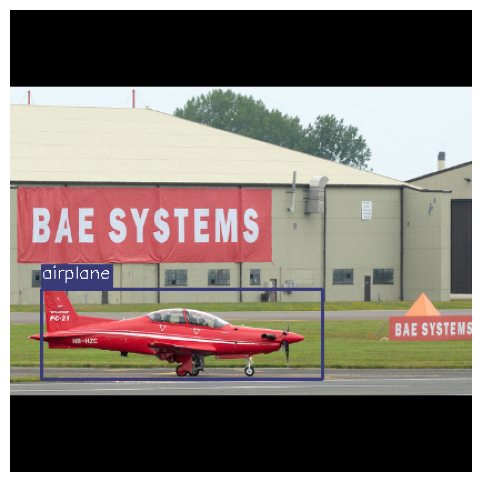

Epoch: 70


  0%|                                                                                                                             | 0/374 [00:07<?, ?it/s, loss=0.0648]

batch_idx: 0
==> Saving checkpoint


  1%|▌                                                                                                                   | 2/374 [00:23<1:07:18, 10.86s/it, loss=0.118]

batch_idx: 1


  1%|▉                                                                                                                     | 3/374 [00:31<57:27,  9.29s/it, loss=0.112]

batch_idx: 2


  1%|█▎                                                                                                                    | 4/374 [00:37<50:44,  8.23s/it, loss=0.103]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [00:44<47:19,  7.70s/it, loss=0.0998]

batch_idx: 4


  2%|█▉                                                                                                                   | 6/374 [00:51<45:17,  7.39s/it, loss=0.0981]

batch_idx: 5


  2%|██▏                                                                                                                  | 7/374 [00:58<44:44,  7.31s/it, loss=0.0972]

batch_idx: 6


  2%|██▌                                                                                                                  | 8/374 [01:05<43:42,  7.16s/it, loss=0.0928]

batch_idx: 7


  2%|██▊                                                                                                                   | 9/374 [01:12<43:48,  7.20s/it, loss=0.093]

batch_idx: 8


  3%|███                                                                                                                 | 10/374 [01:19<43:15,  7.13s/it, loss=0.0934]

batch_idx: 9


  3%|███▍                                                                                                                | 11/374 [01:26<43:22,  7.17s/it, loss=0.0948]

batch_idx: 10


  3%|███▋                                                                                                                | 12/374 [01:33<42:21,  7.02s/it, loss=0.0942]

batch_idx: 11


  3%|████                                                                                                                | 13/374 [01:40<41:52,  6.96s/it, loss=0.0945]

batch_idx: 12


  4%|████▎                                                                                                               | 14/374 [01:47<42:15,  7.04s/it, loss=0.0935]

batch_idx: 13


  4%|████▋                                                                                                               | 15/374 [01:54<41:18,  6.91s/it, loss=0.0943]

batch_idx: 14


  4%|████▉                                                                                                               | 16/374 [02:01<41:41,  6.99s/it, loss=0.0933]

batch_idx: 15


  5%|█████▎                                                                                                              | 17/374 [02:08<41:53,  7.04s/it, loss=0.0924]

batch_idx: 16


  5%|█████▌                                                                                                              | 18/374 [02:14<40:38,  6.85s/it, loss=0.0928]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [02:21<40:58,  6.93s/it, loss=0.0947]

batch_idx: 18


  5%|██████▏                                                                                                             | 20/374 [02:28<40:31,  6.87s/it, loss=0.0947]

batch_idx: 19


  6%|██████▌                                                                                                             | 21/374 [02:35<40:04,  6.81s/it, loss=0.0978]

batch_idx: 20


  6%|██████▊                                                                                                             | 22/374 [02:42<40:18,  6.87s/it, loss=0.0965]

batch_idx: 21


  6%|███████▏                                                                                                            | 23/374 [02:49<39:59,  6.84s/it, loss=0.0968]

batch_idx: 22


  6%|███████▍                                                                                                            | 24/374 [02:55<39:23,  6.75s/it, loss=0.0953]

batch_idx: 23


  7%|███████▊                                                                                                            | 25/374 [03:02<39:55,  6.86s/it, loss=0.0943]

batch_idx: 24


  7%|████████                                                                                                            | 26/374 [03:10<40:31,  6.99s/it, loss=0.0935]

batch_idx: 25


  7%|████████▎                                                                                                           | 27/374 [03:17<40:50,  7.06s/it, loss=0.0941]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [03:23<39:29,  6.85s/it, loss=0.105]

batch_idx: 27


  8%|█████████                                                                                                            | 29/374 [03:30<40:03,  6.97s/it, loss=0.104]

batch_idx: 28


  8%|█████████▍                                                                                                           | 30/374 [03:38<40:22,  7.04s/it, loss=0.104]

batch_idx: 29


  8%|█████████▋                                                                                                           | 31/374 [03:45<40:38,  7.11s/it, loss=0.103]

batch_idx: 30


  9%|██████████                                                                                                           | 32/374 [03:52<40:33,  7.12s/it, loss=0.103]

batch_idx: 31


  9%|██████████▎                                                                                                          | 33/374 [03:59<40:03,  7.05s/it, loss=0.102]

batch_idx: 32


  9%|██████████▋                                                                                                          | 34/374 [04:06<39:33,  6.98s/it, loss=0.104]

batch_idx: 33


  9%|██████████▉                                                                                                          | 35/374 [04:12<38:56,  6.89s/it, loss=0.104]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [04:19<38:33,  6.84s/it, loss=0.104]

batch_idx: 35


 10%|███████████▌                                                                                                         | 37/374 [04:26<39:07,  6.97s/it, loss=0.104]

batch_idx: 36


 10%|███████████▉                                                                                                         | 38/374 [04:34<40:28,  7.23s/it, loss=0.104]

batch_idx: 37


 10%|████████████▏                                                                                                        | 39/374 [04:42<40:52,  7.32s/it, loss=0.103]

batch_idx: 38


 11%|████████████▌                                                                                                        | 40/374 [04:49<40:25,  7.26s/it, loss=0.103]

batch_idx: 39


 11%|████████████▊                                                                                                        | 41/374 [04:56<39:39,  7.15s/it, loss=0.104]

batch_idx: 40


 11%|█████████████▏                                                                                                       | 42/374 [05:03<39:14,  7.09s/it, loss=0.105]

batch_idx: 41


 11%|█████████████▍                                                                                                       | 43/374 [05:10<39:08,  7.10s/it, loss=0.104]

batch_idx: 42


 12%|█████████████▊                                                                                                       | 44/374 [05:17<39:10,  7.12s/it, loss=0.103]

batch_idx: 43


 12%|██████████████                                                                                                       | 45/374 [05:24<38:58,  7.11s/it, loss=0.103]

batch_idx: 44


 12%|██████████████▍                                                                                                      | 46/374 [05:31<38:01,  6.96s/it, loss=0.102]

batch_idx: 45


 13%|██████████████▋                                                                                                      | 47/374 [05:38<38:09,  7.00s/it, loss=0.103]

batch_idx: 46


 13%|███████████████                                                                                                      | 48/374 [05:45<37:58,  6.99s/it, loss=0.103]

batch_idx: 47


 13%|███████████████▎                                                                                                     | 49/374 [05:52<38:30,  7.11s/it, loss=0.103]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [05:59<38:32,  7.14s/it, loss=0.103]

batch_idx: 49


 14%|███████████████▉                                                                                                     | 51/374 [06:06<37:56,  7.05s/it, loss=0.102]

batch_idx: 50


 14%|████████████████▎                                                                                                    | 52/374 [06:13<37:40,  7.02s/it, loss=0.102]

batch_idx: 51


 14%|████████████████▌                                                                                                    | 53/374 [06:20<37:46,  7.06s/it, loss=0.101]

batch_idx: 52


 14%|████████████████▉                                                                                                    | 54/374 [06:28<37:48,  7.09s/it, loss=0.102]

batch_idx: 53


 15%|█████████████████▏                                                                                                   | 55/374 [06:34<37:13,  7.00s/it, loss=0.101]

batch_idx: 54


 15%|█████████████████▌                                                                                                   | 56/374 [06:42<37:36,  7.10s/it, loss=0.101]

batch_idx: 55


 15%|██████████████████▏                                                                                                    | 57/374 [06:49<37:17,  7.06s/it, loss=0.1]

batch_idx: 56


 16%|██████████████████▍                                                                                                    | 58/374 [06:56<37:11,  7.06s/it, loss=0.1]

batch_idx: 57


 16%|██████████████████▎                                                                                                 | 59/374 [07:02<36:26,  6.94s/it, loss=0.0994]

batch_idx: 58


 16%|██████████████████▊                                                                                                  | 60/374 [07:09<36:06,  6.90s/it, loss=0.101]

batch_idx: 59


 16%|███████████████████                                                                                                  | 61/374 [07:16<35:30,  6.81s/it, loss=0.101]

batch_idx: 60


 17%|███████████████████▍                                                                                                 | 62/374 [07:23<35:51,  6.90s/it, loss=0.102]

batch_idx: 61


 17%|███████████████████▋                                                                                                 | 63/374 [07:29<35:03,  6.76s/it, loss=0.101]

batch_idx: 62


 17%|████████████████████▎                                                                                                  | 64/374 [07:36<34:57,  6.77s/it, loss=0.1]

batch_idx: 63


 17%|████████████████████▋                                                                                                  | 65/374 [07:43<34:48,  6.76s/it, loss=0.1]

batch_idx: 64


 18%|█████████████████████                                                                                                  | 66/374 [07:49<34:30,  6.72s/it, loss=0.1]

batch_idx: 65


 18%|████████████████████▊                                                                                               | 67/374 [07:56<34:24,  6.72s/it, loss=0.0999]

batch_idx: 66


 18%|█████████████████████                                                                                               | 68/374 [08:03<34:35,  6.78s/it, loss=0.0994]

batch_idx: 67


 18%|█████████████████████▍                                                                                              | 69/374 [08:11<35:49,  7.05s/it, loss=0.0988]

batch_idx: 68


 19%|█████████████████████▋                                                                                              | 70/374 [08:18<36:02,  7.11s/it, loss=0.0983]

batch_idx: 69


 19%|██████████████████████                                                                                              | 71/374 [08:25<36:22,  7.20s/it, loss=0.0979]

batch_idx: 70


 19%|██████████████████████▎                                                                                             | 72/374 [08:33<36:11,  7.19s/it, loss=0.0977]

batch_idx: 71


 20%|██████████████████████▋                                                                                             | 73/374 [08:40<36:25,  7.26s/it, loss=0.0979]

batch_idx: 72


 20%|██████████████████████▉                                                                                             | 74/374 [08:47<35:29,  7.10s/it, loss=0.0977]

batch_idx: 73


 20%|███████████████████████▎                                                                                            | 75/374 [08:54<35:17,  7.08s/it, loss=0.0977]

batch_idx: 74


 20%|███████████████████████▌                                                                                            | 76/374 [09:00<34:23,  6.92s/it, loss=0.0973]

batch_idx: 75


 21%|███████████████████████▉                                                                                            | 77/374 [09:08<35:11,  7.11s/it, loss=0.0968]

batch_idx: 76


 21%|████████████████████████▏                                                                                           | 78/374 [09:15<35:08,  7.12s/it, loss=0.0967]

batch_idx: 77


 21%|████████████████████████▌                                                                                           | 79/374 [09:22<34:47,  7.08s/it, loss=0.0963]

batch_idx: 78


 21%|█████████████████████████                                                                                            | 80/374 [09:29<34:08,  6.97s/it, loss=0.096]

batch_idx: 79


 22%|█████████████████████████                                                                                           | 81/374 [09:36<34:18,  7.03s/it, loss=0.0961]

batch_idx: 80


 22%|█████████████████████████▍                                                                                          | 82/374 [09:43<34:27,  7.08s/it, loss=0.0961]

batch_idx: 81


 22%|█████████████████████████▋                                                                                          | 83/374 [09:50<34:17,  7.07s/it, loss=0.0958]

batch_idx: 82


 22%|██████████████████████████▎                                                                                          | 84/374 [09:57<33:51,  7.00s/it, loss=0.096]

batch_idx: 83


 23%|██████████████████████████▎                                                                                         | 85/374 [10:04<33:21,  6.93s/it, loss=0.0957]

batch_idx: 84


 23%|██████████████████████████▋                                                                                         | 86/374 [10:10<33:00,  6.88s/it, loss=0.0959]

batch_idx: 85


 23%|██████████████████████████▉                                                                                         | 87/374 [10:17<32:54,  6.88s/it, loss=0.0957]

batch_idx: 86


 24%|███████████████████████████▎                                                                                        | 88/374 [10:24<32:21,  6.79s/it, loss=0.0953]

batch_idx: 87


 24%|███████████████████████████▌                                                                                        | 89/374 [10:31<32:00,  6.74s/it, loss=0.0949]

batch_idx: 88


 24%|███████████████████████████▉                                                                                        | 90/374 [10:38<32:59,  6.97s/it, loss=0.0951]

batch_idx: 89


 24%|████████████████████████████▏                                                                                       | 91/374 [10:45<33:20,  7.07s/it, loss=0.0959]

batch_idx: 90


 25%|████████████████████████████▊                                                                                        | 92/374 [10:53<33:27,  7.12s/it, loss=0.096]

batch_idx: 91


 25%|████████████████████████████▊                                                                                       | 93/374 [11:00<33:24,  7.13s/it, loss=0.0959]

batch_idx: 92


 25%|█████████████████████████████▍                                                                                       | 94/374 [11:07<33:13,  7.12s/it, loss=0.096]

batch_idx: 93


 25%|█████████████████████████████▍                                                                                      | 95/374 [11:14<33:01,  7.10s/it, loss=0.0956]

batch_idx: 94


 26%|█████████████████████████████▊                                                                                      | 96/374 [11:21<32:35,  7.03s/it, loss=0.0953]

batch_idx: 95


 26%|██████████████████████████████                                                                                      | 97/374 [11:28<32:31,  7.05s/it, loss=0.0956]

batch_idx: 96


 26%|██████████████████████████████▍                                                                                     | 98/374 [11:35<31:56,  6.94s/it, loss=0.0957]

batch_idx: 97


 26%|██████████████████████████████▉                                                                                      | 99/374 [11:41<31:44,  6.93s/it, loss=0.096]

batch_idx: 98


 27%|██████████████████████████████▋                                                                                    | 100/374 [11:48<31:40,  6.94s/it, loss=0.0958]

batch_idx: 99


 27%|███████████████████████████████                                                                                    | 101/374 [11:56<32:06,  7.06s/it, loss=0.0956]

batch_idx: 100


 27%|███████████████████████████████▎                                                                                   | 102/374 [12:03<31:57,  7.05s/it, loss=0.0952]

batch_idx: 101


 28%|███████████████████████████████▉                                                                                    | 103/374 [12:10<31:37,  7.00s/it, loss=0.095]

batch_idx: 102


 28%|███████████████████████████████▉                                                                                   | 104/374 [12:16<30:59,  6.89s/it, loss=0.0949]

batch_idx: 103


 28%|████████████████████████████████▎                                                                                  | 105/374 [12:23<30:22,  6.78s/it, loss=0.0948]

batch_idx: 104


 28%|████████████████████████████████▌                                                                                  | 106/374 [12:30<30:55,  6.92s/it, loss=0.0945]

batch_idx: 105


 29%|████████████████████████████████▉                                                                                  | 107/374 [12:37<31:15,  7.03s/it, loss=0.0943]

batch_idx: 106


 29%|█████████████████████████████████▏                                                                                 | 108/374 [12:44<30:56,  6.98s/it, loss=0.0941]

batch_idx: 107


 29%|█████████████████████████████████▌                                                                                 | 109/374 [12:51<31:05,  7.04s/it, loss=0.0938]

batch_idx: 108


 29%|██████████████████████████████████                                                                                  | 110/374 [12:58<30:52,  7.02s/it, loss=0.094]

batch_idx: 109


 30%|██████████████████████████████████▏                                                                                | 111/374 [13:06<31:05,  7.09s/it, loss=0.0941]

batch_idx: 110


 30%|██████████████████████████████████▍                                                                                | 112/374 [13:12<30:18,  6.94s/it, loss=0.0939]

batch_idx: 111


 30%|██████████████████████████████████▋                                                                                | 113/374 [13:20<30:39,  7.05s/it, loss=0.0941]

batch_idx: 112


 30%|███████████████████████████████████▎                                                                                | 114/374 [13:26<30:12,  6.97s/it, loss=0.094]

batch_idx: 113


 31%|███████████████████████████████████▎                                                                               | 115/374 [13:33<29:40,  6.87s/it, loss=0.0938]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:40<29:54,  6.96s/it, loss=0.094]

batch_idx: 115


 31%|███████████████████████████████████▉                                                                               | 117/374 [13:47<29:19,  6.84s/it, loss=0.0939]

batch_idx: 116


 32%|████████████████████████████████████▎                                                                              | 118/374 [13:53<29:05,  6.82s/it, loss=0.0941]

batch_idx: 117


 32%|████████████████████████████████████▉                                                                               | 119/374 [14:01<29:19,  6.90s/it, loss=0.094]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [14:08<29:21,  6.94s/it, loss=0.094]

batch_idx: 119


 32%|█████████████████████████████████████▏                                                                             | 121/374 [14:14<29:04,  6.90s/it, loss=0.0939]

batch_idx: 120


 33%|█████████████████████████████████████▌                                                                             | 122/374 [14:22<29:41,  7.07s/it, loss=0.0942]

batch_idx: 121


 33%|█████████████████████████████████████▊                                                                             | 123/374 [14:28<28:59,  6.93s/it, loss=0.0942]

batch_idx: 122


 33%|██████████████████████████████████████▏                                                                            | 124/374 [14:35<28:23,  6.81s/it, loss=0.0942]

batch_idx: 123


 33%|██████████████████████████████████████▊                                                                             | 125/374 [14:42<28:53,  6.96s/it, loss=0.094]

batch_idx: 124


 34%|███████████████████████████████████████                                                                             | 126/374 [14:50<29:11,  7.06s/it, loss=0.094]

batch_idx: 125


 34%|███████████████████████████████████████                                                                            | 127/374 [14:57<29:06,  7.07s/it, loss=0.0939]

batch_idx: 126


 34%|███████████████████████████████████████▎                                                                           | 128/374 [15:04<28:58,  7.07s/it, loss=0.0936]

batch_idx: 127


 34%|███████████████████████████████████████▋                                                                           | 129/374 [15:11<28:41,  7.03s/it, loss=0.0932]

batch_idx: 128


 35%|███████████████████████████████████████▉                                                                           | 130/374 [15:18<28:54,  7.11s/it, loss=0.0928]

batch_idx: 129


 35%|████████████████████████████████████████▋                                                                           | 131/374 [15:26<29:34,  7.30s/it, loss=0.093]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [15:33<29:06,  7.22s/it, loss=0.093]

batch_idx: 131


 36%|█████████████████████████████████████████▎                                                                          | 133/374 [15:40<29:27,  7.33s/it, loss=0.093]

batch_idx: 132


 36%|█████████████████████████████████████████▏                                                                         | 134/374 [15:47<28:56,  7.23s/it, loss=0.0929]

batch_idx: 133


 36%|█████████████████████████████████████████▌                                                                         | 135/374 [15:54<28:22,  7.12s/it, loss=0.0931]

batch_idx: 134


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [16:02<28:27,  7.18s/it, loss=0.0929]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [16:09<28:21,  7.18s/it, loss=0.0928]

batch_idx: 136


 37%|██████████████████████████████████████████▍                                                                        | 138/374 [16:16<28:35,  7.27s/it, loss=0.0926]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [16:23<27:46,  7.09s/it, loss=0.0928]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [16:30<27:14,  6.98s/it, loss=0.0926]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [16:36<27:00,  6.96s/it, loss=0.0924]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [16:43<26:34,  6.87s/it, loss=0.0929]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [16:50<26:30,  6.89s/it, loss=0.0927]

batch_idx: 142


 39%|████████████████████████████████████████████▎                                                                      | 144/374 [16:57<26:21,  6.88s/it, loss=0.0925]

batch_idx: 143


 39%|████████████████████████████████████████████▌                                                                      | 145/374 [17:04<26:48,  7.02s/it, loss=0.0929]

batch_idx: 144


 39%|████████████████████████████████████████████▉                                                                      | 146/374 [17:12<27:06,  7.13s/it, loss=0.0931]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [17:19<26:50,  7.10s/it, loss=0.0931]

batch_idx: 146


 40%|█████████████████████████████████████████████▌                                                                     | 148/374 [17:26<27:05,  7.19s/it, loss=0.0933]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [17:33<26:55,  7.18s/it, loss=0.0931]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [17:40<26:29,  7.09s/it, loss=0.0931]

batch_idx: 149


 40%|██████████████████████████████████████████████▍                                                                    | 151/374 [17:47<25:50,  6.95s/it, loss=0.0929]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [17:54<25:37,  6.92s/it, loss=0.0932]

batch_idx: 151


 41%|███████████████████████████████████████████████▍                                                                    | 153/374 [18:00<25:02,  6.80s/it, loss=0.093]

batch_idx: 152


 41%|███████████████████████████████████████████████▎                                                                   | 154/374 [18:07<25:16,  6.89s/it, loss=0.0931]

batch_idx: 153


 41%|███████████████████████████████████████████████▋                                                                   | 155/374 [18:14<24:51,  6.81s/it, loss=0.0931]

batch_idx: 154


 42%|███████████████████████████████████████████████▉                                                                   | 156/374 [18:21<24:47,  6.82s/it, loss=0.0931]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [18:28<24:41,  6.83s/it, loss=0.0932]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:35<24:44,  6.87s/it, loss=0.093]

batch_idx: 157


 43%|█████████████████████████████████████████████████▎                                                                  | 159/374 [18:41<24:32,  6.85s/it, loss=0.093]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [18:49<24:46,  6.95s/it, loss=0.0931]

batch_idx: 159


 43%|█████████████████████████████████████████████████▉                                                                  | 161/374 [18:55<24:09,  6.81s/it, loss=0.093]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [19:02<24:23,  6.90s/it, loss=0.0933]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [19:09<24:10,  6.87s/it, loss=0.0932]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [19:15<23:37,  6.75s/it, loss=0.0933]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [19:22<23:39,  6.79s/it, loss=0.0933]

batch_idx: 164


 44%|███████████████████████████████████████████████████                                                                | 166/374 [19:30<24:11,  6.98s/it, loss=0.0932]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [19:37<24:00,  6.96s/it, loss=0.0933]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [19:44<24:23,  7.10s/it, loss=0.0931]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [19:51<24:18,  7.11s/it, loss=0.0932]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [19:58<23:40,  6.96s/it, loss=0.0932]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [20:05<23:19,  6.89s/it, loss=0.0932]

batch_idx: 170


 46%|████████████████████████████████████████████████████▉                                                              | 172/374 [20:12<23:30,  6.98s/it, loss=0.0933]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [20:18<23:02,  6.88s/it, loss=0.0932]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▌                                                             | 174/374 [20:25<22:51,  6.86s/it, loss=0.0932]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [20:32<22:56,  6.92s/it, loss=0.0931]

batch_idx: 174


 47%|██████████████████████████████████████████████████████▌                                                             | 176/374 [20:39<22:43,  6.89s/it, loss=0.093]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▉                                                             | 177/374 [20:46<22:33,  6.87s/it, loss=0.093]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [20:53<22:19,  6.83s/it, loss=0.0937]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [21:00<22:27,  6.91s/it, loss=0.0936]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [21:07<22:32,  6.97s/it, loss=0.0938]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [21:14<22:36,  7.03s/it, loss=0.0936]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [21:21<22:27,  7.02s/it, loss=0.0938]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▎                                                          | 183/374 [21:29<22:52,  7.18s/it, loss=0.0937]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [21:36<22:43,  7.18s/it, loss=0.0935]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [21:43<22:58,  7.29s/it, loss=0.0934]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [21:50<22:36,  7.22s/it, loss=0.0933]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [21:58<22:53,  7.34s/it, loss=0.0932]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [22:06<23:21,  7.53s/it, loss=0.0932]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [22:12<22:16,  7.23s/it, loss=0.0932]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [22:20<22:02,  7.19s/it, loss=0.0932]

batch_idx: 189


 51%|██████████████████████████████████████████████████████████▋                                                        | 191/374 [22:26<21:11,  6.95s/it, loss=0.0931]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████                                                        | 192/374 [22:33<21:07,  6.97s/it, loss=0.0931]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▊                                                        | 193/374 [22:39<20:29,  6.79s/it, loss=0.093]

batch_idx: 192


 52%|███████████████████████████████████████████████████████████▋                                                       | 194/374 [22:47<20:53,  6.96s/it, loss=0.0932]

batch_idx: 193


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [22:53<20:14,  6.79s/it, loss=0.0933]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [23:00<20:32,  6.93s/it, loss=0.0933]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [23:07<20:35,  6.98s/it, loss=0.0932]

batch_idx: 196


 53%|████████████████████████████████████████████████████████████▉                                                      | 198/374 [23:16<21:30,  7.33s/it, loss=0.0931]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [23:22<20:33,  7.05s/it, loss=0.0931]

batch_idx: 198


 53%|██████████████████████████████████████████████████████████████                                                      | 200/374 [23:29<20:50,  7.19s/it, loss=0.093]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:37<20:50,  7.19s/it, loss=0.0928]

batch_idx: 200
==> Saving checkpoint


 54%|█████████████████████████████████████████████████████████████▊                                                     | 201/374 [23:54<35:28, 12.30s/it, loss=0.0928]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▍                                                    | 203/374 [24:07<27:02,  9.49s/it, loss=0.0928]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [24:14<24:34,  8.67s/it, loss=0.0927]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [24:21<22:55,  8.14s/it, loss=0.0926]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▎                                                   | 206/374 [24:28<22:04,  7.89s/it, loss=0.0926]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [24:36<21:32,  7.74s/it, loss=0.0925]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [24:43<20:51,  7.54s/it, loss=0.0929]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▎                                                  | 209/374 [24:50<20:05,  7.31s/it, loss=0.0927]

batch_idx: 208


 56%|████████████████████████████████████████████████████████████████▌                                                  | 210/374 [24:57<19:45,  7.23s/it, loss=0.0928]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [25:04<19:33,  7.20s/it, loss=0.0928]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [25:10<19:01,  7.05s/it, loss=0.0927]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [25:17<18:48,  7.01s/it, loss=0.0928]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [25:25<18:58,  7.12s/it, loss=0.0927]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [25:32<18:47,  7.09s/it, loss=0.0928]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▍                                                | 216/374 [25:39<18:42,  7.10s/it, loss=0.0927]

batch_idx: 215


 58%|██████████████████████████████████████████████████████████████████▋                                                | 217/374 [25:46<18:36,  7.11s/it, loss=0.0928]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████                                                | 218/374 [25:53<18:22,  7.07s/it, loss=0.0927]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [26:01<18:43,  7.25s/it, loss=0.0925]

batch_idx: 218


 59%|███████████████████████████████████████████████████████████████████▋                                               | 220/374 [26:08<18:33,  7.23s/it, loss=0.0926]

batch_idx: 219


 59%|███████████████████████████████████████████████████████████████████▉                                               | 221/374 [26:15<18:31,  7.27s/it, loss=0.0926]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▎                                              | 222/374 [26:23<19:06,  7.54s/it, loss=0.0927]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [26:30<18:29,  7.35s/it, loss=0.0927]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [26:37<18:10,  7.27s/it, loss=0.0928]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 225/374 [26:44<17:31,  7.06s/it, loss=0.093]

batch_idx: 224


 60%|██████████████████████████████████████████████████████████████████████                                              | 226/374 [26:52<18:13,  7.39s/it, loss=0.093]

batch_idx: 225


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 227/374 [26:58<17:20,  7.08s/it, loss=0.0933]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████                                             | 228/374 [27:05<16:56,  6.96s/it, loss=0.0931]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [27:12<16:42,  6.91s/it, loss=0.093]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [27:19<16:39,  6.94s/it, loss=0.0931]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████                                            | 231/374 [27:26<16:38,  6.98s/it, loss=0.0932]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 232/374 [27:33<16:50,  7.12s/it, loss=0.0931]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [27:40<16:34,  7.06s/it, loss=0.0929]

batch_idx: 232


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 234/374 [27:48<16:37,  7.13s/it, loss=0.0929]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [27:55<16:39,  7.19s/it, loss=0.0929]

batch_idx: 234


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 236/374 [28:02<16:15,  7.07s/it, loss=0.0928]

batch_idx: 235


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 237/374 [28:09<16:24,  7.19s/it, loss=0.0927]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [28:17<16:24,  7.24s/it, loss=0.0926]

batch_idx: 237


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 239/374 [28:24<16:09,  7.18s/it, loss=0.0927]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [28:31<15:54,  7.12s/it, loss=0.0927]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [28:38<15:51,  7.16s/it, loss=0.0926]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [28:45<15:45,  7.17s/it, loss=0.0924]

batch_idx: 241


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 243/374 [28:51<15:11,  6.96s/it, loss=0.0922]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [28:59<15:22,  7.09s/it, loss=0.092]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [29:06<15:06,  7.03s/it, loss=0.0921]

batch_idx: 244


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 246/374 [29:13<15:02,  7.05s/it, loss=0.092]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [29:19<14:30,  6.86s/it, loss=0.0921]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [29:26<14:25,  6.87s/it, loss=0.092]

batch_idx: 247


 67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 249/374 [29:33<14:10,  6.80s/it, loss=0.092]

batch_idx: 248


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 250/374 [29:40<14:14,  6.89s/it, loss=0.0919]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 251/374 [29:47<14:25,  7.04s/it, loss=0.0918]

batch_idx: 250


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 252/374 [29:54<14:05,  6.93s/it, loss=0.092]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [30:01<14:14,  7.06s/it, loss=0.0919]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [30:08<13:58,  6.99s/it, loss=0.0919]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [30:15<13:51,  6.99s/it, loss=0.0917]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [30:23<13:59,  7.12s/it, loss=0.0917]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 257/374 [30:29<13:33,  6.95s/it, loss=0.0917]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [30:36<13:23,  6.93s/it, loss=0.0917]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [30:43<13:25,  7.00s/it, loss=0.0916]

batch_idx: 258


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 260/374 [30:50<13:03,  6.88s/it, loss=0.0916]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [30:57<13:06,  6.96s/it, loss=0.0916]

batch_idx: 260


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 262/374 [31:03<12:34,  6.74s/it, loss=0.0915]

batch_idx: 261


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 263/374 [31:10<12:20,  6.67s/it, loss=0.0914]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 264/374 [31:17<12:36,  6.88s/it, loss=0.0915]

batch_idx: 263


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 265/374 [31:24<12:21,  6.80s/it, loss=0.0913]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [31:31<12:40,  7.04s/it, loss=0.0913]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [31:38<12:25,  6.97s/it, loss=0.0916]

batch_idx: 266


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 268/374 [31:45<12:20,  6.99s/it, loss=0.0915]

batch_idx: 267


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 269/374 [31:52<12:23,  7.08s/it, loss=0.0915]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [32:00<12:26,  7.18s/it, loss=0.0916]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [32:07<12:21,  7.20s/it, loss=0.0917]

batch_idx: 270


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 272/374 [32:14<12:09,  7.15s/it, loss=0.0915]

batch_idx: 271


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 273/374 [32:21<12:00,  7.14s/it, loss=0.0915]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [32:28<11:56,  7.16s/it, loss=0.0914]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [32:36<11:47,  7.15s/it, loss=0.0913]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [32:43<11:49,  7.24s/it, loss=0.0914]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 277/374 [32:50<11:41,  7.23s/it, loss=0.0913]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [32:57<11:24,  7.13s/it, loss=0.0912]

batch_idx: 277


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 279/374 [33:04<11:06,  7.02s/it, loss=0.0912]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 280/374 [33:11<11:04,  7.07s/it, loss=0.0913]

batch_idx: 279


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 281/374 [33:18<11:03,  7.13s/it, loss=0.0912]

batch_idx: 280


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 282/374 [33:26<10:58,  7.16s/it, loss=0.0911]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 283/374 [33:33<10:49,  7.14s/it, loss=0.0912]

batch_idx: 282


 76%|███████████████████████████████████████████████████████████████████████████████████████▎                           | 284/374 [33:39<10:30,  7.00s/it, loss=0.0912]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [33:46<10:12,  6.89s/it, loss=0.0913]

batch_idx: 284


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 286/374 [33:52<09:53,  6.74s/it, loss=0.0914]

batch_idx: 285


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 287/374 [33:59<09:44,  6.72s/it, loss=0.0914]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [34:06<09:43,  6.79s/it, loss=0.0915]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [34:13<09:43,  6.86s/it, loss=0.0915]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 290/374 [34:20<09:37,  6.87s/it, loss=0.0915]

batch_idx: 289


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 291/374 [34:27<09:34,  6.92s/it, loss=0.0915]

batch_idx: 290


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 292/374 [34:34<09:28,  6.94s/it, loss=0.0914]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 293/374 [34:41<09:18,  6.90s/it, loss=0.0913]

batch_idx: 292


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 294/374 [34:47<09:07,  6.84s/it, loss=0.0912]

batch_idx: 293


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [34:55<09:13,  7.01s/it, loss=0.0913]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 296/374 [35:02<09:05,  6.99s/it, loss=0.0913]

batch_idx: 295


 79%|███████████████████████████████████████████████████████████████████████████████████████████▎                       | 297/374 [35:08<08:51,  6.90s/it, loss=0.0917]

batch_idx: 296


 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 298/374 [35:15<08:42,  6.87s/it, loss=0.0917]

batch_idx: 297


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 299/374 [35:22<08:42,  6.97s/it, loss=0.0917]

batch_idx: 298


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 300/374 [35:32<09:35,  7.77s/it, loss=0.0917]

batch_idx: 299


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                      | 301/374 [35:39<09:02,  7.44s/it, loss=0.0916]

batch_idx: 300


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 302/374 [35:46<08:44,  7.29s/it, loss=0.0915]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 303/374 [35:52<08:25,  7.13s/it, loss=0.0915]

batch_idx: 302


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                     | 304/374 [36:00<08:19,  7.13s/it, loss=0.0914]

batch_idx: 303


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 305/374 [36:06<07:52,  6.85s/it, loss=0.0914]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 306/374 [36:13<07:47,  6.87s/it, loss=0.0917]

batch_idx: 305


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 307/374 [36:20<07:41,  6.88s/it, loss=0.0916]

batch_idx: 306


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                    | 308/374 [36:26<07:34,  6.89s/it, loss=0.0915]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 309/374 [36:34<07:34,  6.99s/it, loss=0.0914]

batch_idx: 308


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 310/374 [36:41<07:24,  6.94s/it, loss=0.0915]

batch_idx: 309


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 311/374 [36:48<07:24,  7.05s/it, loss=0.0914]

batch_idx: 310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 312/374 [36:55<07:15,  7.02s/it, loss=0.0914]

batch_idx: 311


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 313/374 [37:02<07:08,  7.03s/it, loss=0.0913]

batch_idx: 312


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 314/374 [37:09<07:00,  7.02s/it, loss=0.0914]

batch_idx: 313


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 315/374 [37:16<06:56,  7.06s/it, loss=0.0912]

batch_idx: 314


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 316/374 [37:23<06:48,  7.05s/it, loss=0.0912]

batch_idx: 315


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 317/374 [37:30<06:40,  7.03s/it, loss=0.0911]

batch_idx: 316


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 318/374 [37:38<06:45,  7.24s/it, loss=0.0911]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 319/374 [37:45<06:40,  7.28s/it, loss=0.091]

batch_idx: 318


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 320/374 [37:52<06:31,  7.25s/it, loss=0.091]

batch_idx: 319


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 321/374 [37:59<06:18,  7.14s/it, loss=0.0909]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 322/374 [38:06<06:09,  7.10s/it, loss=0.0911]

batch_idx: 321


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 323/374 [38:13<06:02,  7.10s/it, loss=0.091]

batch_idx: 322


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 324/374 [38:21<05:59,  7.19s/it, loss=0.0913]

batch_idx: 323


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 325/374 [38:28<05:49,  7.12s/it, loss=0.0913]

batch_idx: 324


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 326/374 [38:35<05:39,  7.07s/it, loss=0.0913]

batch_idx: 325


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 327/374 [38:41<05:28,  6.98s/it, loss=0.0914]

batch_idx: 326


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 328/374 [38:48<05:13,  6.81s/it, loss=0.0913]

batch_idx: 327


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 329/374 [38:55<05:11,  6.93s/it, loss=0.0912]

batch_idx: 328


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 330/374 [39:02<05:11,  7.08s/it, loss=0.0912]

batch_idx: 329


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 331/374 [39:09<05:02,  7.04s/it, loss=0.0911]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 332/374 [39:17<04:58,  7.11s/it, loss=0.0913]

batch_idx: 331


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 333/374 [39:24<04:50,  7.08s/it, loss=0.0913]

batch_idx: 332


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 334/374 [39:31<04:43,  7.09s/it, loss=0.0912]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 335/374 [39:38<04:37,  7.11s/it, loss=0.0911]

batch_idx: 334


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 336/374 [39:45<04:30,  7.13s/it, loss=0.0912]

batch_idx: 335


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [39:52<04:18,  6.99s/it, loss=0.0912]

batch_idx: 336


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 338/374 [39:59<04:18,  7.18s/it, loss=0.0911]

batch_idx: 337


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:07<04:11,  7.19s/it, loss=0.0913]

batch_idx: 338


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 340/374 [40:14<04:02,  7.12s/it, loss=0.0913]

batch_idx: 339


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:21<03:57,  7.21s/it, loss=0.0916]

batch_idx: 340


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 342/374 [40:29<03:54,  7.32s/it, loss=0.0918]

batch_idx: 341


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:36<03:48,  7.39s/it, loss=0.0918]

batch_idx: 342


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 344/374 [40:44<03:43,  7.44s/it, loss=0.0917]

batch_idx: 343


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [40:50<03:28,  7.18s/it, loss=0.0917]

batch_idx: 344


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 346/374 [40:57<03:21,  7.20s/it, loss=0.0916]

batch_idx: 345


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:04<03:09,  7.03s/it, loss=0.0915]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████        | 348/374 [41:11<03:04,  7.11s/it, loss=0.0914]

batch_idx: 347


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 349/374 [41:19<03:00,  7.23s/it, loss=0.0913]

batch_idx: 348


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:26<02:51,  7.17s/it, loss=0.0912]

batch_idx: 349


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [41:40<02:36,  7.12s/it, loss=0.0912]

batch_idx: 351


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 353/374 [41:47<02:30,  7.14s/it, loss=0.0911]

batch_idx: 352


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [41:54<02:21,  7.08s/it, loss=0.0911]

batch_idx: 353


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 355/374 [42:01<02:15,  7.14s/it, loss=0.0911]

batch_idx: 354


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:08<02:06,  7.03s/it, loss=0.0911]

batch_idx: 355


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 357/374 [42:15<02:00,  7.10s/it, loss=0.0912]

batch_idx: 356


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:22<01:52,  7.04s/it, loss=0.0913]

batch_idx: 357


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 359/374 [42:29<01:45,  7.01s/it, loss=0.0912]

batch_idx: 358


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [42:36<01:37,  6.97s/it, loss=0.0912]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 361/374 [42:43<01:31,  7.03s/it, loss=0.0912]

batch_idx: 360


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [42:51<01:25,  7.11s/it, loss=0.0912]

batch_idx: 361


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [42:58<01:19,  7.25s/it, loss=0.0913]

batch_idx: 362


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:05<01:11,  7.19s/it, loss=0.0913]

batch_idx: 363


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:12<01:04,  7.18s/it, loss=0.0913]

batch_idx: 364


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:20<00:57,  7.16s/it, loss=0.0913]

batch_idx: 365


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:27<00:50,  7.17s/it, loss=0.0912]

batch_idx: 366


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [43:34<00:42,  7.08s/it, loss=0.0913]

batch_idx: 367


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:40<00:34,  6.96s/it, loss=0.0914]

batch_idx: 368


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [43:48<00:28,  7.06s/it, loss=0.0913]

batch_idx: 369


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [43:55<00:21,  7.08s/it, loss=0.0913]

batch_idx: 370


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:02<00:14,  7.03s/it, loss=0.0913]

batch_idx: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:08<00:06,  6.98s/it, loss=0.0913]

batch_idx: 372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:10<00:00,  7.09s/it, loss=0.0911]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


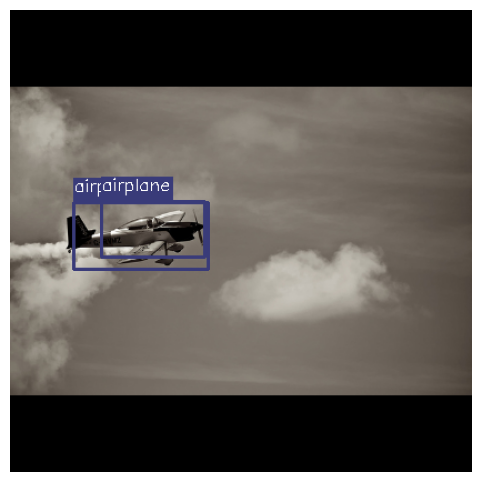

Epoch: 71


  0%|                                                                                                                              | 0/374 [00:07<?, ?it/s, loss=0.105]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                   | 1/374 [00:23<2:28:41, 23.92s/it, loss=0.105]

batch_idx: 1


  1%|▉                                                                                                                  | 3/374 [00:37<1:05:59, 10.67s/it, loss=0.0928]

batch_idx: 2


  1%|█▎                                                                                                                   | 4/374 [00:44<56:59,  9.24s/it, loss=0.0953]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [00:51<50:31,  8.22s/it, loss=0.0893]

batch_idx: 4


  2%|█▉                                                                                                                   | 6/374 [00:58<47:44,  7.78s/it, loss=0.0913]

batch_idx: 5


  2%|██▏                                                                                                                   | 7/374 [01:04<45:31,  7.44s/it, loss=0.094]

batch_idx: 6


  2%|██▌                                                                                                                  | 8/374 [01:12<45:12,  7.41s/it, loss=0.0939]

batch_idx: 7


  2%|██▊                                                                                                                  | 9/374 [01:18<43:51,  7.21s/it, loss=0.0936]

batch_idx: 8


  3%|███                                                                                                                 | 10/374 [01:26<43:34,  7.18s/it, loss=0.0901]

batch_idx: 9


  3%|███▍                                                                                                                  | 11/374 [01:33<44:19,  7.33s/it, loss=0.09]

batch_idx: 10


  3%|███▋                                                                                                                | 12/374 [01:41<44:14,  7.33s/it, loss=0.0868]

batch_idx: 11


  3%|████                                                                                                                | 13/374 [01:47<43:23,  7.21s/it, loss=0.0843]

batch_idx: 12


  4%|████▎                                                                                                               | 14/374 [01:54<42:50,  7.14s/it, loss=0.0823]

batch_idx: 13


  4%|████▋                                                                                                               | 15/374 [02:01<42:06,  7.04s/it, loss=0.0806]

batch_idx: 14


  4%|████▉                                                                                                               | 16/374 [02:09<42:30,  7.13s/it, loss=0.0797]

batch_idx: 15


  5%|█████▎                                                                                                              | 17/374 [02:16<42:02,  7.07s/it, loss=0.0797]

batch_idx: 16


  5%|█████▋                                                                                                                | 18/374 [02:23<42:29,  7.16s/it, loss=0.08]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [02:30<42:09,  7.12s/it, loss=0.0806]

batch_idx: 18


  5%|██████▎                                                                                                               | 20/374 [02:37<42:23,  7.18s/it, loss=0.08]

batch_idx: 19


  6%|██████▌                                                                                                             | 21/374 [02:44<41:47,  7.10s/it, loss=0.0792]

batch_idx: 20


  6%|██████▊                                                                                                             | 22/374 [02:51<41:53,  7.14s/it, loss=0.0797]

batch_idx: 21


  6%|███████▏                                                                                                            | 23/374 [02:58<41:22,  7.07s/it, loss=0.0785]

batch_idx: 22


  6%|███████▍                                                                                                            | 24/374 [03:05<40:32,  6.95s/it, loss=0.0794]

batch_idx: 23


  7%|███████▊                                                                                                            | 25/374 [03:12<40:01,  6.88s/it, loss=0.0787]

batch_idx: 24


  7%|████████                                                                                                            | 26/374 [03:19<40:33,  6.99s/it, loss=0.0786]

batch_idx: 25


  7%|████████▎                                                                                                           | 27/374 [03:26<41:00,  7.09s/it, loss=0.0774]

batch_idx: 26


  7%|████████▋                                                                                                           | 28/374 [03:33<40:37,  7.05s/it, loss=0.0783]

batch_idx: 27


  8%|████████▉                                                                                                           | 29/374 [03:40<40:14,  7.00s/it, loss=0.0812]

batch_idx: 28


  8%|█████████▎                                                                                                          | 30/374 [03:47<40:36,  7.08s/it, loss=0.0815]

batch_idx: 29


  8%|█████████▌                                                                                                          | 31/374 [03:54<40:22,  7.06s/it, loss=0.0839]

batch_idx: 30


  9%|█████████▉                                                                                                          | 32/374 [04:02<40:28,  7.10s/it, loss=0.0841]

batch_idx: 31


  9%|██████████▏                                                                                                         | 33/374 [04:09<40:16,  7.09s/it, loss=0.0844]

batch_idx: 32


  9%|██████████▌                                                                                                         | 34/374 [04:16<39:47,  7.02s/it, loss=0.0862]

batch_idx: 33


  9%|██████████▊                                                                                                         | 35/374 [04:23<40:11,  7.11s/it, loss=0.0854]

batch_idx: 34


 10%|███████████▏                                                                                                        | 36/374 [04:30<39:54,  7.08s/it, loss=0.0846]

batch_idx: 35


 10%|███████████▍                                                                                                        | 37/374 [04:37<39:37,  7.06s/it, loss=0.0845]

batch_idx: 36


 10%|███████████▊                                                                                                        | 38/374 [04:45<41:53,  7.48s/it, loss=0.0858]

batch_idx: 37


 10%|████████████                                                                                                        | 39/374 [04:52<40:57,  7.34s/it, loss=0.0874]

batch_idx: 38


 11%|████████████▍                                                                                                       | 40/374 [05:00<40:38,  7.30s/it, loss=0.0875]

batch_idx: 39


 11%|████████████▋                                                                                                       | 41/374 [05:07<40:14,  7.25s/it, loss=0.0878]

batch_idx: 40


 11%|█████████████                                                                                                       | 42/374 [05:14<39:48,  7.19s/it, loss=0.0891]

batch_idx: 41


 11%|█████████████▎                                                                                                      | 43/374 [05:20<38:43,  7.02s/it, loss=0.0903]

batch_idx: 42


 12%|█████████████▋                                                                                                      | 44/374 [05:27<38:16,  6.96s/it, loss=0.0897]

batch_idx: 43


 12%|█████████████▉                                                                                                      | 45/374 [05:34<37:36,  6.86s/it, loss=0.0902]

batch_idx: 44


 12%|██████████████▎                                                                                                     | 46/374 [05:41<38:28,  7.04s/it, loss=0.0893]

batch_idx: 45


 13%|██████████████▌                                                                                                     | 47/374 [05:48<38:09,  7.00s/it, loss=0.0887]

batch_idx: 46


 13%|██████████████▉                                                                                                     | 48/374 [05:56<38:53,  7.16s/it, loss=0.0895]

batch_idx: 47


 13%|███████████████▏                                                                                                    | 49/374 [06:02<38:02,  7.02s/it, loss=0.0894]

batch_idx: 48


 13%|███████████████▋                                                                                                     | 50/374 [06:09<37:43,  6.99s/it, loss=0.089]

batch_idx: 49


 14%|███████████████▊                                                                                                    | 51/374 [06:16<37:33,  6.98s/it, loss=0.0907]

batch_idx: 50


 14%|████████████████▏                                                                                                   | 52/374 [06:23<37:12,  6.93s/it, loss=0.0907]

batch_idx: 51


 14%|████████████████▍                                                                                                   | 53/374 [06:30<37:23,  6.99s/it, loss=0.0909]

batch_idx: 52


 14%|█████████████████                                                                                                     | 54/374 [06:37<37:34,  7.04s/it, loss=0.09]

batch_idx: 53


 15%|█████████████████                                                                                                   | 55/374 [06:45<38:05,  7.16s/it, loss=0.0894]

batch_idx: 54


 15%|█████████████████▎                                                                                                  | 56/374 [06:52<37:50,  7.14s/it, loss=0.0892]

batch_idx: 55


 15%|█████████████████▋                                                                                                  | 57/374 [06:59<37:14,  7.05s/it, loss=0.0891]

batch_idx: 56


 16%|█████████████████▉                                                                                                  | 58/374 [07:06<37:18,  7.09s/it, loss=0.0888]

batch_idx: 57


 16%|██████████████████▎                                                                                                 | 59/374 [07:13<37:16,  7.10s/it, loss=0.0881]

batch_idx: 58


 16%|██████████████████▌                                                                                                 | 60/374 [07:20<36:58,  7.07s/it, loss=0.0873]

batch_idx: 59


 16%|██████████████████▉                                                                                                 | 61/374 [07:27<36:42,  7.04s/it, loss=0.0875]

batch_idx: 60


 17%|███████████████████▏                                                                                                | 62/374 [07:34<36:44,  7.06s/it, loss=0.0873]

batch_idx: 61


 17%|███████████████████▌                                                                                                | 63/374 [07:41<36:48,  7.10s/it, loss=0.0872]

batch_idx: 62


 17%|███████████████████▊                                                                                                | 64/374 [07:48<36:25,  7.05s/it, loss=0.0874]

batch_idx: 63


 17%|████████████████████▏                                                                                               | 65/374 [07:55<36:01,  6.99s/it, loss=0.0872]

batch_idx: 64


 18%|████████████████████▍                                                                                               | 66/374 [08:01<34:24,  6.70s/it, loss=0.0868]

batch_idx: 65


 18%|████████████████████▊                                                                                               | 67/374 [08:09<35:50,  7.00s/it, loss=0.0875]

batch_idx: 66


 18%|█████████████████████                                                                                               | 68/374 [08:16<35:47,  7.02s/it, loss=0.0882]

batch_idx: 67


 18%|█████████████████████▍                                                                                              | 69/374 [08:22<34:52,  6.86s/it, loss=0.0879]

batch_idx: 68


 19%|█████████████████████▋                                                                                              | 70/374 [08:29<34:37,  6.83s/it, loss=0.0874]

batch_idx: 69


 19%|██████████████████████▏                                                                                              | 71/374 [08:36<34:33,  6.84s/it, loss=0.087]

batch_idx: 70


 19%|██████████████████████▎                                                                                             | 72/374 [08:43<35:00,  6.95s/it, loss=0.0865]

batch_idx: 71


 20%|██████████████████████▋                                                                                             | 73/374 [08:50<34:59,  6.97s/it, loss=0.0866]

batch_idx: 72


 20%|██████████████████████▉                                                                                             | 74/374 [08:57<34:31,  6.90s/it, loss=0.0862]

batch_idx: 73


 20%|███████████████████████▎                                                                                            | 75/374 [09:04<34:50,  6.99s/it, loss=0.0858]

batch_idx: 74


 20%|███████████████████████▌                                                                                            | 76/374 [09:11<35:11,  7.08s/it, loss=0.0861]

batch_idx: 75


 21%|███████████████████████▉                                                                                            | 77/374 [09:18<34:07,  6.89s/it, loss=0.0858]

batch_idx: 76


 21%|████████████████████████▏                                                                                           | 78/374 [09:25<33:44,  6.84s/it, loss=0.0853]

batch_idx: 77


 21%|████████████████████████▌                                                                                           | 79/374 [09:32<34:32,  7.03s/it, loss=0.0848]

batch_idx: 78


 21%|████████████████████████▊                                                                                           | 80/374 [09:39<34:33,  7.05s/it, loss=0.0848]

batch_idx: 79


 22%|█████████████████████████                                                                                           | 81/374 [09:46<34:20,  7.03s/it, loss=0.0852]

batch_idx: 80


 22%|█████████████████████████▍                                                                                          | 82/374 [09:53<34:27,  7.08s/it, loss=0.0849]

batch_idx: 81


 22%|█████████████████████████▋                                                                                          | 83/374 [10:00<34:04,  7.03s/it, loss=0.0848]

batch_idx: 82


 22%|██████████████████████████                                                                                          | 84/374 [10:07<33:12,  6.87s/it, loss=0.0848]

batch_idx: 83


 23%|██████████████████████████▎                                                                                         | 85/374 [10:14<33:02,  6.86s/it, loss=0.0847]

batch_idx: 84


 23%|██████████████████████████▋                                                                                         | 86/374 [10:21<33:14,  6.93s/it, loss=0.0842]

batch_idx: 85


 23%|███████████████████████████▏                                                                                         | 87/374 [10:27<32:48,  6.86s/it, loss=0.084]

batch_idx: 86


 24%|███████████████████████████▎                                                                                        | 88/374 [10:35<33:09,  6.96s/it, loss=0.0836]

batch_idx: 87


 24%|███████████████████████████▌                                                                                        | 89/374 [10:41<32:47,  6.90s/it, loss=0.0835]

batch_idx: 88


 24%|███████████████████████████▉                                                                                        | 90/374 [10:48<31:43,  6.70s/it, loss=0.0833]

batch_idx: 89


 24%|████████████████████████████▍                                                                                        | 91/374 [10:56<33:21,  7.07s/it, loss=0.083]

batch_idx: 90


 24%|████████████████████████████▏                                                                                       | 91/374 [11:02<33:21,  7.07s/it, loss=0.0847]

batch_idx: 91


 25%|████████████████████████████▊                                                                                       | 93/374 [11:09<32:48,  7.00s/it, loss=0.0844]

batch_idx: 92


 25%|█████████████████████████████▏                                                                                      | 94/374 [11:17<33:23,  7.16s/it, loss=0.0843]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [11:24<33:12,  7.14s/it, loss=0.084]

batch_idx: 94


 26%|█████████████████████████████▊                                                                                      | 96/374 [11:31<32:32,  7.02s/it, loss=0.0842]

batch_idx: 95


 26%|██████████████████████████████                                                                                      | 97/374 [11:38<32:18,  7.00s/it, loss=0.0845]

batch_idx: 96


 26%|██████████████████████████████▍                                                                                     | 98/374 [11:44<31:48,  6.91s/it, loss=0.0843]

batch_idx: 97


 26%|██████████████████████████████▋                                                                                     | 99/374 [11:51<31:28,  6.87s/it, loss=0.0839]

batch_idx: 98


 27%|██████████████████████████████▋                                                                                    | 100/374 [11:58<31:20,  6.86s/it, loss=0.0839]

batch_idx: 99


 27%|███████████████████████████████                                                                                    | 101/374 [12:05<31:15,  6.87s/it, loss=0.0838]

batch_idx: 100


 27%|███████████████████████████████▎                                                                                   | 102/374 [12:12<31:42,  6.99s/it, loss=0.0835]

batch_idx: 101


 28%|███████████████████████████████▋                                                                                   | 103/374 [12:19<31:58,  7.08s/it, loss=0.0833]

batch_idx: 102


 28%|███████████████████████████████▉                                                                                   | 104/374 [12:26<31:42,  7.05s/it, loss=0.0837]

batch_idx: 103


 28%|████████████████████████████████▎                                                                                  | 105/374 [12:34<31:53,  7.11s/it, loss=0.0839]

batch_idx: 104


 28%|████████████████████████████████▌                                                                                  | 106/374 [12:40<30:46,  6.89s/it, loss=0.0838]

batch_idx: 105


 29%|████████████████████████████████▉                                                                                  | 107/374 [12:48<31:30,  7.08s/it, loss=0.0842]

batch_idx: 106


 29%|█████████████████████████████████▏                                                                                 | 108/374 [12:55<31:18,  7.06s/it, loss=0.0842]

batch_idx: 107


 29%|█████████████████████████████████▌                                                                                 | 109/374 [13:02<31:33,  7.15s/it, loss=0.0841]

batch_idx: 108


 29%|█████████████████████████████████▊                                                                                 | 110/374 [13:08<30:33,  6.94s/it, loss=0.0839]

batch_idx: 109


 30%|██████████████████████████████████▏                                                                                | 111/374 [13:15<30:04,  6.86s/it, loss=0.0838]

batch_idx: 110


 30%|██████████████████████████████████▍                                                                                | 112/374 [13:23<30:43,  7.04s/it, loss=0.0838]

batch_idx: 111


 30%|██████████████████████████████████▋                                                                                | 113/374 [13:30<30:30,  7.01s/it, loss=0.0836]

batch_idx: 112


 30%|███████████████████████████████████                                                                                | 114/374 [13:37<30:37,  7.07s/it, loss=0.0836]

batch_idx: 113


 31%|███████████████████████████████████▎                                                                               | 115/374 [13:43<29:33,  6.85s/it, loss=0.0833]

batch_idx: 114


 31%|███████████████████████████████████▉                                                                                | 116/374 [13:50<29:09,  6.78s/it, loss=0.083]

batch_idx: 115


 31%|███████████████████████████████████▉                                                                               | 117/374 [13:57<29:28,  6.88s/it, loss=0.0829]

batch_idx: 116


 32%|████████████████████████████████████▎                                                                              | 118/374 [14:03<28:38,  6.71s/it, loss=0.0838]

batch_idx: 117


 32%|████████████████████████████████████▌                                                                              | 119/374 [14:10<29:07,  6.85s/it, loss=0.0839]

batch_idx: 118


 32%|████████████████████████████████████▉                                                                              | 120/374 [14:18<29:57,  7.08s/it, loss=0.0839]

batch_idx: 119


 32%|█████████████████████████████████████▏                                                                             | 121/374 [14:30<36:08,  8.57s/it, loss=0.0839]

batch_idx: 120


 33%|█████████████████████████████████████▌                                                                             | 122/374 [14:37<34:28,  8.21s/it, loss=0.0839]

batch_idx: 121


 33%|█████████████████████████████████████▊                                                                             | 123/374 [14:44<32:50,  7.85s/it, loss=0.0838]

batch_idx: 122


 33%|██████████████████████████████████████▏                                                                            | 124/374 [14:52<32:11,  7.73s/it, loss=0.0837]

batch_idx: 123


 33%|██████████████████████████████████████▍                                                                            | 125/374 [14:59<31:24,  7.57s/it, loss=0.0835]

batch_idx: 124


 34%|██████████████████████████████████████▋                                                                            | 126/374 [15:06<30:06,  7.28s/it, loss=0.0833]

batch_idx: 125


 34%|███████████████████████████████████████                                                                            | 127/374 [15:13<29:42,  7.22s/it, loss=0.0831]

batch_idx: 126


 34%|███████████████████████████████████████▎                                                                           | 128/374 [15:20<29:46,  7.26s/it, loss=0.0828]

batch_idx: 127


 34%|███████████████████████████████████████▋                                                                           | 129/374 [15:27<29:28,  7.22s/it, loss=0.0831]

batch_idx: 128


 35%|███████████████████████████████████████▉                                                                           | 130/374 [15:35<29:33,  7.27s/it, loss=0.0831]

batch_idx: 129


 35%|████████████████████████████████████████▎                                                                          | 131/374 [15:42<29:26,  7.27s/it, loss=0.0829]

batch_idx: 130


 35%|████████████████████████████████████████▌                                                                          | 132/374 [15:48<28:11,  6.99s/it, loss=0.0829]

batch_idx: 131


 36%|████████████████████████████████████████▉                                                                          | 133/374 [15:55<28:16,  7.04s/it, loss=0.0827]

batch_idx: 132


 36%|█████████████████████████████████████████▏                                                                         | 134/374 [16:02<28:15,  7.06s/it, loss=0.0826]

batch_idx: 133


 36%|█████████████████████████████████████████▌                                                                         | 135/374 [16:10<28:11,  7.08s/it, loss=0.0825]

batch_idx: 134


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [16:17<28:07,  7.09s/it, loss=0.0824]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [16:24<27:47,  7.04s/it, loss=0.0826]

batch_idx: 136


 37%|██████████████████████████████████████████▍                                                                        | 138/374 [16:31<27:57,  7.11s/it, loss=0.0826]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [16:37<27:14,  6.96s/it, loss=0.0829]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [16:44<26:36,  6.82s/it, loss=0.0827]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [16:51<26:34,  6.84s/it, loss=0.0825]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [16:58<26:33,  6.87s/it, loss=0.0822]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [17:05<26:34,  6.90s/it, loss=0.0821]

batch_idx: 142


 39%|████████████████████████████████████████████▎                                                                      | 144/374 [17:12<26:55,  7.03s/it, loss=0.0822]

batch_idx: 143


 39%|████████████████████████████████████████████▉                                                                       | 145/374 [17:19<26:53,  7.05s/it, loss=0.082]

batch_idx: 144


 39%|█████████████████████████████████████████████▎                                                                      | 146/374 [17:26<26:48,  7.06s/it, loss=0.082]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [17:33<26:13,  6.93s/it, loss=0.0818]

batch_idx: 146


 40%|█████████████████████████████████████████████▌                                                                     | 148/374 [17:40<26:17,  6.98s/it, loss=0.0818]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [17:47<26:11,  6.98s/it, loss=0.0823]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [17:54<26:26,  7.08s/it, loss=0.0822]

batch_idx: 149


 40%|██████████████████████████████████████████████▍                                                                    | 151/374 [18:02<26:43,  7.19s/it, loss=0.0822]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [18:09<26:37,  7.19s/it, loss=0.0826]

batch_idx: 151


 41%|███████████████████████████████████████████████                                                                    | 153/374 [18:16<26:26,  7.18s/it, loss=0.0825]

batch_idx: 152


 41%|███████████████████████████████████████████████▎                                                                   | 154/374 [18:23<25:50,  7.05s/it, loss=0.0828]

batch_idx: 153


 41%|███████████████████████████████████████████████▋                                                                   | 155/374 [18:30<25:56,  7.11s/it, loss=0.0827]

batch_idx: 154


 42%|████████████████████████████████████████████████▍                                                                   | 156/374 [18:38<26:51,  7.39s/it, loss=0.083]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [18:45<26:27,  7.32s/it, loss=0.0832]

batch_idx: 156


 42%|█████████████████████████████████████████████████                                                                   | 158/374 [18:52<25:42,  7.14s/it, loss=0.083]

batch_idx: 157


 43%|████████████████████████████████████████████████▉                                                                  | 159/374 [18:59<25:14,  7.04s/it, loss=0.0835]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [19:06<25:07,  7.05s/it, loss=0.0834]

batch_idx: 159


 43%|█████████████████████████████████████████████████▌                                                                 | 161/374 [19:13<25:02,  7.05s/it, loss=0.0831]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [19:19<24:21,  6.89s/it, loss=0.0834]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [19:27<24:50,  7.06s/it, loss=0.0836]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [19:34<24:23,  6.97s/it, loss=0.0837]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [19:41<24:13,  6.96s/it, loss=0.0836]

batch_idx: 164


 44%|███████████████████████████████████████████████████                                                                | 166/374 [19:48<24:10,  6.97s/it, loss=0.0838]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [19:55<24:06,  6.99s/it, loss=0.0841]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [20:02<24:05,  7.02s/it, loss=0.0844]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [20:08<23:32,  6.89s/it, loss=0.0843]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [20:15<23:45,  6.99s/it, loss=0.0843]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [20:23<24:14,  7.17s/it, loss=0.0842]

batch_idx: 170


 46%|█████████████████████████████████████████████████████▎                                                              | 172/374 [20:30<24:20,  7.23s/it, loss=0.084]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [20:37<23:55,  7.14s/it, loss=0.0838]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▌                                                             | 174/374 [20:45<23:51,  7.16s/it, loss=0.0839]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [20:52<23:30,  7.09s/it, loss=0.0839]

batch_idx: 174


 47%|██████████████████████████████████████████████████████                                                             | 176/374 [20:58<23:07,  7.01s/it, loss=0.0838]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▍                                                            | 177/374 [21:07<24:23,  7.43s/it, loss=0.0838]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [21:14<24:02,  7.36s/it, loss=0.0837]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [21:21<23:50,  7.33s/it, loss=0.0837]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [21:29<23:47,  7.36s/it, loss=0.0836]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [21:36<23:26,  7.29s/it, loss=0.0837]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [21:43<22:51,  7.14s/it, loss=0.0835]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▎                                                          | 183/374 [21:49<22:13,  6.98s/it, loss=0.0836]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [21:56<22:04,  6.97s/it, loss=0.0835]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [22:03<21:41,  6.89s/it, loss=0.0834]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [22:10<21:54,  6.99s/it, loss=0.0833]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [22:17<21:47,  6.99s/it, loss=0.0835]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [22:24<22:02,  7.11s/it, loss=0.0836]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [22:32<22:23,  7.26s/it, loss=0.0836]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [22:40<22:37,  7.38s/it, loss=0.0838]

batch_idx: 189


 51%|██████████████████████████████████████████████████████████▋                                                        | 191/374 [22:46<21:32,  7.07s/it, loss=0.0837]

batch_idx: 190


 51%|███████████████████████████████████████████████████████████                                                        | 192/374 [22:53<21:27,  7.07s/it, loss=0.0836]

batch_idx: 191


 52%|███████████████████████████████████████████████████████████▎                                                       | 193/374 [23:00<21:04,  6.98s/it, loss=0.0835]

batch_idx: 192


 52%|███████████████████████████████████████████████████████████▋                                                       | 194/374 [23:07<20:57,  6.98s/it, loss=0.0833]

batch_idx: 193


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [23:14<20:46,  6.97s/it, loss=0.0832]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [23:21<20:45,  7.00s/it, loss=0.0833]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [23:28<20:20,  6.90s/it, loss=0.0831]

batch_idx: 196


 53%|█████████████████████████████████████████████████████████████▍                                                      | 198/374 [23:35<20:21,  6.94s/it, loss=0.083]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [23:42<20:28,  7.02s/it, loss=0.0828]

batch_idx: 198


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:48<19:58,  6.89s/it, loss=0.0827]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [23:55<19:58,  6.89s/it, loss=0.0826]

batch_idx: 200
==> Saving checkpoint


 54%|█████████████████████████████████████████████████████████████▊                                                     | 201/374 [24:12<34:46, 12.06s/it, loss=0.0826]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▍                                                    | 203/374 [24:27<27:08,  9.52s/it, loss=0.0828]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [24:35<25:58,  9.17s/it, loss=0.0829]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [24:42<24:00,  8.53s/it, loss=0.0829]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▉                                                    | 206/374 [24:49<22:30,  8.04s/it, loss=0.083]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [24:56<21:29,  7.72s/it, loss=0.0829]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [25:03<20:59,  7.59s/it, loss=0.0831]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▊                                                   | 209/374 [25:10<20:25,  7.43s/it, loss=0.083]

batch_idx: 208


 56%|████████████████████████████████████████████████████████████████▌                                                  | 210/374 [25:17<19:36,  7.17s/it, loss=0.0829]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [25:24<19:14,  7.08s/it, loss=0.0828]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [25:30<18:37,  6.90s/it, loss=0.0829]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [25:37<18:33,  6.92s/it, loss=0.0829]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [25:44<18:08,  6.81s/it, loss=0.0829]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [25:51<18:21,  6.93s/it, loss=0.0831]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▍                                                | 216/374 [25:57<17:56,  6.81s/it, loss=0.0832]

batch_idx: 215


 58%|██████████████████████████████████████████████████████████████████▋                                                | 217/374 [26:05<18:09,  6.94s/it, loss=0.0833]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████                                                | 218/374 [26:12<18:03,  6.95s/it, loss=0.0831]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [26:18<17:42,  6.85s/it, loss=0.0832]

batch_idx: 218


 59%|███████████████████████████████████████████████████████████████████▋                                               | 220/374 [26:26<17:58,  7.00s/it, loss=0.0831]

batch_idx: 219


 59%|███████████████████████████████████████████████████████████████████▉                                               | 221/374 [26:33<18:02,  7.07s/it, loss=0.0832]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▎                                              | 222/374 [26:39<17:28,  6.89s/it, loss=0.0833]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [26:47<17:34,  6.98s/it, loss=0.0833]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [26:54<17:27,  6.99s/it, loss=0.0833]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 225/374 [27:00<17:01,  6.86s/it, loss=0.0832]

batch_idx: 224


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 226/374 [27:07<16:58,  6.88s/it, loss=0.0832]

batch_idx: 225


 61%|██████████████████████████████████████████████████████████████████████▍                                            | 229/374 [27:27<16:27,  6.81s/it, loss=0.0832]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [27:34<16:18,  6.79s/it, loss=0.0831]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 231/374 [27:41<15:57,  6.70s/it, loss=0.083]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 232/374 [27:48<16:06,  6.81s/it, loss=0.0829]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [27:55<16:06,  6.85s/it, loss=0.0829]

batch_idx: 232


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 234/374 [28:02<16:19,  7.00s/it, loss=0.083]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [28:09<16:08,  6.97s/it, loss=0.0829]

batch_idx: 234


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 236/374 [28:16<16:14,  7.06s/it, loss=0.0831]

batch_idx: 235


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 237/374 [28:24<16:38,  7.29s/it, loss=0.083]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [28:31<16:26,  7.25s/it, loss=0.0829]

batch_idx: 237


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 239/374 [28:38<15:53,  7.06s/it, loss=0.083]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [28:44<15:29,  6.94s/it, loss=0.0829]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [28:51<15:26,  6.97s/it, loss=0.0832]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [28:58<15:25,  7.01s/it, loss=0.0831]

batch_idx: 241


 65%|███████████████████████████████████████████████████████████████████████████▎                                        | 243/374 [29:06<15:24,  7.06s/it, loss=0.083]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 244/374 [29:13<15:17,  7.06s/it, loss=0.083]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [29:20<15:07,  7.03s/it, loss=0.0829]

batch_idx: 244


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 246/374 [29:27<14:55,  7.00s/it, loss=0.0828]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [29:33<14:36,  6.90s/it, loss=0.0828]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▎                                      | 248/374 [29:40<14:34,  6.94s/it, loss=0.0827]

batch_idx: 247


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 249/374 [29:47<14:35,  7.00s/it, loss=0.0826]

batch_idx: 248


 67%|████████████████████████████████████████████████████████████████████████████▊                                      | 250/374 [29:54<14:23,  6.96s/it, loss=0.0825]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▏                                     | 251/374 [30:01<14:20,  7.00s/it, loss=0.0824]

batch_idx: 250


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 252/374 [30:08<14:06,  6.94s/it, loss=0.0825]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [30:16<14:15,  7.07s/it, loss=0.0826]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [30:23<14:21,  7.18s/it, loss=0.0827]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [30:30<14:15,  7.19s/it, loss=0.0827]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [30:37<13:58,  7.11s/it, loss=0.0825]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 257/374 [30:44<13:43,  7.04s/it, loss=0.0824]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [30:51<13:35,  7.03s/it, loss=0.0823]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [30:58<13:22,  6.98s/it, loss=0.0822]

batch_idx: 258


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 260/374 [31:05<13:21,  7.03s/it, loss=0.0821]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [31:12<13:08,  6.98s/it, loss=0.0821]

batch_idx: 260


 70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 262/374 [31:19<13:00,  6.97s/it, loss=0.082]

batch_idx: 261


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 263/374 [31:26<12:46,  6.91s/it, loss=0.0819]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 264/374 [31:33<12:54,  7.04s/it, loss=0.082]

batch_idx: 263


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 265/374 [31:40<12:44,  7.02s/it, loss=0.0819]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [31:47<12:36,  7.01s/it, loss=0.0819]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [31:54<12:21,  6.93s/it, loss=0.0819]

batch_idx: 266


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 268/374 [32:01<12:41,  7.18s/it, loss=0.0818]

batch_idx: 267


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 269/374 [32:08<12:17,  7.02s/it, loss=0.0818]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [32:15<11:59,  6.92s/it, loss=0.0818]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [32:22<12:11,  7.10s/it, loss=0.0817]

batch_idx: 270


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 272/374 [32:29<12:00,  7.06s/it, loss=0.0819]

batch_idx: 271


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 273/374 [32:36<11:43,  6.97s/it, loss=0.082]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [32:42<11:18,  6.78s/it, loss=0.0821]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [32:50<11:24,  6.91s/it, loss=0.0821]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [32:56<11:04,  6.78s/it, loss=0.0821]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 277/374 [33:03<11:07,  6.88s/it, loss=0.0819]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [33:10<11:10,  6.98s/it, loss=0.0819]

batch_idx: 277


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 279/374 [33:17<11:06,  7.01s/it, loss=0.0824]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 280/374 [33:24<10:59,  7.02s/it, loss=0.0824]

batch_idx: 279


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 281/374 [33:31<10:36,  6.85s/it, loss=0.0823]

batch_idx: 280


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 282/374 [33:38<10:32,  6.87s/it, loss=0.0822]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 283/374 [33:45<10:34,  6.97s/it, loss=0.0821]

batch_idx: 282


 76%|████████████████████████████████████████████████████████████████████████████████████████                            | 284/374 [33:52<10:27,  6.97s/it, loss=0.082]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [33:59<10:07,  6.83s/it, loss=0.0822]

batch_idx: 284


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 286/374 [34:06<10:12,  6.97s/it, loss=0.0822]

batch_idx: 285


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 287/374 [34:13<10:11,  7.02s/it, loss=0.0824]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [34:20<09:59,  6.97s/it, loss=0.0824]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [34:27<09:57,  7.02s/it, loss=0.0827]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▏                         | 290/374 [34:34<09:49,  7.01s/it, loss=0.0826]

batch_idx: 289


 78%|█████████████████████████████████████████████████████████████████████████████████████████▍                         | 291/374 [34:42<10:03,  7.27s/it, loss=0.0829]

batch_idx: 290


 78%|█████████████████████████████████████████████████████████████████████████████████████████▊                         | 292/374 [34:49<09:53,  7.24s/it, loss=0.0829]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 293/374 [34:56<09:35,  7.10s/it, loss=0.0828]

batch_idx: 292


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 294/374 [35:03<09:29,  7.12s/it, loss=0.0827]

batch_idx: 293


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [35:10<09:26,  7.17s/it, loss=0.0827]

batch_idx: 294


 79%|███████████████████████████████████████████████████████████████████████████████████████████                        | 296/374 [35:17<09:11,  7.07s/it, loss=0.0827]

batch_idx: 295


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 297/374 [35:24<09:01,  7.04s/it, loss=0.083]

batch_idx: 296


 80%|███████████████████████████████████████████████████████████████████████████████████████████▋                       | 298/374 [35:31<08:54,  7.04s/it, loss=0.0829]

batch_idx: 297


 80%|███████████████████████████████████████████████████████████████████████████████████████████▉                       | 299/374 [35:38<08:50,  7.07s/it, loss=0.0828]

batch_idx: 298


 80%|████████████████████████████████████████████████████████████████████████████████████████████▏                      | 300/374 [35:46<08:55,  7.23s/it, loss=0.0828]

batch_idx: 299


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 301/374 [35:53<08:42,  7.16s/it, loss=0.083]

batch_idx: 300


 81%|████████████████████████████████████████████████████████████████████████████████████████████▊                      | 302/374 [36:00<08:26,  7.03s/it, loss=0.0829]

batch_idx: 301


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▏                     | 303/374 [36:06<08:16,  7.00s/it, loss=0.0829]

batch_idx: 302


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 304/374 [36:13<07:50,  6.72s/it, loss=0.083]

batch_idx: 303


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▊                     | 305/374 [36:20<07:49,  6.81s/it, loss=0.0831]

batch_idx: 304


 82%|██████████████████████████████████████████████████████████████████████████████████████████████                     | 306/374 [36:26<07:43,  6.81s/it, loss=0.0831]

batch_idx: 305


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▍                    | 307/374 [36:34<07:45,  6.95s/it, loss=0.0831]

batch_idx: 306


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 308/374 [36:41<07:40,  6.98s/it, loss=0.083]

batch_idx: 307


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                    | 309/374 [36:47<07:23,  6.82s/it, loss=0.0829]

batch_idx: 308


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▎                   | 310/374 [36:54<07:14,  6.79s/it, loss=0.0829]

batch_idx: 309


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                   | 311/374 [37:01<07:16,  6.93s/it, loss=0.0828]

batch_idx: 310


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                   | 312/374 [37:08<07:11,  6.95s/it, loss=0.0828]

batch_idx: 311


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 313/374 [37:15<07:09,  7.03s/it, loss=0.0827]

batch_idx: 312


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 314/374 [37:22<06:56,  6.94s/it, loss=0.0827]

batch_idx: 313


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 315/374 [37:29<06:46,  6.90s/it, loss=0.0827]

batch_idx: 314


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 316/374 [37:36<06:37,  6.85s/it, loss=0.0828]

batch_idx: 315


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 317/374 [37:43<06:33,  6.91s/it, loss=0.0827]

batch_idx: 316


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 318/374 [37:50<06:30,  6.96s/it, loss=0.0828]

batch_idx: 317


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████                 | 319/374 [37:57<06:21,  6.93s/it, loss=0.0827]

batch_idx: 318


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                | 320/374 [38:03<06:12,  6.90s/it, loss=0.0827]

batch_idx: 319


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                | 321/374 [38:10<06:06,  6.92s/it, loss=0.0829]

batch_idx: 320


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████                | 322/374 [38:17<05:49,  6.73s/it, loss=0.0828]

batch_idx: 321


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎               | 323/374 [38:24<05:45,  6.77s/it, loss=0.0828]

batch_idx: 322


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋               | 324/374 [38:30<05:41,  6.82s/it, loss=0.0827]

batch_idx: 323


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▉               | 325/374 [38:37<05:30,  6.74s/it, loss=0.0829]

batch_idx: 324


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 326/374 [38:44<05:27,  6.83s/it, loss=0.0829]

batch_idx: 325


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 327/374 [38:51<05:23,  6.89s/it, loss=0.0828]

batch_idx: 326


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 328/374 [38:58<05:12,  6.79s/it, loss=0.0829]

batch_idx: 327


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 329/374 [39:04<05:04,  6.77s/it, loss=0.0829]

batch_idx: 328


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 330/374 [39:11<05:02,  6.87s/it, loss=0.083]

batch_idx: 329


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 331/374 [39:19<05:00,  6.99s/it, loss=0.0832]

batch_idx: 330


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████             | 332/374 [39:26<04:52,  6.96s/it, loss=0.0833]

batch_idx: 331


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 333/374 [39:33<04:51,  7.10s/it, loss=0.0833]

batch_idx: 332


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 334/374 [39:40<04:42,  7.05s/it, loss=0.0833]

batch_idx: 333


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████            | 335/374 [39:47<04:32,  6.98s/it, loss=0.0835]

batch_idx: 334


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 336/374 [39:54<04:27,  7.04s/it, loss=0.0834]

batch_idx: 335


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 337/374 [40:01<04:18,  6.99s/it, loss=0.0834]

batch_idx: 336


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 338/374 [40:08<04:10,  6.95s/it, loss=0.0839]

batch_idx: 337


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 339/374 [40:15<04:06,  7.05s/it, loss=0.0838]

batch_idx: 338


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 340/374 [40:22<04:03,  7.15s/it, loss=0.0838]

batch_idx: 339


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 341/374 [40:29<03:53,  7.06s/it, loss=0.084]

batch_idx: 340


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 342/374 [40:36<03:43,  7.00s/it, loss=0.0839]

batch_idx: 341


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 343/374 [40:43<03:31,  6.82s/it, loss=0.0839]

batch_idx: 342


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 344/374 [40:49<03:23,  6.77s/it, loss=0.084]

batch_idx: 343


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 345/374 [40:56<03:19,  6.88s/it, loss=0.084]

batch_idx: 344


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 346/374 [41:03<03:09,  6.76s/it, loss=0.084]

batch_idx: 345


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 347/374 [41:09<03:00,  6.70s/it, loss=0.084]

batch_idx: 346


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 348/374 [41:16<02:50,  6.58s/it, loss=0.084]

batch_idx: 347


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 349/374 [41:22<02:44,  6.56s/it, loss=0.084]

batch_idx: 348


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 350/374 [41:29<02:39,  6.63s/it, loss=0.0839]

batch_idx: 349


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 351/374 [41:36<02:34,  6.73s/it, loss=0.0843]

batch_idx: 350


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 352/374 [41:43<02:27,  6.70s/it, loss=0.0842]

batch_idx: 351


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 353/374 [41:50<02:24,  6.86s/it, loss=0.0842]

batch_idx: 352


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 354/374 [41:57<02:20,  7.03s/it, loss=0.0842]

batch_idx: 353


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 355/374 [42:04<02:13,  7.00s/it, loss=0.0841]

batch_idx: 354


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 356/374 [42:11<02:06,  7.01s/it, loss=0.0841]

batch_idx: 355


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 357/374 [42:18<02:00,  7.11s/it, loss=0.0841]

batch_idx: 356


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 358/374 [42:25<01:50,  6.92s/it, loss=0.0841]

batch_idx: 357


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 359/374 [42:32<01:42,  6.85s/it, loss=0.0844]

batch_idx: 358


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 360/374 [42:39<01:36,  6.91s/it, loss=0.0844]

batch_idx: 359


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 361/374 [42:46<01:30,  6.95s/it, loss=0.0844]

batch_idx: 360


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 362/374 [42:53<01:22,  6.90s/it, loss=0.0843]

batch_idx: 361


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 363/374 [42:59<01:15,  6.87s/it, loss=0.0844]

batch_idx: 362


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 364/374 [43:06<01:08,  6.89s/it, loss=0.0843]

batch_idx: 363


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 365/374 [43:13<01:02,  6.97s/it, loss=0.0844]

batch_idx: 364


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 366/374 [43:20<00:55,  6.97s/it, loss=0.0844]

batch_idx: 365


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 367/374 [43:28<00:49,  7.09s/it, loss=0.0843]

batch_idx: 366


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 368/374 [43:35<00:42,  7.13s/it, loss=0.0844]

batch_idx: 367


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 369/374 [43:42<00:35,  7.17s/it, loss=0.0844]

batch_idx: 368


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 370/374 [43:49<00:28,  7.18s/it, loss=0.0844]

batch_idx: 369


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 371/374 [43:56<00:21,  7.06s/it, loss=0.0843]

batch_idx: 370


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 372/374 [44:03<00:14,  7.11s/it, loss=0.0846]

batch_idx: 371


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 373/374 [44:10<00:07,  7.08s/it, loss=0.0846]

batch_idx: 372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [44:12<00:00,  7.09s/it, loss=0.0846]

batch_idx: 373
==> Saving checkpoint



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


display and report image


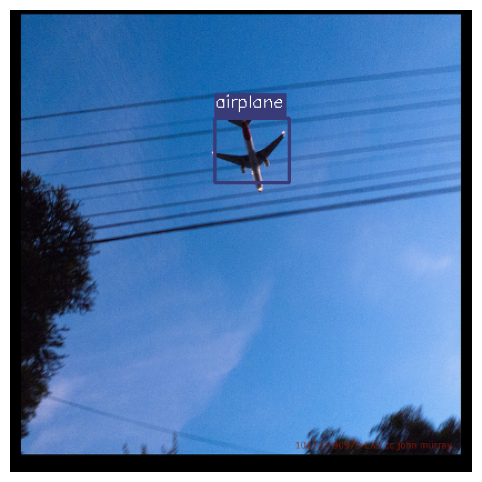

Epoch: 72


  0%|                                                                                                                              | 0/374 [00:08<?, ?it/s, loss=0.128]

batch_idx: 0
==> Saving checkpoint


  0%|▎                                                                                                                   | 1/374 [00:20<2:10:28, 20.99s/it, loss=0.128]

batch_idx: 1


  1%|▉                                                                                                                  | 3/374 [00:34<1:02:41, 10.14s/it, loss=0.0952]

batch_idx: 2


  1%|█▎                                                                                                                   | 4/374 [00:41<55:05,  8.93s/it, loss=0.0842]

batch_idx: 3


  1%|█▌                                                                                                                   | 5/374 [00:48<49:40,  8.08s/it, loss=0.0819]

batch_idx: 4
batch_idx: 5


  2%|█▊                                                                                                                 | 6/374 [01:17<1:34:10, 15.35s/it, loss=0.0798]

batch_idx: 6


  2%|██▍                                                                                                                | 8/374 [03:13<3:24:46, 33.57s/it, loss=0.0814]

batch_idx: 7


  2%|██▊                                                                                                                | 9/374 [03:20<2:33:32, 25.24s/it, loss=0.0849]

batch_idx: 8


  3%|███                                                                                                                | 10/374 [03:27<1:58:17, 19.50s/it, loss=0.084]

batch_idx: 9


  3%|███▍                                                                                                               | 11/374 [03:34<1:35:07, 15.72s/it, loss=0.083]

batch_idx: 10


  3%|███▋                                                                                                              | 12/374 [03:41<1:19:20, 13.15s/it, loss=0.0951]

batch_idx: 11


  3%|███▉                                                                                                              | 13/374 [03:48<1:07:55, 11.29s/it, loss=0.0934]

batch_idx: 12


  4%|████▎                                                                                                             | 14/374 [03:56<1:00:20, 10.06s/it, loss=0.0929]

batch_idx: 13


  4%|████▋                                                                                                               | 15/374 [04:02<54:01,  9.03s/it, loss=0.0916]

batch_idx: 14


  4%|████▉                                                                                                               | 16/374 [04:09<49:59,  8.38s/it, loss=0.0952]

batch_idx: 15


  5%|█████▎                                                                                                              | 17/374 [04:16<47:32,  7.99s/it, loss=0.0928]

batch_idx: 16


  5%|█████▌                                                                                                              | 18/374 [04:23<45:29,  7.67s/it, loss=0.0927]

batch_idx: 17


  5%|█████▉                                                                                                              | 19/374 [04:30<43:37,  7.37s/it, loss=0.0914]

batch_idx: 18


  5%|██████▏                                                                                                             | 20/374 [04:37<42:42,  7.24s/it, loss=0.0918]

batch_idx: 19


  6%|██████▌                                                                                                             | 21/374 [04:43<41:37,  7.07s/it, loss=0.0953]

batch_idx: 20


  6%|██████▊                                                                                                             | 22/374 [04:51<41:55,  7.15s/it, loss=0.0949]

batch_idx: 21


  6%|███████▏                                                                                                            | 23/374 [04:58<41:57,  7.17s/it, loss=0.0932]

batch_idx: 22


  6%|███████▍                                                                                                            | 24/374 [05:05<41:35,  7.13s/it, loss=0.0927]

batch_idx: 23


  7%|███████▊                                                                                                            | 25/374 [05:12<41:20,  7.11s/it, loss=0.0926]

batch_idx: 24


  7%|████████                                                                                                            | 26/374 [05:19<41:31,  7.16s/it, loss=0.0915]

batch_idx: 25


  7%|████████▎                                                                                                           | 27/374 [05:26<40:57,  7.08s/it, loss=0.0901]

batch_idx: 26


  7%|████████▊                                                                                                            | 28/374 [05:33<40:28,  7.02s/it, loss=0.089]

batch_idx: 27


  8%|████████▉                                                                                                           | 29/374 [05:40<40:50,  7.10s/it, loss=0.0878]

batch_idx: 28


  8%|█████████▎                                                                                                          | 30/374 [05:47<40:30,  7.06s/it, loss=0.0895]

batch_idx: 29


  8%|█████████▌                                                                                                          | 31/374 [05:54<40:01,  7.00s/it, loss=0.0889]

batch_idx: 30


  9%|█████████▉                                                                                                          | 32/374 [06:01<40:13,  7.06s/it, loss=0.0886]

batch_idx: 31


  9%|██████████▏                                                                                                         | 33/374 [06:09<40:17,  7.09s/it, loss=0.0885]

batch_idx: 32


  9%|██████████▌                                                                                                         | 34/374 [06:16<40:09,  7.09s/it, loss=0.0881]

batch_idx: 33


  9%|██████████▊                                                                                                         | 35/374 [06:23<40:10,  7.11s/it, loss=0.0902]

batch_idx: 34


 10%|███████████▎                                                                                                         | 36/374 [06:30<41:03,  7.29s/it, loss=0.089]

batch_idx: 35


 10%|███████████▍                                                                                                        | 37/374 [06:38<41:04,  7.31s/it, loss=0.0911]

batch_idx: 36


 10%|███████████▊                                                                                                        | 38/374 [06:45<40:48,  7.29s/it, loss=0.0903]

batch_idx: 37


 10%|████████████                                                                                                        | 39/374 [06:52<40:11,  7.20s/it, loss=0.0895]

batch_idx: 38


 11%|████████████▍                                                                                                       | 40/374 [06:59<40:19,  7.24s/it, loss=0.0885]

batch_idx: 39


 11%|████████████▋                                                                                                       | 41/374 [07:07<40:27,  7.29s/it, loss=0.0882]

batch_idx: 40


 11%|█████████████                                                                                                       | 42/374 [07:14<39:49,  7.20s/it, loss=0.0889]

batch_idx: 41


 11%|█████████████▎                                                                                                      | 43/374 [07:21<39:30,  7.16s/it, loss=0.0889]

batch_idx: 42


 12%|█████████████▋                                                                                                      | 44/374 [07:28<39:00,  7.09s/it, loss=0.0881]

batch_idx: 43


 12%|█████████████▉                                                                                                      | 45/374 [07:35<38:39,  7.05s/it, loss=0.0882]

batch_idx: 44


 12%|██████████████▎                                                                                                     | 46/374 [07:41<37:27,  6.85s/it, loss=0.0876]

batch_idx: 45


 13%|██████████████▌                                                                                                     | 47/374 [07:48<37:42,  6.92s/it, loss=0.0876]

batch_idx: 46


 13%|██████████████▉                                                                                                     | 48/374 [07:55<37:48,  6.96s/it, loss=0.0889]

batch_idx: 47


 13%|███████████████▏                                                                                                    | 49/374 [08:03<38:13,  7.06s/it, loss=0.0887]

batch_idx: 48


 13%|███████████████▌                                                                                                    | 50/374 [08:10<38:51,  7.20s/it, loss=0.0888]

batch_idx: 49


 14%|███████████████▊                                                                                                    | 51/374 [08:17<38:21,  7.12s/it, loss=0.0883]

batch_idx: 50


 14%|████████████████▏                                                                                                   | 52/374 [08:24<38:07,  7.10s/it, loss=0.0886]

batch_idx: 51


 14%|████████████████▍                                                                                                   | 53/374 [08:31<37:34,  7.02s/it, loss=0.0887]

batch_idx: 52


 14%|████████████████▋                                                                                                   | 54/374 [08:38<37:05,  6.96s/it, loss=0.0887]

batch_idx: 53


 15%|█████████████████                                                                                                   | 55/374 [08:44<36:28,  6.86s/it, loss=0.0883]

batch_idx: 54


 15%|█████████████████▎                                                                                                  | 56/374 [08:52<36:57,  6.97s/it, loss=0.0882]

batch_idx: 55


 15%|█████████████████▋                                                                                                  | 57/374 [08:58<36:38,  6.93s/it, loss=0.0879]

batch_idx: 56


 16%|█████████████████▉                                                                                                  | 58/374 [09:06<37:02,  7.03s/it, loss=0.0872]

batch_idx: 57


 16%|██████████████████▎                                                                                                 | 59/374 [09:13<36:41,  6.99s/it, loss=0.0872]

batch_idx: 58


 16%|██████████████████▌                                                                                                 | 60/374 [09:20<36:53,  7.05s/it, loss=0.0874]

batch_idx: 59


 16%|██████████████████▉                                                                                                 | 61/374 [09:26<36:16,  6.95s/it, loss=0.0867]

batch_idx: 60


 17%|███████████████████▏                                                                                                | 62/374 [09:34<36:28,  7.02s/it, loss=0.0878]

batch_idx: 61


 17%|███████████████████▌                                                                                                | 63/374 [09:40<35:51,  6.92s/it, loss=0.0885]

batch_idx: 62


 17%|███████████████████▊                                                                                                | 64/374 [09:47<35:31,  6.87s/it, loss=0.0883]

batch_idx: 63


 17%|████████████████████▎                                                                                                | 65/374 [09:54<35:59,  6.99s/it, loss=0.088]

batch_idx: 64


 18%|████████████████████▍                                                                                               | 66/374 [10:02<37:08,  7.23s/it, loss=0.0892]

batch_idx: 65


 18%|████████████████████▊                                                                                               | 67/374 [10:09<36:29,  7.13s/it, loss=0.0892]

batch_idx: 66


 18%|█████████████████████                                                                                               | 68/374 [10:16<35:51,  7.03s/it, loss=0.0891]

batch_idx: 67


 18%|█████████████████████▍                                                                                              | 69/374 [10:23<36:18,  7.14s/it, loss=0.0891]

batch_idx: 68


 19%|█████████████████████▋                                                                                              | 70/374 [10:30<35:34,  7.02s/it, loss=0.0896]

batch_idx: 69


 19%|██████████████████████                                                                                              | 71/374 [10:37<35:17,  6.99s/it, loss=0.0899]

batch_idx: 70


 19%|██████████████████████▎                                                                                             | 72/374 [10:44<35:43,  7.10s/it, loss=0.0897]

batch_idx: 71


 20%|██████████████████████▋                                                                                             | 73/374 [10:51<35:26,  7.06s/it, loss=0.0895]

batch_idx: 72


 20%|██████████████████████▉                                                                                             | 74/374 [10:58<35:28,  7.10s/it, loss=0.0895]

batch_idx: 73


 20%|███████████████████████▎                                                                                            | 75/374 [11:06<36:06,  7.25s/it, loss=0.0892]

batch_idx: 74


 20%|███████████████████████▊                                                                                             | 76/374 [11:13<34:55,  7.03s/it, loss=0.089]

batch_idx: 75


 21%|███████████████████████▉                                                                                            | 77/374 [11:20<35:30,  7.17s/it, loss=0.0888]

batch_idx: 76


 21%|████████████████████████▏                                                                                           | 78/374 [11:27<35:37,  7.22s/it, loss=0.0887]

batch_idx: 77


 21%|████████████████████████▌                                                                                           | 79/374 [11:35<36:08,  7.35s/it, loss=0.0892]

batch_idx: 78


 21%|████████████████████████▊                                                                                           | 80/374 [11:42<34:59,  7.14s/it, loss=0.0891]

batch_idx: 79


 22%|█████████████████████████                                                                                           | 81/374 [11:49<34:45,  7.12s/it, loss=0.0897]

batch_idx: 80


 22%|█████████████████████████▍                                                                                          | 82/374 [11:56<34:14,  7.04s/it, loss=0.0892]

batch_idx: 81


 22%|█████████████████████████▋                                                                                          | 83/374 [12:02<33:40,  6.94s/it, loss=0.0887]

batch_idx: 82


 22%|██████████████████████████                                                                                          | 84/374 [12:10<33:58,  7.03s/it, loss=0.0894]

batch_idx: 83


 23%|██████████████████████████▌                                                                                          | 85/374 [12:16<33:40,  6.99s/it, loss=0.089]

batch_idx: 84


 23%|██████████████████████████▋                                                                                         | 86/374 [12:24<34:23,  7.17s/it, loss=0.0884]

batch_idx: 85


 23%|██████████████████████████▉                                                                                         | 87/374 [12:32<35:11,  7.36s/it, loss=0.0881]

batch_idx: 86


 24%|███████████████████████████▎                                                                                        | 88/374 [12:39<35:26,  7.43s/it, loss=0.0885]

batch_idx: 87


 24%|███████████████████████████▌                                                                                        | 89/374 [12:47<35:04,  7.38s/it, loss=0.0881]

batch_idx: 88


 24%|███████████████████████████▉                                                                                        | 90/374 [12:54<34:36,  7.31s/it, loss=0.0876]

batch_idx: 89


 24%|████████████████████████████▏                                                                                       | 91/374 [13:00<33:18,  7.06s/it, loss=0.0878]

batch_idx: 90


 25%|████████████████████████████▌                                                                                       | 92/374 [13:07<33:07,  7.05s/it, loss=0.0875]

batch_idx: 91


 25%|████████████████████████████▊                                                                                       | 93/374 [13:14<32:54,  7.03s/it, loss=0.0876]

batch_idx: 92


 25%|█████████████████████████████▏                                                                                      | 94/374 [13:21<32:57,  7.06s/it, loss=0.0873]

batch_idx: 93


 25%|█████████████████████████████▋                                                                                       | 95/374 [13:29<33:18,  7.16s/it, loss=0.087]

batch_idx: 94


 26%|██████████████████████████████                                                                                       | 96/374 [13:36<32:32,  7.02s/it, loss=0.087]

batch_idx: 95


 26%|██████████████████████████████▎                                                                                      | 97/374 [13:43<33:19,  7.22s/it, loss=0.088]

batch_idx: 96


 26%|██████████████████████████████▍                                                                                     | 98/374 [13:51<33:20,  7.25s/it, loss=0.0884]

batch_idx: 97


 26%|██████████████████████████████▋                                                                                     | 99/374 [13:58<32:51,  7.17s/it, loss=0.0879]

batch_idx: 98


 27%|██████████████████████████████▋                                                                                    | 100/374 [14:05<33:00,  7.23s/it, loss=0.0876]

batch_idx: 99


 27%|███████████████████████████████                                                                                    | 101/374 [14:11<31:54,  7.01s/it, loss=0.0874]

batch_idx: 100


 27%|███████████████████████████████▎                                                                                   | 102/374 [14:19<31:58,  7.05s/it, loss=0.0875]

batch_idx: 101


 28%|███████████████████████████████▋                                                                                   | 103/374 [14:26<32:13,  7.13s/it, loss=0.0872]

batch_idx: 102


 28%|███████████████████████████████▉                                                                                   | 104/374 [14:33<32:26,  7.21s/it, loss=0.0879]

batch_idx: 103


 28%|████████████████████████████████▎                                                                                  | 105/374 [14:40<31:48,  7.09s/it, loss=0.0879]

batch_idx: 104


 28%|████████████████████████████████▌                                                                                  | 106/374 [14:47<31:50,  7.13s/it, loss=0.0883]

batch_idx: 105


 29%|████████████████████████████████▉                                                                                  | 107/374 [14:55<32:07,  7.22s/it, loss=0.0886]

batch_idx: 106


 29%|█████████████████████████████████▏                                                                                 | 108/374 [15:01<31:10,  7.03s/it, loss=0.0883]

batch_idx: 107


 29%|█████████████████████████████████▌                                                                                 | 109/374 [15:08<31:01,  7.02s/it, loss=0.0881]

batch_idx: 108


 29%|█████████████████████████████████▊                                                                                 | 110/374 [15:16<31:43,  7.21s/it, loss=0.0879]

batch_idx: 109


 30%|██████████████████████████████████▏                                                                                | 111/374 [15:23<31:34,  7.20s/it, loss=0.0875]

batch_idx: 110


 30%|██████████████████████████████████▍                                                                                | 112/374 [15:30<31:25,  7.20s/it, loss=0.0875]

batch_idx: 111


 30%|██████████████████████████████████▋                                                                                | 113/374 [15:38<31:31,  7.25s/it, loss=0.0875]

batch_idx: 112


 30%|███████████████████████████████████                                                                                | 114/374 [15:45<31:11,  7.20s/it, loss=0.0875]

batch_idx: 113


 31%|███████████████████████████████████▎                                                                               | 115/374 [15:52<31:11,  7.22s/it, loss=0.0872]

batch_idx: 114


 31%|███████████████████████████████████▋                                                                               | 116/374 [15:59<30:57,  7.20s/it, loss=0.0871]

batch_idx: 115


 31%|███████████████████████████████████▉                                                                               | 117/374 [16:06<30:44,  7.18s/it, loss=0.0868]

batch_idx: 116


 32%|████████████████████████████████████▎                                                                              | 118/374 [16:13<30:33,  7.16s/it, loss=0.0868]

batch_idx: 117


 32%|████████████████████████████████████▌                                                                              | 119/374 [16:20<30:02,  7.07s/it, loss=0.0868]

batch_idx: 118


 32%|█████████████████████████████████████▏                                                                              | 120/374 [16:27<29:54,  7.06s/it, loss=0.088]

batch_idx: 119


 32%|█████████████████████████████████████▏                                                                             | 121/374 [16:34<29:01,  6.88s/it, loss=0.0878]

batch_idx: 120


 33%|█████████████████████████████████████▌                                                                             | 122/374 [16:41<29:06,  6.93s/it, loss=0.0879]

batch_idx: 121


 33%|█████████████████████████████████████▊                                                                             | 123/374 [16:47<28:15,  6.76s/it, loss=0.0879]

batch_idx: 122


 33%|██████████████████████████████████████▏                                                                            | 124/374 [16:55<28:58,  6.95s/it, loss=0.0879]

batch_idx: 123


 33%|██████████████████████████████████████▍                                                                            | 125/374 [17:01<28:34,  6.88s/it, loss=0.0877]

batch_idx: 124


 34%|██████████████████████████████████████▋                                                                            | 126/374 [17:09<28:56,  7.00s/it, loss=0.0874]

batch_idx: 125


 34%|███████████████████████████████████████                                                                            | 127/374 [17:16<28:54,  7.02s/it, loss=0.0878]

batch_idx: 126


 34%|███████████████████████████████████████▎                                                                           | 128/374 [17:23<29:12,  7.12s/it, loss=0.0876]

batch_idx: 127


 34%|███████████████████████████████████████▋                                                                           | 129/374 [17:31<29:55,  7.33s/it, loss=0.0873]

batch_idx: 128


 35%|███████████████████████████████████████▉                                                                           | 130/374 [17:38<29:30,  7.26s/it, loss=0.0873]

batch_idx: 129


 35%|████████████████████████████████████████▎                                                                          | 131/374 [17:45<29:08,  7.20s/it, loss=0.0869]

batch_idx: 130


 35%|████████████████████████████████████████▉                                                                           | 132/374 [17:52<29:16,  7.26s/it, loss=0.087]

batch_idx: 131


 36%|████████████████████████████████████████▉                                                                          | 133/374 [18:00<29:03,  7.23s/it, loss=0.0869]

batch_idx: 132


 36%|█████████████████████████████████████████▏                                                                         | 134/374 [18:07<28:42,  7.18s/it, loss=0.0868]

batch_idx: 133


 36%|█████████████████████████████████████████▌                                                                         | 135/374 [18:14<28:49,  7.24s/it, loss=0.0871]

batch_idx: 134


 36%|█████████████████████████████████████████▊                                                                         | 136/374 [18:21<28:23,  7.16s/it, loss=0.0868]

batch_idx: 135


 37%|██████████████████████████████████████████▏                                                                        | 137/374 [18:27<27:12,  6.89s/it, loss=0.0867]

batch_idx: 136


 37%|██████████████████████████████████████████▍                                                                        | 138/374 [18:34<27:21,  6.96s/it, loss=0.0866]

batch_idx: 137


 37%|██████████████████████████████████████████▋                                                                        | 139/374 [18:42<27:36,  7.05s/it, loss=0.0865]

batch_idx: 138


 37%|███████████████████████████████████████████                                                                        | 140/374 [18:49<27:21,  7.02s/it, loss=0.0867]

batch_idx: 139


 38%|███████████████████████████████████████████▎                                                                       | 141/374 [18:55<26:48,  6.90s/it, loss=0.0869]

batch_idx: 140


 38%|███████████████████████████████████████████▋                                                                       | 142/374 [19:02<27:05,  7.00s/it, loss=0.0868]

batch_idx: 141


 38%|███████████████████████████████████████████▉                                                                       | 143/374 [19:09<26:56,  7.00s/it, loss=0.0865]

batch_idx: 142


 39%|████████████████████████████████████████████▎                                                                      | 144/374 [19:17<27:20,  7.13s/it, loss=0.0863]

batch_idx: 143


 39%|████████████████████████████████████████████▌                                                                      | 145/374 [19:24<27:25,  7.19s/it, loss=0.0863]

batch_idx: 144


 39%|████████████████████████████████████████████▉                                                                      | 146/374 [19:31<27:18,  7.19s/it, loss=0.0864]

batch_idx: 145


 39%|█████████████████████████████████████████████▏                                                                     | 147/374 [19:39<27:10,  7.18s/it, loss=0.0861]

batch_idx: 146


 40%|█████████████████████████████████████████████▌                                                                     | 148/374 [19:46<26:55,  7.15s/it, loss=0.0861]

batch_idx: 147


 40%|█████████████████████████████████████████████▊                                                                     | 149/374 [19:52<26:09,  6.98s/it, loss=0.0865]

batch_idx: 148


 40%|██████████████████████████████████████████████                                                                     | 150/374 [19:59<25:58,  6.96s/it, loss=0.0864]

batch_idx: 149


 40%|██████████████████████████████████████████████▍                                                                    | 151/374 [20:07<26:24,  7.10s/it, loss=0.0864]

batch_idx: 150


 41%|██████████████████████████████████████████████▋                                                                    | 152/374 [20:14<26:43,  7.22s/it, loss=0.0865]

batch_idx: 151


 41%|███████████████████████████████████████████████                                                                    | 153/374 [20:21<26:24,  7.17s/it, loss=0.0867]

batch_idx: 152


 41%|███████████████████████████████████████████████▎                                                                   | 154/374 [20:28<25:57,  7.08s/it, loss=0.0869]

batch_idx: 153


 41%|████████████████████████████████████████████████                                                                    | 155/374 [20:35<26:06,  7.15s/it, loss=0.087]

batch_idx: 154


 42%|███████████████████████████████████████████████▉                                                                   | 156/374 [20:42<25:59,  7.16s/it, loss=0.0869]

batch_idx: 155


 42%|████████████████████████████████████████████████▎                                                                  | 157/374 [20:50<25:49,  7.14s/it, loss=0.0869]

batch_idx: 156


 42%|████████████████████████████████████████████████▌                                                                  | 158/374 [20:56<25:00,  6.94s/it, loss=0.0868]

batch_idx: 157


 43%|████████████████████████████████████████████████▉                                                                  | 159/374 [21:03<25:01,  6.98s/it, loss=0.0873]

batch_idx: 158


 43%|█████████████████████████████████████████████████▏                                                                 | 160/374 [21:10<25:07,  7.05s/it, loss=0.0872]

batch_idx: 159


 43%|█████████████████████████████████████████████████▌                                                                 | 161/374 [21:17<24:44,  6.97s/it, loss=0.0876]

batch_idx: 160


 43%|█████████████████████████████████████████████████▊                                                                 | 162/374 [21:25<25:06,  7.11s/it, loss=0.0876]

batch_idx: 161


 44%|██████████████████████████████████████████████████                                                                 | 163/374 [21:31<24:48,  7.05s/it, loss=0.0875]

batch_idx: 162


 44%|██████████████████████████████████████████████████▍                                                                | 164/374 [21:38<24:35,  7.02s/it, loss=0.0873]

batch_idx: 163


 44%|██████████████████████████████████████████████████▋                                                                | 165/374 [21:45<24:15,  6.96s/it, loss=0.0873]

batch_idx: 164


 44%|███████████████████████████████████████████████████                                                                | 166/374 [21:52<24:07,  6.96s/it, loss=0.0873]

batch_idx: 165


 45%|███████████████████████████████████████████████████▎                                                               | 167/374 [21:59<24:09,  7.00s/it, loss=0.0873]

batch_idx: 166


 45%|███████████████████████████████████████████████████▋                                                               | 168/374 [22:06<23:57,  6.98s/it, loss=0.0874]

batch_idx: 167


 45%|███████████████████████████████████████████████████▉                                                               | 169/374 [22:14<24:15,  7.10s/it, loss=0.0874]

batch_idx: 168


 45%|████████████████████████████████████████████████████▎                                                              | 170/374 [22:21<24:26,  7.19s/it, loss=0.0873]

batch_idx: 169


 46%|████████████████████████████████████████████████████▌                                                              | 171/374 [22:28<24:20,  7.19s/it, loss=0.0874]

batch_idx: 170


 46%|████████████████████████████████████████████████████▉                                                              | 172/374 [22:35<24:16,  7.21s/it, loss=0.0872]

batch_idx: 171


 46%|█████████████████████████████████████████████████████▏                                                             | 173/374 [22:42<23:59,  7.16s/it, loss=0.0872]

batch_idx: 172


 47%|█████████████████████████████████████████████████████▉                                                              | 174/374 [22:50<23:46,  7.13s/it, loss=0.087]

batch_idx: 173


 47%|█████████████████████████████████████████████████████▊                                                             | 175/374 [22:57<23:52,  7.20s/it, loss=0.0869]

batch_idx: 174


 47%|██████████████████████████████████████████████████████                                                             | 176/374 [23:04<23:54,  7.25s/it, loss=0.0868]

batch_idx: 175


 47%|██████████████████████████████████████████████████████▍                                                            | 177/374 [23:11<23:25,  7.14s/it, loss=0.0866]

batch_idx: 176


 48%|██████████████████████████████████████████████████████▋                                                            | 178/374 [23:18<23:15,  7.12s/it, loss=0.0864]

batch_idx: 177


 48%|███████████████████████████████████████████████████████                                                            | 179/374 [23:25<23:05,  7.10s/it, loss=0.0866]

batch_idx: 178


 48%|███████████████████████████████████████████████████████▎                                                           | 180/374 [23:32<22:56,  7.09s/it, loss=0.0865]

batch_idx: 179


 48%|███████████████████████████████████████████████████████▋                                                           | 181/374 [23:40<23:10,  7.21s/it, loss=0.0863]

batch_idx: 180


 49%|███████████████████████████████████████████████████████▉                                                           | 182/374 [23:47<22:59,  7.19s/it, loss=0.0864]

batch_idx: 181


 49%|████████████████████████████████████████████████████████▎                                                          | 183/374 [23:54<22:47,  7.16s/it, loss=0.0863]

batch_idx: 182


 49%|████████████████████████████████████████████████████████▌                                                          | 184/374 [24:01<22:27,  7.09s/it, loss=0.0864]

batch_idx: 183


 49%|████████████████████████████████████████████████████████▉                                                          | 185/374 [24:07<21:35,  6.86s/it, loss=0.0867]

batch_idx: 184


 50%|█████████████████████████████████████████████████████████▏                                                         | 186/374 [24:14<21:36,  6.90s/it, loss=0.0866]

batch_idx: 185


 50%|█████████████████████████████████████████████████████████▌                                                         | 187/374 [24:21<21:18,  6.84s/it, loss=0.0865]

batch_idx: 186


 50%|█████████████████████████████████████████████████████████▊                                                         | 188/374 [24:28<21:36,  6.97s/it, loss=0.0866]

batch_idx: 187


 51%|██████████████████████████████████████████████████████████                                                         | 189/374 [24:36<21:54,  7.11s/it, loss=0.0865]

batch_idx: 188


 51%|██████████████████████████████████████████████████████████▍                                                        | 190/374 [24:42<21:22,  6.97s/it, loss=0.0864]

batch_idx: 189


 52%|███████████████████████████████████████████████████████████▉                                                       | 195/374 [25:18<21:40,  7.26s/it, loss=0.0864]

batch_idx: 194


 52%|████████████████████████████████████████████████████████████▎                                                      | 196/374 [25:25<21:04,  7.11s/it, loss=0.0867]

batch_idx: 195


 53%|████████████████████████████████████████████████████████████▌                                                      | 197/374 [25:30<19:40,  6.67s/it, loss=0.0868]

batch_idx: 196


 53%|████████████████████████████████████████████████████████████▉                                                      | 198/374 [25:38<20:04,  6.85s/it, loss=0.0871]

batch_idx: 197


 53%|█████████████████████████████████████████████████████████████▏                                                     | 199/374 [25:45<20:30,  7.03s/it, loss=0.0871]

batch_idx: 198


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [25:52<20:26,  7.05s/it, loss=0.0871]

batch_idx: 199


 53%|█████████████████████████████████████████████████████████████▍                                                     | 200/374 [25:59<20:26,  7.05s/it, loss=0.0873]

batch_idx: 200
==> Saving checkpoint


 54%|█████████████████████████████████████████████████████████████▊                                                     | 201/374 [26:19<31:29, 10.92s/it, loss=0.0873]

batch_idx: 201


 54%|██████████████████████████████████████████████████████████████▍                                                    | 203/374 [26:26<25:21,  8.90s/it, loss=0.0871]

batch_idx: 202


 55%|██████████████████████████████████████████████████████████████▋                                                    | 204/374 [26:33<23:18,  8.22s/it, loss=0.0878]

batch_idx: 203


 55%|███████████████████████████████████████████████████████████████                                                    | 205/374 [26:40<22:07,  7.85s/it, loss=0.0877]

batch_idx: 204


 55%|███████████████████████████████████████████████████████████████▎                                                   | 206/374 [26:46<20:54,  7.47s/it, loss=0.0877]

batch_idx: 205


 55%|███████████████████████████████████████████████████████████████▋                                                   | 207/374 [26:53<20:16,  7.28s/it, loss=0.0876]

batch_idx: 206


 56%|███████████████████████████████████████████████████████████████▉                                                   | 208/374 [27:00<19:54,  7.19s/it, loss=0.0874]

batch_idx: 207


 56%|████████████████████████████████████████████████████████████████▎                                                  | 209/374 [27:07<19:27,  7.07s/it, loss=0.0873]

batch_idx: 208


 56%|████████████████████████████████████████████████████████████████▌                                                  | 210/374 [27:14<19:24,  7.10s/it, loss=0.0875]

batch_idx: 209


 56%|████████████████████████████████████████████████████████████████▉                                                  | 211/374 [27:21<18:58,  6.99s/it, loss=0.0875]

batch_idx: 210


 57%|█████████████████████████████████████████████████████████████████▏                                                 | 212/374 [27:27<18:17,  6.77s/it, loss=0.0874]

batch_idx: 211


 57%|█████████████████████████████████████████████████████████████████▍                                                 | 213/374 [27:34<18:47,  7.00s/it, loss=0.0873]

batch_idx: 212


 57%|█████████████████████████████████████████████████████████████████▊                                                 | 214/374 [27:42<18:48,  7.05s/it, loss=0.0875]

batch_idx: 213


 57%|██████████████████████████████████████████████████████████████████                                                 | 215/374 [27:48<18:27,  6.97s/it, loss=0.0875]

batch_idx: 214


 58%|██████████████████████████████████████████████████████████████████▍                                                | 216/374 [27:56<18:43,  7.11s/it, loss=0.0874]

batch_idx: 215


 58%|██████████████████████████████████████████████████████████████████▋                                                | 217/374 [28:02<18:00,  6.88s/it, loss=0.0873]

batch_idx: 216


 58%|███████████████████████████████████████████████████████████████████                                                | 218/374 [28:09<18:04,  6.95s/it, loss=0.0871]

batch_idx: 217


 59%|███████████████████████████████████████████████████████████████████▎                                               | 219/374 [28:16<17:59,  6.96s/it, loss=0.0874]

batch_idx: 218


 59%|███████████████████████████████████████████████████████████████████▋                                               | 220/374 [28:23<17:38,  6.87s/it, loss=0.0873]

batch_idx: 219


 59%|███████████████████████████████████████████████████████████████████▉                                               | 221/374 [28:30<17:28,  6.85s/it, loss=0.0874]

batch_idx: 220


 59%|████████████████████████████████████████████████████████████████████▎                                              | 222/374 [28:37<17:24,  6.87s/it, loss=0.0873]

batch_idx: 221


 60%|████████████████████████████████████████████████████████████████████▌                                              | 223/374 [28:44<17:30,  6.96s/it, loss=0.0871]

batch_idx: 222


 60%|████████████████████████████████████████████████████████████████████▉                                              | 224/374 [28:50<16:40,  6.67s/it, loss=0.0872]

batch_idx: 223


 60%|█████████████████████████████████████████████████████████████████████▏                                             | 225/374 [28:57<17:02,  6.86s/it, loss=0.0873]

batch_idx: 224


 60%|█████████████████████████████████████████████████████████████████████▍                                             | 226/374 [29:04<17:02,  6.91s/it, loss=0.0871]

batch_idx: 225


 61%|█████████████████████████████████████████████████████████████████████▊                                             | 227/374 [29:11<16:59,  6.94s/it, loss=0.0869]

batch_idx: 226


 61%|██████████████████████████████████████████████████████████████████████▋                                             | 228/374 [29:18<17:01,  7.00s/it, loss=0.087]

batch_idx: 227


 61%|███████████████████████████████████████████████████████████████████████                                             | 229/374 [29:25<17:00,  7.03s/it, loss=0.087]

batch_idx: 228


 61%|██████████████████████████████████████████████████████████████████████▋                                            | 230/374 [29:33<17:00,  7.09s/it, loss=0.0872]

batch_idx: 229


 62%|███████████████████████████████████████████████████████████████████████                                            | 231/374 [29:39<16:36,  6.97s/it, loss=0.0875]

batch_idx: 230


 62%|███████████████████████████████████████████████████████████████████████▎                                           | 232/374 [29:47<16:40,  7.04s/it, loss=0.0874]

batch_idx: 231


 62%|███████████████████████████████████████████████████████████████████████▋                                           | 233/374 [29:54<16:39,  7.09s/it, loss=0.0873]

batch_idx: 232


 63%|███████████████████████████████████████████████████████████████████████▉                                           | 234/374 [30:01<16:31,  7.08s/it, loss=0.0872]

batch_idx: 233


 63%|████████████████████████████████████████████████████████████████████████▎                                          | 235/374 [30:08<16:14,  7.01s/it, loss=0.0871]

batch_idx: 234


 63%|████████████████████████████████████████████████████████████████████████▌                                          | 236/374 [30:14<15:50,  6.89s/it, loss=0.0873]

batch_idx: 235


 63%|████████████████████████████████████████████████████████████████████████▊                                          | 237/374 [30:21<15:43,  6.89s/it, loss=0.0871]

batch_idx: 236


 64%|█████████████████████████████████████████████████████████████████████████▏                                         | 238/374 [30:28<15:55,  7.03s/it, loss=0.0872]

batch_idx: 237


 64%|█████████████████████████████████████████████████████████████████████████▍                                         | 239/374 [30:35<15:46,  7.01s/it, loss=0.0872]

batch_idx: 238


 64%|█████████████████████████████████████████████████████████████████████████▊                                         | 240/374 [30:42<15:27,  6.92s/it, loss=0.0872]

batch_idx: 239


 64%|██████████████████████████████████████████████████████████████████████████                                         | 241/374 [30:49<15:13,  6.87s/it, loss=0.0872]

batch_idx: 240


 65%|██████████████████████████████████████████████████████████████████████████▍                                        | 242/374 [30:56<15:20,  6.97s/it, loss=0.0871]

batch_idx: 241


 65%|██████████████████████████████████████████████████████████████████████████▋                                        | 243/374 [31:03<15:12,  6.96s/it, loss=0.0871]

batch_idx: 242


 65%|███████████████████████████████████████████████████████████████████████████                                        | 244/374 [31:10<15:10,  7.00s/it, loss=0.0872]

batch_idx: 243


 66%|███████████████████████████████████████████████████████████████████████████▎                                       | 245/374 [31:17<14:50,  6.90s/it, loss=0.0872]

batch_idx: 244


 66%|███████████████████████████████████████████████████████████████████████████▋                                       | 246/374 [31:23<14:34,  6.83s/it, loss=0.0872]

batch_idx: 245


 66%|███████████████████████████████████████████████████████████████████████████▉                                       | 247/374 [31:30<14:23,  6.80s/it, loss=0.0871]

batch_idx: 246


 66%|████████████████████████████████████████████████████████████████████████████▉                                       | 248/374 [31:38<14:48,  7.05s/it, loss=0.087]

batch_idx: 247


 67%|████████████████████████████████████████████████████████████████████████████▌                                      | 249/374 [31:45<14:44,  7.07s/it, loss=0.0868]

batch_idx: 248


 67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 250/374 [31:52<14:45,  7.14s/it, loss=0.087]

batch_idx: 249


 67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 251/374 [32:00<14:45,  7.20s/it, loss=0.087]

batch_idx: 250


 67%|█████████████████████████████████████████████████████████████████████████████▍                                     | 252/374 [32:07<14:52,  7.32s/it, loss=0.0869]

batch_idx: 251


 68%|█████████████████████████████████████████████████████████████████████████████▊                                     | 253/374 [32:14<14:27,  7.17s/it, loss=0.0868]

batch_idx: 252


 68%|██████████████████████████████████████████████████████████████████████████████                                     | 254/374 [32:21<14:20,  7.17s/it, loss=0.0867]

batch_idx: 253


 68%|██████████████████████████████████████████████████████████████████████████████▍                                    | 255/374 [32:29<14:25,  7.28s/it, loss=0.0868]

batch_idx: 254


 68%|██████████████████████████████████████████████████████████████████████████████▋                                    | 256/374 [32:36<14:04,  7.16s/it, loss=0.0867]

batch_idx: 255


 69%|███████████████████████████████████████████████████████████████████████████████                                    | 257/374 [32:43<13:58,  7.16s/it, loss=0.0866]

batch_idx: 256


 69%|███████████████████████████████████████████████████████████████████████████████▎                                   | 258/374 [32:49<13:27,  6.96s/it, loss=0.0866]

batch_idx: 257


 69%|███████████████████████████████████████████████████████████████████████████████▋                                   | 259/374 [32:56<13:12,  6.89s/it, loss=0.0867]

batch_idx: 258


 70%|███████████████████████████████████████████████████████████████████████████████▉                                   | 260/374 [33:03<13:13,  6.96s/it, loss=0.0867]

batch_idx: 259


 70%|████████████████████████████████████████████████████████████████████████████████▎                                  | 261/374 [33:10<12:55,  6.86s/it, loss=0.0869]

batch_idx: 260


 70%|████████████████████████████████████████████████████████████████████████████████▌                                  | 262/374 [33:17<13:13,  7.09s/it, loss=0.0872]

batch_idx: 261


 70%|████████████████████████████████████████████████████████████████████████████████▊                                  | 263/374 [33:25<13:13,  7.14s/it, loss=0.0871]

batch_idx: 262


 71%|█████████████████████████████████████████████████████████████████████████████████▏                                 | 264/374 [33:32<13:13,  7.21s/it, loss=0.0873]

batch_idx: 263


 71%|█████████████████████████████████████████████████████████████████████████████████▍                                 | 265/374 [33:39<12:58,  7.14s/it, loss=0.0873]

batch_idx: 264


 71%|█████████████████████████████████████████████████████████████████████████████████▊                                 | 266/374 [33:46<12:56,  7.19s/it, loss=0.0874]

batch_idx: 265


 71%|██████████████████████████████████████████████████████████████████████████████████                                 | 267/374 [33:53<12:45,  7.16s/it, loss=0.0875]

batch_idx: 266


 72%|██████████████████████████████████████████████████████████████████████████████████▍                                | 268/374 [34:00<12:37,  7.14s/it, loss=0.0875]

batch_idx: 267


 72%|██████████████████████████████████████████████████████████████████████████████████▋                                | 269/374 [34:07<12:12,  6.98s/it, loss=0.0875]

batch_idx: 268


 72%|███████████████████████████████████████████████████████████████████████████████████                                | 270/374 [34:14<12:02,  6.95s/it, loss=0.0875]

batch_idx: 269


 72%|███████████████████████████████████████████████████████████████████████████████████▎                               | 271/374 [34:21<12:06,  7.06s/it, loss=0.0875]

batch_idx: 270


 73%|███████████████████████████████████████████████████████████████████████████████████▋                               | 272/374 [34:28<11:50,  6.96s/it, loss=0.0874]

batch_idx: 271


 73%|███████████████████████████████████████████████████████████████████████████████████▉                               | 273/374 [34:35<11:53,  7.06s/it, loss=0.0874]

batch_idx: 272


 73%|████████████████████████████████████████████████████████████████████████████████████▎                              | 274/374 [34:42<11:50,  7.11s/it, loss=0.0873]

batch_idx: 273


 74%|████████████████████████████████████████████████████████████████████████████████████▌                              | 275/374 [34:49<11:39,  7.07s/it, loss=0.0873]

batch_idx: 274


 74%|████████████████████████████████████████████████████████████████████████████████████▊                              | 276/374 [34:57<11:39,  7.14s/it, loss=0.0871]

batch_idx: 275


 74%|█████████████████████████████████████████████████████████████████████████████████████▏                             | 277/374 [35:04<11:35,  7.17s/it, loss=0.0872]

batch_idx: 276


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                             | 278/374 [35:13<12:10,  7.61s/it, loss=0.0873]

batch_idx: 277


 75%|█████████████████████████████████████████████████████████████████████████████████████▊                             | 279/374 [35:20<11:55,  7.53s/it, loss=0.0872]

batch_idx: 278


 75%|██████████████████████████████████████████████████████████████████████████████████████                             | 280/374 [35:27<11:41,  7.47s/it, loss=0.0872]

batch_idx: 279


 75%|██████████████████████████████████████████████████████████████████████████████████████▍                            | 281/374 [35:34<11:10,  7.21s/it, loss=0.0872]

batch_idx: 280


 75%|██████████████████████████████████████████████████████████████████████████████████████▋                            | 282/374 [35:41<10:49,  7.05s/it, loss=0.0873]

batch_idx: 281


 76%|███████████████████████████████████████████████████████████████████████████████████████                            | 283/374 [35:48<10:42,  7.07s/it, loss=0.0872]

batch_idx: 282


 76%|███████████████████████████████████████████████████████████████████████████████████████▎                           | 284/374 [35:54<10:25,  6.95s/it, loss=0.0872]

batch_idx: 283


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                           | 285/374 [36:01<10:04,  6.79s/it, loss=0.0872]

batch_idx: 284


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                           | 286/374 [36:08<09:58,  6.80s/it, loss=0.0872]

batch_idx: 285


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                          | 287/374 [36:15<09:55,  6.85s/it, loss=0.0871]

batch_idx: 286


 77%|████████████████████████████████████████████████████████████████████████████████████████▌                          | 288/374 [36:22<09:54,  6.91s/it, loss=0.0871]

batch_idx: 287


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                          | 289/374 [36:29<10:00,  7.06s/it, loss=0.0871]

batch_idx: 288


 78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 290/374 [36:36<09:52,  7.05s/it, loss=0.087]

batch_idx: 289


 78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 291/374 [36:44<09:58,  7.21s/it, loss=0.087]

batch_idx: 290


 78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 292/374 [36:51<09:51,  7.21s/it, loss=0.087]

batch_idx: 291


 78%|██████████████████████████████████████████████████████████████████████████████████████████                         | 293/374 [36:58<09:33,  7.08s/it, loss=0.0868]

batch_idx: 292


 79%|██████████████████████████████████████████████████████████████████████████████████████████▍                        | 294/374 [37:04<09:19,  6.99s/it, loss=0.0869]

batch_idx: 293


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [37:12<09:14,  7.03s/it, loss=0.0867]

batch_idx: 294


 79%|██████████████████████████████████████████████████████████████████████████████████████████▋                        | 295/374 [37:47<09:14,  7.03s/it, loss=0.0867]

batch_idx: 295


 79%|███████████████████████████████████████████████████████████████████████████████████████▊                       | 296/374 [4:37:48<1:13:12, 56.31s/it, loss=0.0867]


KeyboardInterrupt: 

In [10]:
epochs = 100000000
# Training the model 
for e in range(50, epochs+1): 
	print("Epoch:", e) 
    ################# dos
    	# Creating a progress bar 
	progress_bar = tqdm(train_loader, leave=True) 

	# Initializing a list to store the losses 
	losses = [] 

	# Iterating over the training data 
	for batch_idx, (x, y) in enumerate(progress_bar): 
		print("batch_idx:", batch_idx)
		x = x.to(device) 
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 

		# Add the loss to the list 
		losses.append(loss.item()) 

		# Reset gradients 
		optimizer.zero_grad() 

		# Backpropagate the loss 
		scaler.scale(loss).backward() 

		# Optimization step 
		scaler.step(optimizer) 

		# Update the scaler for next iteration 
		scaler.update() 

		# update progress bar with loss 
		mean_loss = sum(losses) / len(losses) 
		progress_bar.set_postfix(loss=mean_loss)
  
        # Log the loss to TensorBoard
		writer.add_scalar('Loss/train', mean_loss, e * len(train_loader) + batch_idx)

		# Log images to TensorBoard every 100 batches
		if batch_idx % 200 == 0:
			# Saving the model 
			if save_model: 
				save_checkpoint(model, optimizer, filename=model_path_base +f"b{batch_idx}_vgg16_checkpoint.pth.tar")

   
	# Saving the model 
	if save_model: 
		save_checkpoint(model, optimizer, filename=model_path_base +f"e{e}_vgg16_checkpoint.pth.tar")
        # delete batch checkpoints
		for i in range(0, batch_idx+1, 200):
			os.remove(model_path_base + f"b{i}_vgg16_checkpoint.pth.tar")
		# for i in range(0,e-3):
		# 	if os.path.exists(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar"):
		# 		os.remove(model_path_base + f"e{i}_vgg16_checkpoint.pth.tar")
   
	model.eval()
 
	# Getting a sample image from the test data loader 
	try:
		x, y = next(val_loader_iter)
	except StopIteration:
		val_loader_iter = iter(val_loader)
		x, y = next(val_loader_iter)
	x = x.to(device) 
	
	print("display and report image")
	with torch.no_grad():
		output = model(x)
		y0, y1, y2 = ( 
			y[0].to(device), 
			y[1].to(device), 
			y[2].to(device), 
		) 

		with torch.amp.autocast(device_type=device): 
			# Getting the model predictions 
			outputs = model(x) 
			# Calculating the loss at each scale 
			loss = ( 
				loss_fn(outputs[0], y0, scaled_anchors[0]) 
				+ loss_fn(outputs[1], y1, scaled_anchors[1]) 
				+ loss_fn(outputs[2], y2, scaled_anchors[2]) 
			) 
   
		writer.add_scalar('Loss/val', loss.item(), e)
  
		bboxes = [[] for _ in range(x.shape[0])]
		for i in range(3):
			batch_size, A, S, _, _ = output[i].shape
			anchor = scaled_anchors[i]
			boxes_scale_i = convert_cells_to_bboxes(output[i], anchor, s=S, is_predictions=True)
			for idx, box in enumerate(boxes_scale_i):
				bboxes[idx] += box
		i = 0
		nms_boxes = nms(bboxes[i], iou_threshold=0.5, threshold=0.6)
		img_with_boxes = plot_image(x[i].permute(1, 2, 0).detach().cpu(), nms_boxes, categories)
		img_with_boxes = T.ToTensor()(img_with_boxes)
		writer.add_image(f'Val/Image_{e}_{i}_before', img_with_boxes, e * len(train_loader) + batch_idx)

	model.train()


    #################
	# training_loop(train_loader, model, optimizer, loss_fn, scaler, scaled_anchors) 
